In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 7
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie

  # CairoMakie's display() in PDF format opens an interactive window
  # instead of saving to the ipynb file, so we don't do that.
  # https://github.com/quarto-dev/quarto-cli/issues/7548
  if fig_format == :pdf
    CairoMakie.activate!(type = "png")
  else
    CairoMakie.activate!(type = string(fig_format))
  end
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/Users/hirofumi48/162348.github.io/posts/2024/Julia"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


0.0%

┣                                   ┫ 0B/100.0kB [00:04<-121:-21:-25, -4s/B]


0.0%┣                                      ┫ 1B/100.0kB [00:05<Inf:Inf, InfGs/B]
0.0%┣                                       ┫ 17B/100.0kB [00:05<08:07:24, 3B/s]


0.0%┣                                       ┫ 43B/100.0kB [00:05<03:07:38, 9B/s]
0.1%┣                                      ┫ 62B/100.0kB [00:05<02:10:35, 13B/s]


0.1%┣                                      ┫ 82B/100.0kB [00:05<01:39:27, 17B/s]
0.1%┣                                     ┫ 104B/100.0kB [00:05<01:19:02, 21B/s]


0.1%┣                                     ┫ 123B/100.0kB [00:05<01:07:27, 25B/s]
0.1%┣                                        ┫ 149B/100.0kB [00:05<56:09, 30B/s]


0.2%┣                                        ┫ 175B/100.0kB [00:05<48:14, 34B/s]
0.2%┣                                        ┫ 201B/100.0kB [00:05<42:23, 39B/s]


0.2%┣                                        ┫ 226B/100.0kB [00:05<38:04, 44B/s]
0.2%┣                                        ┫ 246B/100.0kB [00:05<35:18, 47B/s]


0.3%┣                                        ┫ 266B/100.0kB [00:05<32:58, 50B/s]
0.3%┣▏                                       ┫ 281B/100.0kB [00:05<31:30, 53B/s]


0.3%┣▏                                       ┫ 295B/100.0kB [00:05<30:18, 55B/s]
0.3%┣▏                                       ┫ 307B/100.0kB [00:05<29:23, 57B/s]


0.3%┣▏                                       ┫ 320B/100.0kB [00:05<28:27, 58B/s]
0.3%┣▏                                       ┫ 334B/100.0kB [00:06<27:31, 60B/s]


0.4%┣▏                                       ┫ 350B/100.0kB [00:06<26:31, 63B/s]
0.4%┣▏                                       ┫ 365B/100.0kB [00:06<25:40, 65B/s]


0.4%┣▏                                       ┫ 378B/100.0kB [00:06<25:01, 66B/s]
0.4%┣▏                                       ┫ 394B/100.0kB [00:06<24:13, 69B/s]


0.4%┣▏                                       ┫ 406B/100.0kB [00:06<23:43, 70B/s]
0.4%┣▏                                       ┫ 412B/100.0kB [00:06<23:35, 70B/s]


0.4%┣▏                                       ┫ 423B/100.0kB [00:06<23:10, 72B/s]
0.4%┣▏                                       ┫ 438B/100.0kB [00:06<22:34, 74B/s]


0.5%┣▏                                       ┫ 451B/100.0kB [00:06<22:05, 75B/s]
0.5%┣▏                                       ┫ 465B/100.0kB [00:06<21:36, 77B/s]


0.5%┣▏                                       ┫ 477B/100.0kB [00:06<21:14, 78B/s]
0.5%┣▏                                       ┫ 492B/100.0kB [00:06<20:46, 80B/s]


0.5%┣▏                                       ┫ 514B/100.0kB [00:06<20:02, 83B/s]
0.5%┣▏                                       ┫ 529B/100.0kB [00:06<19:40, 84B/s]


0.5%┣▏                                       ┫ 538B/100.0kB [00:06<19:29, 85B/s]
0.5%┣▏                                       ┫ 544B/100.0kB [00:06<19:26, 85B/s]


0.6%┣▏                                       ┫ 553B/100.0kB [00:06<19:17, 86B/s]
0.6%┣▎                                       ┫ 556B/100.0kB [00:06<19:20, 86B/s]


0.6%┣▎                                       ┫ 563B/100.0kB [00:07<19:17, 86B/s]
0.6%┣▎                                       ┫ 572B/100.0kB [00:07<19:09, 87B/s]


0.6%┣▎                                       ┫ 580B/100.0kB [00:07<19:03, 87B/s]
0.6%┣▎                                       ┫ 585B/100.0kB [00:07<19:02, 87B/s]


0.6%┣▎                                       ┫ 587B/100.0kB [00:07<19:09, 87B/s]
0.6%┣▎                                       ┫ 593B/100.0kB [00:07<19:07, 87B/s]


0.6%┣▎                                       ┫ 600B/100.0kB [00:07<19:04, 87B/s]
0.6%┣▎                                       ┫ 609B/100.0kB [00:07<18:55, 88B/s]


0.6%┣▎                                       ┫ 619B/100.0kB [00:07<18:46, 88B/s]
0.6%┣▎                                       ┫ 632B/100.0kB [00:07<18:30, 89B/s]


0.6%┣▎                                       ┫ 639B/100.0kB [00:07<18:28, 90B/s]
0.6%┣▎                                       ┫ 647B/100.0kB [00:07<18:22, 90B/s]


0.7%┣▎                                       ┫ 656B/100.0kB [00:07<18:14, 91B/s]
0.7%┣▎                                       ┫ 673B/100.0kB [00:07<17:54, 92B/s]


0.7%┣▎                                       ┫ 693B/100.0kB [00:07<17:30, 95B/s]
0.7%┣▎                                       ┫ 711B/100.0kB [00:07<17:11, 96B/s]


0.7%┣▎                                       ┫ 724B/100.0kB [00:07<17:02, 97B/s]
0.7%┣▎                                       ┫ 740B/100.0kB [00:07<16:47, 99B/s]


0.8%┣▎                                      ┫ 754B/100.0kB [00:08<16:35, 100B/s]
0.8%┣▎                                      ┫ 772B/100.0kB [00:08<16:18, 101B/s]


0.8%┣▎                                      ┫ 789B/100.0kB [00:08<16:04, 103B/s]
0.8%┣▎                                      ┫ 806B/100.0kB [00:08<15:50, 104B/s]


0.8%┣▎                                      ┫ 821B/100.0kB [00:08<15:39, 106B/s]
0.8%┣▎                                      ┫ 828B/100.0kB [00:08<15:37, 106B/s]


0.8%┣▎                                      ┫ 837B/100.0kB [00:08<15:33, 106B/s]
0.8%┣▎                                      ┫ 845B/100.0kB [00:08<15:30, 107B/s]


0.9%┣▍                                      ┫ 856B/100.0kB [00:08<15:28, 107B/s]
0.9%┣▍                                      ┫ 871B/100.0kB [00:08<15:18, 108B/s]


0.9%┣▍                                      ┫ 886B/100.0kB [00:08<15:09, 109B/s]
0.9%┣▍                                      ┫ 906B/100.0kB [00:08<14:54, 111B/s]


0.9%┣▍                                      ┫ 930B/100.0kB [00:08<14:36, 113B/s]
1.0%┣▍                                      ┫ 953B/100.0kB [00:08<14:20, 115B/s]


1.0%┣▍                                      ┫ 975B/100.0kB [00:08<14:07, 117B/s]
1.0%┣▍                                      ┫ 999B/100.0kB [00:08<13:51, 119B/s]


1.0%┣▍                                     ┫ 1.0kB/100.0kB [00:08<13:37, 121B/s]
1.0%┣▍                                     ┫ 1.0kB/100.0kB [00:08<13:29, 122B/s]


1.1%┣▍                                     ┫ 1.1kB/100.0kB [00:09<13:22, 123B/s]
1.1%┣▍                                     ┫ 1.1kB/100.0kB [00:09<13:12, 125B/s]


1.1%┣▍                                     ┫ 1.1kB/100.0kB [00:09<13:04, 126B/s]
1.1%┣▍                                     ┫ 1.1kB/100.0kB [00:09<12:57, 127B/s]


1.1%┣▍                                     ┫ 1.1kB/100.0kB [00:09<12:51, 128B/s]
1.1%┣▍                                     ┫ 1.1kB/100.0kB [00:09<12:43, 130B/s]


1.2%┣▍                                     ┫ 1.2kB/100.0kB [00:09<12:35, 131B/s]
1.2%┣▌                                     ┫ 1.2kB/100.0kB [00:09<12:26, 133B/s]


1.2%┣▌                                     ┫ 1.2kB/100.0kB [00:09<12:17, 134B/s]
1.2%┣▌                                     ┫ 1.2kB/100.0kB [00:09<12:12, 135B/s]


1.2%┣▌                                     ┫ 1.2kB/100.0kB [00:09<12:06, 136B/s]
1.2%┣▌                                     ┫ 1.2kB/100.0kB [00:09<12:02, 137B/s]


1.3%┣▌                                     ┫ 1.3kB/100.0kB [00:09<11:58, 137B/s]
1.3%┣▌                                     ┫ 1.3kB/100.0kB [00:09<11:53, 138B/s]


1.3%┣▌                                     ┫ 1.3kB/100.0kB [00:09<11:45, 140B/s]
1.3%┣▌                                     ┫ 1.3kB/100.0kB [00:09<11:37, 142B/s]


1.3%┣▌                                     ┫ 1.3kB/100.0kB [00:09<11:27, 144B/s]
1.4%┣▌                                     ┫ 1.4kB/100.0kB [00:09<11:20, 145B/s]


1.4%┣▌                                     ┫ 1.4kB/100.0kB [00:09<11:14, 146B/s]
1.4%┣▌                                     ┫ 1.4kB/100.0kB [00:10<11:07, 148B/s]


1.4%┣▌                                     ┫ 1.4kB/100.0kB [00:10<11:02, 149B/s]
1.5%┣▌                                     ┫ 1.4kB/100.0kB [00:10<10:55, 150B/s]


1.5%┣▋                                     ┫ 1.5kB/100.0kB [00:10<10:52, 151B/s]
1.5%┣▋                                     ┫ 1.5kB/100.0kB [00:10<10:48, 152B/s]


1.5%┣▋                                     ┫ 1.5kB/100.0kB [00:10<10:44, 153B/s]
1.5%┣▋                                     ┫ 1.5kB/100.0kB [00:10<10:45, 153B/s]


1.5%┣▋                                     ┫ 1.5kB/100.0kB [00:10<10:41, 154B/s]
1.5%┣▋                                     ┫ 1.5kB/100.0kB [00:10<10:38, 154B/s]


1.6%┣▋                                     ┫ 1.6kB/100.0kB [00:10<10:35, 155B/s]
1.6%┣▋                                     ┫ 1.6kB/100.0kB [00:10<10:32, 156B/s]


1.6%┣▋                                     ┫ 1.6kB/100.0kB [00:10<10:29, 156B/s]
1.6%┣▋                                     ┫ 1.6kB/100.0kB [00:10<10:27, 157B/s]


1.6%┣▋                                     ┫ 1.6kB/100.0kB [00:10<10:24, 158B/s]
1.6%┣▋                                     ┫ 1.6kB/100.0kB [00:10<10:21, 158B/s]


1.6%┣▋                                     ┫ 1.6kB/100.0kB [00:10<10:20, 159B/s]
1.7%┣▋                                     ┫ 1.7kB/100.0kB [00:10<10:18, 159B/s]


1.7%┣▋                                     ┫ 1.7kB/100.0kB [00:10<10:15, 160B/s]
1.7%┣▋                                     ┫ 1.7kB/100.0kB [00:10<10:11, 161B/s]


1.7%┣▋                                     ┫ 1.7kB/100.0kB [00:11<10:07, 162B/s]
1.7%┣▋                                     ┫ 1.7kB/100.0kB [00:11<10:04, 163B/s]


1.7%┣▋                                     ┫ 1.7kB/100.0kB [00:11<10:00, 164B/s]
1.8%┣▊                                     ┫ 1.8kB/100.0kB [00:11<09:57, 164B/s]


1.8%┣▊                                     ┫ 1.8kB/100.0kB [00:11<09:53, 166B/s]
1.8%┣▊                                     ┫ 1.8kB/100.0kB [00:11<09:50, 166B/s]


1.8%┣▊                                     ┫ 1.8kB/100.0kB [00:11<09:48, 167B/s]
1.8%┣▊                                     ┫ 1.8kB/100.0kB [00:11<09:46, 168B/s]


1.8%┣▊                                     ┫ 1.8kB/100.0kB [00:11<09:45, 168B/s]
1.9%┣▊                                     ┫ 1.9kB/100.0kB [00:11<09:42, 169B/s]


1.9%┣▊                                     ┫ 1.9kB/100.0kB [00:11<09:40, 169B/s]
1.9%┣▊                                     ┫ 1.9kB/100.0kB [00:11<09:39, 170B/s]


1.9%┣▊                                     ┫ 1.9kB/100.0kB [00:11<09:36, 170B/s]
1.9%┣▊                                     ┫ 1.9kB/100.0kB [00:11<09:34, 171B/s]


1.9%┣▊                                     ┫ 1.9kB/100.0kB [00:11<09:31, 172B/s]
2.0%┣▊                                     ┫ 2.0kB/100.0kB [00:11<09:28, 173B/s]


2.0%┣▊                                     ┫ 2.0kB/100.0kB [00:11<09:25, 174B/s]
2.0%┣▊                                     ┫ 2.0kB/100.0kB [00:11<09:23, 174B/s]


2.0%┣▊                                     ┫ 2.0kB/100.0kB [00:11<09:20, 175B/s]
2.0%┣▊                                     ┫ 2.0kB/100.0kB [00:12<09:18, 176B/s]


2.0%┣▊                                     ┫ 2.0kB/100.0kB [00:12<09:16, 176B/s]
2.1%┣▉                                     ┫ 2.1kB/100.0kB [00:12<09:13, 177B/s]


2.1%┣▉                                     ┫ 2.1kB/100.0kB [00:12<09:11, 178B/s]
2.1%┣▉                                     ┫ 2.1kB/100.0kB [00:12<09:09, 178B/s]


2.1%┣▉                                     ┫ 2.1kB/100.0kB [00:12<09:07, 179B/s]
2.1%┣▉                                     ┫ 2.1kB/100.0kB [00:12<09:05, 180B/s]


2.1%┣▉                                     ┫ 2.1kB/100.0kB [00:12<09:02, 180B/s]
2.2%┣▉                                     ┫ 2.2kB/100.0kB [00:12<09:01, 181B/s]


2.2%┣▉                                     ┫ 2.2kB/100.0kB [00:12<08:59, 181B/s]
2.2%┣▉                                     ┫ 2.2kB/100.0kB [00:12<08:57, 182B/s]


2.2%┣▉                                     ┫ 2.2kB/100.0kB [00:12<08:55, 183B/s]
2.2%┣▉                                     ┫ 2.2kB/100.0kB [00:12<08:54, 183B/s]


2.2%┣▉                                     ┫ 2.2kB/100.0kB [00:12<08:52, 184B/s]
2.3%┣▉                                     ┫ 2.3kB/100.0kB [00:12<08:51, 184B/s]


2.3%┣▉                                     ┫ 2.3kB/100.0kB [00:12<08:49, 185B/s]
2.3%┣▉                                     ┫ 2.3kB/100.0kB [00:12<08:47, 185B/s]


2.3%┣▉                                     ┫ 2.3kB/100.0kB [00:12<08:46, 186B/s]
2.3%┣▉                                     ┫ 2.3kB/100.0kB [00:12<08:45, 186B/s]


2.3%┣▉                                     ┫ 2.3kB/100.0kB [00:13<08:44, 186B/s]
2.4%┣█                                     ┫ 2.4kB/100.0kB [00:13<08:42, 187B/s]


2.4%┣█                                     ┫ 2.4kB/100.0kB [00:13<08:41, 187B/s]
2.4%┣█                                     ┫ 2.4kB/100.0kB [00:13<08:38, 188B/s]


2.4%┣█                                     ┫ 2.4kB/100.0kB [00:13<08:37, 189B/s]
2.4%┣█                                     ┫ 2.4kB/100.0kB [00:13<08:35, 189B/s]


2.4%┣█                                     ┫ 2.4kB/100.0kB [00:13<08:34, 190B/s]
2.5%┣█                                     ┫ 2.5kB/100.0kB [00:13<08:31, 191B/s]


2.5%┣█                                     ┫ 2.5kB/100.0kB [00:13<08:29, 192B/s]
2.5%┣█                                     ┫ 2.5kB/100.0kB [00:13<08:27, 192B/s]


2.5%┣█                                     ┫ 2.5kB/100.0kB [00:13<08:25, 193B/s]
2.5%┣█                                     ┫ 2.5kB/100.0kB [00:13<08:23, 194B/s]


2.6%┣█                                     ┫ 2.6kB/100.0kB [00:13<08:22, 194B/s]
2.6%┣█                                     ┫ 2.6kB/100.0kB [00:13<08:20, 195B/s]


2.6%┣█                                     ┫ 2.6kB/100.0kB [00:13<08:19, 195B/s]
2.6%┣█                                     ┫ 2.6kB/100.0kB [00:13<08:17, 196B/s]


2.6%┣█                                     ┫ 2.6kB/100.0kB [00:13<08:16, 196B/s]
2.6%┣█                                     ┫ 2.6kB/100.0kB [00:13<08:14, 197B/s]


2.7%┣█                                     ┫ 2.7kB/100.0kB [00:13<08:12, 198B/s]
2.7%┣█                                     ┫ 2.7kB/100.0kB [00:14<08:11, 198B/s]


2.7%┣█                                     ┫ 2.7kB/100.0kB [00:14<08:09, 199B/s]
2.7%┣█                                     ┫ 2.7kB/100.0kB [00:14<08:07, 200B/s]


2.7%┣█                                     ┫ 2.7kB/100.0kB [00:14<08:06, 200B/s]
2.8%┣█                                     ┫ 2.8kB/100.0kB [00:14<08:05, 201B/s]


2.8%┣█                                     ┫ 2.8kB/100.0kB [00:14<08:03, 201B/s]
2.8%┣█                                     ┫ 2.8kB/100.0kB [00:14<08:01, 202B/s]


2.8%┣█                                     ┫ 2.8kB/100.0kB [00:14<07:59, 203B/s]
2.8%┣█                                     ┫ 2.8kB/100.0kB [00:14<07:57, 204B/s]


2.9%┣█                                     ┫ 2.9kB/100.0kB [00:14<07:55, 204B/s]
2.9%┣█                                     ┫ 2.9kB/100.0kB [00:14<07:54, 205B/s]


2.9%┣█                                     ┫ 2.9kB/100.0kB [00:14<07:53, 205B/s]
2.9%┣█                                     ┫ 2.9kB/100.0kB [00:14<07:52, 206B/s]


2.9%┣█▏                                    ┫ 2.9kB/100.0kB [00:14<07:51, 206B/s]
2.9%┣█▏                                    ┫ 2.9kB/100.0kB [00:14<07:50, 207B/s]


3.0%┣█▏                                    ┫ 3.0kB/100.0kB [00:14<07:49, 207B/s]
3.0%┣█▏                                    ┫ 3.0kB/100.0kB [00:14<07:48, 207B/s]


3.0%┣█▏                                    ┫ 3.0kB/100.0kB [00:14<07:47, 208B/s]
3.0%┣█▏                                    ┫ 3.0kB/100.0kB [00:14<07:47, 208B/s]


3.0%┣█▏                                    ┫ 3.0kB/100.0kB [00:15<07:46, 208B/s]
3.0%┣█▏                                    ┫ 3.0kB/100.0kB [00:15<07:46, 208B/s]


3.0%┣█▏                                    ┫ 3.0kB/100.0kB [00:15<07:45, 208B/s]
3.1%┣█▏                                    ┫ 3.1kB/100.0kB [00:15<07:45, 209B/s]


3.1%┣█▏                                    ┫ 3.1kB/100.0kB [00:15<07:45, 209B/s]
3.1%┣█▏                                    ┫ 3.1kB/100.0kB [00:15<07:44, 209B/s]


3.1%┣█▏                                    ┫ 3.1kB/100.0kB [00:15<07:44, 209B/s]
3.1%┣█▏                                    ┫ 3.1kB/100.0kB [00:15<07:44, 209B/s]


3.1%┣█▏                                    ┫ 3.1kB/100.0kB [00:15<07:44, 209B/s]
3.1%┣█▏                                    ┫ 3.1kB/100.0kB [00:15<07:43, 209B/s]


3.1%┣█▏                                    ┫ 3.1kB/100.0kB [00:15<07:43, 209B/s]
3.2%┣█▏                                    ┫ 3.2kB/100.0kB [00:15<07:43, 209B/s]


3.2%┣█▏                                    ┫ 3.2kB/100.0kB [00:15<07:41, 210B/s]
3.2%┣█▏                                    ┫ 3.2kB/100.0kB [00:15<07:41, 210B/s]


3.2%┣█▏                                    ┫ 3.2kB/100.0kB [00:15<07:39, 211B/s]
3.2%┣█▎                                    ┫ 3.2kB/100.0kB [00:15<07:39, 211B/s]


3.2%┣█▎                                    ┫ 3.2kB/100.0kB [00:15<07:39, 211B/s]
3.3%┣█▎                                    ┫ 3.3kB/100.0kB [00:15<07:38, 211B/s]


3.3%┣█▎                                    ┫ 3.3kB/100.0kB [00:15<07:37, 212B/s]
3.3%┣█▎                                    ┫ 3.3kB/100.0kB [00:16<07:36, 212B/s]


3.3%┣█▎                                    ┫ 3.3kB/100.0kB [00:16<07:36, 212B/s]
3.3%┣█▎                                    ┫ 3.3kB/100.0kB [00:16<07:34, 213B/s]


3.3%┣█▎                                    ┫ 3.3kB/100.0kB [00:16<07:33, 214B/s]
3.4%┣█▎                                    ┫ 3.4kB/100.0kB [00:16<07:32, 214B/s]


3.4%┣█▎                                    ┫ 3.4kB/100.0kB [00:16<07:31, 214B/s]
3.4%┣█▎                                    ┫ 3.4kB/100.0kB [00:16<07:30, 214B/s]


3.4%┣█▎                                    ┫ 3.4kB/100.0kB [00:16<07:30, 215B/s]
3.4%┣█▎                                    ┫ 3.4kB/100.0kB [00:16<07:29, 215B/s]


3.4%┣█▎                                    ┫ 3.4kB/100.0kB [00:16<07:30, 215B/s]
3.5%┣█▎                                    ┫ 3.5kB/100.0kB [00:16<07:29, 215B/s]


3.5%┣█▎                                    ┫ 3.5kB/100.0kB [00:16<07:30, 215B/s]
3.5%┣█▎                                    ┫ 3.5kB/100.0kB [00:16<07:30, 215B/s]


3.5%┣█▎                                    ┫ 3.5kB/100.0kB [00:16<07:30, 214B/s]
3.5%┣█▎                                    ┫ 3.5kB/100.0kB [00:16<07:29, 215B/s]


3.5%┣█▍                                    ┫ 3.5kB/100.0kB [00:16<07:29, 215B/s]
3.5%┣█▍                                    ┫ 3.5kB/100.0kB [00:16<07:27, 216B/s]


3.5%┣█▍                                    ┫ 3.5kB/100.0kB [00:16<07:27, 216B/s]
3.6%┣█▍                                    ┫ 3.6kB/100.0kB [00:16<07:27, 216B/s]


3.6%┣█▍                                    ┫ 3.6kB/100.0kB [00:17<07:26, 216B/s]
3.6%┣█▍                                    ┫ 3.6kB/100.0kB [00:17<07:24, 217B/s]


3.6%┣█▍                                    ┫ 3.6kB/100.0kB [00:17<07:24, 217B/s]
3.6%┣█▍                                    ┫ 3.6kB/100.0kB [00:17<07:23, 218B/s]


3.6%┣█▍                                    ┫ 3.6kB/100.0kB [00:17<07:23, 218B/s]
3.7%┣█▍                                    ┫ 3.7kB/100.0kB [00:17<07:22, 218B/s]


3.7%┣█▍                                    ┫ 3.7kB/100.0kB [00:17<07:20, 219B/s]
3.7%┣█▍                                    ┫ 3.7kB/100.0kB [00:17<07:19, 219B/s]


3.7%┣█▍                                    ┫ 3.7kB/100.0kB [00:17<07:18, 220B/s]
3.7%┣█▍                                    ┫ 3.7kB/100.0kB [00:17<07:17, 220B/s]


3.8%┣█▍                                    ┫ 3.8kB/100.0kB [00:17<07:16, 221B/s]
3.8%┣█▍                                    ┫ 3.8kB/100.0kB [00:17<07:18, 220B/s]


3.8%┣█▍                                    ┫ 3.8kB/100.0kB [00:17<07:17, 220B/s]
3.8%┣█▌                                    ┫ 3.8kB/100.0kB [00:17<07:16, 220B/s]


3.8%┣█▌                                    ┫ 3.8kB/100.0kB [00:17<07:16, 221B/s]
3.8%┣█▌                                    ┫ 3.8kB/100.0kB [00:17<07:15, 221B/s]


3.9%┣█▌                                    ┫ 3.9kB/100.0kB [00:17<07:15, 221B/s]
3.9%┣█▌                                    ┫ 3.9kB/100.0kB [00:17<07:14, 221B/s]


3.9%┣█▌                                    ┫ 3.9kB/100.0kB [00:18<07:13, 222B/s]
3.9%┣█▌                                    ┫ 3.9kB/100.0kB [00:18<07:13, 222B/s]


3.9%┣█▌                                    ┫ 3.9kB/100.0kB [00:18<07:13, 222B/s]
3.9%┣█▌                                    ┫ 3.9kB/100.0kB [00:18<07:13, 222B/s]


3.9%┣█▌                                    ┫ 3.9kB/100.0kB [00:18<07:11, 223B/s]
4.0%┣█▌                                    ┫ 4.0kB/100.0kB [00:18<07:10, 223B/s]


4.0%┣█▌                                    ┫ 4.0kB/100.0kB [00:18<07:10, 224B/s]
4.0%┣█▌                                    ┫ 4.0kB/100.0kB [00:18<07:09, 224B/s]


4.0%┣█▌                                    ┫ 4.0kB/100.0kB [00:18<07:08, 224B/s]
4.0%┣█▌                                    ┫ 4.0kB/100.0kB [00:18<07:09, 224B/s]


4.0%┣█▌                                    ┫ 4.0kB/100.0kB [00:18<07:09, 224B/s]
4.1%┣█▌                                    ┫ 4.1kB/100.0kB [00:18<07:09, 224B/s]


4.1%┣█▌                                    ┫ 4.1kB/100.0kB [00:18<07:08, 224B/s]
4.1%┣█▌                                    ┫ 4.1kB/100.0kB [00:18<07:08, 224B/s]


4.1%┣█▌                                    ┫ 4.1kB/100.0kB [00:18<07:08, 224B/s]
4.1%┣█▋                                    ┫ 4.1kB/100.0kB [00:18<07:09, 224B/s]


4.1%┣█▋                                    ┫ 4.1kB/100.0kB [00:18<07:09, 224B/s]
4.1%┣█▋                                    ┫ 4.1kB/100.0kB [00:18<07:09, 223B/s]


4.1%┣█▋                                    ┫ 4.1kB/100.0kB [00:18<07:10, 223B/s]
4.1%┣█▋                                    ┫ 4.1kB/100.0kB [00:19<07:10, 223B/s]


4.1%┣█▋                                    ┫ 4.1kB/100.0kB [00:19<07:10, 223B/s]
4.2%┣█▋                                    ┫ 4.2kB/100.0kB [00:19<07:11, 223B/s]


4.2%┣█▋                                    ┫ 4.2kB/100.0kB [00:19<07:11, 222B/s]
4.2%┣█▋                                    ┫ 4.2kB/100.0kB [00:19<07:11, 222B/s]


4.2%┣█▋                                    ┫ 4.2kB/100.0kB [00:19<07:11, 222B/s]
4.2%┣█▋                                    ┫ 4.2kB/100.0kB [00:19<07:11, 222B/s]


4.2%┣█▋                                    ┫ 4.2kB/100.0kB [00:19<07:11, 222B/s]
4.2%┣█▋                                    ┫ 4.2kB/100.0kB [00:19<07:10, 223B/s]


4.2%┣█▋                                    ┫ 4.2kB/100.0kB [00:19<07:10, 223B/s]
4.3%┣█▋                                    ┫ 4.3kB/100.0kB [00:19<07:10, 223B/s]


4.3%┣█▋                                    ┫ 4.3kB/100.0kB [00:19<07:10, 223B/s]
4.3%┣█▋                                    ┫ 4.3kB/100.0kB [00:19<07:09, 223B/s]


4.3%┣█▋                                    ┫ 4.3kB/100.0kB [00:19<07:08, 224B/s]
4.3%┣█▋                                    ┫ 4.3kB/100.0kB [00:19<07:07, 224B/s]


4.4%┣█▋                                    ┫ 4.4kB/100.0kB [00:19<07:05, 225B/s]
4.4%┣█▋                                    ┫ 4.4kB/100.0kB [00:19<07:05, 225B/s]


4.4%┣█▊                                    ┫ 4.4kB/100.0kB [00:19<07:04, 226B/s]
4.4%┣█▊                                    ┫ 4.4kB/100.0kB [00:20<07:03, 226B/s]


4.4%┣█▊                                    ┫ 4.4kB/100.0kB [00:20<07:03, 226B/s]
4.4%┣█▊                                    ┫ 4.4kB/100.0kB [00:20<07:03, 226B/s]


4.4%┣█▊                                    ┫ 4.4kB/100.0kB [00:20<07:03, 226B/s]
4.5%┣█▊                                    ┫ 4.5kB/100.0kB [00:20<07:02, 226B/s]


4.5%┣█▊                                    ┫ 4.5kB/100.0kB [00:20<07:02, 227B/s]
4.5%┣█▊                                    ┫ 4.5kB/100.0kB [00:20<07:01, 227B/s]


4.5%┣█▊                                    ┫ 4.5kB/100.0kB [00:20<06:59, 228B/s]
4.5%┣█▊                                    ┫ 4.5kB/100.0kB [00:20<06:58, 228B/s]


4.6%┣█▊                                    ┫ 4.6kB/100.0kB [00:20<06:57, 229B/s]
4.6%┣█▊                                    ┫ 4.6kB/100.0kB [00:20<06:57, 229B/s]


4.6%┣█▊                                    ┫ 4.6kB/100.0kB [00:20<06:56, 229B/s]
4.6%┣█▊                                    ┫ 4.6kB/100.0kB [00:20<06:56, 229B/s]


4.6%┣█▊                                    ┫ 4.6kB/100.0kB [00:20<06:56, 229B/s]
4.6%┣█▊                                    ┫ 4.6kB/100.0kB [00:20<06:56, 229B/s]


4.7%┣█▊                                    ┫ 4.7kB/100.0kB [00:20<06:56, 229B/s]
4.7%┣█▊                                    ┫ 4.7kB/100.0kB [00:20<06:56, 229B/s]


4.7%┣█▊                                    ┫ 4.7kB/100.0kB [00:20<06:57, 229B/s]
4.7%┣█▉                                    ┫ 4.7kB/100.0kB [00:20<06:57, 229B/s]


4.7%┣█▉                                    ┫ 4.7kB/100.0kB [00:20<06:57, 229B/s]
4.7%┣█▉                                    ┫ 4.7kB/100.0kB [00:21<06:57, 229B/s]


4.7%┣█▉                                    ┫ 4.7kB/100.0kB [00:21<06:57, 228B/s]
4.7%┣█▉                                    ┫ 4.7kB/100.0kB [00:21<06:56, 229B/s]


4.7%┣█▉                                    ┫ 4.7kB/100.0kB [00:21<06:56, 229B/s]
4.8%┣█▉                                    ┫ 4.8kB/100.0kB [00:21<06:55, 229B/s]


4.8%┣█▉                                    ┫ 4.8kB/100.0kB [00:21<06:55, 229B/s]
4.8%┣█▉                                    ┫ 4.8kB/100.0kB [00:21<06:56, 229B/s]


4.8%┣█▉                                    ┫ 4.8kB/100.0kB [00:21<06:56, 229B/s]
4.8%┣█▉                                    ┫ 4.8kB/100.0kB [00:21<06:56, 229B/s]


4.8%┣█▉                                    ┫ 4.8kB/100.0kB [00:21<06:56, 229B/s]
4.8%┣█▉                                    ┫ 4.8kB/100.0kB [00:21<06:56, 229B/s]


4.8%┣█▉                                    ┫ 4.8kB/100.0kB [00:21<06:56, 229B/s]
4.8%┣█▉                                    ┫ 4.8kB/100.0kB [00:21<06:56, 229B/s]


4.8%┣█▉                                    ┫ 4.8kB/100.0kB [00:21<06:57, 228B/s]
4.9%┣█▉                                    ┫ 4.9kB/100.0kB [00:21<06:57, 228B/s]


4.9%┣█▉                                    ┫ 4.9kB/100.0kB [00:21<06:57, 228B/s]
4.9%┣█▉                                    ┫ 4.9kB/100.0kB [00:21<06:57, 228B/s]


4.9%┣█▉                                    ┫ 4.9kB/100.0kB [00:21<06:56, 229B/s]
4.9%┣█▉                                    ┫ 4.9kB/100.0kB [00:22<06:55, 229B/s]


5.0%┣█▉                                    ┫ 5.0kB/100.0kB [00:22<06:54, 230B/s]
5.0%┣██                                    ┫ 5.0kB/100.0kB [00:22<06:53, 230B/s]


5.0%┣██                                    ┫ 5.0kB/100.0kB [00:22<06:52, 231B/s]
5.0%┣██                                    ┫ 5.0kB/100.0kB [00:22<06:51, 231B/s]


5.0%┣██                                    ┫ 5.0kB/100.0kB [00:22<06:50, 231B/s]
5.1%┣██                                    ┫ 5.1kB/100.0kB [00:22<06:50, 232B/s]


5.1%┣██                                    ┫ 5.1kB/100.0kB [00:22<06:49, 232B/s]
5.1%┣██                                    ┫ 5.1kB/100.0kB [00:22<06:48, 232B/s]


5.1%┣██                                    ┫ 5.1kB/100.0kB [00:22<06:48, 233B/s]
5.1%┣██                                    ┫ 5.1kB/100.0kB [00:22<06:47, 233B/s]


5.1%┣██                                    ┫ 5.1kB/100.0kB [00:22<06:47, 233B/s]
5.2%┣██                                    ┫ 5.2kB/100.0kB [00:22<06:46, 233B/s]


5.2%┣██                                    ┫ 5.2kB/100.0kB [00:22<06:45, 234B/s]
5.2%┣██                                    ┫ 5.2kB/100.0kB [00:22<06:45, 234B/s]


5.2%┣██                                    ┫ 5.2kB/100.0kB [00:22<06:44, 235B/s]
5.3%┣██                                    ┫ 5.3kB/100.0kB [00:22<06:43, 235B/s]


5.3%┣██                                    ┫ 5.3kB/100.0kB [00:22<06:43, 235B/s]
5.3%┣██                                    ┫ 5.3kB/100.0kB [00:22<06:43, 235B/s]


5.3%┣██                                    ┫ 5.3kB/100.0kB [00:22<06:43, 235B/s]
5.3%┣██                                    ┫ 5.3kB/100.0kB [00:23<06:43, 235B/s]


5.3%┣██                                    ┫ 5.3kB/100.0kB [00:23<06:43, 235B/s]
5.3%┣██                                    ┫ 5.3kB/100.0kB [00:23<06:42, 236B/s]


5.4%┣██                                    ┫ 5.4kB/100.0kB [00:23<06:41, 236B/s]
5.4%┣██                                    ┫ 5.4kB/100.0kB [00:23<06:41, 236B/s]


5.4%┣██                                    ┫ 5.4kB/100.0kB [00:23<06:41, 236B/s]
5.4%┣██                                    ┫ 5.4kB/100.0kB [00:23<06:41, 236B/s]


5.4%┣██                                    ┫ 5.4kB/100.0kB [00:23<06:41, 236B/s]
5.4%┣██                                    ┫ 5.4kB/100.0kB [00:23<06:42, 235B/s]


5.4%┣██                                    ┫ 5.4kB/100.0kB [00:23<06:42, 235B/s]
5.4%┣██                                    ┫ 5.4kB/100.0kB [00:23<06:42, 235B/s]


5.4%┣██                                    ┫ 5.4kB/100.0kB [00:23<06:42, 235B/s]
5.5%┣██                                    ┫ 5.5kB/100.0kB [00:23<06:42, 235B/s]


5.5%┣██                                    ┫ 5.5kB/100.0kB [00:23<06:43, 235B/s]
5.5%┣██                                    ┫ 5.5kB/100.0kB [00:23<06:43, 235B/s]


5.5%┣██                                    ┫ 5.5kB/100.0kB [00:23<06:43, 234B/s]
5.5%┣██                                    ┫ 5.5kB/100.0kB [00:23<06:44, 234B/s]


5.5%┣██                                    ┫ 5.5kB/100.0kB [00:23<06:44, 234B/s]
5.5%┣██                                    ┫ 5.5kB/100.0kB [00:24<06:43, 234B/s]


5.5%┣██                                    ┫ 5.5kB/100.0kB [00:24<06:42, 235B/s]
5.6%┣██▏                                   ┫ 5.6kB/100.0kB [00:24<06:41, 236B/s]


5.6%┣██▏                                   ┫ 5.6kB/100.0kB [00:24<06:40, 236B/s]
5.6%┣██▏                                   ┫ 5.6kB/100.0kB [00:24<06:40, 236B/s]


5.6%┣██▏                                   ┫ 5.6kB/100.0kB [00:24<06:40, 236B/s]
5.6%┣██▏                                   ┫ 5.6kB/100.0kB [00:24<06:40, 236B/s]


5.6%┣██▏                                   ┫ 5.6kB/100.0kB [00:24<06:40, 236B/s]
5.7%┣██▏                                   ┫ 5.7kB/100.0kB [00:24<06:40, 236B/s]


5.7%┣██▏                                   ┫ 5.7kB/100.0kB [00:24<06:40, 236B/s]
5.7%┣██▏                                   ┫ 5.7kB/100.0kB [00:24<06:39, 236B/s]


5.7%┣██▏                                   ┫ 5.7kB/100.0kB [00:24<06:39, 236B/s]
5.7%┣██▏                                   ┫ 5.7kB/100.0kB [00:24<06:39, 236B/s]


5.7%┣██▏                                   ┫ 5.7kB/100.0kB [00:24<06:39, 236B/s]
5.7%┣██▏                                   ┫ 5.7kB/100.0kB [00:24<06:39, 236B/s]


5.7%┣██▏                                   ┫ 5.7kB/100.0kB [00:24<06:39, 236B/s]
5.8%┣██▏                                   ┫ 5.8kB/100.0kB [00:24<06:39, 236B/s]


5.8%┣██▏                                   ┫ 5.8kB/100.0kB [00:24<06:39, 236B/s]
5.8%┣██▏                                   ┫ 5.8kB/100.0kB [00:24<06:39, 236B/s]


5.8%┣██▏                                   ┫ 5.8kB/100.0kB [00:25<06:38, 236B/s]
5.8%┣██▏                                   ┫ 5.8kB/100.0kB [00:25<06:38, 237B/s]


5.8%┣██▏                                   ┫ 5.8kB/100.0kB [00:25<06:38, 237B/s]
5.8%┣██▏                                   ┫ 5.8kB/100.0kB [00:25<06:38, 237B/s]


5.9%┣██▎                                   ┫ 5.8kB/100.0kB [00:25<06:38, 236B/s]
5.9%┣██▎                                   ┫ 5.9kB/100.0kB [00:25<06:38, 236B/s]


5.9%┣██▎                                   ┫ 5.9kB/100.0kB [00:25<06:38, 236B/s]
5.9%┣██▎                                   ┫ 5.9kB/100.0kB [00:25<06:38, 236B/s]


5.9%┣██▎                                   ┫ 5.9kB/100.0kB [00:25<06:38, 236B/s]
5.9%┣██▎                                   ┫ 5.9kB/100.0kB [00:25<06:38, 237B/s]


5.9%┣██▎                                   ┫ 5.9kB/100.0kB [00:25<06:37, 237B/s]
6.0%┣██▎                                   ┫ 6.0kB/100.0kB [00:25<06:36, 237B/s]


6.0%┣██▎                                   ┫ 6.0kB/100.0kB [00:25<06:35, 238B/s]
6.0%┣██▎                                   ┫ 6.0kB/100.0kB [00:25<06:35, 238B/s]


6.0%┣██▎                                   ┫ 6.0kB/100.0kB [00:25<06:34, 238B/s]
6.0%┣██▎                                   ┫ 6.0kB/100.0kB [00:25<06:34, 239B/s]


6.1%┣██▎                                   ┫ 6.1kB/100.0kB [00:25<06:33, 239B/s]
6.1%┣██▎                                   ┫ 6.1kB/100.0kB [00:25<06:32, 239B/s]


6.1%┣██▎                                   ┫ 6.1kB/100.0kB [00:25<06:32, 240B/s]
6.1%┣██▎                                   ┫ 6.1kB/100.0kB [00:26<06:31, 240B/s]


6.2%┣██▍                                   ┫ 6.2kB/100.0kB [00:26<06:30, 241B/s]
6.2%┣██▍                                   ┫ 6.2kB/100.0kB [00:26<06:29, 241B/s]


6.2%┣██▍                                   ┫ 6.2kB/100.0kB [00:26<06:29, 241B/s]
6.2%┣██▍                                   ┫ 6.2kB/100.0kB [00:26<06:28, 242B/s]


6.2%┣██▍                                   ┫ 6.2kB/100.0kB [00:26<06:28, 242B/s]
6.3%┣██▍                                   ┫ 6.3kB/100.0kB [00:26<06:27, 242B/s]


6.3%┣██▍                                   ┫ 6.3kB/100.0kB [00:26<06:27, 242B/s]
6.3%┣██▍                                   ┫ 6.3kB/100.0kB [00:26<06:27, 242B/s]


6.3%┣██▍                                   ┫ 6.3kB/100.0kB [00:26<06:26, 243B/s]
6.3%┣██▍                                   ┫ 6.3kB/100.0kB [00:26<06:25, 243B/s]


6.4%┣██▍                                   ┫ 6.4kB/100.0kB [00:26<06:25, 243B/s]
6.4%┣██▍                                   ┫ 6.4kB/100.0kB [00:26<06:25, 243B/s]


6.4%┣██▍                                   ┫ 6.4kB/100.0kB [00:26<06:24, 244B/s]
6.4%┣██▍                                   ┫ 6.4kB/100.0kB [00:26<06:24, 244B/s]


6.4%┣██▍                                   ┫ 6.4kB/100.0kB [00:26<06:24, 244B/s]
6.4%┣██▍                                   ┫ 6.4kB/100.0kB [00:26<06:24, 244B/s]


6.4%┣██▌                                   ┫ 6.4kB/100.0kB [00:26<06:24, 244B/s]
6.5%┣██▌                                   ┫ 6.5kB/100.0kB [00:26<06:23, 244B/s]


6.5%┣██▌                                   ┫ 6.5kB/100.0kB [00:27<06:23, 244B/s]
6.5%┣██▌                                   ┫ 6.5kB/100.0kB [00:27<06:23, 244B/s]


6.5%┣██▌                                   ┫ 6.5kB/100.0kB [00:27<06:22, 245B/s]
6.5%┣██▌                                   ┫ 6.5kB/100.0kB [00:27<06:22, 245B/s]


6.6%┣██▌                                   ┫ 6.6kB/100.0kB [00:27<06:21, 245B/s]
6.6%┣██▌                                   ┫ 6.6kB/100.0kB [00:27<06:21, 245B/s]


6.6%┣██▌                                   ┫ 6.6kB/100.0kB [00:27<06:21, 245B/s]
6.6%┣██▌                                   ┫ 6.6kB/100.0kB [00:27<06:21, 245B/s]


6.6%┣██▌                                   ┫ 6.6kB/100.0kB [00:27<06:21, 245B/s]
6.6%┣██▌                                   ┫ 6.6kB/100.0kB [00:27<06:21, 245B/s]


6.6%┣██▌                                   ┫ 6.6kB/100.0kB [00:27<06:21, 245B/s]
6.6%┣██▌                                   ┫ 6.6kB/100.0kB [00:27<06:21, 245B/s]


6.7%┣██▌                                   ┫ 6.7kB/100.0kB [00:27<06:21, 245B/s]
6.7%┣██▌                                   ┫ 6.7kB/100.0kB [00:27<06:21, 245B/s]


6.7%┣██▌                                   ┫ 6.7kB/100.0kB [00:27<06:21, 245B/s]
6.7%┣██▌                                   ┫ 6.7kB/100.0kB [00:27<06:20, 245B/s]


6.7%┣██▌                                   ┫ 6.7kB/100.0kB [00:27<06:20, 245B/s]
6.7%┣██▋                                   ┫ 6.7kB/100.0kB [00:27<06:20, 246B/s]


6.8%┣██▋                                   ┫ 6.8kB/100.0kB [00:27<06:19, 246B/s]
6.8%┣██▋                                   ┫ 6.8kB/100.0kB [00:28<06:19, 246B/s]


6.8%┣██▋                                   ┫ 6.8kB/100.0kB [00:28<06:18, 247B/s]
6.8%┣██▋                                   ┫ 6.8kB/100.0kB [00:28<06:18, 247B/s]


6.8%┣██▋                                   ┫ 6.8kB/100.0kB [00:28<06:17, 247B/s]
6.9%┣██▋                                   ┫ 6.9kB/100.0kB [00:28<06:17, 247B/s]


6.9%┣██▋                                   ┫ 6.9kB/100.0kB [00:28<06:17, 247B/s]
6.9%┣██▋                                   ┫ 6.9kB/100.0kB [00:28<06:16, 248B/s]


6.9%┣██▋                                   ┫ 6.9kB/100.0kB [00:28<06:15, 248B/s]
6.9%┣██▋                                   ┫ 6.9kB/100.0kB [00:28<06:15, 248B/s]


7.0%┣██▋                                   ┫ 7.0kB/100.0kB [00:28<06:14, 249B/s]
7.0%┣██▋                                   ┫ 7.0kB/100.0kB [00:28<06:14, 249B/s]


7.0%┣██▋                                   ┫ 7.0kB/100.0kB [00:28<06:13, 249B/s]
7.0%┣██▊                                   ┫ 7.0kB/100.0kB [00:28<06:13, 249B/s]


7.0%┣██▊                                   ┫ 7.0kB/100.0kB [00:28<06:13, 250B/s]
7.1%┣██▊                                   ┫ 7.1kB/100.0kB [00:28<06:12, 250B/s]


7.1%┣██▊                                   ┫ 7.1kB/100.0kB [00:28<06:12, 250B/s]
7.1%┣██▊                                   ┫ 7.1kB/100.0kB [00:28<06:11, 250B/s]


7.1%┣██▊                                   ┫ 7.1kB/100.0kB [00:28<06:11, 250B/s]
7.1%┣██▊                                   ┫ 7.1kB/100.0kB [00:28<06:10, 251B/s]


7.2%┣██▊                                   ┫ 7.2kB/100.0kB [00:29<06:10, 251B/s]
7.2%┣██▊                                   ┫ 7.2kB/100.0kB [00:29<06:09, 251B/s]


7.2%┣██▊                                   ┫ 7.2kB/100.0kB [00:29<06:09, 252B/s]
7.2%┣██▊                                   ┫ 7.2kB/100.0kB [00:29<06:08, 252B/s]


7.2%┣██▊                                   ┫ 7.2kB/100.0kB [00:29<06:08, 252B/s]
7.3%┣██▊                                   ┫ 7.3kB/100.0kB [00:29<06:08, 252B/s]


7.3%┣██▊                                   ┫ 7.3kB/100.0kB [00:29<06:08, 252B/s]
7.3%┣██▊                                   ┫ 7.3kB/100.0kB [00:29<06:08, 252B/s]


7.3%┣██▊                                   ┫ 7.3kB/100.0kB [00:29<06:08, 252B/s]
7.3%┣██▊                                   ┫ 7.3kB/100.0kB [00:29<06:08, 252B/s]


7.3%┣██▉                                   ┫ 7.3kB/100.0kB [00:29<06:07, 252B/s]
7.3%┣██▉                                   ┫ 7.3kB/100.0kB [00:29<06:07, 252B/s]


7.4%┣██▉                                   ┫ 7.4kB/100.0kB [00:29<06:07, 252B/s]
7.4%┣██▉                                   ┫ 7.4kB/100.0kB [00:29<06:07, 253B/s]


7.4%┣██▉                                   ┫ 7.4kB/100.0kB [00:29<06:06, 253B/s]
7.4%┣██▉                                   ┫ 7.4kB/100.0kB [00:29<06:06, 253B/s]


7.4%┣██▉                                   ┫ 7.4kB/100.0kB [00:29<06:06, 253B/s]
7.5%┣██▉                                   ┫ 7.5kB/100.0kB [00:29<06:05, 253B/s]


7.5%┣██▉                                   ┫ 7.5kB/100.0kB [00:29<06:05, 254B/s]
7.5%┣██▉                                   ┫ 7.5kB/100.0kB [00:30<06:04, 254B/s]


7.5%┣██▉                                   ┫ 7.5kB/100.0kB [00:30<06:04, 254B/s]
7.5%┣██▉                                   ┫ 7.5kB/100.0kB [00:30<06:04, 254B/s]


7.5%┣██▉                                   ┫ 7.5kB/100.0kB [00:30<06:04, 254B/s]
7.6%┣██▉                                   ┫ 7.6kB/100.0kB [00:30<06:03, 254B/s]


7.6%┣██▉                                   ┫ 7.6kB/100.0kB [00:30<06:03, 255B/s]
7.6%┣██▉                                   ┫ 7.6kB/100.0kB [00:30<06:03, 255B/s]


7.6%┣███                                   ┫ 7.6kB/100.0kB [00:30<06:03, 255B/s]
7.6%┣███                                   ┫ 7.6kB/100.0kB [00:30<06:02, 255B/s]


7.6%┣███                                   ┫ 7.7kB/100.0kB [00:30<06:02, 255B/s]
7.7%┣███                                   ┫ 7.7kB/100.0kB [00:30<06:02, 255B/s]


7.7%┣███                                   ┫ 7.7kB/100.0kB [00:30<06:02, 255B/s]
7.7%┣███                                   ┫ 7.7kB/100.0kB [00:30<06:01, 255B/s]


7.7%┣███                                   ┫ 7.7kB/100.0kB [00:30<06:01, 256B/s]
7.7%┣███                                   ┫ 7.7kB/100.0kB [00:30<06:01, 256B/s]


7.8%┣███                                   ┫ 7.8kB/100.0kB [00:30<06:01, 256B/s]
7.8%┣███                                   ┫ 7.8kB/100.0kB [00:30<06:00, 256B/s]


7.8%┣███                                   ┫ 7.8kB/100.0kB [00:30<06:00, 256B/s]
7.8%┣███                                   ┫ 7.8kB/100.0kB [00:30<06:00, 256B/s]


7.8%┣███                                   ┫ 7.8kB/100.0kB [00:31<06:00, 256B/s]
7.8%┣███                                   ┫ 7.8kB/100.0kB [00:31<05:59, 256B/s]


7.9%┣███                                   ┫ 7.9kB/100.0kB [00:31<05:59, 257B/s]
7.9%┣███                                   ┫ 7.9kB/100.0kB [00:31<05:59, 257B/s]


7.9%┣███                                   ┫ 7.9kB/100.0kB [00:31<05:59, 257B/s]
7.9%┣███                                   ┫ 7.9kB/100.0kB [00:31<05:59, 257B/s]


7.9%┣███                                   ┫ 7.9kB/100.0kB [00:31<05:58, 257B/s]
7.9%┣███                                   ┫ 7.9kB/100.0kB [00:31<05:58, 257B/s]


8.0%┣███                                   ┫ 8.0kB/100.0kB [00:31<05:58, 257B/s]
8.0%┣███                                   ┫ 8.0kB/100.0kB [00:31<05:58, 257B/s]


8.0%┣███                                   ┫ 8.0kB/100.0kB [00:31<05:57, 257B/s]
8.0%┣███                                   ┫ 8.0kB/100.0kB [00:31<05:57, 258B/s]


8.0%┣███                                   ┫ 8.0kB/100.0kB [00:31<05:57, 258B/s]
8.0%┣███                                   ┫ 8.0kB/100.0kB [00:31<05:57, 258B/s]


8.1%┣███                                   ┫ 8.1kB/100.0kB [00:31<05:56, 258B/s]
8.1%┣███                                   ┫ 8.1kB/100.0kB [00:31<05:56, 258B/s]


8.1%┣███                                   ┫ 8.1kB/100.0kB [00:31<05:56, 258B/s]
8.1%┣███                                   ┫ 8.1kB/100.0kB [00:31<05:55, 259B/s]


8.1%┣███                                   ┫ 8.1kB/100.0kB [00:31<05:55, 259B/s]
8.2%┣███                                   ┫ 8.2kB/100.0kB [00:32<05:55, 259B/s]


8.2%┣███                                   ┫ 8.2kB/100.0kB [00:32<05:54, 259B/s]
8.2%┣███▏                                  ┫ 8.2kB/100.0kB [00:32<05:54, 259B/s]


8.2%┣███▏                                  ┫ 8.2kB/100.0kB [00:32<05:54, 259B/s]
8.2%┣███▏                                  ┫ 8.2kB/100.0kB [00:32<05:54, 259B/s]


8.2%┣███▏                                  ┫ 8.2kB/100.0kB [00:32<05:54, 259B/s]
8.3%┣███▏                                  ┫ 8.3kB/100.0kB [00:32<05:53, 260B/s]


8.3%┣███▏                                  ┫ 8.3kB/100.0kB [00:32<05:53, 260B/s]
8.3%┣███▏                                  ┫ 8.3kB/100.0kB [00:32<05:53, 260B/s]


8.3%┣███▏                                  ┫ 8.3kB/100.0kB [00:32<05:53, 260B/s]


8.3%┣███▏                                  ┫ 8.3kB/100.0kB [00:32<05:53, 259B/s]
8.3%┣███▏                                  ┫ 8.3kB/100.0kB [00:32<05:53, 259B/s]


8.4%┣███▏                                  ┫ 8.4kB/100.0kB [00:32<05:53, 259B/s]
8.4%┣███▏                                  ┫ 8.4kB/100.0kB [00:32<05:53, 260B/s]


8.4%┣███▏                                  ┫ 8.4kB/100.0kB [00:32<05:53, 260B/s]
8.4%┣███▏                                  ┫ 8.4kB/100.0kB [00:32<05:52, 260B/s]


8.4%┣███▏                                  ┫ 8.4kB/100.0kB [00:32<05:52, 260B/s]
8.4%┣███▏                                  ┫ 8.4kB/100.0kB [00:32<05:52, 260B/s]


8.5%┣███▏                                  ┫ 8.5kB/100.0kB [00:33<05:52, 260B/s]
8.5%┣███▎                                  ┫ 8.5kB/100.0kB [00:33<05:52, 260B/s]


8.5%┣███▎                                  ┫ 8.5kB/100.0kB [00:33<05:52, 260B/s]
8.5%┣███▎                                  ┫ 8.5kB/100.0kB [00:33<05:51, 260B/s]


8.5%┣███▎                                  ┫ 8.5kB/100.0kB [00:33<05:51, 260B/s]
8.5%┣███▎                                  ┫ 8.5kB/100.0kB [00:33<05:52, 260B/s]


8.5%┣███▎                                  ┫ 8.5kB/100.0kB [00:33<05:52, 260B/s]
8.6%┣███▎                                  ┫ 8.6kB/100.0kB [00:33<05:52, 260B/s]


8.6%┣███▎                                  ┫ 8.6kB/100.0kB [00:33<05:52, 260B/s]
8.6%┣███▎                                  ┫ 8.6kB/100.0kB [00:33<05:51, 260B/s]


8.6%┣███▎                                  ┫ 8.6kB/100.0kB [00:33<05:51, 260B/s]
8.6%┣███▎                                  ┫ 8.6kB/100.0kB [00:33<05:51, 260B/s]


8.6%┣███▎                                  ┫ 8.6kB/100.0kB [00:33<05:51, 260B/s]
8.7%┣███▎                                  ┫ 8.7kB/100.0kB [00:33<05:51, 261B/s]


8.7%┣███▎                                  ┫ 8.7kB/100.0kB [00:33<05:50, 261B/s]
8.7%┣███▎                                  ┫ 8.7kB/100.0kB [00:33<05:50, 261B/s]


8.7%┣███▎                                  ┫ 8.7kB/100.0kB [00:33<05:49, 261B/s]
8.7%┣███▎                                  ┫ 8.7kB/100.0kB [00:33<05:49, 261B/s]


8.8%┣███▎                                  ┫ 8.8kB/100.0kB [00:34<05:49, 262B/s]
8.8%┣███▍                                  ┫ 8.8kB/100.0kB [00:34<05:48, 262B/s]


8.8%┣███▍                                  ┫ 8.8kB/100.0kB [00:34<05:48, 262B/s]
8.8%┣███▍                                  ┫ 8.8kB/100.0kB [00:34<05:48, 262B/s]


8.8%┣███▍                                  ┫ 8.8kB/100.0kB [00:34<05:48, 262B/s]
8.9%┣███▍                                  ┫ 8.9kB/100.0kB [00:34<05:48, 262B/s]


8.9%┣███▍                                  ┫ 8.9kB/100.0kB [00:34<05:47, 262B/s]
8.9%┣███▍                                  ┫ 8.9kB/100.0kB [00:34<05:47, 263B/s]


8.9%┣███▍                                  ┫ 8.9kB/100.0kB [00:34<05:47, 263B/s]
8.9%┣███▍                                  ┫ 8.9kB/100.0kB [00:34<05:47, 263B/s]


8.9%┣███▍                                  ┫ 8.9kB/100.0kB [00:34<05:46, 263B/s]
9.0%┣███▍                                  ┫ 9.0kB/100.0kB [00:34<05:46, 263B/s]


9.0%┣███▍                                  ┫ 9.0kB/100.0kB [00:34<05:46, 263B/s]
9.0%┣███▍                                  ┫ 9.0kB/100.0kB [00:34<05:46, 263B/s]


9.0%┣███▍                                  ┫ 9.0kB/100.0kB [00:34<05:46, 263B/s]
9.0%┣███▍                                  ┫ 9.0kB/100.0kB [00:34<05:45, 263B/s]


9.0%┣███▍                                  ┫ 9.0kB/100.0kB [00:34<05:45, 264B/s]
9.1%┣███▌                                  ┫ 9.1kB/100.0kB [00:34<05:45, 264B/s]


9.1%┣███▌                                  ┫ 9.1kB/100.0kB [00:34<05:45, 264B/s]
9.1%┣███▌                                  ┫ 9.1kB/100.0kB [00:34<05:45, 264B/s]


9.1%┣███▌                                  ┫ 9.1kB/100.0kB [00:35<05:44, 264B/s]
9.1%┣███▌                                  ┫ 9.1kB/100.0kB [00:35<05:44, 264B/s]


9.2%┣███▌                                  ┫ 9.2kB/100.0kB [00:35<05:44, 264B/s]
9.2%┣███▌                                  ┫ 9.2kB/100.0kB [00:35<05:44, 264B/s]


9.2%┣███▌                                  ┫ 9.2kB/100.0kB [00:35<05:44, 264B/s]
9.2%┣███▌                                  ┫ 9.2kB/100.0kB [00:35<05:43, 264B/s]


9.2%┣███▌                                  ┫ 9.2kB/100.0kB [00:35<05:43, 265B/s]
9.2%┣███▌                                  ┫ 9.2kB/100.0kB [00:35<05:43, 265B/s]


9.3%┣███▌                                  ┫ 9.3kB/100.0kB [00:35<05:43, 265B/s]
9.3%┣███▌                                  ┫ 9.3kB/100.0kB [00:35<05:42, 265B/s]


9.3%┣███▌                                  ┫ 9.3kB/100.0kB [00:35<05:42, 265B/s]
9.3%┣███▌                                  ┫ 9.3kB/100.0kB [00:35<05:42, 265B/s]


9.3%┣███▌                                  ┫ 9.3kB/100.0kB [00:35<05:42, 265B/s]
9.3%┣███▌                                  ┫ 9.3kB/100.0kB [00:35<05:42, 265B/s]


9.4%┣███▋                                  ┫ 9.4kB/100.0kB [00:35<05:41, 265B/s]
9.4%┣███▋                                  ┫ 9.4kB/100.0kB [00:35<05:41, 266B/s]


9.4%┣███▋                                  ┫ 9.4kB/100.0kB [00:35<05:41, 266B/s]
9.4%┣███▋                                  ┫ 9.4kB/100.0kB [00:35<05:41, 266B/s]


9.4%┣███▋                                  ┫ 9.4kB/100.0kB [00:35<05:41, 266B/s]
9.5%┣███▋                                  ┫ 9.5kB/100.0kB [00:36<05:40, 266B/s]


9.5%┣███▋                                  ┫ 9.5kB/100.0kB [00:36<05:40, 266B/s]
9.5%┣███▋                                  ┫ 9.5kB/100.0kB [00:36<05:40, 266B/s]


9.5%┣███▋                                  ┫ 9.5kB/100.0kB [00:36<05:40, 266B/s]
9.5%┣███▋                                  ┫ 9.5kB/100.0kB [00:36<05:40, 266B/s]


9.5%┣███▋                                  ┫ 9.5kB/100.0kB [00:36<05:40, 266B/s]
9.6%┣███▋                                  ┫ 9.6kB/100.0kB [00:36<05:39, 266B/s]


9.6%┣███▋                                  ┫ 9.6kB/100.0kB [00:36<05:39, 267B/s]
9.6%┣███▋                                  ┫ 9.6kB/100.0kB [00:36<05:39, 267B/s]


9.6%┣███▋                                  ┫ 9.6kB/100.0kB [00:36<05:39, 267B/s]
9.6%┣███▋                                  ┫ 9.6kB/100.0kB [00:36<05:39, 267B/s]


9.6%┣███▋                                  ┫ 9.6kB/100.0kB [00:36<05:39, 267B/s]
9.7%┣███▊                                  ┫ 9.7kB/100.0kB [00:36<05:39, 267B/s]


9.7%┣███▊                                  ┫ 9.7kB/100.0kB [00:36<05:38, 267B/s]
9.7%┣███▊                                  ┫ 9.7kB/100.0kB [00:36<05:38, 267B/s]


9.7%┣███▊                                  ┫ 9.7kB/100.0kB [00:36<05:38, 267B/s]
9.7%┣███▊                                  ┫ 9.7kB/100.0kB [00:36<05:38, 267B/s]


9.7%┣███▊                                  ┫ 9.7kB/100.0kB [00:36<05:38, 267B/s]
9.8%┣███▊                                  ┫ 9.8kB/100.0kB [00:36<05:38, 267B/s]


9.8%┣███▊                                  ┫ 9.8kB/100.0kB [00:37<05:38, 267B/s]
9.8%┣███▊                                  ┫ 9.8kB/100.0kB [00:37<05:38, 267B/s]


9.8%┣███▊                                  ┫ 9.8kB/100.0kB [00:37<05:38, 267B/s]
9.8%┣███▊                                  ┫ 9.8kB/100.0kB [00:37<05:38, 267B/s]


9.8%┣███▊                                  ┫ 9.8kB/100.0kB [00:37<05:38, 267B/s]
9.8%┣███▊                                  ┫ 9.8kB/100.0kB [00:37<05:38, 267B/s]


9.9%┣███▊                                  ┫ 9.9kB/100.0kB [00:37<05:37, 267B/s]
9.9%┣███▊                                  ┫ 9.9kB/100.0kB [00:37<05:37, 267B/s]


9.9%┣███▊                                  ┫ 9.9kB/100.0kB [00:37<05:37, 267B/s]
9.9%┣███▊                                  ┫ 9.9kB/100.0kB [00:37<05:37, 267B/s]


9.9%┣███▊                                  ┫ 9.9kB/100.0kB [00:37<05:37, 267B/s]
9.9%┣███▊                                  ┫ 9.9kB/100.0kB [00:37<05:37, 267B/s]


10.0%┣███▊                                 ┫ 9.9kB/100.0kB [00:37<05:37, 268B/s]
10.0%┣███▋                                ┫ 10.0kB/100.0kB [00:37<05:36, 268B/s]


10.0%┣███▋                                ┫ 10.0kB/100.0kB [00:37<05:37, 267B/s]
10.0%┣███▋                                ┫ 10.0kB/100.0kB [00:37<05:37, 267B/s]


10.0%┣███▋                                ┫ 10.0kB/100.0kB [00:37<05:37, 267B/s]
10.0%┣███▋                                ┫ 10.0kB/100.0kB [00:37<05:37, 267B/s]


10.0%┣███▋                                ┫ 10.0kB/100.0kB [00:38<05:37, 267B/s]
10.0%┣███▋                                ┫ 10.0kB/100.0kB [00:38<05:37, 267B/s]


10.1%┣███▋                                ┫ 10.1kB/100.0kB [00:38<05:36, 267B/s]
10.1%┣███▋                                ┫ 10.1kB/100.0kB [00:38<05:36, 267B/s]


10.1%┣███▋                                ┫ 10.1kB/100.0kB [00:38<05:36, 267B/s]
10.1%┣███▋                                ┫ 10.1kB/100.0kB [00:38<05:36, 268B/s]


10.1%┣███▋                                ┫ 10.1kB/100.0kB [00:38<05:36, 268B/s]
10.1%┣███▋                                ┫ 10.1kB/100.0kB [00:38<05:36, 268B/s]


10.2%┣███▋                                ┫ 10.2kB/100.0kB [00:38<05:35, 268B/s]
10.2%┣███▋                                ┫ 10.2kB/100.0kB [00:38<05:35, 268B/s]


10.2%┣███▊                                ┫ 10.2kB/100.0kB [00:38<05:35, 268B/s]
10.2%┣███▊                                ┫ 10.2kB/100.0kB [00:38<05:35, 268B/s]


10.2%┣███▊                                ┫ 10.2kB/100.0kB [00:38<05:35, 268B/s]
10.2%┣███▊                                ┫ 10.2kB/100.0kB [00:38<05:35, 268B/s]


10.3%┣███▊                                ┫ 10.3kB/100.0kB [00:38<05:35, 268B/s]
10.3%┣███▊                                ┫ 10.3kB/100.0kB [00:38<05:35, 268B/s]


10.3%┣███▊                                ┫ 10.3kB/100.0kB [00:38<05:34, 268B/s]
10.3%┣███▊                                ┫ 10.3kB/100.0kB [00:38<05:34, 268B/s]


10.3%┣███▊                                ┫ 10.3kB/100.0kB [00:38<05:34, 268B/s]
10.3%┣███▊                                ┫ 10.3kB/100.0kB [00:39<05:34, 268B/s]


10.4%┣███▊                                ┫ 10.4kB/100.0kB [00:39<05:34, 269B/s]
10.4%┣███▊                                ┫ 10.4kB/100.0kB [00:39<05:34, 269B/s]


10.4%┣███▊                                ┫ 10.4kB/100.0kB [00:39<05:34, 269B/s]
10.4%┣███▊                                ┫ 10.4kB/100.0kB [00:39<05:33, 269B/s]


10.4%┣███▊                                ┫ 10.4kB/100.0kB [00:39<05:33, 269B/s]
10.4%┣███▊                                ┫ 10.4kB/100.0kB [00:39<05:33, 269B/s]


10.5%┣███▊                                ┫ 10.5kB/100.0kB [00:39<05:33, 269B/s]
10.5%┣███▊                                ┫ 10.5kB/100.0kB [00:39<05:33, 269B/s]


10.5%┣███▉                                ┫ 10.5kB/100.0kB [00:39<05:33, 269B/s]
10.5%┣███▉                                ┫ 10.5kB/100.0kB [00:39<05:32, 269B/s]


10.5%┣███▉                                ┫ 10.5kB/100.0kB [00:39<05:32, 269B/s]
10.5%┣███▉                                ┫ 10.5kB/100.0kB [00:39<05:32, 269B/s]


10.6%┣███▉                                ┫ 10.6kB/100.0kB [00:39<05:32, 269B/s]
10.6%┣███▉                                ┫ 10.6kB/100.0kB [00:39<05:32, 269B/s]


10.6%┣███▉                                ┫ 10.6kB/100.0kB [00:39<05:32, 269B/s]
10.6%┣███▉                                ┫ 10.6kB/100.0kB [00:39<05:32, 269B/s]


10.6%┣███▉                                ┫ 10.6kB/100.0kB [00:39<05:32, 269B/s]
10.6%┣███▉                                ┫ 10.6kB/100.0kB [00:39<05:32, 269B/s]


10.6%┣███▉                                ┫ 10.6kB/100.0kB [00:40<05:32, 269B/s]
10.7%┣███▉                                ┫ 10.7kB/100.0kB [00:40<05:32, 269B/s]


10.7%┣███▉                                ┫ 10.7kB/100.0kB [00:40<05:32, 269B/s]
10.7%┣███▉                                ┫ 10.7kB/100.0kB [00:40<05:32, 269B/s]


10.7%┣███▉                                ┫ 10.7kB/100.0kB [00:40<05:32, 269B/s]
10.7%┣███▉                                ┫ 10.7kB/100.0kB [00:40<05:32, 269B/s]


10.7%┣███▉                                ┫ 10.7kB/100.0kB [00:40<05:31, 269B/s]
10.7%┣███▉                                ┫ 10.7kB/100.0kB [00:40<05:31, 269B/s]


10.8%┣███▉                                ┫ 10.8kB/100.0kB [00:40<05:31, 269B/s]
10.8%┣███▉                                ┫ 10.8kB/100.0kB [00:40<05:31, 270B/s]


10.8%┣████                                ┫ 10.8kB/100.0kB [00:40<05:31, 270B/s]
10.8%┣████                                ┫ 10.8kB/100.0kB [00:40<05:30, 270B/s]


10.8%┣████                                ┫ 10.8kB/100.0kB [00:40<05:30, 270B/s]
10.9%┣████                                ┫ 10.9kB/100.0kB [00:40<05:30, 270B/s]


10.9%┣████                                ┫ 10.9kB/100.0kB [00:40<05:30, 270B/s]
10.9%┣████                                ┫ 10.9kB/100.0kB [00:40<05:30, 270B/s]


10.9%┣████                                ┫ 10.9kB/100.0kB [00:40<05:30, 270B/s]
10.9%┣████                                ┫ 10.9kB/100.0kB [00:40<05:30, 270B/s]


10.9%┣████                                ┫ 10.9kB/100.0kB [00:40<05:30, 270B/s]
10.9%┣████                                ┫ 10.9kB/100.0kB [00:41<05:30, 270B/s]


11.0%┣████                                ┫ 11.0kB/100.0kB [00:41<05:30, 270B/s]
11.0%┣████                                ┫ 11.0kB/100.0kB [00:41<05:30, 270B/s]


11.0%┣████                                ┫ 11.0kB/100.0kB [00:41<05:30, 270B/s]
11.0%┣████                                ┫ 11.0kB/100.0kB [00:41<05:29, 270B/s]


11.0%┣████                                ┫ 11.0kB/100.0kB [00:41<05:29, 270B/s]
11.1%┣████                                ┫ 11.1kB/100.0kB [00:41<05:29, 270B/s]


11.1%┣████                                ┫ 11.1kB/100.0kB [00:41<05:29, 271B/s]
11.1%┣████                                ┫ 11.1kB/100.0kB [00:41<05:29, 271B/s]


11.1%┣████                                ┫ 11.1kB/100.0kB [00:41<05:28, 271B/s]
11.1%┣████                                ┫ 11.1kB/100.0kB [00:41<05:28, 271B/s]


11.1%┣████                                ┫ 11.1kB/100.0kB [00:41<05:28, 271B/s]
11.2%┣████                                ┫ 11.2kB/100.0kB [00:41<05:28, 271B/s]


11.2%┣████                                ┫ 11.2kB/100.0kB [00:41<05:28, 271B/s]
11.2%┣████                                ┫ 11.2kB/100.0kB [00:41<05:28, 271B/s]


11.2%┣████                                ┫ 11.2kB/100.0kB [00:41<05:28, 271B/s]
11.2%┣████                                ┫ 11.2kB/100.0kB [00:41<05:27, 271B/s]


11.2%┣████                                ┫ 11.2kB/100.0kB [00:41<05:27, 271B/s]
11.3%┣████                                ┫ 11.3kB/100.0kB [00:41<05:27, 271B/s]


11.3%┣████                                ┫ 11.3kB/100.0kB [00:42<05:27, 271B/s]
11.3%┣████                                ┫ 11.3kB/100.0kB [00:42<05:27, 271B/s]


11.3%┣████                                ┫ 11.3kB/100.0kB [00:42<05:27, 271B/s]
11.3%┣████                                ┫ 11.3kB/100.0kB [00:42<05:27, 271B/s]


11.3%┣████                                ┫ 11.3kB/100.0kB [00:42<05:27, 271B/s]
11.3%┣████                                ┫ 11.3kB/100.0kB [00:42<05:27, 271B/s]


11.4%┣████                                ┫ 11.4kB/100.0kB [00:42<05:26, 271B/s]
11.4%┣████                                ┫ 11.4kB/100.0kB [00:42<05:26, 272B/s]


11.4%┣████                                ┫ 11.4kB/100.0kB [00:42<05:26, 272B/s]
11.4%┣████▏                               ┫ 11.4kB/100.0kB [00:42<05:26, 272B/s]


11.4%┣████▏                               ┫ 11.4kB/100.0kB [00:42<05:26, 272B/s]
11.5%┣████▏                               ┫ 11.4kB/100.0kB [00:42<05:26, 272B/s]


11.5%┣████▏                               ┫ 11.5kB/100.0kB [00:42<05:26, 272B/s]
11.5%┣████▏                               ┫ 11.5kB/100.0kB [00:42<05:25, 272B/s]


11.5%┣████▏                               ┫ 11.5kB/100.0kB [00:42<05:25, 272B/s]
11.5%┣████▏                               ┫ 11.5kB/100.0kB [00:42<05:25, 272B/s]


11.5%┣████▏                               ┫ 11.5kB/100.0kB [00:42<05:25, 272B/s]
11.6%┣████▏                               ┫ 11.6kB/100.0kB [00:42<05:25, 272B/s]


11.6%┣████▏                               ┫ 11.6kB/100.0kB [00:42<05:25, 272B/s]
11.6%┣████▏                               ┫ 11.6kB/100.0kB [00:43<05:24, 272B/s]


11.6%┣████▏                               ┫ 11.6kB/100.0kB [00:43<05:24, 272B/s]
11.6%┣████▏                               ┫ 11.6kB/100.0kB [00:43<05:24, 272B/s]


11.6%┣████▏                               ┫ 11.6kB/100.0kB [00:43<05:24, 272B/s]
11.7%┣████▏                               ┫ 11.7kB/100.0kB [00:43<05:24, 273B/s]


11.7%┣████▏                               ┫ 11.7kB/100.0kB [00:43<05:24, 273B/s]
11.7%┣████▏                               ┫ 11.7kB/100.0kB [00:43<05:24, 273B/s]


11.7%┣████▏                               ┫ 11.7kB/100.0kB [00:43<05:24, 273B/s]
11.7%┣████▏                               ┫ 11.7kB/100.0kB [00:43<05:24, 273B/s]


11.7%┣████▏                               ┫ 11.7kB/100.0kB [00:43<05:24, 273B/s]
11.7%┣████▎                               ┫ 11.7kB/100.0kB [00:43<05:24, 273B/s]


11.8%┣████▎                               ┫ 11.8kB/100.0kB [00:43<05:24, 273B/s]
11.8%┣████▎                               ┫ 11.8kB/100.0kB [00:43<05:24, 273B/s]


11.8%┣████▎                               ┫ 11.8kB/100.0kB [00:43<05:24, 273B/s]
11.8%┣████▎                               ┫ 11.8kB/100.0kB [00:43<05:24, 273B/s]


11.8%┣████▎                               ┫ 11.8kB/100.0kB [00:43<05:23, 273B/s]
11.8%┣████▎                               ┫ 11.8kB/100.0kB [00:43<05:23, 273B/s]


11.8%┣████▎                               ┫ 11.8kB/100.0kB [00:43<05:23, 273B/s]
11.9%┣████▎                               ┫ 11.9kB/100.0kB [00:43<05:23, 273B/s]


11.9%┣████▎                               ┫ 11.9kB/100.0kB [00:44<05:23, 273B/s]
11.9%┣████▎                               ┫ 11.9kB/100.0kB [00:44<05:23, 273B/s]


11.9%┣████▎                               ┫ 11.9kB/100.0kB [00:44<05:23, 273B/s]
11.9%┣████▎                               ┫ 11.9kB/100.0kB [00:44<05:22, 273B/s]


11.9%┣████▎                               ┫ 11.9kB/100.0kB [00:44<05:22, 273B/s]
12.0%┣████▎                               ┫ 12.0kB/100.0kB [00:44<05:22, 273B/s]


12.0%┣████▎                               ┫ 12.0kB/100.0kB [00:44<05:22, 273B/s]
12.0%┣████▎                               ┫ 12.0kB/100.0kB [00:44<05:22, 273B/s]


12.0%┣████▎                               ┫ 12.0kB/100.0kB [00:44<05:22, 273B/s]
12.0%┣████▎                               ┫ 12.0kB/100.0kB [00:44<05:22, 274B/s]


12.1%┣████▍                               ┫ 12.1kB/100.0kB [00:44<05:21, 274B/s]
12.1%┣████▍                               ┫ 12.1kB/100.0kB [00:44<05:21, 274B/s]


12.1%┣████▍                               ┫ 12.1kB/100.0kB [00:44<05:21, 274B/s]
12.1%┣████▍                               ┫ 12.1kB/100.0kB [00:44<05:21, 274B/s]


12.1%┣████▍                               ┫ 12.1kB/100.0kB [00:44<05:21, 274B/s]
12.1%┣████▍                               ┫ 12.1kB/100.0kB [00:44<05:21, 274B/s]


12.1%┣████▍                               ┫ 12.1kB/100.0kB [00:44<05:21, 274B/s]
12.2%┣████▍                               ┫ 12.2kB/100.0kB [00:44<05:21, 274B/s]


12.2%┣████▍                               ┫ 12.2kB/100.0kB [00:44<05:21, 273B/s]
12.2%┣████▍                               ┫ 12.2kB/100.0kB [00:45<05:21, 273B/s]


12.2%┣████▍                               ┫ 12.2kB/100.0kB [00:45<05:21, 273B/s]
12.2%┣████▍                               ┫ 12.2kB/100.0kB [00:45<05:21, 274B/s]


12.2%┣████▍                               ┫ 12.2kB/100.0kB [00:45<05:21, 273B/s]
12.2%┣████▍                               ┫ 12.2kB/100.0kB [00:45<05:21, 273B/s]


12.2%┣████▍                               ┫ 12.2kB/100.0kB [00:45<05:21, 273B/s]
12.3%┣████▍                               ┫ 12.3kB/100.0kB [00:45<05:21, 273B/s]


12.3%┣████▍                               ┫ 12.3kB/100.0kB [00:45<05:21, 273B/s]
12.3%┣████▍                               ┫ 12.3kB/100.0kB [00:45<05:21, 273B/s]


12.3%┣████▍                               ┫ 12.3kB/100.0kB [00:45<05:21, 273B/s]
12.3%┣████▍                               ┫ 12.3kB/100.0kB [00:45<05:21, 273B/s]


12.3%┣████▍                               ┫ 12.3kB/100.0kB [00:45<05:21, 273B/s]
12.4%┣████▌                               ┫ 12.4kB/100.0kB [00:45<05:20, 274B/s]


12.4%┣████▌                               ┫ 12.4kB/100.0kB [00:45<05:20, 274B/s]
12.4%┣████▌                               ┫ 12.4kB/100.0kB [00:45<05:20, 274B/s]


12.4%┣████▌                               ┫ 12.4kB/100.0kB [00:45<05:20, 274B/s]
12.4%┣████▌                               ┫ 12.4kB/100.0kB [00:45<05:19, 274B/s]


12.5%┣████▌                               ┫ 12.5kB/100.0kB [00:45<05:19, 274B/s]
12.5%┣████▌                               ┫ 12.5kB/100.0kB [00:45<05:19, 274B/s]


12.5%┣████▌                               ┫ 12.5kB/100.0kB [00:46<05:19, 274B/s]
12.5%┣████▌                               ┫ 12.5kB/100.0kB [00:46<05:19, 274B/s]


12.5%┣████▌                               ┫ 12.5kB/100.0kB [00:46<05:19, 274B/s]
12.5%┣████▌                               ┫ 12.5kB/100.0kB [00:46<05:19, 274B/s]


12.6%┣████▌                               ┫ 12.6kB/100.0kB [00:46<05:19, 274B/s]
12.6%┣████▌                               ┫ 12.6kB/100.0kB [00:46<05:19, 274B/s]


12.6%┣████▌                               ┫ 12.6kB/100.0kB [00:46<05:18, 275B/s]
12.6%┣████▌                               ┫ 12.6kB/100.0kB [00:46<05:18, 275B/s]


12.6%┣████▌                               ┫ 12.6kB/100.0kB [00:46<05:18, 275B/s]
12.6%┣████▌                               ┫ 12.6kB/100.0kB [00:46<05:18, 274B/s]


12.6%┣████▌                               ┫ 12.6kB/100.0kB [00:46<05:19, 274B/s]
12.6%┣████▌                               ┫ 12.6kB/100.0kB [00:46<05:19, 274B/s]


12.7%┣████▋                               ┫ 12.7kB/100.0kB [00:46<05:19, 274B/s]
12.7%┣████▋                               ┫ 12.7kB/100.0kB [00:46<05:19, 274B/s]


12.7%┣████▋                               ┫ 12.7kB/100.0kB [00:46<05:19, 274B/s]
12.7%┣████▋                               ┫ 12.7kB/100.0kB [00:46<05:19, 274B/s]


12.7%┣████▋                               ┫ 12.7kB/100.0kB [00:46<05:19, 274B/s]
12.7%┣████▋                               ┫ 12.7kB/100.0kB [00:46<05:19, 274B/s]


12.7%┣████▋                               ┫ 12.7kB/100.0kB [00:47<05:19, 274B/s]
12.7%┣████▋                               ┫ 12.7kB/100.0kB [00:47<05:19, 274B/s]


12.8%┣████▋                               ┫ 12.8kB/100.0kB [00:47<05:19, 274B/s]
12.8%┣████▋                               ┫ 12.8kB/100.0kB [00:47<05:19, 274B/s]


12.8%┣████▋                               ┫ 12.8kB/100.0kB [00:47<05:18, 274B/s]
12.8%┣████▋                               ┫ 12.8kB/100.0kB [00:47<05:18, 274B/s]


12.8%┣████▋                               ┫ 12.8kB/100.0kB [00:47<05:18, 274B/s]
12.9%┣████▋                               ┫ 12.9kB/100.0kB [00:47<05:18, 274B/s]


12.9%┣████▋                               ┫ 12.9kB/100.0kB [00:47<05:17, 274B/s]
12.9%┣████▋                               ┫ 12.9kB/100.0kB [00:47<05:17, 275B/s]


12.9%┣████▋                               ┫ 12.9kB/100.0kB [00:47<05:17, 275B/s]
12.9%┣████▋                               ┫ 12.9kB/100.0kB [00:47<05:17, 275B/s]


13.0%┣████▊                               ┫ 13.0kB/100.0kB [00:47<05:17, 275B/s]
13.0%┣████▊                               ┫ 13.0kB/100.0kB [00:47<05:16, 275B/s]


13.0%┣████▊                               ┫ 13.0kB/100.0kB [00:47<05:16, 275B/s]
13.0%┣████▊                               ┫ 13.0kB/100.0kB [00:47<05:16, 275B/s]


13.0%┣████▊                               ┫ 13.0kB/100.0kB [00:47<05:16, 275B/s]
13.0%┣████▊                               ┫ 13.0kB/100.0kB [00:47<05:16, 275B/s]


13.1%┣████▊                               ┫ 13.1kB/100.0kB [00:47<05:16, 275B/s]
13.1%┣████▊                               ┫ 13.1kB/100.0kB [00:48<05:16, 275B/s]


13.1%┣████▊                               ┫ 13.1kB/100.0kB [00:48<05:16, 275B/s]
13.1%┣████▊                               ┫ 13.1kB/100.0kB [00:48<05:16, 275B/s]


13.1%┣████▊                               ┫ 13.1kB/100.0kB [00:48<05:16, 275B/s]
13.1%┣████▊                               ┫ 13.1kB/100.0kB [00:48<05:16, 275B/s]


13.1%┣████▊                               ┫ 13.1kB/100.0kB [00:48<05:16, 275B/s]
13.1%┣████▊                               ┫ 13.1kB/100.0kB [00:48<05:16, 275B/s]


13.1%┣████▊                               ┫ 13.1kB/100.0kB [00:48<05:16, 275B/s]
13.2%┣████▊                               ┫ 13.2kB/100.0kB [00:48<05:17, 274B/s]


13.2%┣████▊                               ┫ 13.2kB/100.0kB [00:48<05:16, 274B/s]
13.2%┣████▊                               ┫ 13.2kB/100.0kB [00:48<05:16, 274B/s]


13.2%┣████▊                               ┫ 13.2kB/100.0kB [00:48<05:16, 275B/s]
13.2%┣████▊                               ┫ 13.2kB/100.0kB [00:48<05:16, 275B/s]


13.3%┣████▊                               ┫ 13.3kB/100.0kB [00:48<05:15, 275B/s]
13.3%┣████▊                               ┫ 13.3kB/100.0kB [00:48<05:15, 275B/s]


13.3%┣████▉                               ┫ 13.3kB/100.0kB [00:48<05:15, 275B/s]
13.3%┣████▉                               ┫ 13.3kB/100.0kB [00:48<05:15, 275B/s]


13.3%┣████▉                               ┫ 13.3kB/100.0kB [00:48<05:15, 275B/s]
13.4%┣████▉                               ┫ 13.4kB/100.0kB [00:48<05:14, 276B/s]


13.4%┣████▉                               ┫ 13.4kB/100.0kB [00:49<05:14, 276B/s]
13.4%┣████▉                               ┫ 13.4kB/100.0kB [00:49<05:14, 276B/s]


13.4%┣████▉                               ┫ 13.4kB/100.0kB [00:49<05:14, 276B/s]
13.4%┣████▉                               ┫ 13.4kB/100.0kB [00:49<05:14, 276B/s]


13.4%┣████▉                               ┫ 13.4kB/100.0kB [00:49<05:14, 276B/s]
13.5%┣████▉                               ┫ 13.5kB/100.0kB [00:49<05:14, 276B/s]


13.5%┣████▉                               ┫ 13.5kB/100.0kB [00:49<05:14, 276B/s]
13.5%┣████▉                               ┫ 13.5kB/100.0kB [00:49<05:13, 276B/s]


13.5%┣████▉                               ┫ 13.5kB/100.0kB [00:49<05:13, 276B/s]
13.5%┣████▉                               ┫ 13.5kB/100.0kB [00:49<05:13, 276B/s]


13.6%┣████▉                               ┫ 13.6kB/100.0kB [00:49<05:13, 276B/s]
13.6%┣████▉                               ┫ 13.6kB/100.0kB [00:49<05:13, 276B/s]


13.6%┣█████                               ┫ 13.6kB/100.0kB [00:49<05:13, 276B/s]
13.6%┣█████                               ┫ 13.6kB/100.0kB [00:49<05:13, 276B/s]


13.6%┣█████                               ┫ 13.6kB/100.0kB [00:49<05:13, 276B/s]
13.6%┣█████                               ┫ 13.6kB/100.0kB [00:49<05:12, 276B/s]


13.7%┣█████                               ┫ 13.7kB/100.0kB [00:49<05:12, 276B/s]
13.7%┣█████                               ┫ 13.7kB/100.0kB [00:49<05:12, 276B/s]


13.7%┣█████                               ┫ 13.7kB/100.0kB [00:49<05:12, 276B/s]
13.7%┣█████                               ┫ 13.7kB/100.0kB [00:50<05:12, 277B/s]


13.7%┣█████                               ┫ 13.7kB/100.0kB [00:50<05:12, 277B/s]
13.7%┣█████                               ┫ 13.7kB/100.0kB [00:50<05:12, 277B/s]


13.8%┣█████                               ┫ 13.8kB/100.0kB [00:50<05:12, 277B/s]
13.8%┣█████                               ┫ 13.8kB/100.0kB [00:50<05:12, 277B/s]


13.8%┣█████                               ┫ 13.8kB/100.0kB [00:50<05:12, 277B/s]
13.8%┣█████                               ┫ 13.8kB/100.0kB [00:50<05:12, 277B/s]


13.8%┣█████                               ┫ 13.8kB/100.0kB [00:50<05:12, 276B/s]
13.8%┣█████                               ┫ 13.8kB/100.0kB [00:50<05:12, 276B/s]


13.8%┣█████                               ┫ 13.8kB/100.0kB [00:50<05:12, 276B/s]
13.8%┣█████                               ┫ 13.8kB/100.0kB [00:50<05:12, 276B/s]


13.8%┣█████                               ┫ 13.8kB/100.0kB [00:50<05:12, 276B/s]
13.9%┣█████                               ┫ 13.9kB/100.0kB [00:50<05:12, 276B/s]


13.9%┣█████                               ┫ 13.9kB/100.0kB [00:50<05:12, 276B/s]
13.9%┣█████                               ┫ 13.9kB/100.0kB [00:50<05:12, 276B/s]


13.9%┣█████                               ┫ 13.9kB/100.0kB [00:50<05:12, 276B/s]
13.9%┣█████                               ┫ 13.9kB/100.0kB [00:50<05:12, 276B/s]


13.9%┣█████                               ┫ 13.9kB/100.0kB [00:50<05:11, 276B/s]
14.0%┣█████                               ┫ 14.0kB/100.0kB [00:51<05:11, 276B/s]


14.0%┣█████                               ┫ 14.0kB/100.0kB [00:51<05:11, 277B/s]
14.0%┣█████                               ┫ 14.0kB/100.0kB [00:51<05:11, 277B/s]


14.0%┣█████                               ┫ 14.0kB/100.0kB [00:51<05:11, 277B/s]
14.0%┣█████                               ┫ 14.0kB/100.0kB [00:51<05:11, 277B/s]


14.0%┣█████                               ┫ 14.0kB/100.0kB [00:51<05:11, 277B/s]
14.1%┣█████                               ┫ 14.1kB/100.0kB [00:51<05:11, 277B/s]


14.1%┣█████                               ┫ 14.1kB/100.0kB [00:51<05:11, 277B/s]
14.1%┣█████                               ┫ 14.1kB/100.0kB [00:51<05:11, 277B/s]


14.1%┣█████                               ┫ 14.1kB/100.0kB [00:51<05:10, 277B/s]
14.1%┣█████                               ┫ 14.1kB/100.0kB [00:51<05:10, 277B/s]


14.2%┣█████                               ┫ 14.2kB/100.0kB [00:51<05:10, 277B/s]
14.2%┣█████                               ┫ 14.2kB/100.0kB [00:51<05:09, 277B/s]


14.2%┣█████▏                              ┫ 14.2kB/100.0kB [00:51<05:09, 277B/s]
14.2%┣█████▏                              ┫ 14.2kB/100.0kB [00:51<05:09, 278B/s]


14.2%┣█████▏                              ┫ 14.2kB/100.0kB [00:51<05:09, 278B/s]
14.2%┣█████▏                              ┫ 14.2kB/100.0kB [00:51<05:09, 277B/s]


14.3%┣█████▏                              ┫ 14.3kB/100.0kB [00:51<05:09, 277B/s]
14.3%┣█████▏                              ┫ 14.3kB/100.0kB [00:51<05:09, 277B/s]


14.3%┣█████▏                              ┫ 14.3kB/100.0kB [00:52<05:09, 277B/s]
14.3%┣█████▏                              ┫ 14.3kB/100.0kB [00:52<05:09, 277B/s]


14.3%┣█████▏                              ┫ 14.3kB/100.0kB [00:52<05:09, 277B/s]
14.3%┣█████▏                              ┫ 14.3kB/100.0kB [00:52<05:08, 278B/s]


14.4%┣█████▏                              ┫ 14.4kB/100.0kB [00:52<05:08, 278B/s]
14.4%┣█████▏                              ┫ 14.4kB/100.0kB [00:52<05:08, 278B/s]


14.4%┣█████▏                              ┫ 14.4kB/100.0kB [00:52<05:08, 278B/s]
14.4%┣█████▏                              ┫ 14.4kB/100.0kB [00:52<05:07, 278B/s]


14.5%┣█████▏                              ┫ 14.5kB/100.0kB [00:52<05:07, 278B/s]
14.5%┣█████▏                              ┫ 14.5kB/100.0kB [00:52<05:07, 279B/s]


14.5%┣█████▏                              ┫ 14.5kB/100.0kB [00:52<05:07, 279B/s]
14.5%┣█████▎                              ┫ 14.5kB/100.0kB [00:52<05:07, 279B/s]


14.5%┣█████▎                              ┫ 14.5kB/100.0kB [00:52<05:07, 279B/s]
14.5%┣█████▎                              ┫ 14.5kB/100.0kB [00:52<05:07, 279B/s]


14.6%┣█████▎                              ┫ 14.6kB/100.0kB [00:52<05:07, 279B/s]
14.6%┣█████▎                              ┫ 14.6kB/100.0kB [00:52<05:07, 279B/s]


14.6%┣█████▎                              ┫ 14.6kB/100.0kB [00:52<05:07, 278B/s]
14.6%┣█████▎                              ┫ 14.6kB/100.0kB [00:52<05:07, 278B/s]


14.6%┣█████▎                              ┫ 14.6kB/100.0kB [00:52<05:07, 278B/s]
14.6%┣█████▎                              ┫ 14.6kB/100.0kB [00:52<05:07, 278B/s]


14.6%┣█████▎                              ┫ 14.6kB/100.0kB [00:53<05:07, 278B/s]
14.6%┣█████▎                              ┫ 14.6kB/100.0kB [00:53<05:07, 278B/s]


14.7%┣█████▎                              ┫ 14.7kB/100.0kB [00:53<05:06, 278B/s]
14.7%┣█████▎                              ┫ 14.7kB/100.0kB [00:53<05:06, 279B/s]


14.7%┣█████▎                              ┫ 14.7kB/100.0kB [00:53<05:06, 279B/s]
14.7%┣█████▎                              ┫ 14.7kB/100.0kB [00:53<05:06, 279B/s]


14.7%┣█████▎                              ┫ 14.7kB/100.0kB [00:53<05:06, 279B/s]
14.8%┣█████▎                              ┫ 14.8kB/100.0kB [00:53<05:06, 279B/s]


14.8%┣█████▎                              ┫ 14.8kB/100.0kB [00:53<05:06, 279B/s]
14.8%┣█████▎                              ┫ 14.8kB/100.0kB [00:53<05:06, 279B/s]


14.8%┣█████▎                              ┫ 14.8kB/100.0kB [00:53<05:06, 279B/s]
14.8%┣█████▍                              ┫ 14.8kB/100.0kB [00:53<05:05, 279B/s]


14.8%┣█████▍                              ┫ 14.8kB/100.0kB [00:53<05:05, 279B/s]
14.9%┣█████▍                              ┫ 14.9kB/100.0kB [00:53<05:05, 279B/s]


14.9%┣█████▍                              ┫ 14.9kB/100.0kB [00:53<05:05, 279B/s]
14.9%┣█████▍                              ┫ 14.9kB/100.0kB [00:53<05:05, 279B/s]


14.9%┣█████▍                              ┫ 14.9kB/100.0kB [00:53<05:05, 279B/s]
14.9%┣█████▍                              ┫ 14.9kB/100.0kB [00:53<05:04, 280B/s]


15.0%┣█████▍                              ┫ 15.0kB/100.0kB [00:54<05:04, 280B/s]
15.0%┣█████▍                              ┫ 15.0kB/100.0kB [00:54<05:04, 280B/s]


15.0%┣█████▍                              ┫ 15.0kB/100.0kB [00:54<05:04, 280B/s]
15.0%┣█████▍                              ┫ 15.0kB/100.0kB [00:54<05:03, 280B/s]


15.0%┣█████▍                              ┫ 15.0kB/100.0kB [00:54<05:03, 280B/s]
15.1%┣█████▍                              ┫ 15.1kB/100.0kB [00:54<05:03, 280B/s]


15.1%┣█████▍                              ┫ 15.1kB/100.0kB [00:54<05:03, 280B/s]
15.1%┣█████▍                              ┫ 15.1kB/100.0kB [00:54<05:03, 280B/s]


15.1%┣█████▍                              ┫ 15.1kB/100.0kB [00:54<05:03, 280B/s]
15.1%┣█████▍                              ┫ 15.1kB/100.0kB [00:54<05:03, 280B/s]


15.1%┣█████▌                              ┫ 15.1kB/100.0kB [00:54<05:03, 280B/s]
15.1%┣█████▌                              ┫ 15.1kB/100.0kB [00:54<05:03, 280B/s]


15.2%┣█████▌                              ┫ 15.2kB/100.0kB [00:54<05:03, 280B/s]
15.2%┣█████▌                              ┫ 15.2kB/100.0kB [00:54<05:03, 280B/s]


15.2%┣█████▌                              ┫ 15.2kB/100.0kB [00:54<05:03, 280B/s]
15.2%┣█████▌                              ┫ 15.2kB/100.0kB [00:54<05:03, 280B/s]


15.2%┣█████▌                              ┫ 15.2kB/100.0kB [00:54<05:03, 280B/s]
15.2%┣█████▌                              ┫ 15.2kB/100.0kB [00:54<05:03, 280B/s]


15.2%┣█████▌                              ┫ 15.2kB/100.0kB [00:54<05:03, 280B/s]
15.2%┣█████▌                              ┫ 15.2kB/100.0kB [00:55<05:03, 280B/s]


15.3%┣█████▌                              ┫ 15.3kB/100.0kB [00:55<05:03, 280B/s]
15.3%┣█████▌                              ┫ 15.3kB/100.0kB [00:55<05:03, 280B/s]


15.3%┣█████▌                              ┫ 15.3kB/100.0kB [00:55<05:02, 280B/s]
15.3%┣█████▌                              ┫ 15.3kB/100.0kB [00:55<05:02, 280B/s]


15.3%┣█████▌                              ┫ 15.3kB/100.0kB [00:55<05:02, 280B/s]
15.4%┣█████▌                              ┫ 15.4kB/100.0kB [00:55<05:02, 280B/s]


15.4%┣█████▌                              ┫ 15.4kB/100.0kB [00:55<05:02, 280B/s]
15.4%┣█████▌                              ┫ 15.4kB/100.0kB [00:55<05:02, 280B/s]


15.4%┣█████▌                              ┫ 15.4kB/100.0kB [00:55<05:02, 280B/s]
15.4%┣█████▋                              ┫ 15.4kB/100.0kB [00:55<05:02, 280B/s]


15.4%┣█████▋                              ┫ 15.4kB/100.0kB [00:55<05:02, 280B/s]
15.5%┣█████▋                              ┫ 15.5kB/100.0kB [00:55<05:02, 280B/s]


15.5%┣█████▋                              ┫ 15.5kB/100.0kB [00:55<05:02, 280B/s]
15.5%┣█████▋                              ┫ 15.5kB/100.0kB [00:55<05:02, 280B/s]


15.5%┣█████▋                              ┫ 15.5kB/100.0kB [00:55<05:02, 280B/s]
15.5%┣█████▋                              ┫ 15.5kB/100.0kB [00:55<05:02, 280B/s]


15.5%┣█████▋                              ┫ 15.5kB/100.0kB [00:55<05:02, 280B/s]
15.6%┣█████▋                              ┫ 15.6kB/100.0kB [00:55<05:01, 280B/s]


15.6%┣█████▋                              ┫ 15.6kB/100.0kB [00:56<05:01, 280B/s]
15.6%┣█████▋                              ┫ 15.6kB/100.0kB [00:56<05:01, 280B/s]


15.6%┣█████▋                              ┫ 15.6kB/100.0kB [00:56<05:01, 281B/s]
15.6%┣█████▋                              ┫ 15.6kB/100.0kB [00:56<05:00, 281B/s]


15.7%┣█████▋                              ┫ 15.7kB/100.0kB [00:56<05:00, 281B/s]
15.7%┣█████▋                              ┫ 15.7kB/100.0kB [00:56<05:00, 281B/s]


15.7%┣█████▋                              ┫ 15.7kB/100.0kB [00:56<05:00, 281B/s]
15.7%┣█████▋                              ┫ 15.7kB/100.0kB [00:56<04:59, 281B/s]


15.8%┣█████▊                              ┫ 15.8kB/100.0kB [00:56<04:59, 281B/s]
15.8%┣█████▊                              ┫ 15.8kB/100.0kB [00:56<04:59, 281B/s]


15.8%┣█████▊                              ┫ 15.8kB/100.0kB [00:56<04:59, 281B/s]
15.8%┣█████▊                              ┫ 15.8kB/100.0kB [00:56<04:59, 281B/s]


15.8%┣█████▊                              ┫ 15.8kB/100.0kB [00:56<04:59, 281B/s]
15.8%┣█████▊                              ┫ 15.8kB/100.0kB [00:56<04:59, 281B/s]


15.8%┣█████▊                              ┫ 15.8kB/100.0kB [00:56<04:59, 282B/s]
15.9%┣█████▊                              ┫ 15.9kB/100.0kB [00:56<04:59, 282B/s]


15.9%┣█████▊                              ┫ 15.9kB/100.0kB [00:56<04:59, 282B/s]
15.9%┣█████▊                              ┫ 15.9kB/100.0kB [00:56<04:59, 282B/s]


15.9%┣█████▊                              ┫ 15.9kB/100.0kB [00:56<04:59, 282B/s]
15.9%┣█████▊                              ┫ 15.9kB/100.0kB [00:57<04:58, 282B/s]


15.9%┣█████▊                              ┫ 15.9kB/100.0kB [00:57<04:58, 282B/s]
16.0%┣█████▊                              ┫ 16.0kB/100.0kB [00:57<04:58, 282B/s]


16.0%┣█████▊                              ┫ 16.0kB/100.0kB [00:57<04:58, 282B/s]
16.0%┣█████▊                              ┫ 16.0kB/100.0kB [00:57<04:58, 282B/s]


16.0%┣█████▊                              ┫ 16.0kB/100.0kB [00:57<04:58, 282B/s]
16.0%┣█████▊                              ┫ 16.0kB/100.0kB [00:57<04:58, 282B/s]


16.0%┣█████▊                              ┫ 16.0kB/100.0kB [00:57<04:58, 282B/s]
16.0%┣█████▊                              ┫ 16.0kB/100.0kB [00:57<04:58, 282B/s]


16.1%┣█████▉                              ┫ 16.1kB/100.0kB [00:57<04:58, 282B/s]
16.1%┣█████▉                              ┫ 16.1kB/100.0kB [00:57<04:58, 282B/s]


16.1%┣█████▉                              ┫ 16.1kB/100.0kB [00:57<04:58, 282B/s]
16.1%┣█████▉                              ┫ 16.1kB/100.0kB [00:57<04:58, 282B/s]


16.1%┣█████▉                              ┫ 16.1kB/100.0kB [00:57<04:58, 282B/s]
16.1%┣█████▉                              ┫ 16.1kB/100.0kB [00:57<04:58, 282B/s]


16.2%┣█████▉                              ┫ 16.2kB/100.0kB [00:57<04:58, 282B/s]
16.2%┣█████▉                              ┫ 16.2kB/100.0kB [00:57<04:58, 282B/s]


16.2%┣█████▉                              ┫ 16.2kB/100.0kB [00:57<04:57, 282B/s]
16.2%┣█████▉                              ┫ 16.2kB/100.0kB [00:57<04:57, 282B/s]


16.2%┣█████▉                              ┫ 16.2kB/100.0kB [00:58<04:57, 282B/s]
16.2%┣█████▉                              ┫ 16.2kB/100.0kB [00:58<04:57, 282B/s]


16.2%┣█████▉                              ┫ 16.2kB/100.0kB [00:58<04:57, 282B/s]
16.2%┣█████▉                              ┫ 16.2kB/100.0kB [00:58<04:57, 282B/s]


16.3%┣█████▉                              ┫ 16.3kB/100.0kB [00:58<04:57, 282B/s]
16.3%┣█████▉                              ┫ 16.3kB/100.0kB [00:58<04:57, 282B/s]


16.3%┣█████▉                              ┫ 16.3kB/100.0kB [00:58<04:57, 282B/s]
16.3%┣█████▉                              ┫ 16.3kB/100.0kB [00:58<04:56, 282B/s]


16.4%┣██████                              ┫ 16.4kB/100.0kB [00:58<04:56, 282B/s]
16.4%┣██████                              ┫ 16.4kB/100.0kB [00:58<04:56, 282B/s]


16.4%┣██████                              ┫ 16.4kB/100.0kB [00:58<04:56, 283B/s]
16.4%┣██████                              ┫ 16.4kB/100.0kB [00:58<04:56, 283B/s]


16.4%┣██████                              ┫ 16.4kB/100.0kB [00:58<04:56, 283B/s]
16.5%┣██████                              ┫ 16.5kB/100.0kB [00:58<04:55, 283B/s]


16.5%┣██████                              ┫ 16.5kB/100.0kB [00:58<04:55, 283B/s]
16.5%┣██████                              ┫ 16.5kB/100.0kB [00:58<04:55, 283B/s]


16.5%┣██████                              ┫ 16.5kB/100.0kB [00:58<04:55, 283B/s]
16.6%┣██████                              ┫ 16.6kB/100.0kB [00:58<04:54, 283B/s]


16.6%┣██████                              ┫ 16.6kB/100.0kB [00:58<04:54, 284B/s]
16.6%┣██████                              ┫ 16.6kB/100.0kB [00:59<04:54, 284B/s]


16.6%┣██████                              ┫ 16.6kB/100.0kB [00:59<04:54, 284B/s]
16.6%┣██████                              ┫ 16.6kB/100.0kB [00:59<04:54, 284B/s]


16.7%┣██████                              ┫ 16.7kB/100.0kB [00:59<04:54, 284B/s]
16.7%┣██████                              ┫ 16.7kB/100.0kB [00:59<04:54, 284B/s]


16.7%┣██████                              ┫ 16.7kB/100.0kB [00:59<04:53, 284B/s]
16.7%┣██████                              ┫ 16.7kB/100.0kB [00:59<04:53, 284B/s]


16.7%┣██████                              ┫ 16.7kB/100.0kB [00:59<04:53, 284B/s]
16.7%┣██████                              ┫ 16.7kB/100.0kB [00:59<04:53, 284B/s]


16.8%┣██████                              ┫ 16.8kB/100.0kB [00:59<04:53, 284B/s]
16.8%┣██████                              ┫ 16.8kB/100.0kB [00:59<04:53, 284B/s]


16.8%┣██████                              ┫ 16.8kB/100.0kB [00:59<04:53, 284B/s]
16.8%┣██████                              ┫ 16.8kB/100.0kB [00:59<04:53, 284B/s]


16.8%┣██████                              ┫ 16.8kB/100.0kB [00:59<04:53, 284B/s]
16.8%┣██████                              ┫ 16.8kB/100.0kB [00:59<04:53, 284B/s]


16.8%┣██████                              ┫ 16.8kB/100.0kB [00:59<04:53, 284B/s]
16.9%┣██████                              ┫ 16.9kB/100.0kB [00:59<04:53, 284B/s]


16.9%┣██████                              ┫ 16.9kB/100.0kB [00:59<04:53, 284B/s]
16.9%┣██████                              ┫ 16.9kB/100.0kB [00:59<04:53, 284B/s]


16.9%┣██████                              ┫ 16.9kB/100.0kB [01:00<04:53, 284B/s]
16.9%┣██████                              ┫ 16.9kB/100.0kB [01:00<04:52, 284B/s]


16.9%┣██████                              ┫ 16.9kB/100.0kB [01:00<04:53, 284B/s]
16.9%┣██████                              ┫ 16.9kB/100.0kB [01:00<04:52, 284B/s]


17.0%┣██████                              ┫ 17.0kB/100.0kB [01:00<04:52, 284B/s]
17.0%┣██████                              ┫ 17.0kB/100.0kB [01:00<04:53, 284B/s]


17.0%┣██████▏                             ┫ 17.0kB/100.0kB [01:00<04:53, 284B/s]
17.0%┣██████▏                             ┫ 17.0kB/100.0kB [01:00<04:52, 284B/s]


17.0%┣██████▏                             ┫ 17.0kB/100.0kB [01:00<04:53, 284B/s]
17.0%┣██████▏                             ┫ 17.0kB/100.0kB [01:00<04:53, 284B/s]


17.0%┣██████▏                             ┫ 17.0kB/100.0kB [01:00<04:53, 284B/s]
17.0%┣██████▏                             ┫ 17.0kB/100.0kB [01:00<04:53, 284B/s]


17.1%┣██████▏                             ┫ 17.1kB/100.0kB [01:00<04:53, 283B/s]
17.1%┣██████▏                             ┫ 17.1kB/100.0kB [01:00<04:53, 283B/s]


17.1%┣██████▏                             ┫ 17.1kB/100.0kB [01:00<04:52, 284B/s]
17.1%┣██████▏                             ┫ 17.1kB/100.0kB [01:00<04:52, 284B/s]


17.1%┣██████▏                             ┫ 17.1kB/100.0kB [01:00<04:52, 284B/s]
17.2%┣██████▏                             ┫ 17.2kB/100.0kB [01:00<04:52, 284B/s]


17.2%┣██████▏                             ┫ 17.2kB/100.0kB [01:00<04:52, 284B/s]
17.2%┣██████▏                             ┫ 17.2kB/100.0kB [01:01<04:52, 284B/s]


17.2%┣██████▏                             ┫ 17.2kB/100.0kB [01:01<04:51, 284B/s]
17.2%┣██████▏                             ┫ 17.2kB/100.0kB [01:01<04:51, 284B/s]


17.3%┣██████▏                             ┫ 17.3kB/100.0kB [01:01<04:51, 284B/s]
17.3%┣██████▏                             ┫ 17.3kB/100.0kB [01:01<04:51, 285B/s]


17.3%┣██████▎                             ┫ 17.3kB/100.0kB [01:01<04:51, 285B/s]
17.3%┣██████▎                             ┫ 17.3kB/100.0kB [01:01<04:51, 285B/s]


17.3%┣██████▎                             ┫ 17.3kB/100.0kB [01:01<04:50, 285B/s]
17.4%┣██████▎                             ┫ 17.4kB/100.0kB [01:01<04:50, 285B/s]


17.4%┣██████▎                             ┫ 17.4kB/100.0kB [01:01<04:50, 285B/s]
17.4%┣██████▎                             ┫ 17.4kB/100.0kB [01:01<04:50, 285B/s]


17.4%┣██████▎                             ┫ 17.4kB/100.0kB [01:01<04:50, 285B/s]
17.4%┣██████▎                             ┫ 17.4kB/100.0kB [01:01<04:50, 285B/s]


17.4%┣██████▎                             ┫ 17.4kB/100.0kB [01:01<04:50, 285B/s]
17.5%┣██████▎                             ┫ 17.5kB/100.0kB [01:01<04:50, 285B/s]


17.5%┣██████▎                             ┫ 17.5kB/100.0kB [01:01<04:50, 285B/s]
17.5%┣██████▎                             ┫ 17.5kB/100.0kB [01:01<04:50, 285B/s]


17.5%┣██████▎                             ┫ 17.5kB/100.0kB [01:01<04:49, 285B/s]
17.5%┣██████▎                             ┫ 17.5kB/100.0kB [01:01<04:49, 285B/s]


17.5%┣██████▎                             ┫ 17.5kB/100.0kB [01:02<04:49, 285B/s]
17.5%┣██████▎                             ┫ 17.5kB/100.0kB [01:02<04:49, 285B/s]


17.6%┣██████▎                             ┫ 17.6kB/100.0kB [01:02<04:49, 285B/s]
17.6%┣██████▎                             ┫ 17.6kB/100.0kB [01:02<04:49, 285B/s]


17.6%┣██████▎                             ┫ 17.6kB/100.0kB [01:02<04:49, 285B/s]
17.6%┣██████▍                             ┫ 17.6kB/100.0kB [01:02<04:49, 285B/s]


17.6%┣██████▍                             ┫ 17.6kB/100.0kB [01:02<04:49, 285B/s]
17.6%┣██████▍                             ┫ 17.6kB/100.0kB [01:02<04:49, 285B/s]


17.7%┣██████▍                             ┫ 17.7kB/100.0kB [01:02<04:49, 285B/s]
17.7%┣██████▍                             ┫ 17.7kB/100.0kB [01:02<04:49, 285B/s]


17.7%┣██████▍                             ┫ 17.7kB/100.0kB [01:02<04:49, 285B/s]
17.7%┣██████▍                             ┫ 17.7kB/100.0kB [01:02<04:49, 285B/s]


17.7%┣██████▍                             ┫ 17.7kB/100.0kB [01:02<04:49, 285B/s]
17.7%┣██████▍                             ┫ 17.7kB/100.0kB [01:02<04:49, 285B/s]


17.7%┣██████▍                             ┫ 17.7kB/100.0kB [01:02<04:49, 285B/s]
17.8%┣██████▍                             ┫ 17.8kB/100.0kB [01:02<04:49, 285B/s]


17.8%┣██████▍                             ┫ 17.8kB/100.0kB [01:02<04:49, 285B/s]
17.8%┣██████▍                             ┫ 17.8kB/100.0kB [01:02<04:49, 285B/s]


17.8%┣██████▍                             ┫ 17.8kB/100.0kB [01:02<04:49, 285B/s]
17.8%┣██████▍                             ┫ 17.8kB/100.0kB [01:03<04:49, 285B/s]


17.8%┣██████▍                             ┫ 17.8kB/100.0kB [01:03<04:49, 285B/s]
17.8%┣██████▍                             ┫ 17.8kB/100.0kB [01:03<04:49, 285B/s]


17.8%┣██████▍                             ┫ 17.8kB/100.0kB [01:03<04:49, 284B/s]
17.8%┣██████▍                             ┫ 17.8kB/100.0kB [01:03<04:49, 284B/s]


17.9%┣██████▍                             ┫ 17.9kB/100.0kB [01:03<04:49, 284B/s]
17.9%┣██████▍                             ┫ 17.9kB/100.0kB [01:03<04:49, 284B/s]


17.9%┣██████▍                             ┫ 17.9kB/100.0kB [01:03<04:49, 284B/s]
17.9%┣██████▌                             ┫ 17.9kB/100.0kB [01:03<04:48, 285B/s]


17.9%┣██████▌                             ┫ 17.9kB/100.0kB [01:03<04:48, 285B/s]
18.0%┣██████▌                             ┫ 18.0kB/100.0kB [01:03<04:48, 285B/s]


18.0%┣██████▌                             ┫ 18.0kB/100.0kB [01:03<04:48, 285B/s]
18.0%┣██████▌                             ┫ 18.0kB/100.0kB [01:03<04:48, 285B/s]


18.0%┣██████▌                             ┫ 18.0kB/100.0kB [01:03<04:48, 285B/s]
18.0%┣██████▌                             ┫ 18.0kB/100.0kB [01:03<04:48, 285B/s]


18.0%┣██████▌                             ┫ 18.0kB/100.0kB [01:03<04:48, 285B/s]
18.0%┣██████▌                             ┫ 18.0kB/100.0kB [01:03<04:48, 285B/s]


18.1%┣██████▌                             ┫ 18.1kB/100.0kB [01:03<04:48, 285B/s]


18.1%┣██████▌                             ┫ 18.1kB/100.0kB [01:04<04:48, 284B/s]
18.1%┣██████▌                             ┫ 18.1kB/100.0kB [01:04<04:48, 284B/s]


18.1%┣██████▌                             ┫ 18.1kB/100.0kB [01:04<04:48, 285B/s]
18.1%┣██████▌                             ┫ 18.1kB/100.0kB [01:04<04:48, 285B/s]


18.1%┣██████▌                             ┫ 18.1kB/100.0kB [01:04<04:48, 285B/s]
18.2%┣██████▌                             ┫ 18.2kB/100.0kB [01:04<04:48, 285B/s]


18.2%┣██████▌                             ┫ 18.2kB/100.0kB [01:04<04:47, 285B/s]
18.2%┣██████▌                             ┫ 18.2kB/100.0kB [01:04<04:47, 285B/s]


18.2%┣██████▋                             ┫ 18.2kB/100.0kB [01:04<04:47, 285B/s]
18.2%┣██████▋                             ┫ 18.2kB/100.0kB [01:04<04:47, 285B/s]


18.3%┣██████▋                             ┫ 18.3kB/100.0kB [01:04<04:47, 285B/s]
18.3%┣██████▋                             ┫ 18.3kB/100.0kB [01:04<04:47, 285B/s]


18.3%┣██████▋                             ┫ 18.3kB/100.0kB [01:04<04:46, 285B/s]
18.3%┣██████▋                             ┫ 18.3kB/100.0kB [01:04<04:46, 285B/s]


18.4%┣██████▋                             ┫ 18.4kB/100.0kB [01:04<04:46, 285B/s]
18.4%┣██████▋                             ┫ 18.4kB/100.0kB [01:04<04:46, 286B/s]


18.4%┣██████▋                             ┫ 18.4kB/100.0kB [01:04<04:46, 286B/s]
18.4%┣██████▋                             ┫ 18.4kB/100.0kB [01:04<04:46, 285B/s]


18.4%┣██████▋                             ┫ 18.4kB/100.0kB [01:05<04:46, 285B/s]
18.4%┣██████▋                             ┫ 18.4kB/100.0kB [01:05<04:46, 285B/s]


18.4%┣██████▋                             ┫ 18.4kB/100.0kB [01:05<04:46, 285B/s]
18.5%┣██████▋                             ┫ 18.5kB/100.0kB [01:05<04:46, 285B/s]


18.5%┣██████▋                             ┫ 18.5kB/100.0kB [01:05<04:46, 285B/s]
18.5%┣██████▋                             ┫ 18.5kB/100.0kB [01:05<04:46, 285B/s]


18.5%┣██████▋                             ┫ 18.5kB/100.0kB [01:05<04:46, 285B/s]
18.5%┣██████▋                             ┫ 18.5kB/100.0kB [01:05<04:46, 285B/s]


18.5%┣██████▋                             ┫ 18.5kB/100.0kB [01:05<04:46, 285B/s]
18.5%┣██████▋                             ┫ 18.5kB/100.0kB [01:05<04:46, 285B/s]


18.5%┣██████▊                             ┫ 18.5kB/100.0kB [01:05<04:46, 285B/s]
18.5%┣██████▊                             ┫ 18.5kB/100.0kB [01:05<04:46, 285B/s]


18.5%┣██████▊                             ┫ 18.5kB/100.0kB [01:05<04:46, 285B/s]
18.6%┣██████▊                             ┫ 18.6kB/100.0kB [01:05<04:46, 285B/s]


18.6%┣██████▊                             ┫ 18.6kB/100.0kB [01:05<04:46, 285B/s]
18.6%┣██████▊                             ┫ 18.6kB/100.0kB [01:05<04:46, 285B/s]


18.6%┣██████▊                             ┫ 18.6kB/100.0kB [01:05<04:46, 285B/s]
18.6%┣██████▊                             ┫ 18.6kB/100.0kB [01:05<04:46, 285B/s]


18.6%┣██████▊                             ┫ 18.6kB/100.0kB [01:05<04:46, 285B/s]
18.6%┣██████▊                             ┫ 18.6kB/100.0kB [01:06<04:46, 285B/s]


18.7%┣██████▊                             ┫ 18.7kB/100.0kB [01:06<04:46, 285B/s]
18.7%┣██████▊                             ┫ 18.7kB/100.0kB [01:06<04:46, 285B/s]


18.7%┣██████▊                             ┫ 18.7kB/100.0kB [01:06<04:46, 284B/s]
18.7%┣██████▊                             ┫ 18.7kB/100.0kB [01:06<04:46, 284B/s]


18.7%┣██████▊                             ┫ 18.7kB/100.0kB [01:06<04:46, 284B/s]
18.7%┣██████▊                             ┫ 18.7kB/100.0kB [01:06<04:46, 284B/s]


18.8%┣██████▊                             ┫ 18.8kB/100.0kB [01:06<04:45, 285B/s]
18.8%┣██████▊                             ┫ 18.8kB/100.0kB [01:06<04:45, 285B/s]


18.8%┣██████▊                             ┫ 18.8kB/100.0kB [01:06<04:45, 285B/s]
18.8%┣██████▊                             ┫ 18.8kB/100.0kB [01:06<04:45, 285B/s]


18.8%┣██████▊                             ┫ 18.8kB/100.0kB [01:06<04:45, 285B/s]
18.8%┣██████▉                             ┫ 18.8kB/100.0kB [01:06<04:45, 285B/s]


18.8%┣██████▉                             ┫ 18.8kB/100.0kB [01:06<04:45, 284B/s]
18.8%┣██████▉                             ┫ 18.8kB/100.0kB [01:06<04:45, 284B/s]


18.9%┣██████▉                             ┫ 18.9kB/100.0kB [01:06<04:46, 284B/s]
18.9%┣██████▉                             ┫ 18.9kB/100.0kB [01:06<04:46, 284B/s]


18.9%┣██████▉                             ┫ 18.9kB/100.0kB [01:06<04:46, 284B/s]
18.9%┣██████▉                             ┫ 18.9kB/100.0kB [01:07<04:46, 284B/s]


18.9%┣██████▉                             ┫ 18.9kB/100.0kB [01:07<04:46, 284B/s]
18.9%┣██████▉                             ┫ 18.9kB/100.0kB [01:07<04:46, 284B/s]


18.9%┣██████▉                             ┫ 18.9kB/100.0kB [01:07<04:46, 284B/s]
18.9%┣██████▉                             ┫ 18.9kB/100.0kB [01:07<04:46, 283B/s]


18.9%┣██████▉                             ┫ 18.9kB/100.0kB [01:07<04:46, 283B/s]
18.9%┣██████▉                             ┫ 18.9kB/100.0kB [01:07<04:46, 283B/s]


18.9%┣██████▉                             ┫ 18.9kB/100.0kB [01:07<04:46, 283B/s]
19.0%┣██████▉                             ┫ 19.0kB/100.0kB [01:07<04:46, 283B/s]


19.0%┣██████▉                             ┫ 19.0kB/100.0kB [01:07<04:46, 283B/s]
19.0%┣██████▉                             ┫ 19.0kB/100.0kB [01:07<04:46, 283B/s]


19.0%┣██████▉                             ┫ 19.0kB/100.0kB [01:07<04:46, 283B/s]
19.0%┣██████▉                             ┫ 19.0kB/100.0kB [01:07<04:46, 284B/s]


19.1%┣██████▉                             ┫ 19.1kB/100.0kB [01:07<04:45, 284B/s]
19.1%┣██████▉                             ┫ 19.1kB/100.0kB [01:07<04:45, 284B/s]


19.1%┣██████▉                             ┫ 19.1kB/100.0kB [01:07<04:45, 284B/s]
19.1%┣██████▉                             ┫ 19.1kB/100.0kB [01:07<04:45, 284B/s]


19.1%┣██████▉                             ┫ 19.1kB/100.0kB [01:07<04:45, 284B/s]
19.2%┣███████                             ┫ 19.2kB/100.0kB [01:07<04:45, 284B/s]


19.2%┣███████                             ┫ 19.2kB/100.0kB [01:08<04:45, 284B/s]
19.2%┣███████                             ┫ 19.2kB/100.0kB [01:08<04:45, 284B/s]


19.2%┣███████                             ┫ 19.2kB/100.0kB [01:08<04:45, 284B/s]
19.2%┣███████                             ┫ 19.2kB/100.0kB [01:08<04:45, 284B/s]


19.2%┣███████                             ┫ 19.2kB/100.0kB [01:08<04:45, 284B/s]
19.2%┣███████                             ┫ 19.2kB/100.0kB [01:08<04:45, 284B/s]


19.2%┣███████                             ┫ 19.2kB/100.0kB [01:08<04:45, 284B/s]
19.3%┣███████                             ┫ 19.3kB/100.0kB [01:08<04:45, 284B/s]


19.3%┣███████                             ┫ 19.3kB/100.0kB [01:08<04:45, 284B/s]
19.3%┣███████                             ┫ 19.3kB/100.0kB [01:08<04:45, 283B/s]


19.3%┣███████                             ┫ 19.3kB/100.0kB [01:08<04:45, 283B/s]
19.3%┣███████                             ┫ 19.3kB/100.0kB [01:08<04:45, 283B/s]


19.3%┣███████                             ┫ 19.3kB/100.0kB [01:08<04:45, 283B/s]
19.3%┣███████                             ┫ 19.3kB/100.0kB [01:08<04:45, 283B/s]


19.3%┣███████                             ┫ 19.3kB/100.0kB [01:08<04:45, 283B/s]
19.3%┣███████                             ┫ 19.3kB/100.0kB [01:08<04:45, 283B/s]


19.4%┣███████                             ┫ 19.4kB/100.0kB [01:08<04:45, 283B/s]
19.4%┣███████                             ┫ 19.4kB/100.0kB [01:08<04:45, 283B/s]


19.4%┣███████                             ┫ 19.4kB/100.0kB [01:09<04:44, 283B/s]
19.4%┣███████                             ┫ 19.4kB/100.0kB [01:09<04:44, 283B/s]


19.5%┣███████                             ┫ 19.5kB/100.0kB [01:09<04:44, 284B/s]
19.5%┣███████                             ┫ 19.5kB/100.0kB [01:09<04:44, 284B/s]


19.5%┣███████                             ┫ 19.5kB/100.0kB [01:09<04:44, 284B/s]
19.5%┣███████                             ┫ 19.5kB/100.0kB [01:09<04:43, 284B/s]


19.5%┣███████                             ┫ 19.5kB/100.0kB [01:09<04:43, 284B/s]
19.6%┣███████                             ┫ 19.6kB/100.0kB [01:09<04:43, 284B/s]


19.6%┣███████                             ┫ 19.6kB/100.0kB [01:09<04:43, 284B/s]
19.6%┣███████                             ┫ 19.6kB/100.0kB [01:09<04:43, 284B/s]


19.6%┣███████                             ┫ 19.6kB/100.0kB [01:09<04:43, 284B/s]
19.6%┣███████                             ┫ 19.6kB/100.0kB [01:09<04:43, 284B/s]


19.6%┣███████                             ┫ 19.6kB/100.0kB [01:09<04:44, 283B/s]
19.6%┣███████                             ┫ 19.6kB/100.0kB [01:09<04:43, 284B/s]


19.7%┣███████                             ┫ 19.7kB/100.0kB [01:09<04:43, 284B/s]
19.7%┣███████                             ┫ 19.7kB/100.0kB [01:09<04:43, 284B/s]


19.7%┣███████                             ┫ 19.7kB/100.0kB [01:10<04:44, 283B/s]
19.7%┣███████                             ┫ 19.7kB/100.0kB [01:10<04:43, 283B/s]


19.7%┣███████                             ┫ 19.7kB/100.0kB [01:10<04:43, 283B/s]
19.7%┣███████                             ┫ 19.7kB/100.0kB [01:10<04:43, 283B/s]


19.8%┣███████                             ┫ 19.8kB/100.0kB [01:10<04:43, 283B/s]
19.8%┣███████▏                            ┫ 19.8kB/100.0kB [01:10<04:43, 283B/s]


19.8%┣███████▏                            ┫ 19.8kB/100.0kB [01:10<04:43, 283B/s]
19.8%┣███████▏                            ┫ 19.8kB/100.0kB [01:10<04:43, 283B/s]


19.8%┣███████▏                            ┫ 19.8kB/100.0kB [01:10<04:43, 283B/s]
19.8%┣███████▏                            ┫ 19.8kB/100.0kB [01:10<04:43, 283B/s]


19.8%┣███████▏                            ┫ 19.8kB/100.0kB [01:10<04:43, 283B/s]
19.8%┣███████▏                            ┫ 19.8kB/100.0kB [01:10<04:43, 283B/s]


19.8%┣███████▏                            ┫ 19.8kB/100.0kB [01:10<04:43, 283B/s]
19.9%┣███████▏                            ┫ 19.9kB/100.0kB [01:10<04:43, 283B/s]


19.9%┣███████▏                            ┫ 19.9kB/100.0kB [01:10<04:43, 283B/s]
19.9%┣███████▏                            ┫ 19.9kB/100.0kB [01:10<04:44, 283B/s]


19.9%┣███████▏                            ┫ 19.9kB/100.0kB [01:10<04:44, 283B/s]
19.9%┣███████▏                            ┫ 19.9kB/100.0kB [01:10<04:44, 283B/s]


19.9%┣███████▏                            ┫ 19.9kB/100.0kB [01:10<04:43, 283B/s]
19.9%┣███████▏                            ┫ 19.9kB/100.0kB [01:11<04:43, 283B/s]


19.9%┣███████▏                            ┫ 19.9kB/100.0kB [01:11<04:43, 282B/s]
20.0%┣███████▏                            ┫ 20.0kB/100.0kB [01:11<04:43, 282B/s]


20.0%┣███████▏                            ┫ 20.0kB/100.0kB [01:11<04:43, 282B/s]
20.0%┣███████▏                            ┫ 20.0kB/100.0kB [01:11<04:43, 283B/s]


20.0%┣███████▏                            ┫ 20.0kB/100.0kB [01:11<04:43, 283B/s]
20.0%┣███████▏                            ┫ 20.0kB/100.0kB [01:11<04:43, 283B/s]


20.1%┣███████▎                            ┫ 20.1kB/100.0kB [01:11<04:43, 283B/s]
20.1%┣███████▎                            ┫ 20.1kB/100.0kB [01:11<04:42, 283B/s]


20.1%┣███████▎                            ┫ 20.1kB/100.0kB [01:11<04:42, 283B/s]
20.1%┣███████▎                            ┫ 20.1kB/100.0kB [01:11<04:42, 283B/s]


20.1%┣███████▎                            ┫ 20.1kB/100.0kB [01:11<04:42, 283B/s]
20.2%┣███████▎                            ┫ 20.2kB/100.0kB [01:11<04:42, 283B/s]


20.2%┣███████▎                            ┫ 20.2kB/100.0kB [01:11<04:42, 283B/s]
20.2%┣███████▎                            ┫ 20.2kB/100.0kB [01:11<04:42, 283B/s]


20.2%┣███████▎                            ┫ 20.2kB/100.0kB [01:11<04:42, 283B/s]
20.2%┣███████▎                            ┫ 20.2kB/100.0kB [01:11<04:42, 283B/s]


20.2%┣███████▎                            ┫ 20.2kB/100.0kB [01:11<04:42, 283B/s]
20.2%┣███████▎                            ┫ 20.2kB/100.0kB [01:12<04:42, 283B/s]


20.2%┣███████▎                            ┫ 20.2kB/100.0kB [01:12<04:42, 283B/s]
20.2%┣███████▎                            ┫ 20.2kB/100.0kB [01:12<04:42, 283B/s]


20.2%┣███████▎                            ┫ 20.2kB/100.0kB [01:12<04:42, 282B/s]
20.3%┣███████▎                            ┫ 20.3kB/100.0kB [01:12<04:42, 282B/s]


20.3%┣███████▎                            ┫ 20.3kB/100.0kB [01:12<04:42, 282B/s]
20.3%┣███████▎                            ┫ 20.3kB/100.0kB [01:12<04:42, 282B/s]


20.3%┣███████▎                            ┫ 20.3kB/100.0kB [01:12<04:42, 282B/s]
20.3%┣███████▎                            ┫ 20.3kB/100.0kB [01:12<04:42, 282B/s]


20.3%┣███████▎                            ┫ 20.3kB/100.0kB [01:12<04:42, 282B/s]
20.3%┣███████▎                            ┫ 20.3kB/100.0kB [01:12<04:42, 282B/s]


20.4%┣███████▎                            ┫ 20.4kB/100.0kB [01:12<04:42, 282B/s]
20.4%┣███████▍                            ┫ 20.4kB/100.0kB [01:12<04:42, 282B/s]


20.4%┣███████▍                            ┫ 20.4kB/100.0kB [01:12<04:42, 282B/s]
20.4%┣███████▍                            ┫ 20.4kB/100.0kB [01:12<04:42, 282B/s]


20.4%┣███████▍                            ┫ 20.4kB/100.0kB [01:12<04:42, 283B/s]
20.5%┣███████▍                            ┫ 20.5kB/100.0kB [01:12<04:41, 283B/s]


20.5%┣███████▍                            ┫ 20.5kB/100.0kB [01:12<04:41, 283B/s]
20.5%┣███████▍                            ┫ 20.5kB/100.0kB [01:12<04:41, 283B/s]


20.5%┣███████▍                            ┫ 20.5kB/100.0kB [01:13<04:41, 283B/s]
20.5%┣███████▍                            ┫ 20.5kB/100.0kB [01:13<04:41, 282B/s]


20.5%┣███████▍                            ┫ 20.5kB/100.0kB [01:13<04:41, 282B/s]
20.5%┣███████▍                            ┫ 20.5kB/100.0kB [01:13<04:42, 282B/s]


20.5%┣███████▍                            ┫ 20.5kB/100.0kB [01:13<04:42, 282B/s]
20.6%┣███████▍                            ┫ 20.6kB/100.0kB [01:13<04:42, 282B/s]


20.6%┣███████▍                            ┫ 20.6kB/100.0kB [01:13<04:41, 282B/s]
20.6%┣███████▍                            ┫ 20.6kB/100.0kB [01:13<04:41, 282B/s]


20.6%┣███████▍                            ┫ 20.6kB/100.0kB [01:13<04:41, 282B/s]
20.6%┣███████▍                            ┫ 20.6kB/100.0kB [01:13<04:41, 282B/s]


20.7%┣███████▍                            ┫ 20.7kB/100.0kB [01:13<04:41, 283B/s]
20.7%┣███████▌                            ┫ 20.7kB/100.0kB [01:13<04:41, 283B/s]


20.7%┣███████▌                            ┫ 20.7kB/100.0kB [01:13<04:40, 283B/s]
20.7%┣███████▌                            ┫ 20.7kB/100.0kB [01:13<04:40, 283B/s]


20.7%┣███████▌                            ┫ 20.7kB/100.0kB [01:13<04:40, 283B/s]
20.7%┣███████▌                            ┫ 20.7kB/100.0kB [01:13<04:40, 283B/s]


20.8%┣███████▌                            ┫ 20.8kB/100.0kB [01:13<04:40, 283B/s]
20.8%┣███████▌                            ┫ 20.8kB/100.0kB [01:13<04:40, 283B/s]


20.8%┣███████▌                            ┫ 20.8kB/100.0kB [01:14<04:40, 283B/s]
20.8%┣███████▌                            ┫ 20.8kB/100.0kB [01:14<04:40, 283B/s]


20.8%┣███████▌                            ┫ 20.8kB/100.0kB [01:14<04:40, 283B/s]
20.8%┣███████▌                            ┫ 20.8kB/100.0kB [01:14<04:40, 283B/s]


20.9%┣███████▌                            ┫ 20.9kB/100.0kB [01:14<04:40, 283B/s]
20.9%┣███████▌                            ┫ 20.9kB/100.0kB [01:14<04:40, 283B/s]


20.9%┣███████▌                            ┫ 20.9kB/100.0kB [01:14<04:40, 283B/s]
20.9%┣███████▌                            ┫ 20.9kB/100.0kB [01:14<04:39, 283B/s]


20.9%┣███████▌                            ┫ 20.9kB/100.0kB [01:14<04:39, 283B/s]
20.9%┣███████▌                            ┫ 20.9kB/100.0kB [01:14<04:39, 283B/s]


21.0%┣███████▌                            ┫ 21.0kB/100.0kB [01:14<04:39, 283B/s]
21.0%┣███████▌                            ┫ 21.0kB/100.0kB [01:14<04:39, 283B/s]


21.0%┣███████▋                            ┫ 21.0kB/100.0kB [01:14<04:39, 283B/s]
21.0%┣███████▋                            ┫ 21.0kB/100.0kB [01:14<04:39, 283B/s]


21.0%┣███████▋                            ┫ 21.0kB/100.0kB [01:14<04:39, 283B/s]
21.1%┣███████▋                            ┫ 21.1kB/100.0kB [01:14<04:39, 283B/s]


21.1%┣███████▋                            ┫ 21.1kB/100.0kB [01:14<04:38, 283B/s]
21.1%┣███████▋                            ┫ 21.1kB/100.0kB [01:14<04:38, 283B/s]


21.1%┣███████▋                            ┫ 21.1kB/100.0kB [01:14<04:38, 283B/s]
21.1%┣███████▋                            ┫ 21.1kB/100.0kB [01:15<04:38, 283B/s]


21.1%┣███████▋                            ┫ 21.1kB/100.0kB [01:15<04:38, 283B/s]
21.1%┣███████▋                            ┫ 21.1kB/100.0kB [01:15<04:38, 283B/s]


21.2%┣███████▋                            ┫ 21.2kB/100.0kB [01:15<04:38, 283B/s]
21.2%┣███████▋                            ┫ 21.2kB/100.0kB [01:15<04:38, 283B/s]


21.2%┣███████▋                            ┫ 21.2kB/100.0kB [01:15<04:38, 284B/s]
21.2%┣███████▋                            ┫ 21.2kB/100.0kB [01:15<04:38, 284B/s]


21.3%┣███████▋                            ┫ 21.3kB/100.0kB [01:15<04:38, 284B/s]
21.3%┣███████▋                            ┫ 21.3kB/100.0kB [01:15<04:37, 284B/s]


21.3%┣███████▋                            ┫ 21.3kB/100.0kB [01:15<04:37, 284B/s]
21.3%┣███████▊                            ┫ 21.3kB/100.0kB [01:15<04:37, 284B/s]


21.3%┣███████▊                            ┫ 21.3kB/100.0kB [01:15<04:37, 284B/s]
21.4%┣███████▊                            ┫ 21.4kB/100.0kB [01:15<04:37, 284B/s]


21.4%┣███████▊                            ┫ 21.4kB/100.0kB [01:15<04:37, 284B/s]
21.4%┣███████▊                            ┫ 21.4kB/100.0kB [01:15<04:37, 284B/s]


21.4%┣███████▊                            ┫ 21.4kB/100.0kB [01:15<04:36, 284B/s]
21.4%┣███████▊                            ┫ 21.4kB/100.0kB [01:15<04:36, 284B/s]


21.5%┣███████▊                            ┫ 21.5kB/100.0kB [01:15<04:36, 284B/s]
21.5%┣███████▊                            ┫ 21.5kB/100.0kB [01:15<04:36, 285B/s]


21.5%┣███████▊                            ┫ 21.5kB/100.0kB [01:16<04:36, 285B/s]
21.5%┣███████▊                            ┫ 21.5kB/100.0kB [01:16<04:36, 285B/s]


21.5%┣███████▊                            ┫ 21.5kB/100.0kB [01:16<04:36, 285B/s]
21.5%┣███████▊                            ┫ 21.5kB/100.0kB [01:16<04:36, 285B/s]


21.6%┣███████▊                            ┫ 21.6kB/100.0kB [01:16<04:36, 284B/s]
21.6%┣███████▊                            ┫ 21.6kB/100.0kB [01:16<04:36, 284B/s]


21.6%┣███████▊                            ┫ 21.6kB/100.0kB [01:16<04:36, 284B/s]
21.6%┣███████▉                            ┫ 21.6kB/100.0kB [01:16<04:36, 284B/s]


21.6%┣███████▉                            ┫ 21.6kB/100.0kB [01:16<04:35, 285B/s]
21.6%┣███████▉                            ┫ 21.6kB/100.0kB [01:16<04:35, 285B/s]


21.7%┣███████▉                            ┫ 21.7kB/100.0kB [01:16<04:35, 285B/s]
21.7%┣███████▉                            ┫ 21.7kB/100.0kB [01:16<04:35, 285B/s]


21.7%┣███████▉                            ┫ 21.7kB/100.0kB [01:16<04:35, 285B/s]
21.7%┣███████▉                            ┫ 21.7kB/100.0kB [01:16<04:35, 285B/s]


21.7%┣███████▉                            ┫ 21.7kB/100.0kB [01:16<04:35, 285B/s]
21.8%┣███████▉                            ┫ 21.8kB/100.0kB [01:16<04:35, 285B/s]


21.8%┣███████▉                            ┫ 21.8kB/100.0kB [01:16<04:34, 285B/s]
21.8%┣███████▉                            ┫ 21.8kB/100.0kB [01:16<04:34, 285B/s]


21.8%┣███████▉                            ┫ 21.8kB/100.0kB [01:17<04:34, 285B/s]
21.8%┣███████▉                            ┫ 21.8kB/100.0kB [01:17<04:34, 285B/s]


21.9%┣███████▉                            ┫ 21.9kB/100.0kB [01:17<04:34, 285B/s]
21.9%┣███████▉                            ┫ 21.9kB/100.0kB [01:17<04:34, 285B/s]


21.9%┣███████▉                            ┫ 21.9kB/100.0kB [01:17<04:34, 285B/s]
21.9%┣████████                            ┫ 21.9kB/100.0kB [01:17<04:34, 285B/s]


21.9%┣████████                            ┫ 21.9kB/100.0kB [01:17<04:34, 285B/s]
22.0%┣████████                            ┫ 22.0kB/100.0kB [01:17<04:33, 285B/s]


22.0%┣████████                            ┫ 22.0kB/100.0kB [01:17<04:33, 285B/s]
22.0%┣████████                            ┫ 22.0kB/100.0kB [01:17<04:33, 286B/s]


22.0%┣████████                            ┫ 22.0kB/100.0kB [01:17<04:33, 286B/s]
22.0%┣████████                            ┫ 22.0kB/100.0kB [01:17<04:33, 286B/s]


22.0%┣████████                            ┫ 22.0kB/100.0kB [01:17<04:33, 286B/s]
22.1%┣████████                            ┫ 22.1kB/100.0kB [01:17<04:33, 286B/s]


22.1%┣████████                            ┫ 22.1kB/100.0kB [01:17<04:33, 286B/s]
22.1%┣████████                            ┫ 22.1kB/100.0kB [01:17<04:32, 286B/s]


22.1%┣████████                            ┫ 22.1kB/100.0kB [01:17<04:32, 286B/s]
22.1%┣████████                            ┫ 22.1kB/100.0kB [01:17<04:32, 286B/s]


22.2%┣████████                            ┫ 22.2kB/100.0kB [01:17<04:32, 286B/s]
22.2%┣████████                            ┫ 22.2kB/100.0kB [01:18<04:32, 286B/s]


22.2%┣████████                            ┫ 22.2kB/100.0kB [01:18<04:32, 286B/s]
22.2%┣████████                            ┫ 22.2kB/100.0kB [01:18<04:32, 286B/s]


22.2%┣████████                            ┫ 22.2kB/100.0kB [01:18<04:32, 286B/s]
22.2%┣████████                            ┫ 22.2kB/100.0kB [01:18<04:32, 286B/s]


22.3%┣████████                            ┫ 22.3kB/100.0kB [01:18<04:32, 286B/s]
22.3%┣████████                            ┫ 22.3kB/100.0kB [01:18<04:32, 286B/s]


22.3%┣████████                            ┫ 22.3kB/100.0kB [01:18<04:32, 286B/s]
22.3%┣████████                            ┫ 22.3kB/100.0kB [01:18<04:32, 286B/s]


22.3%┣████████                            ┫ 22.3kB/100.0kB [01:18<04:32, 286B/s]
22.3%┣████████                            ┫ 22.3kB/100.0kB [01:18<04:32, 286B/s]


22.3%┣████████                            ┫ 22.3kB/100.0kB [01:18<04:31, 286B/s]
22.4%┣████████                            ┫ 22.4kB/100.0kB [01:18<04:31, 286B/s]


22.4%┣████████                            ┫ 22.4kB/100.0kB [01:18<04:31, 286B/s]
22.4%┣████████                            ┫ 22.4kB/100.0kB [01:18<04:31, 286B/s]


22.4%┣████████                            ┫ 22.4kB/100.0kB [01:18<04:31, 286B/s]
22.4%┣████████                            ┫ 22.4kB/100.0kB [01:18<04:31, 286B/s]


22.4%┣████████                            ┫ 22.4kB/100.0kB [01:18<04:31, 286B/s]
22.5%┣████████                            ┫ 22.5kB/100.0kB [01:18<04:31, 286B/s]


22.5%┣████████                            ┫ 22.5kB/100.0kB [01:19<04:31, 286B/s]
22.5%┣████████                            ┫ 22.5kB/100.0kB [01:19<04:31, 286B/s]


22.5%┣████████                            ┫ 22.5kB/100.0kB [01:19<04:31, 286B/s]
22.5%┣████████                            ┫ 22.5kB/100.0kB [01:19<04:31, 286B/s]


22.5%┣████████                            ┫ 22.5kB/100.0kB [01:19<04:31, 286B/s]
22.5%┣████████                            ┫ 22.5kB/100.0kB [01:19<04:31, 286B/s]


22.5%┣████████                            ┫ 22.5kB/100.0kB [01:19<04:31, 286B/s]
22.5%┣████████                            ┫ 22.5kB/100.0kB [01:19<04:31, 285B/s]


22.5%┣████████▏                           ┫ 22.5kB/100.0kB [01:19<04:31, 285B/s]
22.5%┣████████▏                           ┫ 22.5kB/100.0kB [01:19<04:32, 285B/s]


22.6%┣████████▏                           ┫ 22.6kB/100.0kB [01:19<04:32, 285B/s]
22.6%┣████████▏                           ┫ 22.6kB/100.0kB [01:19<04:31, 285B/s]


22.6%┣████████▏                           ┫ 22.6kB/100.0kB [01:19<04:31, 285B/s]
22.6%┣████████▏                           ┫ 22.6kB/100.0kB [01:19<04:31, 285B/s]


22.6%┣████████▏                           ┫ 22.6kB/100.0kB [01:19<04:31, 285B/s]
22.6%┣████████▏                           ┫ 22.6kB/100.0kB [01:19<04:31, 285B/s]


22.7%┣████████▏                           ┫ 22.7kB/100.0kB [01:19<04:31, 285B/s]
22.7%┣████████▏                           ┫ 22.7kB/100.0kB [01:19<04:31, 286B/s]


22.7%┣████████▏                           ┫ 22.7kB/100.0kB [01:20<04:30, 286B/s]
22.7%┣████████▏                           ┫ 22.7kB/100.0kB [01:20<04:30, 286B/s]


22.8%┣████████▏                           ┫ 22.8kB/100.0kB [01:20<04:30, 286B/s]
22.8%┣████████▏                           ┫ 22.8kB/100.0kB [01:20<04:30, 286B/s]


22.8%┣████████▏                           ┫ 22.8kB/100.0kB [01:20<04:30, 286B/s]
22.8%┣████████▏                           ┫ 22.8kB/100.0kB [01:20<04:30, 286B/s]


22.8%┣████████▏                           ┫ 22.8kB/100.0kB [01:20<04:30, 286B/s]
22.9%┣████████▎                           ┫ 22.9kB/100.0kB [01:20<04:30, 286B/s]


22.9%┣████████▎                           ┫ 22.9kB/100.0kB [01:20<04:30, 286B/s]
22.9%┣████████▎                           ┫ 22.9kB/100.0kB [01:20<04:29, 286B/s]


22.9%┣████████▎                           ┫ 22.9kB/100.0kB [01:20<04:29, 286B/s]
22.9%┣████████▎                           ┫ 22.9kB/100.0kB [01:20<04:29, 286B/s]


22.9%┣████████▎                           ┫ 22.9kB/100.0kB [01:20<04:29, 286B/s]
23.0%┣████████▎                           ┫ 23.0kB/100.0kB [01:20<04:29, 286B/s]


23.0%┣████████▎                           ┫ 23.0kB/100.0kB [01:20<04:29, 286B/s]
23.0%┣████████▎                           ┫ 23.0kB/100.0kB [01:20<04:29, 286B/s]


23.0%┣████████▎                           ┫ 23.0kB/100.0kB [01:20<04:29, 286B/s]
23.0%┣████████▎                           ┫ 23.0kB/100.0kB [01:20<04:29, 286B/s]


23.0%┣████████▎                           ┫ 23.0kB/100.0kB [01:20<04:29, 286B/s]
23.0%

┣████████▎                           ┫ 23.0kB/100.0kB [01:21<04:29, 286B/s]
23.1%┣████████▎                           ┫ 23.1kB/100.0kB [01:21<04:29, 286B/s]


23.1%┣████████▎                           ┫ 23.1kB/100.0kB [01:21<04:29, 286B/s]
23.1%┣████████▎                           ┫ 23.1kB/100.0kB [01:21<04:29, 286B/s]


23.1%┣████████▎                           ┫ 23.1kB/100.0kB [01:21<04:29, 286B/s]
23.1%┣████████▎                           ┫ 23.1kB/100.0kB [01:21<04:29, 286B/s]


23.1%┣████████▎                           ┫ 23.1kB/100.0kB [01:21<04:29, 286B/s]
23.1%┣████████▍                           ┫ 23.1kB/100.0kB [01:21<04:29, 286B/s]


23.2%┣████████▍                           ┫ 23.2kB/100.0kB [01:21<04:28, 286B/s]
23.2%┣████████▍                           ┫ 23.2kB/100.0kB [01:21<04:28, 286B/s]


23.2%┣████████▍                           ┫ 23.2kB/100.0kB [01:21<04:28, 286B/s]
23.2%┣████████▍                           ┫ 23.2kB/100.0kB [01:21<04:28, 286B/s]


23.3%┣████████▍                           ┫ 23.3kB/100.0kB [01:21<04:28, 286B/s]
23.3%┣████████▍                           ┫ 23.3kB/100.0kB [01:21<04:28, 287B/s]


23.3%┣████████▍                           ┫ 23.3kB/100.0kB [01:21<04:28, 287B/s]
23.3%┣████████▍                           ┫ 23.3kB/100.0kB [01:21<04:28, 287B/s]


23.3%┣████████▍                           ┫ 23.3kB/100.0kB [01:21<04:28, 287B/s]
23.3%┣████████▍                           ┫ 23.3kB/100.0kB [01:21<04:28, 287B/s]


23.3%┣████████▍                           ┫ 23.3kB/100.0kB [01:21<04:28, 286B/s]
23.4%┣████████▍                           ┫ 23.4kB/100.0kB [01:22<04:28, 286B/s]


23.4%┣████████▍                           ┫ 23.4kB/100.0kB [01:22<04:28, 286B/s]
23.4%┣████████▍                           ┫ 23.4kB/100.0kB [01:22<04:28, 286B/s]


23.4%┣████████▍                           ┫ 23.4kB/100.0kB [01:22<04:28, 286B/s]
23.4%┣████████▍                           ┫ 23.4kB/100.0kB [01:22<04:28, 286B/s]


23.4%┣████████▍                           ┫ 23.4kB/100.0kB [01:22<04:27, 286B/s]
23.4%┣████████▍                           ┫ 23.4kB/100.0kB [01:22<04:27, 286B/s]


23.5%┣████████▌                           ┫ 23.5kB/100.0kB [01:22<04:27, 286B/s]
23.5%┣████████▌                           ┫ 23.5kB/100.0kB [01:22<04:27, 286B/s]


23.5%┣████████▌                           ┫ 23.5kB/100.0kB [01:22<04:27, 286B/s]
23.5%┣████████▌                           ┫ 23.5kB/100.0kB [01:22<04:27, 286B/s]


23.5%┣████████▌                           ┫ 23.5kB/100.0kB [01:22<04:27, 286B/s]
23.5%┣████████▌                           ┫ 23.5kB/100.0kB [01:22<04:27, 287B/s]


23.6%┣████████▌                           ┫ 23.6kB/100.0kB [01:22<04:27, 287B/s]
23.6%┣████████▌                           ┫ 23.6kB/100.0kB [01:22<04:27, 287B/s]


23.6%┣████████▌                           ┫ 23.6kB/100.0kB [01:22<04:26, 287B/s]
23.6%┣████████▌                           ┫ 23.6kB/100.0kB [01:22<04:26, 287B/s]


23.7%┣████████▌                           ┫ 23.7kB/100.0kB [01:22<04:26, 287B/s]
23.7%┣████████▌                           ┫ 23.7kB/100.0kB [01:22<04:26, 287B/s]


23.7%┣████████▌                           ┫ 23.7kB/100.0kB [01:23<04:26, 287B/s]
23.7%┣████████▌                           ┫ 23.7kB/100.0kB [01:23<04:26, 287B/s]


23.7%┣████████▌                           ┫ 23.7kB/100.0kB [01:23<04:26, 287B/s]
23.8%┣████████▌                           ┫ 23.8kB/100.0kB [01:23<04:26, 287B/s]


23.8%┣████████▌                           ┫ 23.8kB/100.0kB [01:23<04:25, 287B/s]
23.8%┣████████▋                           ┫ 23.8kB/100.0kB [01:23<04:25, 287B/s]


23.8%┣████████▋                           ┫ 23.8kB/100.0kB [01:23<04:25, 287B/s]
23.8%┣████████▋                           ┫ 23.8kB/100.0kB [01:23<04:25, 287B/s]


23.8%┣████████▋                           ┫ 23.8kB/100.0kB [01:23<04:25, 287B/s]
23.9%┣████████▋                           ┫ 23.9kB/100.0kB [01:23<04:25, 287B/s]


23.9%┣████████▋                           ┫ 23.9kB/100.0kB [01:23<04:25, 287B/s]
23.9%┣████████▋                           ┫ 23.9kB/100.0kB [01:23<04:25, 288B/s]


23.9%┣████████▋                           ┫ 23.9kB/100.0kB [01:23<04:25, 288B/s]
23.9%┣████████▋                           ┫ 23.9kB/100.0kB [01:23<04:25, 288B/s]


24.0%┣████████▋                           ┫ 24.0kB/100.0kB [01:23<04:24, 288B/s]
24.0%┣████████▋                           ┫ 24.0kB/100.0kB [01:23<04:24, 288B/s]


24.0%┣████████▋                           ┫ 24.0kB/100.0kB [01:23<04:24, 288B/s]
24.0%┣████████▋                           ┫ 24.0kB/100.0kB [01:23<04:24, 288B/s]


24.0%┣████████▋                           ┫ 24.0kB/100.0kB [01:23<04:24, 288B/s]
24.0%┣████████▋                           ┫ 24.0kB/100.0kB [01:24<04:24, 288B/s]


24.0%┣████████▋                           ┫ 24.0kB/100.0kB [01:24<04:24, 288B/s]
24.1%┣████████▋                           ┫ 24.1kB/100.0kB [01:24<04:24, 288B/s]


24.1%┣████████▋                           ┫ 24.1kB/100.0kB [01:24<04:24, 288B/s]
24.1%┣████████▊                           ┫ 24.1kB/100.0kB [01:24<04:24, 287B/s]


24.1%┣████████▊                           ┫ 24.1kB/100.0kB [01:24<04:24, 287B/s]
24.1%┣████████▊                           ┫ 24.1kB/100.0kB [01:24<04:24, 287B/s]


24.1%┣████████▊                           ┫ 24.1kB/100.0kB [01:24<04:24, 287B/s]
24.1%┣████████▊                           ┫ 24.1kB/100.0kB [01:24<04:24, 287B/s]


24.1%┣████████▊                           ┫ 24.1kB/100.0kB [01:24<04:24, 287B/s]
24.1%┣████████▊                           ┫ 24.1kB/100.0kB [01:24<04:24, 287B/s]


24.2%┣████████▊                           ┫ 24.2kB/100.0kB [01:24<04:24, 287B/s]
24.2%┣████████▊                           ┫ 24.2kB/100.0kB [01:24<04:24, 287B/s]


24.2%┣████████▊                           ┫ 24.2kB/100.0kB [01:24<04:24, 287B/s]
24.2%┣████████▊                           ┫ 24.2kB/100.0kB [01:24<04:24, 287B/s]


24.2%┣████████▊                           ┫ 24.2kB/100.0kB [01:24<04:24, 287B/s]
24.3%┣████████▊                           ┫ 24.3kB/100.0kB [01:24<04:24, 287B/s]


24.3%┣████████▊                           ┫ 24.3kB/100.0kB [01:24<04:23, 287B/s]
24.3%┣████████▊                           ┫ 24.3kB/100.0kB [01:25<04:23, 288B/s]


24.3%┣████████▊                           ┫ 24.3kB/100.0kB [01:25<04:23, 288B/s]
24.3%┣████████▊                           ┫ 24.3kB/100.0kB [01:25<04:23, 288B/s]


24.4%┣████████▊                           ┫ 24.4kB/100.0kB [01:25<04:23, 288B/s]
24.4%┣████████▊                           ┫ 24.4kB/100.0kB [01:25<04:23, 288B/s]


24.4%┣████████▉                           ┫ 24.4kB/100.0kB [01:25<04:23, 288B/s]
24.4%┣████████▉                           ┫ 24.4kB/100.0kB [01:25<04:23, 288B/s]


24.4%┣████████▉                           ┫ 24.4kB/100.0kB [01:25<04:23, 288B/s]
24.5%┣████████▉                           ┫ 24.5kB/100.0kB [01:25<04:22, 288B/s]


24.5%┣████████▉                           ┫ 24.5kB/100.0kB [01:25<04:22, 288B/s]
24.5%┣████████▉                           ┫ 24.5kB/100.0kB [01:25<04:22, 288B/s]


24.5%┣████████▉                           ┫ 24.5kB/100.0kB [01:25<04:22, 288B/s]
24.5%┣████████▉                           ┫ 24.5kB/100.0kB [01:25<04:22, 288B/s]


24.6%┣████████▉                           ┫ 24.6kB/100.0kB [01:25<04:22, 288B/s]
24.6%┣████████▉                           ┫ 24.6kB/100.0kB [01:25<04:22, 288B/s]


24.6%┣████████▉                           ┫ 24.6kB/100.0kB [01:25<04:22, 288B/s]
24.6%┣████████▉                           ┫ 24.6kB/100.0kB [01:25<04:21, 288B/s]


24.6%┣████████▉                           ┫ 24.6kB/100.0kB [01:25<04:21, 288B/s]
24.6%┣████████▉                           ┫ 24.6kB/100.0kB [01:25<04:21, 288B/s]


24.7%┣████████▉                           ┫ 24.7kB/100.0kB [01:26<04:21, 288B/s]
24.7%┣████████▉                           ┫ 24.7kB/100.0kB [01:26<04:21, 288B/s]


24.7%┣█████████                           ┫ 24.7kB/100.0kB [01:26<04:21, 288B/s]
24.7%┣█████████                           ┫ 24.7kB/100.0kB [01:26<04:21, 288B/s]


24.7%┣█████████                           ┫ 24.7kB/100.0kB [01:26<04:21, 288B/s]
24.7%┣█████████                           ┫ 24.7kB/100.0kB [01:26<04:21, 288B/s]


24.8%┣█████████                           ┫ 24.8kB/100.0kB [01:26<04:21, 288B/s]
24.8%┣█████████                           ┫ 24.8kB/100.0kB [01:26<04:21, 289B/s]


24.8%┣█████████                           ┫ 24.8kB/100.0kB [01:26<04:21, 289B/s]
24.8%┣█████████                           ┫ 24.8kB/100.0kB [01:26<04:21, 289B/s]


24.8%┣█████████                           ┫ 24.8kB/100.0kB [01:26<04:20, 289B/s]
24.9%┣█████████                           ┫ 24.9kB/100.0kB [01:26<04:20, 289B/s]


24.9%┣█████████                           ┫ 24.9kB/100.0kB [01:26<04:20, 289B/s]
24.9%┣█████████                           ┫ 24.9kB/100.0kB [01:26<04:20, 289B/s]


24.9%┣█████████                           ┫ 24.9kB/100.0kB [01:26<04:20, 289B/s]
24.9%┣█████████                           ┫ 24.9kB/100.0kB [01:26<04:20, 289B/s]


24.9%┣█████████                           ┫ 24.9kB/100.0kB [01:26<04:20, 289B/s]
24.9%┣█████████                           ┫ 24.9kB/100.0kB [01:26<04:20, 289B/s]


25.0%┣█████████                           ┫ 25.0kB/100.0kB [01:26<04:20, 289B/s]
25.0%┣█████████                           ┫ 25.0kB/100.0kB [01:27<04:20, 289B/s]


25.0%┣█████████                           ┫ 25.0kB/100.0kB [01:27<04:20, 288B/s]
25.0%┣█████████                           ┫ 25.0kB/100.0kB [01:27<04:20, 288B/s]


25.0%┣█████████                           ┫ 25.0kB/100.0kB [01:27<04:21, 288B/s]
25.0%┣█████████                           ┫ 25.0kB/100.0kB [01:27<04:20, 288B/s]


25.0%┣█████████                           ┫ 25.0kB/100.0kB [01:27<04:20, 288B/s]
25.0%┣█████████                           ┫ 25.0kB/100.0kB [01:27<04:20, 288B/s]


25.1%┣█████████                           ┫ 25.1kB/100.0kB [01:27<04:20, 288B/s]
25.1%┣█████████                           ┫ 25.1kB/100.0kB [01:27<04:20, 288B/s]


25.1%┣█████████                           ┫ 25.1kB/100.0kB [01:27<04:20, 288B/s]
25.1%┣█████████                           ┫ 25.1kB/100.0kB [01:27<04:20, 288B/s]


25.1%┣█████████                           ┫ 25.1kB/100.0kB [01:27<04:20, 288B/s]
25.2%┣█████████                           ┫ 25.2kB/100.0kB [01:27<04:20, 288B/s]


25.2%┣█████████                           ┫ 25.2kB/100.0kB [01:27<04:19, 288B/s]
25.2%┣█████████                           ┫ 25.2kB/100.0kB [01:27<04:19, 288B/s]


25.2%┣█████████                           ┫ 25.2kB/100.0kB [01:27<04:19, 288B/s]
25.2%┣█████████                           ┫ 25.2kB/100.0kB [01:27<04:19, 288B/s]


25.2%┣█████████                           ┫ 25.2kB/100.0kB [01:28<04:19, 288B/s]
25.3%┣█████████                           ┫ 25.3kB/100.0kB [01:28<04:19, 288B/s]


25.3%┣█████████                           ┫ 25.3kB/100.0kB [01:28<04:19, 288B/s]
25.3%┣█████████                           ┫ 25.3kB/100.0kB [01:28<04:19, 288B/s]


25.3%┣█████████                           ┫ 25.3kB/100.0kB [01:28<04:19, 288B/s]
25.3%┣█████████▏                          ┫ 25.3kB/100.0kB [01:28<04:19, 288B/s]


25.3%┣█████████▏                          ┫ 25.3kB/100.0kB [01:28<04:19, 288B/s]
25.3%┣█████████▏                          ┫ 25.3kB/100.0kB [01:28<04:19, 288B/s]


25.4%┣█████████▏                          ┫ 25.4kB/100.0kB [01:28<04:19, 288B/s]
25.4%┣█████████▏                          ┫ 25.4kB/100.0kB [01:28<04:19, 288B/s]


25.4%┣█████████▏                          ┫ 25.4kB/100.0kB [01:28<04:19, 288B/s]
25.4%┣█████████▏                          ┫ 25.4kB/100.0kB [01:28<04:19, 288B/s]


25.4%┣█████████▏                          ┫ 25.4kB/100.0kB [01:28<04:19, 288B/s]
25.4%┣█████████▏                          ┫ 25.4kB/100.0kB [01:28<04:19, 288B/s]


25.4%┣█████████▏                          ┫ 25.4kB/100.0kB [01:28<04:19, 288B/s]
25.5%┣█████████▏                          ┫ 25.5kB/100.0kB [01:28<04:19, 288B/s]


25.5%┣█████████▏                          ┫ 25.5kB/100.0kB [01:28<04:19, 288B/s]
25.5%┣█████████▏                          ┫ 25.5kB/100.0kB [01:28<04:18, 288B/s]


25.5%┣█████████▏                          ┫ 25.5kB/100.0kB [01:29<04:18, 288B/s]
25.5%┣█████████▏                          ┫ 25.5kB/100.0kB [01:29<04:18, 288B/s]


25.5%┣█████████▏                          ┫ 25.5kB/100.0kB [01:29<04:18, 288B/s]
25.6%┣█████████▏                          ┫ 25.6kB/100.0kB [01:29<04:18, 288B/s]


25.6%┣█████████▏                          ┫ 25.6kB/100.0kB [01:29<04:18, 288B/s]
25.6%┣█████████▏                          ┫ 25.6kB/100.0kB [01:29<04:18, 288B/s]


25.6%┣█████████▏                          ┫ 25.6kB/100.0kB [01:29<04:18, 288B/s]
25.6%┣█████████▏                          ┫ 25.6kB/100.0kB [01:29<04:18, 288B/s]


25.6%┣█████████▎                          ┫ 25.6kB/100.0kB [01:29<04:18, 288B/s]
25.6%┣█████████▎                          ┫ 25.6kB/100.0kB [01:29<04:18, 288B/s]


25.6%┣█████████▎                          ┫ 25.6kB/100.0kB [01:29<04:18, 288B/s]
25.6%┣█████████▎                          ┫ 25.6kB/100.0kB [01:29<04:18, 288B/s]


25.7%┣█████████▎                          ┫ 25.7kB/100.0kB [01:29<04:18, 288B/s]
25.7%┣█████████▎                          ┫ 25.7kB/100.0kB [01:29<04:18, 288B/s]


25.7%┣█████████▎                          ┫ 25.7kB/100.0kB [01:29<04:18, 288B/s]
25.7%┣█████████▎                          ┫ 25.7kB/100.0kB [01:29<04:18, 288B/s]


25.7%┣█████████▎                          ┫ 25.7kB/100.0kB [01:29<04:18, 288B/s]
25.7%┣█████████▎                          ┫ 25.7kB/100.0kB [01:29<04:18, 288B/s]


25.8%┣█████████▎                          ┫ 25.8kB/100.0kB [01:29<04:18, 288B/s]
25.8%┣█████████▎                          ┫ 25.8kB/100.0kB [01:30<04:18, 288B/s]


25.8%┣█████████▎                          ┫ 25.8kB/100.0kB [01:30<04:17, 288B/s]
25.8%┣█████████▎                          ┫ 25.8kB/100.0kB [01:30<04:17, 288B/s]


25.9%┣█████████▎                          ┫ 25.9kB/100.0kB [01:30<04:17, 288B/s]
25.9%┣█████████▎                          ┫ 25.9kB/100.0kB [01:30<04:17, 288B/s]


25.9%┣█████████▎                          ┫ 25.9kB/100.0kB [01:30<04:17, 288B/s]
25.9%┣█████████▎                          ┫ 25.9kB/100.0kB [01:30<04:17, 288B/s]


25.9%┣█████████▎                          ┫ 25.9kB/100.0kB [01:30<04:17, 288B/s]
25.9%┣█████████▎                          ┫ 25.9kB/100.0kB [01:30<04:17, 288B/s]


25.9%┣█████████▍                          ┫ 25.9kB/100.0kB [01:30<04:17, 288B/s]
26.0%┣█████████▍                          ┫ 26.0kB/100.0kB [01:30<04:17, 288B/s]


26.0%┣█████████▍                          ┫ 26.0kB/100.0kB [01:30<04:17, 288B/s]
26.0%┣█████████▍                          ┫ 26.0kB/100.0kB [01:30<04:17, 288B/s]


26.0%┣█████████▍                          ┫ 26.0kB/100.0kB [01:30<04:17, 288B/s]
26.0%┣█████████▍                          ┫ 26.0kB/100.0kB [01:30<04:17, 288B/s]


26.0%┣█████████▍                          ┫ 26.0kB/100.0kB [01:30<04:17, 288B/s]
26.1%┣█████████▍                          ┫ 26.1kB/100.0kB [01:30<04:16, 288B/s]


26.1%┣█████████▍                          ┫ 26.1kB/100.0kB [01:30<04:16, 288B/s]
26.1%┣█████████▍                          ┫ 26.1kB/100.0kB [01:30<04:16, 288B/s]


26.1%┣█████████▍                          ┫ 26.1kB/100.0kB [01:31<04:16, 289B/s]
26.1%┣█████████▍                          ┫ 26.1kB/100.0kB [01:31<04:16, 289B/s]


26.2%┣█████████▍                          ┫ 26.2kB/100.0kB [01:31<04:16, 289B/s]
26.2%┣█████████▍                          ┫ 26.2kB/100.0kB [01:31<04:16, 289B/s]


26.2%┣█████████▍                          ┫ 26.2kB/100.0kB [01:31<04:16, 289B/s]
26.2%┣█████████▍                          ┫ 26.2kB/100.0kB [01:31<04:16, 289B/s]


26.2%┣█████████▍                          ┫ 26.2kB/100.0kB [01:31<04:16, 289B/s]
26.2%┣█████████▌                          ┫ 26.2kB/100.0kB [01:31<04:16, 289B/s]


26.2%┣█████████▌                          ┫ 26.2kB/100.0kB [01:31<04:16, 289B/s]
26.3%┣█████████▌                          ┫ 26.3kB/100.0kB [01:31<04:15, 289B/s]


26.3%┣█████████▌                          ┫ 26.3kB/100.0kB [01:31<04:15, 289B/s]
26.3%┣█████████▌                          ┫ 26.3kB/100.0kB [01:31<04:15, 289B/s]


26.3%┣█████████▌                          ┫ 26.3kB/100.0kB [01:31<04:15, 289B/s]
26.3%┣█████████▌                          ┫ 26.3kB/100.0kB [01:31<04:15, 289B/s]


26.3%┣█████████▌                          ┫ 26.3kB/100.0kB [01:31<04:15, 289B/s]
26.3%┣█████████▌                          ┫ 26.3kB/100.0kB [01:31<04:15, 288B/s]


26.4%┣█████████▌                          ┫ 26.4kB/100.0kB [01:31<04:15, 288B/s]
26.4%┣█████████▌                          ┫ 26.4kB/100.0kB [01:31<04:15, 288B/s]


26.4%┣█████████▌                          ┫ 26.4kB/100.0kB [01:31<04:15, 288B/s]
26.4%┣█████████▌                          ┫ 26.4kB/100.0kB [01:32<04:15, 289B/s]


26.4%┣█████████▌                          ┫ 26.4kB/100.0kB [01:32<04:15, 288B/s]
26.4%┣█████████▌                          ┫ 26.4kB/100.0kB [01:32<04:15, 288B/s]


26.4%┣█████████▌                          ┫ 26.4kB/100.0kB [01:32<04:15, 288B/s]
26.5%┣█████████▌                          ┫ 26.5kB/100.0kB [01:32<04:15, 288B/s]


26.5%┣█████████▌                          ┫ 26.5kB/100.0kB [01:32<04:15, 288B/s]
26.5%┣█████████▌                          ┫ 26.5kB/100.0kB [01:32<04:15, 288B/s]


26.5%┣█████████▌                          ┫ 26.5kB/100.0kB [01:32<04:15, 288B/s]
26.5%┣█████████▌                          ┫ 26.5kB/100.0kB [01:32<04:15, 288B/s]


26.5%┣█████████▋                          ┫ 26.5kB/100.0kB [01:32<04:15, 288B/s]
26.6%┣█████████▋                          ┫ 26.6kB/100.0kB [01:32<04:15, 288B/s]


26.6%┣█████████▋                          ┫ 26.6kB/100.0kB [01:32<04:14, 289B/s]
26.6%┣█████████▋                          ┫ 26.6kB/100.0kB [01:32<04:14, 289B/s]


26.6%┣█████████▋                          ┫ 26.6kB/100.0kB [01:32<04:14, 288B/s]
26.6%┣█████████▋                          ┫ 26.6kB/100.0kB [01:32<04:14, 288B/s]


26.6%┣█████████▋                          ┫ 26.6kB/100.0kB [01:32<04:14, 288B/s]
26.7%┣█████████▋                          ┫ 26.7kB/100.0kB [01:32<04:14, 289B/s]


26.7%┣█████████▋                          ┫ 26.7kB/100.0kB [01:32<04:14, 289B/s]
26.7%┣█████████▋                          ┫ 26.7kB/100.0kB [01:33<04:14, 289B/s]


26.7%┣█████████▋                          ┫ 26.7kB/100.0kB [01:33<04:14, 289B/s]
26.8%┣█████████▋                          ┫ 26.8kB/100.0kB [01:33<04:14, 289B/s]


26.8%┣█████████▋                          ┫ 26.8kB/100.0kB [01:33<04:13, 289B/s]
26.8%┣█████████▋                          ┫ 26.8kB/100.0kB [01:33<04:13, 289B/s]


26.8%┣█████████▋                          ┫ 26.8kB/100.0kB [01:33<04:13, 289B/s]
26.8%┣█████████▋                          ┫ 26.8kB/100.0kB [01:33<04:13, 289B/s]


26.9%┣█████████▊                          ┫ 26.9kB/100.0kB [01:33<04:13, 289B/s]
26.9%┣█████████▊                          ┫ 26.9kB/100.0kB [01:33<04:13, 289B/s]


26.9%┣█████████▊                          ┫ 26.9kB/100.0kB [01:33<04:13, 289B/s]
26.9%┣█████████▊                          ┫ 26.9kB/100.0kB [01:33<04:13, 289B/s]


26.9%┣█████████▊                          ┫ 26.9kB/100.0kB [01:33<04:13, 289B/s]
27.0%┣█████████▊                          ┫ 27.0kB/100.0kB [01:33<04:12, 289B/s]


27.0%┣█████████▊                          ┫ 27.0kB/100.0kB [01:33<04:12, 289B/s]
27.0%┣█████████▊                          ┫ 27.0kB/100.0kB [01:33<04:12, 289B/s]


27.0%┣█████████▊                          ┫ 27.0kB/100.0kB [01:33<04:12, 289B/s]
27.0%┣█████████▊                          ┫ 27.0kB/100.0kB [01:33<04:12, 289B/s]


27.0%┣█████████▊                          ┫ 27.0kB/100.0kB [01:33<04:12, 289B/s]
27.0%┣█████████▊                          ┫ 27.0kB/100.0kB [01:33<04:12, 289B/s]


27.1%┣█████████▊                          ┫ 27.1kB/100.0kB [01:34<04:12, 289B/s]
27.1%┣█████████▊                          ┫ 27.1kB/100.0kB [01:34<04:12, 289B/s]


27.1%┣█████████▊                          ┫ 27.1kB/100.0kB [01:34<04:12, 289B/s]
27.1%┣█████████▊                          ┫ 27.1kB/100.0kB [01:34<04:12, 289B/s]


27.1%┣█████████▊                          ┫ 27.1kB/100.0kB [01:34<04:12, 289B/s]
27.1%┣█████████▊                          ┫ 27.1kB/100.0kB [01:34<04:12, 289B/s]


27.1%┣█████████▊                          ┫ 27.1kB/100.0kB [01:34<04:12, 289B/s]
27.2%┣█████████▊                          ┫ 27.2kB/100.0kB [01:34<04:12, 289B/s]


27.2%┣█████████▉                          ┫ 27.2kB/100.0kB [01:34<04:12, 289B/s]
27.2%┣█████████▉                          ┫ 27.2kB/100.0kB [01:34<04:12, 289B/s]


27.2%┣█████████▉                          ┫ 27.2kB/100.0kB [01:34<04:12, 289B/s]
27.2%┣█████████▉                          ┫ 27.2kB/100.0kB [01:34<04:12, 289B/s]


27.2%┣█████████▉                          ┫ 27.2kB/100.0kB [01:34<04:11, 289B/s]
27.3%┣█████████▉                          ┫ 27.3kB/100.0kB [01:34<04:11, 289B/s]


27.3%┣█████████▉                          ┫ 27.3kB/100.0kB [01:34<04:11, 289B/s]
27.3%┣█████████▉                          ┫ 27.3kB/100.0kB [01:34<04:11, 289B/s]


27.3%┣█████████▉                          ┫ 27.3kB/100.0kB [01:34<04:11, 289B/s]
27.3%┣█████████▉                          ┫ 27.3kB/100.0kB [01:34<04:11, 289B/s]


27.3%┣█████████▉                          ┫ 27.3kB/100.0kB [01:34<04:11, 289B/s]
27.4%┣█████████▉                          ┫ 27.4kB/100.0kB [01:35<04:11, 289B/s]


27.4%┣█████████▉                          ┫ 27.4kB/100.0kB [01:35<04:11, 289B/s]
27.4%┣█████████▉                          ┫ 27.4kB/100.0kB [01:35<04:11, 289B/s]


27.4%┣█████████▉                          ┫ 27.4kB/100.0kB [01:35<04:11, 289B/s]
27.4%┣█████████▉                          ┫ 27.4kB/100.0kB [01:35<04:11, 289B/s]


27.4%┣█████████▉                          ┫ 27.4kB/100.0kB [01:35<04:11, 289B/s]
27.4%┣█████████▉                          ┫ 27.4kB/100.0kB [01:35<04:11, 289B/s]


27.5%┣█████████▉                          ┫ 27.5kB/100.0kB [01:35<04:11, 289B/s]
27.5%┣██████████                          ┫ 27.5kB/100.0kB [01:35<04:10, 290B/s]


27.5%┣██████████                          ┫ 27.5kB/100.0kB [01:35<04:10, 290B/s]
27.5%┣██████████                          ┫ 27.5kB/100.0kB [01:35<04:10, 290B/s]


27.6%┣██████████                          ┫ 27.6kB/100.0kB [01:35<04:10, 290B/s]
27.6%┣██████████                          ┫ 27.6kB/100.0kB [01:35<04:10, 290B/s]


27.6%┣██████████                          ┫ 27.6kB/100.0kB [01:35<04:10, 290B/s]
27.6%┣██████████                          ┫ 27.6kB/100.0kB [01:35<04:10, 290B/s]


27.6%┣██████████                          ┫ 27.6kB/100.0kB [01:35<04:09, 290B/s]
27.7%┣██████████                          ┫ 27.7kB/100.0kB [01:35<04:09, 290B/s]


27.7%┣██████████                          ┫ 27.7kB/100.0kB [01:35<04:09, 290B/s]
27.7%┣██████████                          ┫ 27.7kB/100.0kB [01:35<04:09, 290B/s]


27.7%┣██████████                          ┫ 27.7kB/100.0kB [01:36<04:09, 290B/s]
27.7%┣██████████                          ┫ 27.7kB/100.0kB [01:36<04:09, 290B/s]


27.8%┣██████████                          ┫ 27.8kB/100.0kB [01:36<04:09, 290B/s]
27.8%┣██████████                          ┫ 27.8kB/100.0kB [01:36<04:09, 290B/s]


27.8%┣██████████                          ┫ 27.8kB/100.0kB [01:36<04:09, 290B/s]
27.8%┣██████████                          ┫ 27.8kB/100.0kB [01:36<04:09, 290B/s]


27.8%┣██████████                          ┫ 27.8kB/100.0kB [01:36<04:09, 290B/s]
27.8%┣██████████                          ┫ 27.8kB/100.0kB [01:36<04:09, 290B/s]


27.8%┣██████████                          ┫ 27.8kB/100.0kB [01:36<04:09, 290B/s]
27.9%┣██████████                          ┫ 27.9kB/100.0kB [01:36<04:09, 290B/s]


27.9%┣██████████                          ┫ 27.9kB/100.0kB [01:36<04:08, 290B/s]
27.9%┣██████████                          ┫ 27.9kB/100.0kB [01:36<04:08, 290B/s]


27.9%┣██████████                          ┫ 27.9kB/100.0kB [01:36<04:08, 290B/s]
27.9%┣██████████                          ┫ 27.9kB/100.0kB [01:36<04:08, 290B/s]


27.9%┣██████████                          ┫ 27.9kB/100.0kB [01:36<04:08, 290B/s]
27.9%┣██████████                          ┫ 27.9kB/100.0kB [01:36<04:08, 290B/s]


27.9%┣██████████                          ┫ 27.9kB/100.0kB [01:36<04:08, 290B/s]
28.0%┣██████████                          ┫ 28.0kB/100.0kB [01:36<04:09, 290B/s]


28.0%┣██████████                          ┫ 28.0kB/100.0kB [01:37<04:09, 290B/s]
28.0%┣██████████                          ┫ 28.0kB/100.0kB [01:37<04:09, 290B/s]


28.0%┣██████████                          ┫ 28.0kB/100.0kB [01:37<04:09, 290B/s]
28.0%┣██████████                          ┫ 28.0kB/100.0kB [01:37<04:08, 290B/s]


28.0%┣██████████                          ┫ 28.0kB/100.0kB [01:37<04:08, 290B/s]
28.0%┣██████████                          ┫ 28.0kB/100.0kB [01:37<04:08, 290B/s]


28.1%┣██████████                          ┫ 28.1kB/100.0kB [01:37<04:08, 290B/s]
28.1%┣██████████▏                         ┫ 28.1kB/100.0kB [01:37<04:08, 290B/s]


28.1%┣██████████▏                         ┫ 28.1kB/100.0kB [01:37<04:08, 290B/s]
28.1%┣██████████▏                         ┫ 28.1kB/100.0kB [01:37<04:08, 290B/s]


28.1%┣██████████▏                         ┫ 28.1kB/100.0kB [01:37<04:08, 290B/s]
28.2%┣██████████▏                         ┫ 28.2kB/100.0kB [01:37<04:08, 290B/s]


28.2%┣██████████▏                         ┫ 28.2kB/100.0kB [01:37<04:08, 290B/s]
28.2%┣██████████▏                         ┫ 28.2kB/100.0kB [01:37<04:07, 290B/s]


28.2%┣██████████▏                         ┫ 28.2kB/100.0kB [01:37<04:07, 290B/s]
28.2%┣██████████▏                         ┫ 28.2kB/100.0kB [01:37<04:07, 290B/s]


28.3%┣██████████▏                         ┫ 28.3kB/100.0kB [01:37<04:07, 290B/s]
28.3%┣██████████▏                         ┫ 28.3kB/100.0kB [01:37<04:07, 290B/s]


28.3%┣██████████▏                         ┫ 28.3kB/100.0kB [01:37<04:07, 290B/s]
28.3%┣██████████▏                         ┫ 28.3kB/100.0kB [01:38<04:07, 290B/s]


28.3%┣██████████▏                         ┫ 28.3kB/100.0kB [01:38<04:07, 290B/s]
28.3%┣██████████▏                         ┫ 28.3kB/100.0kB [01:38<04:07, 290B/s]


28.4%┣██████████▏                         ┫ 28.4kB/100.0kB [01:38<04:07, 290B/s]
28.4%┣██████████▏                         ┫ 28.4kB/100.0kB [01:38<04:06, 291B/s]


28.4%┣██████████▎                         ┫ 28.4kB/100.0kB [01:38<04:06, 291B/s]
28.4%┣██████████▎                         ┫ 28.4kB/100.0kB [01:38<04:06, 291B/s]


28.4%┣██████████▎                         ┫ 28.4kB/100.0kB [01:38<04:06, 291B/s]
28.5%┣██████████▎                         ┫ 28.5kB/100.0kB [01:38<04:06, 291B/s]


28.5%┣██████████▎                         ┫ 28.5kB/100.0kB [01:38<04:06, 291B/s]
28.5%┣██████████▎                         ┫ 28.5kB/100.0kB [01:38<04:06, 291B/s]


28.5%┣██████████▎                         ┫ 28.5kB/100.0kB [01:38<04:06, 291B/s]
28.5%┣██████████▎                         ┫ 28.5kB/100.0kB [01:38<04:06, 290B/s]


28.5%┣██████████▎                         ┫ 28.5kB/100.0kB [01:38<04:06, 290B/s]
28.5%┣██████████▎                         ┫ 28.5kB/100.0kB [01:38<04:06, 290B/s]


28.5%┣██████████▎                         ┫ 28.5kB/100.0kB [01:38<04:06, 290B/s]
28.6%┣██████████▎                         ┫ 28.6kB/100.0kB [01:38<04:06, 290B/s]


28.6%┣██████████▎                         ┫ 28.6kB/100.0kB [01:38<04:06, 290B/s]
28.6%┣██████████▎                         ┫ 28.6kB/100.0kB [01:38<04:06, 290B/s]


28.6%┣██████████▎                         ┫ 28.6kB/100.0kB [01:39<04:06, 290B/s]
28.6%┣██████████▎                         ┫ 28.6kB/100.0kB [01:39<04:06, 290B/s]


28.6%┣██████████▎                         ┫ 28.6kB/100.0kB [01:39<04:06, 290B/s]
28.7%┣██████████▎                         ┫ 28.7kB/100.0kB [01:39<04:06, 290B/s]


28.7%┣██████████▎                         ┫ 28.7kB/100.0kB [01:39<04:06, 290B/s]
28.7%┣██████████▎                         ┫ 28.7kB/100.0kB [01:39<04:06, 290B/s]


28.7%┣██████████▎                         ┫ 28.7kB/100.0kB [01:39<04:06, 290B/s]
28.7%┣██████████▍                         ┫ 28.7kB/100.0kB [01:39<04:06, 290B/s]


28.7%┣██████████▍                         ┫ 28.7kB/100.0kB [01:39<04:06, 290B/s]
28.7%┣██████████▍                         ┫ 28.7kB/100.0kB [01:39<04:06, 290B/s]


28.7%┣██████████▍                         ┫ 28.7kB/100.0kB [01:39<04:06, 290B/s]
28.8%┣██████████▍                         ┫ 28.8kB/100.0kB [01:39<04:06, 290B/s]


28.8%┣██████████▍                         ┫ 28.8kB/100.0kB [01:39<04:06, 290B/s]
28.8%┣██████████▍                         ┫ 28.8kB/100.0kB [01:39<04:06, 290B/s]


28.8%┣██████████▍                         ┫ 28.8kB/100.0kB [01:39<04:06, 290B/s]
28.8%┣██████████▍                         ┫ 28.8kB/100.0kB [01:39<04:06, 290B/s]


28.8%┣██████████▍                         ┫ 28.8kB/100.0kB [01:39<04:06, 290B/s]
28.8%┣██████████▍                         ┫ 28.8kB/100.0kB [01:39<04:06, 290B/s]


28.8%┣██████████▍                         ┫ 28.8kB/100.0kB [01:39<04:06, 290B/s]
28.8%┣██████████▍                         ┫ 28.8kB/100.0kB [01:40<04:06, 290B/s]


28.8%┣██████████▍                         ┫ 28.8kB/100.0kB [01:40<04:06, 289B/s]
28.8%┣██████████▍                         ┫ 28.8kB/100.0kB [01:40<04:06, 289B/s]


28.9%┣██████████▍                         ┫ 28.9kB/100.0kB [01:40<04:06, 289B/s]
28.9%┣██████████▍                         ┫ 28.9kB/100.0kB [01:40<04:06, 289B/s]


28.9%┣██████████▍                         ┫ 28.9kB/100.0kB [01:40<04:06, 289B/s]
28.9%┣██████████▍                         ┫ 28.9kB/100.0kB [01:40<04:06, 289B/s]


28.9%┣██████████▍                         ┫ 28.9kB/100.0kB [01:40<04:06, 289B/s]
28.9%┣██████████▍                         ┫ 28.9kB/100.0kB [01:40<04:06, 289B/s]


28.9%┣██████████▍                         ┫ 28.9kB/100.0kB [01:40<04:06, 289B/s]
28.9%┣██████████▍                         ┫ 28.9kB/100.0kB [01:40<04:06, 289B/s]


29.0%┣██████████▍                         ┫ 29.0kB/100.0kB [01:40<04:06, 289B/s]
29.0%┣██████████▍                         ┫ 29.0kB/100.0kB [01:40<04:06, 289B/s]


29.0%┣██████████▍                         ┫ 29.0kB/100.0kB [01:40<04:05, 289B/s]
29.0%┣██████████▍                         ┫ 29.0kB/100.0kB [01:40<04:05, 289B/s]


29.0%┣██████████▌                         ┫ 29.0kB/100.0kB [01:40<04:05, 289B/s]
29.1%┣██████████▌                         ┫ 29.1kB/100.0kB [01:40<04:05, 289B/s]


29.1%┣██████████▌                         ┫ 29.1kB/100.0kB [01:40<04:05, 289B/s]
29.1%┣██████████▌                         ┫ 29.1kB/100.0kB [01:40<04:05, 290B/s]


29.1%┣██████████▌                         ┫ 29.1kB/100.0kB [01:41<04:05, 290B/s]
29.1%┣██████████▌                         ┫ 29.1kB/100.0kB [01:41<04:05, 290B/s]


29.2%┣██████████▌                         ┫ 29.2kB/100.0kB [01:41<04:04, 290B/s]
29.2%┣██████████▌                         ┫ 29.2kB/100.0kB [01:41<04:04, 290B/s]


29.2%┣██████████▌                         ┫ 29.2kB/100.0kB [01:41<04:04, 290B/s]
29.2%┣██████████▌                         ┫ 29.2kB/100.0kB [01:41<04:04, 290B/s]


29.2%┣██████████▌                         ┫ 29.2kB/100.0kB [01:41<04:04, 290B/s]
29.3%┣██████████▌                         ┫ 29.3kB/100.0kB [01:41<04:04, 290B/s]


29.3%┣██████████▌                         ┫ 29.3kB/100.0kB [01:41<04:04, 290B/s]
29.3%┣██████████▌                         ┫ 29.3kB/100.0kB [01:41<04:04, 290B/s]


29.3%┣██████████▌                         ┫ 29.3kB/100.0kB [01:41<04:04, 290B/s]
29.3%┣██████████▌                         ┫ 29.3kB/100.0kB [01:41<04:04, 290B/s]


29.3%┣██████████▋                         ┫ 29.3kB/100.0kB [01:41<04:04, 290B/s]
29.3%┣██████████▋                         ┫ 29.3kB/100.0kB [01:41<04:04, 290B/s]


29.3%┣██████████▋                         ┫ 29.3kB/100.0kB [01:41<04:04, 290B/s]
29.4%┣██████████▋                         ┫ 29.4kB/100.0kB [01:41<04:04, 290B/s]


29.4%┣██████████▋                         ┫ 29.4kB/100.0kB [01:41<04:04, 290B/s]
29.4%┣██████████▋                         ┫ 29.4kB/100.0kB [01:41<04:04, 289B/s]


29.4%┣██████████▋                         ┫ 29.4kB/100.0kB [01:42<04:04, 289B/s]
29.4%┣██████████▋                         ┫ 29.4kB/100.0kB [01:42<04:04, 289B/s]


29.4%┣██████████▋                         ┫ 29.4kB/100.0kB [01:42<04:04, 289B/s]
29.4%┣██████████▋                         ┫ 29.4kB/100.0kB [01:42<04:04, 289B/s]


29.4%┣██████████▋                         ┫ 29.4kB/100.0kB [01:42<04:04, 289B/s]
29.4%┣██████████▋                         ┫ 29.4kB/100.0kB [01:42<04:04, 289B/s]


29.5%┣██████████▋                         ┫ 29.5kB/100.0kB [01:42<04:04, 289B/s]
29.5%┣██████████▋                         ┫ 29.5kB/100.0kB [01:42<04:04, 289B/s]


29.5%┣██████████▋                         ┫ 29.5kB/100.0kB [01:42<04:04, 289B/s]
29.5%┣██████████▋                         ┫ 29.5kB/100.0kB [01:42<04:04, 289B/s]


29.5%┣██████████▋                         ┫ 29.5kB/100.0kB [01:42<04:04, 289B/s]
29.5%┣██████████▋                         ┫ 29.5kB/100.0kB [01:42<04:03, 289B/s]


29.6%┣██████████▋                         ┫ 29.6kB/100.0kB [01:42<04:03, 289B/s]
29.6%┣██████████▋                         ┫ 29.6kB/100.0kB [01:42<04:03, 289B/s]


29.6%┣██████████▋                         ┫ 29.6kB/100.0kB [01:42<04:03, 290B/s]
29.6%┣██████████▊                         ┫ 29.6kB/100.0kB [01:42<04:03, 290B/s]


29.7%┣██████████▊                         ┫ 29.7kB/100.0kB [01:42<04:03, 290B/s]
29.7%┣██████████▊                         ┫ 29.7kB/100.0kB [01:42<04:03, 290B/s]


29.7%┣██████████▊                         ┫ 29.7kB/100.0kB [01:42<04:03, 290B/s]
29.7%┣██████████▊                         ┫ 29.7kB/100.0kB [01:43<04:03, 290B/s]


29.7%┣██████████▊                         ┫ 29.7kB/100.0kB [01:43<04:03, 290B/s]
29.7%┣██████████▊                         ┫ 29.7kB/100.0kB [01:43<04:03, 290B/s]


29.7%┣██████████▊                         ┫ 29.7kB/100.0kB [01:43<04:03, 290B/s]
29.8%┣██████████▊                         ┫ 29.8kB/100.0kB [01:43<04:03, 290B/s]


29.8%┣██████████▊                         ┫ 29.8kB/100.0kB [01:43<04:02, 290B/s]
29.8%┣██████████▊                         ┫ 29.8kB/100.0kB [01:43<04:02, 290B/s]


29.8%┣██████████▊                         ┫ 29.8kB/100.0kB [01:43<04:02, 290B/s]
29.8%┣██████████▊                         ┫ 29.8kB/100.0kB [01:43<04:02, 290B/s]


29.8%┣██████████▊                         ┫ 29.8kB/100.0kB [01:43<04:02, 290B/s]
29.9%┣██████████▊                         ┫ 29.9kB/100.0kB [01:43<04:02, 290B/s]


29.9%┣██████████▊                         ┫ 29.9kB/100.0kB [01:43<04:02, 290B/s]
29.9%┣██████████▊                         ┫ 29.9kB/100.0kB [01:43<04:02, 290B/s]


29.9%┣██████████▊                         ┫ 29.9kB/100.0kB [01:43<04:02, 290B/s]
29.9%┣██████████▉                         ┫ 29.9kB/100.0kB [01:43<04:02, 290B/s]


30.0%┣██████████▉                         ┫ 30.0kB/100.0kB [01:43<04:01, 290B/s]
30.0%┣██████████▉                         ┫ 30.0kB/100.0kB [01:43<04:01, 290B/s]


30.0%┣██████████▉                         ┫ 30.0kB/100.0kB [01:43<04:01, 290B/s]
30.0%┣██████████▉                         ┫ 30.0kB/100.0kB [01:43<04:01, 290B/s]


30.1%┣██████████▉                         ┫ 30.1kB/100.0kB [01:43<04:01, 290B/s]
30.1%┣██████████▉                         ┫ 30.1kB/100.0kB [01:44<04:01, 290B/s]


30.1%┣██████████▉                         ┫ 30.1kB/100.0kB [01:44<04:01, 290B/s]
30.1%┣██████████▉                         ┫ 30.1kB/100.0kB [01:44<04:01, 290B/s]


30.1%┣██████████▉                         ┫ 30.1kB/100.0kB [01:44<04:01, 290B/s]
30.1%┣██████████▉                         ┫ 30.1kB/100.0kB [01:44<04:00, 290B/s]


30.2%┣██████████▉                         ┫ 30.2kB/100.0kB [01:44<04:00, 290B/s]
30.2%┣██████████▉                         ┫ 30.2kB/100.0kB [01:44<04:00, 290B/s]


30.2%┣██████████▉                         ┫ 30.2kB/100.0kB [01:44<04:00, 290B/s]
30.2%┣██████████▉                         ┫ 30.2kB/100.0kB [01:44<04:00, 291B/s]


30.2%┣██████████▉                         ┫ 30.2kB/100.0kB [01:44<04:00, 291B/s]
30.2%┣██████████▉                         ┫ 30.2kB/100.0kB [01:44<04:00, 291B/s]


30.3%┣███████████                         ┫ 30.3kB/100.0kB [01:44<04:00, 291B/s]
30.3%┣███████████                         ┫ 30.3kB/100.0kB [01:44<04:00, 291B/s]


30.3%┣███████████                         ┫ 30.3kB/100.0kB [01:44<04:00, 291B/s]
30.3%┣███████████                         ┫ 30.3kB/100.0kB [01:44<04:00, 291B/s]


30.3%┣███████████                         ┫ 30.3kB/100.0kB [01:44<04:00, 291B/s]
30.3%┣███████████                         ┫ 30.3kB/100.0kB [01:44<04:00, 291B/s]


30.3%┣███████████                         ┫ 30.4kB/100.0kB [01:44<04:00, 291B/s]
30.4%┣███████████                         ┫ 30.4kB/100.0kB [01:45<04:00, 291B/s]


30.4%┣███████████                         ┫ 30.4kB/100.0kB [01:45<04:00, 291B/s]
30.4%┣███████████                         ┫ 30.4kB/100.0kB [01:45<04:00, 291B/s]


30.4%┣███████████                         ┫ 30.4kB/100.0kB [01:45<03:59, 291B/s]
30.4%┣███████████                         ┫ 30.4kB/100.0kB [01:45<03:59, 291B/s]


30.4%┣███████████                         ┫ 30.4kB/100.0kB [01:45<03:59, 291B/s]
30.5%┣███████████                         ┫ 30.5kB/100.0kB [01:45<03:59, 291B/s]


30.5%┣███████████                         ┫ 30.5kB/100.0kB [01:45<03:59, 291B/s]
30.5%┣███████████                         ┫ 30.5kB/100.0kB [01:45<03:59, 291B/s]


30.5%┣███████████                         ┫ 30.5kB/100.0kB [01:45<03:59, 291B/s]
30.5%┣███████████                         ┫ 30.5kB/100.0kB [01:45<03:59, 291B/s]


30.5%┣███████████                         ┫ 30.5kB/100.0kB [01:45<03:59, 291B/s]
30.5%┣███████████                         ┫ 30.5kB/100.0kB [01:45<03:59, 291B/s]


30.6%┣███████████                         ┫ 30.6kB/100.0kB [01:45<03:59, 291B/s]
30.6%┣███████████                         ┫ 30.6kB/100.0kB [01:45<03:59, 291B/s]


30.6%┣███████████                         ┫ 30.6kB/100.0kB [01:45<03:59, 290B/s]
30.6%┣███████████                         ┫ 30.6kB/100.0kB [01:45<03:59, 290B/s]


30.6%┣███████████                         ┫ 30.6kB/100.0kB [01:45<03:59, 290B/s]
30.6%┣███████████                         ┫ 30.6kB/100.0kB [01:45<03:59, 290B/s]


30.6%┣███████████                         ┫ 30.6kB/100.0kB [01:46<03:59, 290B/s]
30.6%┣███████████                         ┫ 30.6kB/100.0kB [01:46<03:59, 290B/s]


30.6%┣███████████                         ┫ 30.6kB/100.0kB [01:46<03:59, 290B/s]
30.6%┣███████████                         ┫ 30.6kB/100.0kB [01:46<03:59, 290B/s]


30.7%┣███████████                         ┫ 30.7kB/100.0kB [01:46<03:59, 290B/s]
30.7%┣███████████                         ┫ 30.7kB/100.0kB [01:46<03:59, 290B/s]


30.7%┣███████████                         ┫ 30.7kB/100.0kB [01:46<03:59, 290B/s]
30.7%┣███████████                         ┫ 30.7kB/100.0kB [01:46<03:59, 290B/s]


30.7%┣███████████                         ┫ 30.7kB/100.0kB [01:46<03:59, 289B/s]
30.7%┣███████████                         ┫ 30.7kB/100.0kB [01:46<03:59, 289B/s]


30.7%┣███████████                         ┫ 30.7kB/100.0kB [01:46<04:00, 289B/s]
30.7%┣███████████                         ┫ 30.7kB/100.0kB [01:46<04:00, 289B/s]


30.7%┣███████████                         ┫ 30.7kB/100.0kB [01:46<04:00, 289B/s]
30.7%┣███████████                         ┫ 30.7kB/100.0kB [01:46<04:00, 289B/s]


30.7%┣███████████                         ┫ 30.7kB/100.0kB [01:46<03:59, 289B/s]
30.8%┣███████████                         ┫ 30.8kB/100.0kB [01:46<03:59, 289B/s]


30.8%┣███████████                         ┫ 30.8kB/100.0kB [01:46<04:00, 289B/s]
30.8%┣███████████                         ┫ 30.8kB/100.0kB [01:46<04:00, 289B/s]


30.8%┣███████████                         ┫ 30.8kB/100.0kB [01:47<03:59, 289B/s]
30.8%┣███████████                         ┫ 30.8kB/100.0kB [01:47<03:59, 289B/s]


30.8%┣███████████                         ┫ 30.8kB/100.0kB [01:47<03:59, 289B/s]
30.8%┣███████████                         ┫ 30.8kB/100.0kB [01:47<03:59, 289B/s]


30.8%┣███████████                         ┫ 30.8kB/100.0kB [01:47<03:59, 289B/s]
30.8%┣███████████                         ┫ 30.8kB/100.0kB [01:47<03:59, 289B/s]


30.9%┣███████████                         ┫ 30.9kB/100.0kB [01:47<03:59, 289B/s]
30.9%┣███████████▏                        ┫ 30.9kB/100.0kB [01:47<03:59, 289B/s]


30.9%┣███████████▏                        ┫ 30.9kB/100.0kB [01:47<03:59, 289B/s]
30.9%┣███████████▏                        ┫ 30.9kB/100.0kB [01:47<03:59, 289B/s]


30.9%┣███████████▏                        ┫ 30.9kB/100.0kB [01:47<03:59, 289B/s]
30.9%┣███████████▏                        ┫ 30.9kB/100.0kB [01:47<03:59, 289B/s]


30.9%┣███████████▏                        ┫ 30.9kB/100.0kB [01:47<03:59, 289B/s]
30.9%┣███████████▏                        ┫ 30.9kB/100.0kB [01:47<03:59, 289B/s]


31.0%┣███████████▏                        ┫ 31.0kB/100.0kB [01:47<03:59, 289B/s]
31.0%┣███████████▏                        ┫ 31.0kB/100.0kB [01:47<03:59, 289B/s]


31.0%┣███████████▏                        ┫ 31.0kB/100.0kB [01:47<03:59, 289B/s]
31.0%┣███████████▏                        ┫ 31.0kB/100.0kB [01:47<03:59, 289B/s]


31.0%┣███████████▏                        ┫ 31.0kB/100.0kB [01:48<03:59, 289B/s]
31.1%┣███████████▏                        ┫ 31.1kB/100.0kB [01:48<03:59, 289B/s]


31.1%┣███████████▏                        ┫ 31.1kB/100.0kB [01:48<03:59, 289B/s]
31.1%┣███████████▏                        ┫ 31.1kB/100.0kB [01:48<03:58, 289B/s]


31.1%┣███████████▏                        ┫ 31.1kB/100.0kB [01:48<03:58, 289B/s]
31.1%┣███████████▏                        ┫ 31.1kB/100.0kB [01:48<03:58, 289B/s]


31.1%┣███████████▏                        ┫ 31.1kB/100.0kB [01:48<03:58, 289B/s]
31.2%┣███████████▏                        ┫ 31.2kB/100.0kB [01:48<03:58, 289B/s]


31.2%┣███████████▏                        ┫ 31.2kB/100.0kB [01:48<03:58, 289B/s]
31.2%┣███████████▎                        ┫ 31.2kB/100.0kB [01:48<03:58, 289B/s]


31.2%┣███████████▎                        ┫ 31.2kB/100.0kB [01:48<03:58, 289B/s]
31.2%┣███████████▎                        ┫ 31.2kB/100.0kB [01:48<03:58, 289B/s]


31.2%┣███████████▎                        ┫ 31.2kB/100.0kB [01:48<03:58, 289B/s]
31.2%┣███████████▎                        ┫ 31.2kB/100.0kB [01:48<03:58, 289B/s]


31.3%┣███████████▎                        ┫ 31.3kB/100.0kB [01:48<03:58, 289B/s]
31.3%┣███████████▎                        ┫ 31.3kB/100.0kB [01:48<03:58, 289B/s]


31.3%┣███████████▎                        ┫ 31.3kB/100.0kB [01:48<03:58, 289B/s]
31.3%┣███████████▎                        ┫ 31.3kB/100.0kB [01:48<03:58, 289B/s]


31.3%┣███████████▎                        ┫ 31.3kB/100.0kB [01:48<03:58, 289B/s]
31.3%┣███████████▎                        ┫ 31.3kB/100.0kB [01:49<03:58, 289B/s]


31.3%┣███████████▎                        ┫ 31.3kB/100.0kB [01:49<03:58, 288B/s]
31.3%┣███████████▎                        ┫ 31.3kB/100.0kB [01:49<03:58, 288B/s]


31.3%┣███████████▎                        ┫ 31.3kB/100.0kB [01:49<03:58, 288B/s]
31.4%┣███████████▎                        ┫ 31.4kB/100.0kB [01:49<03:58, 288B/s]


31.4%┣███████████▎                        ┫ 31.4kB/100.0kB [01:49<03:58, 288B/s]
31.4%┣███████████▎                        ┫ 31.4kB/100.0kB [01:49<03:58, 288B/s]


31.4%┣███████████▎                        ┫ 31.4kB/100.0kB [01:49<03:58, 288B/s]
31.4%┣███████████▎                        ┫ 31.4kB/100.0kB [01:49<03:58, 288B/s]


31.4%┣███████████▎                        ┫ 31.4kB/100.0kB [01:49<03:58, 288B/s]
31.4%┣███████████▎                        ┫ 31.4kB/100.0kB [01:49<03:58, 288B/s]


31.4%┣███████████▎                        ┫ 31.4kB/100.0kB [01:49<03:58, 288B/s]
31.5%┣███████████▎                        ┫ 31.5kB/100.0kB [01:49<03:58, 288B/s]


31.5%┣███████████▍                        ┫ 31.5kB/100.0kB [01:49<03:58, 288B/s]
31.5%┣███████████▍                        ┫ 31.5kB/100.0kB [01:49<03:57, 288B/s]


31.5%┣███████████▍                        ┫ 31.5kB/100.0kB [01:49<03:57, 289B/s]
31.6%┣███████████▍                        ┫ 31.6kB/100.0kB [01:49<03:57, 289B/s]


31.6%┣███████████▍                        ┫ 31.6kB/100.0kB [01:49<03:57, 289B/s]
31.6%┣███████████▍                        ┫ 31.6kB/100.0kB [01:49<03:57, 289B/s]


31.6%┣███████████▍                        ┫ 31.6kB/100.0kB [01:50<03:57, 289B/s]
31.7%┣███████████▍                        ┫ 31.7kB/100.0kB [01:50<03:56, 289B/s]


31.7%┣███████████▍                        ┫ 31.7kB/100.0kB [01:50<03:56, 289B/s]
31.7%┣███████████▍                        ┫ 31.7kB/100.0kB [01:50<03:56, 289B/s]


31.7%┣███████████▍                        ┫ 31.7kB/100.0kB [01:50<03:56, 289B/s]
31.7%┣███████████▍                        ┫ 31.7kB/100.0kB [01:50<03:56, 289B/s]


31.8%┣███████████▍                        ┫ 31.8kB/100.0kB [01:50<03:56, 289B/s]
31.8%┣███████████▍                        ┫ 31.8kB/100.0kB [01:50<03:56, 289B/s]


31.8%┣███████████▌                        ┫ 31.8kB/100.0kB [01:50<03:56, 289B/s]
31.8%┣███████████▌                        ┫ 31.8kB/100.0kB [01:50<03:56, 289B/s]


31.8%┣███████████▌                        ┫ 31.8kB/100.0kB [01:50<03:56, 289B/s]
31.9%┣███████████▌                        ┫ 31.9kB/100.0kB [01:50<03:55, 289B/s]


31.9%┣███████████▌                        ┫ 31.9kB/100.0kB [01:50<03:55, 290B/s]
31.9%┣███████████▌                        ┫ 31.9kB/100.0kB [01:50<03:55, 290B/s]


31.9%┣███████████▌                        ┫ 31.9kB/100.0kB [01:50<03:55, 290B/s]
31.9%┣███████████▌                        ┫ 31.9kB/100.0kB [01:50<03:55, 290B/s]


32.0%┣███████████▌                        ┫ 32.0kB/100.0kB [01:50<03:55, 290B/s]
32.0%┣███████████▌                        ┫ 32.0kB/100.0kB [01:50<03:55, 290B/s]


32.0%┣███████████▌                        ┫ 32.0kB/100.0kB [01:50<03:55, 290B/s]
32.0%┣███████████▌                        ┫ 32.0kB/100.0kB [01:51<03:55, 290B/s]


32.0%┣███████████▌                        ┫ 32.0kB/100.0kB [01:51<03:55, 290B/s]
32.0%┣███████████▌                        ┫ 32.0kB/100.0kB [01:51<03:55, 290B/s]


32.1%┣███████████▌                        ┫ 32.1kB/100.0kB [01:51<03:54, 290B/s]
32.1%┣███████████▌                        ┫ 32.1kB/100.0kB [01:51<03:54, 290B/s]


32.1%┣███████████▋                        ┫ 32.1kB/100.0kB [01:51<03:54, 290B/s]
32.1%┣███████████▋                        ┫ 32.1kB/100.0kB [01:51<03:54, 290B/s]


32.1%┣███████████▋                        ┫ 32.1kB/100.0kB [01:51<03:54, 290B/s]
32.2%┣███████████▋                        ┫ 32.2kB/100.0kB [01:51<03:54, 290B/s]


32.2%┣███████████▋                        ┫ 32.2kB/100.0kB [01:51<03:54, 290B/s]
32.2%┣███████████▋                        ┫ 32.2kB/100.0kB [01:51<03:54, 290B/s]


32.2%┣███████████▋                        ┫ 32.2kB/100.0kB [01:51<03:54, 290B/s]
32.2%┣███████████▋                        ┫ 32.2kB/100.0kB [01:51<03:54, 290B/s]


32.2%┣███████████▋                        ┫ 32.2kB/100.0kB [01:51<03:54, 290B/s]
32.2%┣███████████▋                        ┫ 32.2kB/100.0kB [01:51<03:54, 290B/s]


32.3%┣███████████▋                        ┫ 32.3kB/100.0kB [01:51<03:54, 290B/s]
32.3%┣███████████▋                        ┫ 32.3kB/100.0kB [01:51<03:54, 290B/s]


32.3%┣███████████▋                        ┫ 32.3kB/100.0kB [01:51<03:54, 290B/s]
32.3%┣███████████▋                        ┫ 32.3kB/100.0kB [01:51<03:53, 290B/s]


32.3%┣███████████▋                        ┫ 32.3kB/100.0kB [01:52<03:53, 290B/s]
32.4%┣███████████▋                        ┫ 32.4kB/100.0kB [01:52<03:53, 290B/s]


32.4%┣███████████▋                        ┫ 32.4kB/100.0kB [01:52<03:53, 290B/s]
32.4%┣███████████▋                        ┫ 32.4kB/100.0kB [01:52<03:53, 290B/s]


32.4%┣███████████▊                        ┫ 32.4kB/100.0kB [01:52<03:53, 290B/s]
32.4%┣███████████▊                        ┫ 32.4kB/100.0kB [01:52<03:53, 290B/s]


32.4%┣███████████▊                        ┫ 32.4kB/100.0kB [01:52<03:53, 290B/s]
32.5%┣███████████▊                        ┫ 32.5kB/100.0kB [01:52<03:53, 290B/s]


32.5%┣███████████▊                        ┫ 32.5kB/100.0kB [01:52<03:53, 290B/s]
32.5%┣███████████▊                        ┫ 32.5kB/100.0kB [01:52<03:53, 290B/s]


32.5%┣███████████▊                        ┫ 32.5kB/100.0kB [01:52<03:53, 290B/s]
32.5%┣███████████▊                        ┫ 32.5kB/100.0kB [01:52<03:53, 290B/s]


32.5%┣███████████▊                        ┫ 32.5kB/100.0kB [01:52<03:53, 290B/s]


32.5%┣███████████▊                        ┫ 32.5kB/100.0kB [01:52<03:53, 290B/s]
32.5%┣███████████▊                        ┫ 32.5kB/100.0kB [01:52<03:53, 290B/s]


32.5%┣███████████▊                        ┫ 32.5kB/100.0kB [01:52<03:53, 289B/s]
32.6%┣███████████▊                        ┫ 32.6kB/100.0kB [01:52<03:53, 289B/s]


32.6%┣███████████▊                        ┫ 32.6kB/100.0kB [01:53<03:53, 289B/s]
32.6%┣███████████▊                        ┫ 32.6kB/100.0kB [01:53<03:53, 289B/s]


32.6%┣███████████▊                        ┫ 32.6kB/100.0kB [01:53<03:53, 289B/s]
32.6%┣███████████▊                        ┫ 32.6kB/100.0kB [01:53<03:53, 289B/s]


32.6%┣███████████▊                        ┫ 32.6kB/100.0kB [01:53<03:53, 289B/s]
32.6%┣███████████▊                        ┫ 32.6kB/100.0kB [01:53<03:53, 289B/s]


32.6%┣███████████▊                        ┫ 32.6kB/100.0kB [01:53<03:53, 289B/s]
32.6%┣███████████▊                        ┫ 32.6kB/100.0kB [01:53<03:53, 289B/s]


32.7%┣███████████▊                        ┫ 32.7kB/100.0kB [01:53<03:53, 289B/s]
32.7%┣███████████▊                        ┫ 32.7kB/100.0kB [01:53<03:53, 289B/s]


32.7%┣███████████▊                        ┫ 32.7kB/100.0kB [01:53<03:53, 289B/s]
32.7%┣███████████▊                        ┫ 32.7kB/100.0kB [01:53<03:53, 289B/s]


32.7%┣███████████▊                        ┫ 32.7kB/100.0kB [01:53<03:53, 289B/s]
32.7%┣███████████▉                        ┫ 32.7kB/100.0kB [01:53<03:53, 289B/s]


32.7%┣███████████▉                        ┫ 32.7kB/100.0kB [01:53<03:53, 289B/s]
32.8%┣███████████▉                        ┫ 32.8kB/100.0kB [01:53<03:53, 289B/s]


32.8%┣███████████▉                        ┫ 32.8kB/100.0kB [01:53<03:52, 289B/s]
32.8%┣███████████▉                        ┫ 32.8kB/100.0kB [01:53<03:52, 289B/s]


32.8%┣███████████▉                        ┫ 32.8kB/100.0kB [01:53<03:52, 289B/s]
32.9%┣███████████▉                        ┫ 32.9kB/100.0kB [01:54<03:52, 289B/s]


32.9%┣███████████▉                        ┫ 32.9kB/100.0kB [01:54<03:52, 289B/s]
32.9%┣███████████▉                        ┫ 32.9kB/100.0kB [01:54<03:52, 289B/s]


32.9%┣███████████▉                        ┫ 32.9kB/100.0kB [01:54<03:52, 289B/s]
32.9%┣███████████▉                        ┫ 32.9kB/100.0kB [01:54<03:52, 289B/s]


32.9%┣███████████▉                        ┫ 32.9kB/100.0kB [01:54<03:52, 289B/s]
32.9%┣███████████▉                        ┫ 32.9kB/100.0kB [01:54<03:52, 289B/s]


32.9%┣███████████▉                        ┫ 32.9kB/100.0kB [01:54<03:52, 289B/s]
32.9%┣███████████▉                        ┫ 32.9kB/100.0kB [01:54<03:52, 289B/s]


33.0%┣███████████▉                        ┫ 33.0kB/100.0kB [01:54<03:52, 289B/s]
33.0%┣███████████▉                        ┫ 33.0kB/100.0kB [01:54<03:52, 289B/s]


33.0%┣███████████▉                        ┫ 33.0kB/100.0kB [01:54<03:52, 289B/s]
33.0%┣███████████▉                        ┫ 33.0kB/100.0kB [01:54<03:52, 289B/s]


33.0%┣████████████                        ┫ 33.0kB/100.0kB [01:54<03:52, 289B/s]


33.0%┣████████████                        ┫ 33.0kB/100.0kB [01:54<03:52, 289B/s]
33.0%┣████████████                        ┫ 33.0kB/100.0kB [01:54<03:52, 289B/s]


33.1%┣████████████                        ┫ 33.1kB/100.0kB [01:54<03:52, 289B/s]
33.1%┣████████████                        ┫ 33.1kB/100.0kB [01:55<03:52, 289B/s]


33.1%┣████████████                        ┫ 33.1kB/100.0kB [01:55<03:52, 289B/s]
33.1%┣████████████                        ┫ 33.1kB/100.0kB [01:55<03:52, 289B/s]


33.1%┣████████████                        ┫ 33.1kB/100.0kB [01:55<03:52, 289B/s]
33.1%┣████████████                        ┫ 33.1kB/100.0kB [01:55<03:51, 289B/s]


33.2%┣████████████                        ┫ 33.2kB/100.0kB [01:55<03:51, 289B/s]
33.2%┣████████████                        ┫ 33.2kB/100.0kB [01:55<03:51, 289B/s]


33.2%┣████████████                        ┫ 33.2kB/100.0kB [01:55<03:51, 289B/s]
33.2%┣████████████                        ┫ 33.2kB/100.0kB [01:55<03:51, 289B/s]


33.2%┣████████████                        ┫ 33.2kB/100.0kB [01:55<03:51, 289B/s]
33.2%┣████████████                        ┫ 33.2kB/100.0kB [01:55<03:51, 289B/s]


33.3%┣████████████                        ┫ 33.3kB/100.0kB [01:55<03:51, 289B/s]
33.3%┣████████████                        ┫ 33.3kB/100.0kB [01:55<03:51, 289B/s]


33.3%┣████████████                        ┫ 33.3kB/100.0kB [01:55<03:51, 289B/s]
33.3%┣████████████                        ┫ 33.3kB/100.0kB [01:55<03:51, 289B/s]


33.3%┣████████████                        ┫ 33.3kB/100.0kB [01:55<03:51, 289B/s]
33.3%┣████████████                        ┫ 33.3kB/100.0kB [01:55<03:51, 289B/s]


33.3%┣████████████                        ┫ 33.3kB/100.0kB [01:55<03:51, 289B/s]
33.3%┣████████████                        ┫ 33.3kB/100.0kB [01:55<03:51, 289B/s]


33.4%┣████████████                        ┫ 33.4kB/100.0kB [01:56<03:51, 289B/s]
33.4%┣████████████                        ┫ 33.4kB/100.0kB [01:56<03:51, 289B/s]


33.4%┣████████████                        ┫ 33.4kB/100.0kB [01:56<03:51, 289B/s]
33.4%┣████████████                        ┫ 33.4kB/100.0kB [01:56<03:51, 289B/s]


33.4%┣████████████                        ┫ 33.4kB/100.0kB [01:56<03:50, 289B/s]
33.4%┣████████████                        ┫ 33.4kB/100.0kB [01:56<03:50, 289B/s]


33.5%┣████████████                        ┫ 33.5kB/100.0kB [01:56<03:50, 289B/s]
33.5%┣████████████                        ┫ 33.5kB/100.0kB [01:56<03:50, 289B/s]


33.5%┣████████████                        ┫ 33.5kB/100.0kB [01:56<03:50, 289B/s]
33.5%┣████████████                        ┫ 33.5kB/100.0kB [01:56<03:50, 289B/s]


33.5%┣████████████                        ┫ 33.5kB/100.0kB [01:56<03:50, 289B/s]
33.5%┣████████████                        ┫ 33.5kB/100.0kB [01:56<03:50, 289B/s]


33.5%┣████████████                        ┫ 33.5kB/100.0kB [01:56<03:50, 289B/s]
33.6%┣████████████                        ┫ 33.6kB/100.0kB [01:56<03:50, 289B/s]


33.6%┣████████████                        ┫ 33.6kB/100.0kB [01:56<03:50, 289B/s]
33.6%┣████████████                        ┫ 33.6kB/100.0kB [01:56<03:50, 289B/s]


33.6%┣████████████                        ┫ 33.6kB/100.0kB [01:56<03:50, 289B/s]
33.6%┣████████████                        ┫ 33.6kB/100.0kB [01:56<03:50, 289B/s]


33.6%┣████████████                        ┫ 33.6kB/100.0kB [01:56<03:50, 288B/s]
33.6%┣████████████                        ┫ 33.6kB/100.0kB [01:57<03:50, 288B/s]


33.6%┣████████████                        ┫ 33.6kB/100.0kB [01:57<03:50, 288B/s]
33.6%┣████████████                        ┫ 33.6kB/100.0kB [01:57<03:50, 288B/s]


33.6%┣████████████                        ┫ 33.6kB/100.0kB [01:57<03:50, 288B/s]
33.6%┣████████████▏                       ┫ 33.6kB/100.0kB [01:57<03:50, 288B/s]


33.7%┣████████████▏                       ┫ 33.7kB/100.0kB [01:57<03:50, 288B/s]
33.7%┣████████████▏                       ┫ 33.7kB/100.0kB [01:57<03:50, 288B/s]


33.7%┣████████████▏                       ┫ 33.7kB/100.0kB [01:57<03:50, 288B/s]
33.7%┣████████████▏                       ┫ 33.7kB/100.0kB [01:57<03:50, 288B/s]


33.7%┣████████████▏                       ┫ 33.7kB/100.0kB [01:57<03:50, 288B/s]
33.8%┣████████████▏                       ┫ 33.8kB/100.0kB [01:57<03:50, 288B/s]


33.8%┣████████████▏                       ┫ 33.8kB/100.0kB [01:57<03:49, 289B/s]
33.8%┣████████████▏                       ┫ 33.8kB/100.0kB [01:57<03:49, 289B/s]


33.8%┣████████████▏                       ┫ 33.8kB/100.0kB [01:57<03:49, 289B/s]
33.8%┣████████████▏                       ┫ 33.8kB/100.0kB [01:57<03:49, 289B/s]


33.9%┣████████████▏                       ┫ 33.9kB/100.0kB [01:57<03:49, 289B/s]
33.9%┣████████████▏                       ┫ 33.9kB/100.0kB [01:57<03:49, 289B/s]


33.9%┣████████████▏                       ┫ 33.9kB/100.0kB [01:57<03:49, 289B/s]
33.9%┣████████████▏                       ┫ 33.9kB/100.0kB [01:57<03:49, 289B/s]


33.9%┣████████████▏                       ┫ 33.9kB/100.0kB [01:58<03:49, 289B/s]
34.0%┣████████████▎                       ┫ 34.0kB/100.0kB [01:58<03:49, 289B/s]


34.0%┣████████████▎                       ┫ 34.0kB/100.0kB [01:58<03:49, 289B/s]
34.0%┣████████████▎                       ┫ 34.0kB/100.0kB [01:58<03:49, 289B/s]


34.0%┣████████████▎                       ┫ 34.0kB/100.0kB [01:58<03:48, 289B/s]
34.0%┣████████████▎                       ┫ 34.0kB/100.0kB [01:58<03:48, 289B/s]


34.0%┣████████████▎                       ┫ 34.0kB/100.0kB [01:58<03:48, 289B/s]
34.1%┣████████████▎                       ┫ 34.1kB/100.0kB [01:58<03:48, 289B/s]


34.1%┣████████████▎                       ┫ 34.1kB/100.0kB [01:58<03:48, 289B/s]
34.1%┣████████████▎                       ┫ 34.1kB/100.0kB [01:58<03:48, 289B/s]


34.1%┣████████████▎                       ┫ 34.1kB/100.0kB [01:58<03:49, 288B/s]
34.1%┣████████████▎                       ┫ 34.1kB/100.0kB [01:58<03:49, 288B/s]


34.1%┣████████████▎                       ┫ 34.1kB/100.0kB [01:58<03:49, 288B/s]
34.1%┣████████████▎                       ┫ 34.1kB/100.0kB [01:58<03:49, 288B/s]


34.1%┣████████████▎                       ┫ 34.1kB/100.0kB [01:58<03:49, 288B/s]
34.1%┣████████████▎                       ┫ 34.1kB/100.0kB [01:58<03:49, 288B/s]


34.2%┣████████████▎                       ┫ 34.1kB/100.0kB [01:59<03:49, 288B/s]
34.2%┣████████████▎                       ┫ 34.2kB/100.0kB [01:59<03:48, 288B/s]


34.2%┣████████████▎                       ┫ 34.2kB/100.0kB [01:59<03:48, 288B/s]
34.2%┣████████████▎                       ┫ 34.2kB/100.0kB [01:59<03:48, 288B/s]


34.2%┣████████████▎                       ┫ 34.2kB/100.0kB [01:59<03:48, 288B/s]
34.2%┣████████████▎                       ┫ 34.2kB/100.0kB [01:59<03:48, 288B/s]


34.3%┣████████████▎                       ┫ 34.3kB/100.0kB [01:59<03:48, 288B/s]
34.3%┣████████████▍                       ┫ 34.3kB/100.0kB [01:59<03:48, 288B/s]


34.3%┣████████████▍                       ┫ 34.3kB/100.0kB [01:59<03:48, 288B/s]
34.3%┣████████████▍                       ┫ 34.3kB/100.0kB [01:59<03:48, 288B/s]


34.3%┣████████████▍                       ┫ 34.3kB/100.0kB [01:59<03:48, 288B/s]
34.4%┣████████████▍                       ┫ 34.4kB/100.0kB [01:59<03:48, 288B/s]


34.4%┣████████████▍                       ┫ 34.4kB/100.0kB [01:59<03:47, 289B/s]
34.4%┣████████████▍                       ┫ 34.4kB/100.0kB [01:59<03:47, 289B/s]


34.4%┣████████████▍                       ┫ 34.4kB/100.0kB [01:59<03:47, 289B/s]
34.4%┣████████████▍                       ┫ 34.4kB/100.0kB [01:59<03:47, 289B/s]


34.4%┣████████████▍                       ┫ 34.5kB/100.0kB [01:59<03:47, 289B/s]
34.5%┣████████████▍                       ┫ 34.5kB/100.0kB [01:59<03:47, 289B/s]


34.5%┣████████████▍                       ┫ 34.5kB/100.0kB [01:59<03:47, 289B/s]
34.5%┣████████████▍                       ┫ 34.5kB/100.0kB [02:00<03:47, 289B/s]


34.5%┣████████████▍                       ┫ 34.5kB/100.0kB [02:00<03:47, 289B/s]
34.5%┣████████████▍                       ┫ 34.5kB/100.0kB [02:00<03:47, 289B/s]


34.5%┣████████████▍                       ┫ 34.5kB/100.0kB [02:00<03:47, 289B/s]
34.6%┣████████████▍                       ┫ 34.6kB/100.0kB [02:00<03:47, 289B/s]


34.6%┣████████████▍                       ┫ 34.6kB/100.0kB [02:00<03:47, 289B/s]
34.6%┣████████████▌                       ┫ 34.6kB/100.0kB [02:00<03:47, 289B/s]


34.6%┣████████████▌                       ┫ 34.6kB/100.0kB [02:00<03:47, 289B/s]
34.6%┣████████████▌                       ┫ 34.6kB/100.0kB [02:00<03:47, 289B/s]


34.6%┣████████████▌                       ┫ 34.6kB/100.0kB [02:00<03:47, 289B/s]
34.6%┣████████████▌                       ┫ 34.6kB/100.0kB [02:00<03:46, 289B/s]


34.7%┣████████████▌                       ┫ 34.7kB/100.0kB [02:00<03:46, 289B/s]
34.7%┣████████████▌                       ┫ 34.7kB/100.0kB [02:00<03:46, 289B/s]


34.7%┣████████████▌                       ┫ 34.7kB/100.0kB [02:00<03:46, 289B/s]
34.7%┣████████████▌                       ┫ 34.7kB/100.0kB [02:00<03:46, 289B/s]


34.8%┣████████████▌                       ┫ 34.8kB/100.0kB [02:00<03:46, 289B/s]
34.8%┣████████████▌                       ┫ 34.8kB/100.0kB [02:00<03:46, 289B/s]


34.8%┣████████████▌                       ┫ 34.8kB/100.0kB [02:00<03:46, 289B/s]
34.8%┣████████████▌                       ┫ 34.8kB/100.0kB [02:00<03:46, 289B/s]


34.8%┣████████████▌                       ┫ 34.8kB/100.0kB [02:01<03:45, 289B/s]
34.8%┣████████████▌                       ┫ 34.8kB/100.0kB [02:01<03:45, 289B/s]


34.9%┣████████████▌                       ┫ 34.9kB/100.0kB [02:01<03:45, 289B/s]
34.9%┣████████████▋                       ┫ 34.9kB/100.0kB [02:01<03:45, 289B/s]


34.9%┣████████████▋                       ┫ 34.9kB/100.0kB [02:01<03:45, 289B/s]
34.9%┣████████████▋                       ┫ 34.9kB/100.0kB [02:01<03:45, 289B/s]


34.9%┣████████████▋                       ┫ 34.9kB/100.0kB [02:01<03:45, 289B/s]
34.9%┣████████████▋                       ┫ 34.9kB/100.0kB [02:01<03:45, 289B/s]


35.0%┣████████████▋                       ┫ 35.0kB/100.0kB [02:01<03:45, 289B/s]
35.0%┣████████████▋                       ┫ 35.0kB/100.0kB [02:01<03:45, 289B/s]


35.0%┣████████████▋                       ┫ 35.0kB/100.0kB [02:01<03:45, 289B/s]
35.0%┣████████████▋                       ┫ 35.0kB/100.0kB [02:01<03:44, 289B/s]


35.1%┣████████████▋                       ┫ 35.1kB/100.0kB [02:01<03:44, 289B/s]
35.1%┣████████████▋                       ┫ 35.1kB/100.0kB [02:01<03:44, 289B/s]


35.1%┣████████████▋                       ┫ 35.1kB/100.0kB [02:01<03:44, 289B/s]
35.1%┣████████████▋                       ┫ 35.1kB/100.0kB [02:01<03:44, 289B/s]


35.1%┣████████████▋                       ┫ 35.1kB/100.0kB [02:01<03:44, 289B/s]


35.1%┣████████████▋                       ┫ 35.1kB/100.0kB [02:01<03:44, 289B/s]
35.1%┣████████████▋                       ┫ 35.1kB/100.0kB [02:02<03:44, 289B/s]


35.1%┣████████████▋                       ┫ 35.1kB/100.0kB [02:02<03:44, 289B/s]
35.2%┣████████████▋                       ┫ 35.2kB/100.0kB [02:02<03:44, 289B/s]


35.2%┣████████████▋                       ┫ 35.2kB/100.0kB [02:02<03:44, 289B/s]
35.2%┣████████████▋                       ┫ 35.2kB/100.0kB [02:02<03:44, 289B/s]


35.2%┣████████████▊                       ┫ 35.2kB/100.0kB [02:02<03:44, 289B/s]
35.2%┣████████████▊                       ┫ 35.2kB/100.0kB [02:02<03:44, 289B/s]


35.2%┣████████████▊                       ┫ 35.2kB/100.0kB [02:02<03:44, 289B/s]
35.2%┣████████████▊                       ┫ 35.2kB/100.0kB [02:02<03:44, 289B/s]


35.2%┣████████████▊                       ┫ 35.2kB/100.0kB [02:02<03:44, 289B/s]
35.2%┣████████████▊                       ┫ 35.2kB/100.0kB [02:02<03:44, 289B/s]


35.3%┣████████████▊                       ┫ 35.3kB/100.0kB [02:02<03:44, 289B/s]
35.3%┣████████████▊                       ┫ 35.3kB/100.0kB [02:02<03:44, 289B/s]


35.3%┣████████████▊                       ┫ 35.3kB/100.0kB [02:02<03:44, 289B/s]
35.3%┣████████████▊                       ┫ 35.3kB/100.0kB [02:02<03:44, 289B/s]


35.3%┣████████████▊                       ┫ 35.3kB/100.0kB [02:02<03:44, 289B/s]
35.3%┣████████████▊                       ┫ 35.3kB/100.0kB [02:02<03:44, 289B/s]


35.4%┣████████████▊                       ┫ 35.4kB/100.0kB [02:02<03:44, 289B/s]
35.4%┣████████████▊                       ┫ 35.4kB/100.0kB [02:02<03:44, 289B/s]


35.4%┣████████████▊                       ┫ 35.4kB/100.0kB [02:03<03:44, 289B/s]
35.4%┣████████████▊                       ┫ 35.4kB/100.0kB [02:03<03:43, 289B/s]


35.4%┣████████████▊                       ┫ 35.4kB/100.0kB [02:03<03:43, 289B/s]
35.5%┣████████████▊                       ┫ 35.5kB/100.0kB [02:03<03:43, 289B/s]


35.5%┣████████████▊                       ┫ 35.5kB/100.0kB [02:03<03:43, 289B/s]
35.5%┣████████████▊                       ┫ 35.5kB/100.0kB [02:03<03:43, 289B/s]


35.5%┣████████████▊                       ┫ 35.5kB/100.0kB [02:03<03:43, 289B/s]
35.5%┣████████████▉                       ┫ 35.5kB/100.0kB [02:03<03:43, 289B/s]


35.5%┣████████████▉                       ┫ 35.5kB/100.0kB [02:03<03:43, 289B/s]
35.5%┣████████████▉                       ┫ 35.5kB/100.0kB [02:03<03:43, 289B/s]


35.6%┣████████████▉                       ┫ 35.6kB/100.0kB [02:03<03:43, 289B/s]
35.6%┣████████████▉                       ┫ 35.6kB/100.0kB [02:03<03:43, 289B/s]


35.6%┣████████████▉                       ┫ 35.6kB/100.0kB [02:03<03:43, 289B/s]
35.6%┣████████████▉                       ┫ 35.6kB/100.0kB [02:03<03:43, 289B/s]


35.6%┣████████████▉                       ┫ 35.6kB/100.0kB [02:03<03:43, 289B/s]
35.6%┣████████████▉                       ┫ 35.6kB/100.0kB [02:03<03:43, 289B/s]


35.7%┣████████████▉                       ┫ 35.7kB/100.0kB [02:03<03:43, 289B/s]
35.7%┣████████████▉                       ┫ 35.7kB/100.0kB [02:03<03:43, 289B/s]


35.7%┣████████████▉                       ┫ 35.7kB/100.0kB [02:03<03:43, 289B/s]
35.7%┣████████████▉                       ┫ 35.7kB/100.0kB [02:04<03:42, 289B/s]


35.7%┣████████████▉                       ┫ 35.7kB/100.0kB [02:04<03:42, 289B/s]
35.7%┣████████████▉                       ┫ 35.7kB/100.0kB [02:04<03:42, 289B/s]


35.8%┣████████████▉                       ┫ 35.8kB/100.0kB [02:04<03:42, 289B/s]
35.8%┣████████████▉                       ┫ 35.8kB/100.0kB [02:04<03:42, 289B/s]


35.8%┣████████████▉                       ┫ 35.8kB/100.0kB [02:04<03:42, 289B/s]
35.8%┣█████████████                       ┫ 35.8kB/100.0kB [02:04<03:42, 289B/s]


35.8%┣█████████████                       ┫ 35.8kB/100.0kB [02:04<03:42, 289B/s]
35.9%┣█████████████                       ┫ 35.9kB/100.0kB [02:04<03:42, 289B/s]


35.9%┣█████████████                       ┫ 35.9kB/100.0kB [02:04<03:42, 289B/s]
35.9%┣█████████████                       ┫ 35.9kB/100.0kB [02:04<03:41, 289B/s]


35.9%┣█████████████                       ┫ 35.9kB/100.0kB [02:04<03:41, 289B/s]
35.9%┣█████████████                       ┫ 35.9kB/100.0kB [02:04<03:41, 290B/s]


36.0%┣█████████████                       ┫ 36.0kB/100.0kB [02:04<03:41, 290B/s]
36.0%┣█████████████                       ┫ 36.0kB/100.0kB [02:04<03:41, 290B/s]


36.0%┣█████████████                       ┫ 36.0kB/100.0kB [02:04<03:41, 290B/s]
36.0%┣█████████████                       ┫ 36.0kB/100.0kB [02:04<03:41, 290B/s]


36.0%┣█████████████                       ┫ 36.0kB/100.0kB [02:04<03:41, 290B/s]
36.0%┣█████████████                       ┫ 36.0kB/100.0kB [02:04<03:41, 290B/s]


36.1%┣█████████████                       ┫ 36.1kB/100.0kB [02:05<03:41, 290B/s]
36.1%┣█████████████                       ┫ 36.1kB/100.0kB [02:05<03:41, 290B/s]


36.1%┣█████████████                       ┫ 36.1kB/100.0kB [02:05<03:41, 290B/s]
36.1%┣█████████████                       ┫ 36.1kB/100.0kB [02:05<03:41, 290B/s]


36.1%┣█████████████                       ┫ 36.1kB/100.0kB [02:05<03:41, 290B/s]
36.1%┣█████████████                       ┫ 36.1kB/100.0kB [02:05<03:41, 290B/s]


36.1%┣█████████████                       ┫ 36.1kB/100.0kB [02:05<03:41, 290B/s]
36.2%┣█████████████                       ┫ 36.2kB/100.0kB [02:05<03:40, 290B/s]


36.2%┣█████████████                       ┫ 36.2kB/100.0kB [02:05<03:40, 290B/s]
36.2%┣█████████████                       ┫ 36.2kB/100.0kB [02:05<03:40, 290B/s]


36.2%┣█████████████                       ┫ 36.2kB/100.0kB [02:05<03:40, 290B/s]
36.2%┣█████████████                       ┫ 36.2kB/100.0kB [02:05<03:40, 290B/s]


36.3%┣█████████████                       ┫ 36.3kB/100.0kB [02:05<03:40, 290B/s]
36.3%┣█████████████                       ┫ 36.3kB/100.0kB [02:05<03:40, 290B/s]


36.3%┣█████████████                       ┫ 36.3kB/100.0kB [02:05<03:40, 290B/s]
36.3%┣█████████████                       ┫ 36.3kB/100.0kB [02:05<03:40, 290B/s]


36.3%┣█████████████                       ┫ 36.3kB/100.0kB [02:05<03:40, 290B/s]
36.4%┣█████████████                       ┫ 36.4kB/100.0kB [02:05<03:40, 290B/s]


36.4%┣█████████████                       ┫ 36.4kB/100.0kB [02:05<03:40, 290B/s]
36.4%┣█████████████                       ┫ 36.4kB/100.0kB [02:06<03:39, 290B/s]


36.4%┣█████████████                       ┫ 36.4kB/100.0kB [02:06<03:39, 290B/s]
36.4%┣█████████████                       ┫ 36.4kB/100.0kB [02:06<03:39, 290B/s]


36.4%┣█████████████▏                      ┫ 36.4kB/100.0kB [02:06<03:39, 290B/s]
36.5%┣█████████████▏                      ┫ 36.5kB/100.0kB [02:06<03:39, 290B/s]


36.5%┣█████████████▏                      ┫ 36.5kB/100.0kB [02:06<03:39, 290B/s]
36.5%┣█████████████▏                      ┫ 36.5kB/100.0kB [02:06<03:39, 290B/s]


36.5%┣█████████████▏                      ┫ 36.5kB/100.0kB [02:06<03:39, 290B/s]
36.5%┣█████████████▏                      ┫ 36.5kB/100.0kB [02:06<03:39, 290B/s]


36.5%┣█████████████▏                      ┫ 36.5kB/100.0kB [02:06<03:39, 290B/s]
36.5%┣█████████████▏                      ┫ 36.5kB/100.0kB [02:06<03:39, 290B/s]


36.5%┣█████████████▏                      ┫ 36.5kB/100.0kB [02:06<03:39, 290B/s]
36.5%┣█████████████▏                      ┫ 36.5kB/100.0kB [02:06<03:39, 290B/s]


36.6%┣█████████████▏                      ┫ 36.6kB/100.0kB [02:06<03:39, 290B/s]
36.6%┣█████████████▏                      ┫ 36.6kB/100.0kB [02:06<03:39, 290B/s]


36.6%┣█████████████▏                      ┫ 36.6kB/100.0kB [02:06<03:39, 290B/s]
36.6%┣█████████████▏                      ┫ 36.6kB/100.0kB [02:06<03:39, 290B/s]


36.7%┣█████████████▏                      ┫ 36.7kB/100.0kB [02:06<03:38, 290B/s]
36.7%┣█████████████▏                      ┫ 36.7kB/100.0kB [02:06<03:38, 290B/s]


36.7%┣█████████████▏                      ┫ 36.7kB/100.0kB [02:07<03:38, 290B/s]
36.7%┣█████████████▎                      ┫ 36.7kB/100.0kB [02:07<03:38, 290B/s]


36.8%┣█████████████▎                      ┫ 36.8kB/100.0kB [02:07<03:38, 290B/s]
36.8%┣█████████████▎                      ┫ 36.8kB/100.0kB [02:07<03:38, 290B/s]


36.8%┣█████████████▎                      ┫ 36.8kB/100.0kB [02:07<03:38, 290B/s]
36.8%┣█████████████▎                      ┫ 36.8kB/100.0kB [02:07<03:38, 290B/s]


36.8%┣█████████████▎                      ┫ 36.8kB/100.0kB [02:07<03:38, 290B/s]
36.8%┣█████████████▎                      ┫ 36.8kB/100.0kB [02:07<03:38, 290B/s]


36.8%┣█████████████▎                      ┫ 36.8kB/100.0kB [02:07<03:38, 290B/s]
36.8%┣█████████████▎                      ┫ 36.8kB/100.0kB [02:07<03:38, 290B/s]


36.9%┣█████████████▎                      ┫ 36.9kB/100.0kB [02:07<03:38, 290B/s]
36.9%┣█████████████▎                      ┫ 36.9kB/100.0kB [02:07<03:38, 290B/s]


36.9%┣█████████████▎                      ┫ 36.9kB/100.0kB [02:07<03:38, 290B/s]
36.9%┣█████████████▎                      ┫ 36.9kB/100.0kB [02:07<03:38, 290B/s]


36.9%┣█████████████▎                      ┫ 36.9kB/100.0kB [02:07<03:38, 290B/s]
36.9%┣█████████████▎                      ┫ 36.9kB/100.0kB [02:07<03:37, 290B/s]


36.9%┣█████████████▎                      ┫ 36.9kB/100.0kB [02:07<03:37, 290B/s]
37.0%┣█████████████▎                      ┫ 37.0kB/100.0kB [02:07<03:37, 290B/s]


37.0%┣█████████████▎                      ┫ 37.0kB/100.0kB [02:08<03:37, 290B/s]
37.0%┣█████████████▎                      ┫ 37.0kB/100.0kB [02:08<03:37, 290B/s]


37.0%┣█████████████▎                      ┫ 37.0kB/100.0kB [02:08<03:37, 290B/s]
37.0%┣█████████████▎                      ┫ 37.0kB/100.0kB [02:08<03:37, 290B/s]


37.0%┣█████████████▍                      ┫ 37.0kB/100.0kB [02:08<03:37, 290B/s]
37.1%┣█████████████▍                      ┫ 37.1kB/100.0kB [02:08<03:37, 290B/s]


37.1%┣█████████████▍                      ┫ 37.1kB/100.0kB [02:08<03:37, 290B/s]
37.1%┣█████████████▍                      ┫ 37.1kB/100.0kB [02:08<03:37, 290B/s]


37.1%┣█████████████▍                      ┫ 37.1kB/100.0kB [02:08<03:37, 290B/s]
37.1%┣█████████████▍                      ┫ 37.1kB/100.0kB [02:08<03:37, 290B/s]


37.2%┣█████████████▍                      ┫ 37.2kB/100.0kB [02:08<03:37, 290B/s]
37.2%┣█████████████▍                      ┫ 37.2kB/100.0kB [02:08<03:36, 290B/s]


37.2%┣█████████████▍                      ┫ 37.2kB/100.0kB [02:08<03:36, 290B/s]
37.2%┣█████████████▍                      ┫ 37.2kB/100.0kB [02:08<03:36, 290B/s]


37.2%┣█████████████▍                      ┫ 37.2kB/100.0kB [02:08<03:36, 290B/s]
37.2%┣█████████████▍                      ┫ 37.2kB/100.0kB [02:08<03:36, 290B/s]


37.3%┣█████████████▍                      ┫ 37.3kB/100.0kB [02:08<03:36, 290B/s]


37.3%┣█████████████▍                      ┫ 37.3kB/100.0kB [02:08<03:36, 290B/s]
37.3%┣█████████████▍                      ┫ 37.3kB/100.0kB [02:09<03:36, 290B/s]


37.3%┣█████████████▍                      ┫ 37.3kB/100.0kB [02:09<03:36, 290B/s]
37.3%┣█████████████▍                      ┫ 37.3kB/100.0kB [02:09<03:36, 290B/s]


37.3%┣█████████████▍                      ┫ 37.3kB/100.0kB [02:09<03:36, 290B/s]
37.4%┣█████████████▌                      ┫ 37.4kB/100.0kB [02:09<03:36, 290B/s]


37.4%┣█████████████▌                      ┫ 37.4kB/100.0kB [02:09<03:36, 290B/s]
37.4%┣█████████████▌                      ┫ 37.4kB/100.0kB [02:09<03:36, 290B/s]


37.4%┣█████████████▌                      ┫ 37.4kB/100.0kB [02:09<03:36, 290B/s]
37.4%┣█████████████▌                      ┫ 37.4kB/100.0kB [02:09<03:36, 290B/s]


37.4%┣█████████████▌                      ┫ 37.4kB/100.0kB [02:09<03:35, 290B/s]
37.5%┣█████████████▌                      ┫ 37.5kB/100.0kB [02:09<03:35, 290B/s]


37.5%┣█████████████▌                      ┫ 37.5kB/100.0kB [02:09<03:35, 290B/s]
37.5%┣█████████████▌                      ┫ 37.5kB/100.0kB [02:09<03:35, 290B/s]


37.5%┣█████████████▌                      ┫ 37.5kB/100.0kB [02:09<03:35, 290B/s]
37.5%┣█████████████▌                      ┫ 37.5kB/100.0kB [02:09<03:35, 290B/s]


37.5%┣█████████████▌                      ┫ 37.5kB/100.0kB [02:09<03:35, 290B/s]
37.6%┣█████████████▌                      ┫ 37.6kB/100.0kB [02:09<03:35, 290B/s]


37.6%┣█████████████▌                      ┫ 37.6kB/100.0kB [02:09<03:35, 290B/s]
37.6%┣█████████████▌                      ┫ 37.6kB/100.0kB [02:09<03:35, 290B/s]


37.6%┣█████████████▌                      ┫ 37.6kB/100.0kB [02:10<03:35, 290B/s]
37.6%┣█████████████▌                      ┫ 37.6kB/100.0kB [02:10<03:35, 290B/s]


37.7%┣█████████████▌                      ┫ 37.7kB/100.0kB [02:10<03:35, 290B/s]
37.7%┣█████████████▋                      ┫ 37.7kB/100.0kB [02:10<03:35, 291B/s]


37.7%┣█████████████▋                      ┫ 37.7kB/100.0kB [02:10<03:34, 291B/s]
37.7%┣█████████████▋                      ┫ 37.7kB/100.0kB [02:10<03:34, 291B/s]


37.7%┣█████████████▋                      ┫ 37.7kB/100.0kB [02:10<03:34, 291B/s]
37.7%┣█████████████▋                      ┫ 37.7kB/100.0kB [02:10<03:34, 291B/s]


37.8%┣█████████████▋                      ┫ 37.8kB/100.0kB [02:10<03:34, 291B/s]
37.8%┣█████████████▋                      ┫ 37.8kB/100.0kB [02:10<03:34, 291B/s]


37.8%┣█████████████▋                      ┫ 37.8kB/100.0kB [02:10<03:34, 291B/s]
37.8%┣█████████████▋                      ┫ 37.8kB/100.0kB [02:10<03:34, 291B/s]


37.8%┣█████████████▋                      ┫ 37.8kB/100.0kB [02:10<03:34, 291B/s]
37.9%┣█████████████▋                      ┫ 37.9kB/100.0kB [02:10<03:34, 291B/s]


37.9%┣█████████████▋                      ┫ 37.9kB/100.0kB [02:10<03:34, 291B/s]
37.9%┣█████████████▋                      ┫ 37.9kB/100.0kB [02:10<03:34, 291B/s]


37.9%┣█████████████▋                      ┫ 37.9kB/100.0kB [02:10<03:33, 291B/s]
37.9%┣█████████████▋                      ┫ 37.9kB/100.0kB [02:10<03:33, 291B/s]


37.9%┣█████████████▋                      ┫ 37.9kB/100.0kB [02:10<03:33, 291B/s]
38.0%┣█████████████▊                      ┫ 38.0kB/100.0kB [02:11<03:33, 291B/s]


38.0%┣█████████████▊                      ┫ 38.0kB/100.0kB [02:11<03:33, 291B/s]
38.0%┣█████████████▊                      ┫ 38.0kB/100.0kB [02:11<03:33, 291B/s]


38.0%┣█████████████▊                      ┫ 38.0kB/100.0kB [02:11<03:33, 291B/s]
38.0%┣█████████████▊                      ┫ 38.0kB/100.0kB [02:11<03:33, 291B/s]


38.1%┣█████████████▊                      ┫ 38.1kB/100.0kB [02:11<03:33, 291B/s]
38.1%┣█████████████▊                      ┫ 38.1kB/100.0kB [02:11<03:33, 291B/s]


38.1%┣█████████████▊                      ┫ 38.1kB/100.0kB [02:11<03:33, 291B/s]
38.1%┣█████████████▊                      ┫ 38.1kB/100.0kB [02:11<03:33, 291B/s]


38.1%┣█████████████▊                      ┫ 38.1kB/100.0kB [02:11<03:33, 291B/s]
38.1%┣█████████████▊                      ┫ 38.1kB/100.0kB [02:11<03:33, 291B/s]


38.1%┣█████████████▊                      ┫ 38.1kB/100.0kB [02:11<03:33, 291B/s]
38.1%┣█████████████▊                      ┫ 38.1kB/100.0kB [02:11<03:33, 291B/s]


38.2%┣█████████████▊                      ┫ 38.2kB/100.0kB [02:11<03:33, 291B/s]
38.2%┣█████████████▊                      ┫ 38.2kB/100.0kB [02:11<03:33, 291B/s]


38.2%┣█████████████▊                      ┫ 38.2kB/100.0kB [02:11<03:33, 291B/s]
38.2%┣█████████████▊                      ┫ 38.2kB/100.0kB [02:11<03:33, 291B/s]


38.2%┣█████████████▊                      ┫ 38.2kB/100.0kB [02:11<03:32, 291B/s]
38.2%┣█████████████▊                      ┫ 38.2kB/100.0kB [02:11<03:32, 291B/s]


38.2%┣█████████████▊                      ┫ 38.2kB/100.0kB [02:12<03:32, 291B/s]
38.3%┣█████████████▊                      ┫ 38.3kB/100.0kB [02:12<03:32, 291B/s]


38.3%┣█████████████▉                      ┫ 38.3kB/100.0kB [02:12<03:32, 291B/s]
38.3%┣█████████████▉                      ┫ 38.3kB/100.0kB [02:12<03:32, 291B/s]


38.3%┣█████████████▉                      ┫ 38.3kB/100.0kB [02:12<03:32, 291B/s]
38.3%┣█████████████▉                      ┫ 38.3kB/100.0kB [02:12<03:32, 291B/s]


38.3%┣█████████████▉                      ┫ 38.3kB/100.0kB [02:12<03:32, 291B/s]
38.4%┣█████████████▉                      ┫ 38.4kB/100.0kB [02:12<03:32, 291B/s]


38.4%┣█████████████▉                      ┫ 38.4kB/100.0kB [02:12<03:32, 291B/s]
38.4%┣█████████████▉                      ┫ 38.4kB/100.0kB [02:12<03:32, 291B/s]


38.4%┣█████████████▉                      ┫ 38.4kB/100.0kB [02:12<03:32, 291B/s]
38.4%┣█████████████▉                      ┫ 38.4kB/100.0kB [02:12<03:32, 291B/s]


38.5%┣█████████████▉                      ┫ 38.5kB/100.0kB [02:12<03:31, 291B/s]
38.5%┣█████████████▉                      ┫ 38.5kB/100.0kB [02:12<03:31, 291B/s]


38.5%┣█████████████▉                      ┫ 38.5kB/100.0kB [02:12<03:31, 291B/s]
38.5%┣█████████████▉                      ┫ 38.5kB/100.0kB [02:12<03:31, 291B/s]


38.5%┣█████████████▉                      ┫ 38.5kB/100.0kB [02:12<03:31, 291B/s]
38.6%┣█████████████▉                      ┫ 38.6kB/100.0kB [02:12<03:31, 291B/s]


38.6%┣██████████████                      ┫ 38.6kB/100.0kB [02:12<03:31, 291B/s]
38.6%┣██████████████                      ┫ 38.6kB/100.0kB [02:12<03:31, 291B/s]


38.6%┣██████████████                      ┫ 38.6kB/100.0kB [02:13<03:31, 291B/s]
38.6%┣██████████████                      ┫ 38.6kB/100.0kB [02:13<03:31, 291B/s]


38.7%┣██████████████                      ┫ 38.7kB/100.0kB [02:13<03:31, 291B/s]
38.7%┣██████████████                      ┫ 38.7kB/100.0kB [02:13<03:30, 291B/s]


38.7%┣██████████████                      ┫ 38.7kB/100.0kB [02:13<03:30, 291B/s]
38.7%┣██████████████                      ┫ 38.7kB/100.0kB [02:13<03:30, 291B/s]


38.7%┣██████████████                      ┫ 38.7kB/100.0kB [02:13<03:30, 292B/s]
38.8%┣██████████████                      ┫ 38.8kB/100.0kB [02:13<03:30, 292B/s]


38.8%┣██████████████                      ┫ 38.8kB/100.0kB [02:13<03:30, 292B/s]
38.8%┣██████████████                      ┫ 38.8kB/100.0kB [02:13<03:30, 292B/s]


38.8%┣██████████████                      ┫ 38.8kB/100.0kB [02:13<03:30, 292B/s]
38.8%┣██████████████                      ┫ 38.8kB/100.0kB [02:13<03:30, 292B/s]


38.8%┣██████████████                      ┫ 38.8kB/100.0kB [02:13<03:30, 292B/s]
38.9%┣██████████████                      ┫ 38.9kB/100.0kB [02:13<03:30, 292B/s]


38.9%┣██████████████                      ┫ 38.9kB/100.0kB [02:13<03:30, 292B/s]
38.9%┣██████████████                      ┫ 38.9kB/100.0kB [02:13<03:30, 292B/s]


38.9%┣██████████████                      ┫ 38.9kB/100.0kB [02:13<03:29, 292B/s]
38.9%┣██████████████                      ┫ 38.9kB/100.0kB [02:13<03:29, 292B/s]


38.9%┣██████████████                      ┫ 38.9kB/100.0kB [02:13<03:29, 292B/s]
39.0%┣██████████████                      ┫ 39.0kB/100.0kB [02:14<03:29, 292B/s]


39.0%┣██████████████                      ┫ 39.0kB/100.0kB [02:14<03:29, 292B/s]
39.0%┣██████████████                      ┫ 39.0kB/100.0kB [02:14<03:29, 292B/s]


39.0%┣██████████████                      ┫ 39.0kB/100.0kB [02:14<03:29, 292B/s]
39.0%┣██████████████                      ┫ 39.0kB/100.0kB [02:14<03:29, 292B/s]


39.0%┣██████████████                      ┫ 39.0kB/100.0kB [02:14<03:29, 292B/s]
39.1%┣██████████████                      ┫ 39.1kB/100.0kB [02:14<03:29, 292B/s]


39.1%┣██████████████                      ┫ 39.1kB/100.0kB [02:14<03:29, 292B/s]
39.1%┣██████████████                      ┫ 39.1kB/100.0kB [02:14<03:29, 292B/s]


39.1%┣██████████████                      ┫ 39.1kB/100.0kB [02:14<03:29, 292B/s]
39.1%┣██████████████                      ┫ 39.1kB/100.0kB [02:14<03:29, 292B/s]


39.1%┣██████████████                      ┫ 39.1kB/100.0kB [02:14<03:29, 292B/s]
39.2%┣██████████████                      ┫ 39.2kB/100.0kB [02:14<03:28, 292B/s]


39.2%┣██████████████                      ┫ 39.2kB/100.0kB [02:14<03:28, 292B/s]
39.2%┣██████████████                      ┫ 39.2kB/100.0kB [02:14<03:28, 292B/s]


39.2%┣██████████████                      ┫ 39.2kB/100.0kB [02:14<03:28, 292B/s]
39.2%┣██████████████▏                     ┫ 39.2kB/100.0kB [02:14<03:28, 292B/s]


39.2%┣██████████████▏                     ┫ 39.2kB/100.0kB [02:14<03:28, 292B/s]
39.2%┣██████████████▏                     ┫ 39.2kB/100.0kB [02:14<03:28, 292B/s]


39.3%┣██████████████▏                     ┫ 39.3kB/100.0kB [02:15<03:28, 292B/s]
39.3%┣██████████████▏                     ┫ 39.3kB/100.0kB [02:15<03:28, 292B/s]


39.3%┣██████████████▏                     ┫ 39.3kB/100.0kB [02:15<03:28, 292B/s]
39.3%┣██████████████▏                     ┫ 39.3kB/100.0kB [02:15<03:28, 292B/s]


39.3%┣██████████████▏                     ┫ 39.3kB/100.0kB [02:15<03:28, 292B/s]
39.4%┣██████████████▏                     ┫ 39.4kB/100.0kB [02:15<03:28, 292B/s]


39.4%┣██████████████▏                     ┫ 39.4kB/100.0kB [02:15<03:28, 292B/s]
39.4%┣██████████████▏                     ┫ 39.4kB/100.0kB [02:15<03:28, 292B/s]


39.4%┣██████████████▏                     ┫ 39.4kB/100.0kB [02:15<03:27, 292B/s]
39.4%┣██████████████▏                     ┫ 39.4kB/100.0kB [02:15<03:27, 292B/s]


39.5%┣██████████████▏                     ┫ 39.5kB/100.0kB [02:15<03:27, 292B/s]
39.5%┣██████████████▏                     ┫ 39.5kB/100.0kB [02:15<03:27, 292B/s]


39.5%┣██████████████▏                     ┫ 39.5kB/100.0kB [02:15<03:27, 292B/s]
39.5%┣██████████████▎                     ┫ 39.5kB/100.0kB [02:15<03:27, 292B/s]


39.5%┣██████████████▎                     ┫ 39.5kB/100.0kB [02:15<03:27, 292B/s]
39.5%┣██████████████▎                     ┫ 39.5kB/100.0kB [02:15<03:27, 292B/s]


39.6%┣██████████████▎                     ┫ 39.6kB/100.0kB [02:15<03:27, 292B/s]
39.6%┣██████████████▎                     ┫ 39.6kB/100.0kB [02:15<03:27, 292B/s]


39.6%┣██████████████▎                     ┫ 39.6kB/100.0kB [02:15<03:27, 292B/s]
39.6%┣██████████████▎                     ┫ 39.6kB/100.0kB [02:16<03:27, 292B/s]


39.6%┣██████████████▎                     ┫ 39.6kB/100.0kB [02:16<03:26, 292B/s]
39.7%┣██████████████▎                     ┫ 39.7kB/100.0kB [02:16<03:26, 292B/s]


39.7%┣██████████████▎                     ┫ 39.7kB/100.0kB [02:16<03:26, 292B/s]
39.7%┣██████████████▎                     ┫ 39.7kB/100.0kB [02:16<03:26, 292B/s]


39.7%┣██████████████▎                     ┫ 39.7kB/100.0kB [02:16<03:26, 292B/s]
39.7%┣██████████████▎                     ┫ 39.7kB/100.0kB [02:16<03:26, 292B/s]


39.7%┣██████████████▎                     ┫ 39.7kB/100.0kB [02:16<03:26, 292B/s]
39.8%┣██████████████▎                     ┫ 39.8kB/100.0kB [02:16<03:26, 292B/s]


39.8%┣██████████████▎                     ┫ 39.8kB/100.0kB [02:16<03:26, 292B/s]
39.8%┣██████████████▎                     ┫ 39.8kB/100.0kB [02:16<03:26, 292B/s]


39.8%┣██████████████▎                     ┫ 39.8kB/100.0kB [02:16<03:26, 293B/s]
39.8%┣██████████████▍                     ┫ 39.8kB/100.0kB [02:16<03:26, 293B/s]


39.8%┣██████████████▍                     ┫ 39.8kB/100.0kB [02:16<03:26, 293B/s]
39.9%┣██████████████▍                     ┫ 39.9kB/100.0kB [02:16<03:26, 293B/s]


39.9%┣██████████████▍                     ┫ 39.9kB/100.0kB [02:16<03:26, 293B/s]
39.9%┣██████████████▍                     ┫ 39.9kB/100.0kB [02:16<03:25, 293B/s]


39.9%┣██████████████▍                     ┫ 39.9kB/100.0kB [02:16<03:25, 293B/s]
39.9%┣██████████████▍                     ┫ 39.9kB/100.0kB [02:16<03:25, 293B/s]


39.9%┣██████████████▍                     ┫ 39.9kB/100.0kB [02:17<03:25, 293B/s]
40.0%┣██████████████▍                     ┫ 40.0kB/100.0kB [02:17<03:25, 293B/s]


40.0%┣██████████████▍                     ┫ 40.0kB/100.0kB [02:17<03:25, 293B/s]
40.0%┣██████████████▍                     ┫ 40.0kB/100.0kB [02:17<03:25, 293B/s]


40.0%┣██████████████▍                     ┫ 40.0kB/100.0kB [02:17<03:25, 293B/s]
40.0%┣██████████████▍                     ┫ 40.0kB/100.0kB [02:17<03:25, 293B/s]


40.0%┣██████████████▍                     ┫ 40.0kB/100.0kB [02:17<03:25, 293B/s]
40.1%┣██████████████▍                     ┫ 40.1kB/100.0kB [02:17<03:25, 293B/s]


40.1%┣██████████████▍                     ┫ 40.1kB/100.0kB [02:17<03:25, 293B/s]
40.1%┣██████████████▍                     ┫ 40.1kB/100.0kB [02:17<03:25, 293B/s]


40.1%┣██████████████▍                     ┫ 40.1kB/100.0kB [02:17<03:25, 293B/s]
40.1%┣██████████████▌                     ┫ 40.1kB/100.0kB [02:17<03:25, 293B/s]


40.1%┣██████████████▌                     ┫ 40.1kB/100.0kB [02:17<03:24, 293B/s]
40.2%┣██████████████▌                     ┫ 40.2kB/100.0kB [02:17<03:24, 293B/s]


40.2%┣██████████████▌                     ┫ 40.2kB/100.0kB [02:17<03:24, 293B/s]
40.2%┣██████████████▌                     ┫ 40.2kB/100.0kB [02:17<03:24, 293B/s]


40.2%┣██████████████▌                     ┫ 40.2kB/100.0kB [02:17<03:24, 293B/s]
40.2%┣██████████████▌                     ┫ 40.2kB/100.0kB [02:17<03:24, 293B/s]


40.2%┣██████████████▌                     ┫ 40.2kB/100.0kB [02:18<03:24, 293B/s]
40.3%┣██████████████▌                     ┫ 40.3kB/100.0kB [02:18<03:24, 293B/s]


40.3%┣██████████████▌                     ┫ 40.3kB/100.0kB [02:18<03:24, 293B/s]
40.3%┣██████████████▌                     ┫ 40.3kB/100.0kB [02:18<03:24, 293B/s]


40.3%┣██████████████▌                     ┫ 40.3kB/100.0kB [02:18<03:24, 293B/s]
40.3%┣██████████████▌                     ┫ 40.3kB/100.0kB [02:18<03:24, 293B/s]


40.3%┣██████████████▌                     ┫ 40.3kB/100.0kB [02:18<03:24, 293B/s]
40.4%┣██████████████▌                     ┫ 40.4kB/100.0kB [02:18<03:24, 293B/s]


40.4%┣██████████████▌                     ┫ 40.4kB/100.0kB [02:18<03:24, 293B/s]
40.4%┣██████████████▌                     ┫ 40.4kB/100.0kB [02:18<03:24, 293B/s]


40.4%┣██████████████▌                     ┫ 40.4kB/100.0kB [02:18<03:24, 293B/s]
40.4%┣██████████████▌                     ┫ 40.4kB/100.0kB [02:18<03:24, 293B/s]


40.4%┣██████████████▌                     ┫ 40.4kB/100.0kB [02:18<03:24, 293B/s]
40.4%┣██████████████▋                     ┫ 40.4kB/100.0kB [02:18<03:24, 293B/s]


40.5%┣██████████████▋                     ┫ 40.5kB/100.0kB [02:18<03:23, 293B/s]
40.5%┣██████████████▋                     ┫ 40.5kB/100.0kB [02:18<03:23, 293B/s]


40.5%┣██████████████▋                     ┫ 40.5kB/100.0kB [02:18<03:23, 293B/s]
40.5%┣██████████████▋                     ┫ 40.5kB/100.0kB [02:18<03:23, 293B/s]


40.5%┣██████████████▋                     ┫ 40.5kB/100.0kB [02:18<03:23, 293B/s]
40.5%┣██████████████▋                     ┫ 40.5kB/100.0kB [02:19<03:23, 293B/s]


40.6%┣██████████████▋                     ┫ 40.5kB/100.0kB [02:19<03:23, 293B/s]
40.6%┣██████████████▋                     ┫ 40.6kB/100.0kB [02:19<03:23, 293B/s]


40.6%┣██████████████▋                     ┫ 40.6kB/100.0kB [02:19<03:23, 293B/s]
40.6%┣██████████████▋                     ┫ 40.6kB/100.0kB [02:19<03:23, 293B/s]


40.6%┣██████████████▋                     ┫ 40.6kB/100.0kB [02:19<03:23, 293B/s]
40.6%┣██████████████▋                     ┫ 40.6kB/100.0kB [02:19<03:23, 293B/s]


40.6%┣██████████████▋                     ┫ 40.6kB/100.0kB [02:19<03:23, 293B/s]
40.7%┣██████████████▋                     ┫ 40.7kB/100.0kB [02:19<03:23, 293B/s]


40.7%┣██████████████▋                     ┫ 40.7kB/100.0kB [02:19<03:23, 293B/s]
40.7%┣██████████████▋                     ┫ 40.7kB/100.0kB [02:19<03:23, 293B/s]


40.7%┣██████████████▋                     ┫ 40.7kB/100.0kB [02:19<03:23, 293B/s]
40.7%┣██████████████▋                     ┫ 40.7kB/100.0kB [02:19<03:22, 293B/s]


40.8%┣██████████████▊                     ┫ 40.8kB/100.0kB [02:19<03:22, 293B/s]
40.8%┣██████████████▊                     ┫ 40.8kB/100.0kB [02:19<03:22, 293B/s]


40.8%┣██████████████▊                     ┫ 40.8kB/100.0kB [02:19<03:22, 293B/s]
40.8%┣██████████████▊                     ┫ 40.8kB/100.0kB [02:19<03:22, 293B/s]


40.8%┣██████████████▊                     ┫ 40.8kB/100.0kB [02:19<03:22, 293B/s]
40.8%┣██████████████▊                     ┫ 40.8kB/100.0kB [02:19<03:22, 293B/s]


40.8%┣██████████████▊                     ┫ 40.8kB/100.0kB [02:20<03:22, 293B/s]
40.8%┣██████████████▊                     ┫ 40.8kB/100.0kB [02:20<03:22, 292B/s]


40.8%┣██████████████▊                     ┫ 40.8kB/100.0kB [02:20<03:22, 292B/s]
40.9%┣██████████████▊                     ┫ 40.9kB/100.0kB [02:20<03:22, 292B/s]


40.9%┣██████████████▊                     ┫ 40.9kB/100.0kB [02:20<03:22, 292B/s]
40.9%┣██████████████▊                     ┫ 40.9kB/100.0kB [02:20<03:22, 292B/s]


40.9%┣██████████████▊                     ┫ 40.9kB/100.0kB [02:20<03:22, 292B/s]
40.9%┣██████████████▊                     ┫ 40.9kB/100.0kB [02:20<03:22, 292B/s]


40.9%┣██████████████▊                     ┫ 40.9kB/100.0kB [02:20<03:22, 292B/s]
40.9%┣██████████████▊                     ┫ 40.9kB/100.0kB [02:20<03:22, 292B/s]


40.9%┣██████████████▊                     ┫ 40.9kB/100.0kB [02:20<03:22, 292B/s]
41.0%┣██████████████▊                     ┫ 41.0kB/100.0kB [02:20<03:22, 292B/s]


41.0%┣██████████████▊                     ┫ 41.0kB/100.0kB [02:20<03:22, 292B/s]
41.0%┣██████████████▊                     ┫ 41.0kB/100.0kB [02:20<03:22, 292B/s]


41.0%┣██████████████▊                     ┫ 41.0kB/100.0kB [02:20<03:22, 293B/s]
41.1%┣██████████████▉                     ┫ 41.1kB/100.0kB [02:20<03:21, 293B/s]


41.1%┣██████████████▉                     ┫ 41.1kB/100.0kB [02:20<03:21, 293B/s]
41.1%┣██████████████▉                     ┫ 41.1kB/100.0kB [02:20<03:21, 293B/s]


41.1%┣██████████████▉                     ┫ 41.1kB/100.0kB [02:21<03:21, 293B/s]
41.1%┣██████████████▉                     ┫ 41.1kB/100.0kB [02:21<03:21, 293B/s]


41.2%┣██████████████▉                     ┫ 41.2kB/100.0kB [02:21<03:21, 293B/s]
41.2%┣██████████████▉                     ┫ 41.2kB/100.0kB [02:21<03:21, 293B/s]


41.2%┣██████████████▉                     ┫ 41.2kB/100.0kB [02:21<03:21, 293B/s]
41.2%┣██████████████▉                     ┫ 41.2kB/100.0kB [02:21<03:21, 293B/s]


41.2%┣██████████████▉                     ┫ 41.2kB/100.0kB [02:21<03:21, 293B/s]
41.2%┣██████████████▉                     ┫ 41.2kB/100.0kB [02:21<03:21, 293B/s]


41.3%┣██████████████▉                     ┫ 41.3kB/100.0kB [02:21<03:21, 293B/s]
41.3%┣██████████████▉                     ┫ 41.3kB/100.0kB [02:21<03:21, 293B/s]


41.3%┣██████████████▉                     ┫ 41.3kB/100.0kB [02:21<03:20, 293B/s]
41.3%┣██████████████▉                     ┫ 41.3kB/100.0kB [02:21<03:20, 293B/s]


41.3%┣██████████████▉                     ┫ 41.3kB/100.0kB [02:21<03:20, 293B/s]
41.3%┣██████████████▉                     ┫ 41.3kB/100.0kB [02:21<03:20, 293B/s]


41.4%┣██████████████▉                     ┫ 41.4kB/100.0kB [02:21<03:20, 293B/s]
41.4%┣███████████████                     ┫ 41.4kB/100.0kB [02:21<03:20, 293B/s]


41.4%┣███████████████                     ┫ 41.4kB/100.0kB [02:21<03:20, 293B/s]
41.4%┣███████████████                     ┫ 41.4kB/100.0kB [02:21<03:20, 293B/s]


41.4%┣███████████████                     ┫ 41.4kB/100.0kB [02:21<03:20, 293B/s]
41.4%┣███████████████                     ┫ 41.4kB/100.0kB [02:22<03:20, 293B/s]


41.4%┣███████████████                     ┫ 41.4kB/100.0kB [02:22<03:20, 293B/s]
41.4%┣███████████████                     ┫ 41.4kB/100.0kB [02:22<03:20, 293B/s]


41.5%┣███████████████                     ┫ 41.5kB/100.0kB [02:22<03:20, 293B/s]
41.5%┣███████████████                     ┫ 41.5kB/100.0kB [02:22<03:20, 293B/s]


41.5%┣███████████████                     ┫ 41.5kB/100.0kB [02:22<03:20, 293B/s]
41.5%┣███████████████                     ┫ 41.5kB/100.0kB [02:22<03:20, 293B/s]


41.5%┣███████████████                     ┫ 41.5kB/100.0kB [02:22<03:20, 293B/s]
41.5%┣███████████████                     ┫ 41.5kB/100.0kB [02:22<03:20, 293B/s]


41.6%┣███████████████                     ┫ 41.6kB/100.0kB [02:22<03:20, 293B/s]
41.6%┣███████████████                     ┫ 41.6kB/100.0kB [02:22<03:20, 293B/s]


41.6%┣███████████████                     ┫ 41.6kB/100.0kB [02:22<03:20, 293B/s]
41.6%┣███████████████                     ┫ 41.6kB/100.0kB [02:22<03:20, 292B/s]


41.6%┣███████████████                     ┫ 41.6kB/100.0kB [02:22<03:20, 292B/s]
41.6%┣███████████████                     ┫ 41.6kB/100.0kB [02:22<03:20, 292B/s]


41.6%┣███████████████                     ┫ 41.6kB/100.0kB [02:22<03:20, 292B/s]
41.6%┣███████████████                     ┫ 41.6kB/100.0kB [02:22<03:20, 292B/s]


41.6%┣███████████████                     ┫ 41.6kB/100.0kB [02:22<03:20, 292B/s]
41.7%┣███████████████                     ┫ 41.7kB/100.0kB [02:22<03:19, 292B/s]


41.7%┣███████████████                     ┫ 41.7kB/100.0kB [02:23<03:19, 293B/s]
41.7%┣███████████████                     ┫ 41.7kB/100.0kB [02:23<03:19, 293B/s]


41.7%┣███████████████                     ┫ 41.7kB/100.0kB [02:23<03:19, 293B/s]
41.8%┣███████████████                     ┫ 41.8kB/100.0kB [02:23<03:19, 293B/s]


41.8%┣███████████████                     ┫ 41.8kB/100.0kB [02:23<03:19, 293B/s]
41.8%┣███████████████                     ┫ 41.8kB/100.0kB [02:23<03:19, 293B/s]


41.8%┣███████████████                     ┫ 41.8kB/100.0kB [02:23<03:19, 293B/s]
41.8%┣███████████████                     ┫ 41.8kB/100.0kB [02:23<03:19, 293B/s]


41.8%┣███████████████                     ┫ 41.8kB/100.0kB [02:23<03:19, 293B/s]
41.8%┣███████████████                     ┫ 41.8kB/100.0kB [02:23<03:19, 293B/s]


41.9%┣███████████████                     ┫ 41.9kB/100.0kB [02:23<03:19, 293B/s]
41.9%┣███████████████                     ┫ 41.9kB/100.0kB [02:23<03:19, 293B/s]


41.9%┣███████████████                     ┫ 41.9kB/100.0kB [02:23<03:18, 293B/s]
41.9%┣███████████████                     ┫ 41.9kB/100.0kB [02:23<03:18, 293B/s]


41.9%┣███████████████                     ┫ 42.0kB/100.0kB [02:23<03:18, 293B/s]
42.0%┣███████████████                     ┫ 42.0kB/100.0kB [02:23<03:18, 293B/s]


42.0%┣███████████████▏                    ┫ 42.0kB/100.0kB [02:23<03:18, 293B/s]
42.0%┣███████████████▏                    ┫ 42.0kB/100.0kB [02:23<03:18, 293B/s]


42.0%┣███████████████▏                    ┫ 42.0kB/100.0kB [02:24<03:18, 293B/s]
42.0%┣███████████████▏                    ┫ 42.0kB/100.0kB [02:24<03:18, 293B/s]


42.1%┣███████████████▏                    ┫ 42.1kB/100.0kB [02:24<03:18, 293B/s]
42.1%┣███████████████▏                    ┫ 42.1kB/100.0kB [02:24<03:18, 293B/s]


42.1%┣███████████████▏                    ┫ 42.1kB/100.0kB [02:24<03:18, 293B/s]
42.1%┣███████████████▏                    ┫ 42.1kB/100.0kB [02:24<03:18, 293B/s]


42.1%┣███████████████▏                    ┫ 42.1kB/100.0kB [02:24<03:18, 293B/s]
42.2%┣███████████████▏                    ┫ 42.2kB/100.0kB [02:24<03:17, 293B/s]


42.2%┣███████████████▏                    ┫ 42.2kB/100.0kB [02:24<03:17, 293B/s]
42.2%┣███████████████▏                    ┫ 42.2kB/100.0kB [02:24<03:17, 293B/s]


42.2%┣███████████████▏                    ┫ 42.2kB/100.0kB [02:24<03:17, 293B/s]
42.2%┣███████████████▏                    ┫ 42.2kB/100.0kB [02:24<03:17, 293B/s]


42.3%┣███████████████▏                    ┫ 42.3kB/100.0kB [02:24<03:17, 293B/s]
42.3%┣███████████████▏                    ┫ 42.3kB/100.0kB [02:24<03:17, 293B/s]


42.3%┣███████████████▎                    ┫ 42.3kB/100.0kB [02:24<03:17, 293B/s]
42.3%┣███████████████▎                    ┫ 42.3kB/100.0kB [02:24<03:17, 293B/s]


42.3%┣███████████████▎                    ┫ 42.3kB/100.0kB [02:24<03:17, 293B/s]
42.4%┣███████████████▎                    ┫ 42.4kB/100.0kB [02:24<03:16, 293B/s]


42.4%┣███████████████▎                    ┫ 42.4kB/100.0kB [02:24<03:16, 293B/s]
42.4%┣███████████████▎                    ┫ 42.4kB/100.0kB [02:25<03:16, 293B/s]


42.4%┣███████████████▎                    ┫ 42.4kB/100.0kB [02:25<03:16, 293B/s]
42.4%┣███████████████▎                    ┫ 42.4kB/100.0kB [02:25<03:16, 293B/s]


42.4%┣███████████████▎                    ┫ 42.4kB/100.0kB [02:25<03:16, 293B/s]
42.5%┣███████████████▎                    ┫ 42.5kB/100.0kB [02:25<03:16, 293B/s]


42.5%┣███████████████▎                    ┫ 42.5kB/100.0kB [02:25<03:16, 293B/s]
42.5%┣███████████████▎                    ┫ 42.5kB/100.0kB [02:25<03:16, 293B/s]


42.5%┣███████████████▎                    ┫ 42.5kB/100.0kB [02:25<03:16, 293B/s]
42.5%┣███████████████▎                    ┫ 42.5kB/100.0kB [02:25<03:16, 293B/s]


42.5%┣███████████████▎                    ┫ 42.5kB/100.0kB [02:25<03:16, 293B/s]
42.5%┣███████████████▎                    ┫ 42.5kB/100.0kB [02:25<03:16, 293B/s]


42.6%┣███████████████▎                    ┫ 42.6kB/100.0kB [02:25<03:16, 293B/s]
42.6%┣███████████████▎                    ┫ 42.6kB/100.0kB [02:25<03:16, 293B/s]


42.6%┣███████████████▍                    ┫ 42.6kB/100.0kB [02:25<03:16, 293B/s]
42.6%┣███████████████▍                    ┫ 42.6kB/100.0kB [02:25<03:16, 293B/s]


42.6%┣███████████████▍                    ┫ 42.6kB/100.0kB [02:25<03:16, 293B/s]
42.6%┣███████████████▍                    ┫ 42.6kB/100.0kB [02:25<03:16, 293B/s]


42.7%┣███████████████▍                    ┫ 42.7kB/100.0kB [02:25<03:15, 293B/s]
42.7%┣███████████████▍                    ┫ 42.7kB/100.0kB [02:25<03:15, 293B/s]


42.7%┣███████████████▍                    ┫ 42.7kB/100.0kB [02:25<03:15, 293B/s]
42.7%┣███████████████▍                    ┫ 42.7kB/100.0kB [02:26<03:15, 293B/s]


42.7%┣███████████████▍                    ┫ 42.7kB/100.0kB [02:26<03:15, 293B/s]
42.7%┣███████████████▍                    ┫ 42.7kB/100.0kB [02:26<03:15, 293B/s]


42.8%┣███████████████▍                    ┫ 42.8kB/100.0kB [02:26<03:15, 294B/s]
42.8%┣███████████████▍                    ┫ 42.8kB/100.0kB [02:26<03:15, 294B/s]


42.8%┣███████████████▍                    ┫ 42.8kB/100.0kB [02:26<03:15, 294B/s]
42.8%┣███████████████▍                    ┫ 42.8kB/100.0kB [02:26<03:15, 294B/s]


42.8%┣███████████████▍                    ┫ 42.8kB/100.0kB [02:26<03:15, 294B/s]
42.9%┣███████████████▍                    ┫ 42.9kB/100.0kB [02:26<03:15, 294B/s]


42.9%┣███████████████▍                    ┫ 42.9kB/100.0kB [02:26<03:14, 294B/s]
42.9%┣███████████████▌                    ┫ 42.9kB/100.0kB [02:26<03:14, 294B/s]


42.9%┣███████████████▌                    ┫ 42.9kB/100.0kB [02:26<03:14, 294B/s]
42.9%┣███████████████▌                    ┫ 42.9kB/100.0kB [02:26<03:14, 294B/s]


43.0%┣███████████████▌                    ┫ 43.0kB/100.0kB [02:26<03:14, 294B/s]
43.0%┣███████████████▌                    ┫ 43.0kB/100.0kB [02:26<03:14, 294B/s]


43.0%┣███████████████▌                    ┫ 43.0kB/100.0kB [02:26<03:14, 294B/s]
43.0%┣███████████████▌                    ┫ 43.0kB/100.0kB [02:26<03:14, 294B/s]


43.0%┣███████████████▌                    ┫ 43.0kB/100.0kB [02:26<03:14, 294B/s]
43.1%┣███████████████▌                    ┫ 43.1kB/100.0kB [02:26<03:14, 294B/s]


43.1%┣███████████████▌                    ┫ 43.1kB/100.0kB [02:27<03:14, 294B/s]
43.1%┣███████████████▌                    ┫ 43.1kB/100.0kB [02:27<03:14, 294B/s]


43.1%┣███████████████▌                    ┫ 43.1kB/100.0kB [02:27<03:13, 294B/s]
43.1%┣███████████████▌                    ┫ 43.1kB/100.0kB [02:27<03:13, 294B/s]


43.2%┣███████████████▌                    ┫ 43.2kB/100.0kB [02:27<03:13, 294B/s]
43.2%┣███████████████▌                    ┫ 43.2kB/100.0kB [02:27<03:13, 294B/s]


43.2%┣███████████████▌                    ┫ 43.2kB/100.0kB [02:27<03:13, 294B/s]
43.2%┣███████████████▋                    ┫ 43.2kB/100.0kB [02:27<03:13, 294B/s]


43.2%┣███████████████▋                    ┫ 43.2kB/100.0kB [02:27<03:13, 294B/s]
43.2%┣███████████████▋                    ┫ 43.2kB/100.0kB [02:27<03:13, 294B/s]


43.3%┣███████████████▋                    ┫ 43.3kB/100.0kB [02:27<03:13, 294B/s]
43.3%┣███████████████▋                    ┫ 43.3kB/100.0kB [02:27<03:13, 294B/s]


43.3%┣███████████████▋                    ┫ 43.3kB/100.0kB [02:27<03:13, 294B/s]
43.3%┣███████████████▋                    ┫ 43.3kB/100.0kB [02:27<03:13, 294B/s]


43.3%┣███████████████▋                    ┫ 43.3kB/100.0kB [02:27<03:13, 294B/s]
43.4%┣███████████████▋                    ┫ 43.4kB/100.0kB [02:27<03:12, 294B/s]


43.4%┣███████████████▋                    ┫ 43.4kB/100.0kB [02:27<03:12, 294B/s]
43.4%┣███████████████▋                    ┫ 43.4kB/100.0kB [02:27<03:12, 294B/s]


43.4%┣███████████████▋                    ┫ 43.4kB/100.0kB [02:27<03:12, 294B/s]
43.4%┣███████████████▋                    ┫ 43.4kB/100.0kB [02:28<03:12, 294B/s]


43.4%┣███████████████▋                    ┫ 43.4kB/100.0kB [02:28<03:12, 294B/s]
43.5%┣███████████████▋                    ┫ 43.5kB/100.0kB [02:28<03:12, 294B/s]


43.5%┣███████████████▋                    ┫ 43.5kB/100.0kB [02:28<03:12, 294B/s]
43.5%┣███████████████▋                    ┫ 43.5kB/100.0kB [02:28<03:12, 294B/s]


43.5%┣███████████████▊                    ┫ 43.5kB/100.0kB [02:28<03:12, 294B/s]
43.5%┣███████████████▊                    ┫ 43.5kB/100.0kB [02:28<03:12, 294B/s]


43.6%┣███████████████▊                    ┫ 43.6kB/100.0kB [02:28<03:12, 295B/s]
43.6%┣███████████████▊                    ┫ 43.6kB/100.0kB [02:28<03:12, 295B/s]


43.6%┣███████████████▊                    ┫ 43.6kB/100.0kB [02:28<03:11, 295B/s]
43.6%┣███████████████▊                    ┫ 43.6kB/100.0kB [02:28<03:11, 295B/s]


43.6%┣███████████████▊                    ┫ 43.6kB/100.0kB [02:28<03:11, 295B/s]
43.7%┣███████████████▊                    ┫ 43.7kB/100.0kB [02:28<03:11, 295B/s]


43.7%┣███████████████▊                    ┫ 43.7kB/100.0kB [02:28<03:11, 295B/s]
43.7%┣███████████████▊                    ┫ 43.7kB/100.0kB [02:28<03:11, 295B/s]


43.7%┣███████████████▊                    ┫ 43.7kB/100.0kB [02:28<03:11, 295B/s]
43.7%┣███████████████▊                    ┫ 43.7kB/100.0kB [02:28<03:11, 295B/s]


43.7%┣███████████████▊                    ┫ 43.7kB/100.0kB [02:28<03:11, 295B/s]
43.8%┣███████████████▊                    ┫ 43.8kB/100.0kB [02:28<03:11, 295B/s]


43.8%┣███████████████▊                    ┫ 43.8kB/100.0kB [02:29<03:11, 295B/s]
43.8%┣███████████████▊                    ┫ 43.8kB/100.0kB [02:29<03:11, 295B/s]


43.8%┣███████████████▊                    ┫ 43.8kB/100.0kB [02:29<03:11, 295B/s]
43.8%┣███████████████▊                    ┫ 43.8kB/100.0kB [02:29<03:11, 295B/s]


43.8%┣███████████████▉                    ┫ 43.8kB/100.0kB [02:29<03:11, 295B/s]
43.9%┣███████████████▉                    ┫ 43.9kB/100.0kB [02:29<03:11, 295B/s]


43.9%┣███████████████▉                    ┫ 43.9kB/100.0kB [02:29<03:10, 295B/s]
43.9%┣███████████████▉                    ┫ 43.9kB/100.0kB [02:29<03:10, 295B/s]


43.9%┣███████████████▉                    ┫ 43.9kB/100.0kB [02:29<03:10, 295B/s]
43.9%┣███████████████▉                    ┫ 43.9kB/100.0kB [02:29<03:10, 295B/s]


43.9%┣███████████████▉                    ┫ 43.9kB/100.0kB [02:29<03:10, 295B/s]
44.0%┣███████████████▉                    ┫ 44.0kB/100.0kB [02:29<03:10, 295B/s]


44.0%┣███████████████▉                    ┫ 44.0kB/100.0kB [02:29<03:10, 295B/s]
44.0%┣███████████████▉                    ┫ 44.0kB/100.0kB [02:29<03:10, 295B/s]


44.0%┣███████████████▉                    ┫ 44.0kB/100.0kB [02:29<03:10, 295B/s]
44.0%┣███████████████▉                    ┫ 44.0kB/100.0kB [02:29<03:10, 295B/s]


44.0%┣███████████████▉                    ┫ 44.0kB/100.0kB [02:29<03:10, 295B/s]
44.1%┣███████████████▉                    ┫ 44.1kB/100.0kB [02:29<03:10, 295B/s]


44.1%┣███████████████▉                    ┫ 44.1kB/100.0kB [02:29<03:10, 295B/s]
44.1%┣███████████████▉                    ┫ 44.1kB/100.0kB [02:30<03:10, 295B/s]


44.1%┣███████████████▉                    ┫ 44.1kB/100.0kB [02:30<03:09, 295B/s]
44.1%┣████████████████                    ┫ 44.1kB/100.0kB [02:30<03:09, 295B/s]


44.2%┣████████████████                    ┫ 44.2kB/100.0kB [02:30<03:09, 295B/s]
44.2%┣████████████████                    ┫ 44.2kB/100.0kB [02:30<03:09, 295B/s]


44.2%┣████████████████                    ┫ 44.2kB/100.0kB [02:30<03:09, 295B/s]
44.2%┣████████████████                    ┫ 44.2kB/100.0kB [02:30<03:09, 295B/s]


44.2%┣████████████████                    ┫ 44.2kB/100.0kB [02:30<03:09, 295B/s]
44.3%┣████████████████                    ┫ 44.3kB/100.0kB [02:30<03:09, 295B/s]


44.3%┣████████████████                    ┫ 44.3kB/100.0kB [02:30<03:09, 295B/s]
44.3%┣████████████████                    ┫ 44.3kB/100.0kB [02:30<03:09, 295B/s]


44.3%┣████████████████                    ┫ 44.3kB/100.0kB [02:30<03:09, 295B/s]
44.3%┣████████████████                    ┫ 44.3kB/100.0kB [02:30<03:09, 295B/s]


44.3%┣████████████████                    ┫ 44.3kB/100.0kB [02:30<03:09, 295B/s]
44.4%┣████████████████                    ┫ 44.4kB/100.0kB [02:30<03:08, 295B/s]


44.4%┣████████████████                    ┫ 44.4kB/100.0kB [02:30<03:08, 295B/s]
44.4%┣████████████████                    ┫ 44.4kB/100.0kB [02:30<03:08, 295B/s]


44.4%┣████████████████                    ┫ 44.4kB/100.0kB [02:30<03:08, 295B/s]
44.4%┣████████████████                    ┫ 44.4kB/100.0kB [02:30<03:08, 295B/s]


44.5%┣████████████████                    ┫ 44.5kB/100.0kB [02:31<03:08, 295B/s]
44.5%┣████████████████                    ┫ 44.5kB/100.0kB [02:31<03:08, 295B/s]


44.5%┣████████████████                    ┫ 44.5kB/100.0kB [02:31<03:08, 295B/s]
44.5%┣████████████████                    ┫ 44.5kB/100.0kB [02:31<03:08, 295B/s]


44.5%┣████████████████                    ┫ 44.5kB/100.0kB [02:31<03:08, 295B/s]
44.5%┣████████████████                    ┫ 44.5kB/100.0kB [02:31<03:08, 295B/s]


44.6%┣████████████████                    ┫ 44.6kB/100.0kB [02:31<03:08, 295B/s]
44.6%┣████████████████                    ┫ 44.6kB/100.0kB [02:31<03:08, 295B/s]


44.6%┣████████████████                    ┫ 44.6kB/100.0kB [02:31<03:08, 295B/s]
44.6%┣████████████████                    ┫ 44.6kB/100.0kB [02:31<03:07, 295B/s]


44.6%┣████████████████                    ┫ 44.6kB/100.0kB [02:31<03:07, 295B/s]
44.7%┣████████████████                    ┫ 44.7kB/100.0kB [02:31<03:07, 295B/s]


44.7%┣████████████████                    ┫ 44.7kB/100.0kB [02:31<03:07, 295B/s]
44.7%┣████████████████                    ┫ 44.7kB/100.0kB [02:31<03:07, 296B/s]


44.7%┣████████████████                    ┫ 44.7kB/100.0kB [02:31<03:07, 296B/s]
44.7%┣████████████████                    ┫ 44.7kB/100.0kB [02:31<03:07, 296B/s]


44.7%┣████████████████                    ┫ 44.7kB/100.0kB [02:31<03:07, 296B/s]
44.8%┣████████████████▏                   ┫ 44.8kB/100.0kB [02:31<03:07, 296B/s]


44.8%┣████████████████▏                   ┫ 44.8kB/100.0kB [02:31<03:07, 296B/s]
44.8%┣████████████████▏                   ┫ 44.8kB/100.0kB [02:32<03:07, 296B/s]


44.8%┣████████████████▏                   ┫ 44.8kB/100.0kB [02:32<03:07, 296B/s]
44.8%┣████████████████▏                   ┫ 44.8kB/100.0kB [02:32<03:07, 296B/s]


44.9%┣████████████████▏                   ┫ 44.9kB/100.0kB [02:32<03:06, 296B/s]
44.9%┣████████████████▏                   ┫ 44.9kB/100.0kB [02:32<03:06, 296B/s]


44.9%┣████████████████▏                   ┫ 44.9kB/100.0kB [02:32<03:06, 296B/s]
44.9%┣████████████████▏                   ┫ 44.9kB/100.0kB [02:32<03:06, 296B/s]


44.9%┣████████████████▏                   ┫ 44.9kB/100.0kB [02:32<03:06, 296B/s]
44.9%┣████████████████▏                   ┫ 44.9kB/100.0kB [02:32<03:06, 296B/s]


45.0%┣████████████████▏                   ┫ 45.0kB/100.0kB [02:32<03:06, 296B/s]
45.0%┣████████████████▏                   ┫ 45.0kB/100.0kB [02:32<03:06, 296B/s]


45.0%┣████████████████▏                   ┫ 45.0kB/100.0kB [02:32<03:06, 296B/s]
45.0%┣████████████████▏                   ┫ 45.0kB/100.0kB [02:32<03:06, 296B/s]


45.0%┣████████████████▏                   ┫ 45.0kB/100.0kB [02:32<03:06, 296B/s]
45.0%┣████████████████▏                   ┫ 45.0kB/100.0kB [02:32<03:06, 296B/s]


45.1%┣████████████████▎                   ┫ 45.1kB/100.0kB [02:32<03:06, 296B/s]
45.1%┣████████████████▎                   ┫ 45.1kB/100.0kB [02:32<03:06, 296B/s]


45.1%┣████████████████▎                   ┫ 45.1kB/100.0kB [02:32<03:06, 296B/s]
45.1%┣████████████████▎                   ┫ 45.1kB/100.0kB [02:32<03:05, 296B/s]


45.1%┣████████████████▎                   ┫ 45.1kB/100.0kB [02:33<03:05, 296B/s]
45.2%┣████████████████▎                   ┫ 45.2kB/100.0kB [02:33<03:05, 296B/s]


45.2%┣████████████████▎                   ┫ 45.2kB/100.0kB [02:33<03:05, 296B/s]
45.2%┣████████████████▎                   ┫ 45.2kB/100.0kB [02:33<03:05, 296B/s]


45.2%┣████████████████▎                   ┫ 45.2kB/100.0kB [02:33<03:05, 296B/s]
45.2%┣████████████████▎                   ┫ 45.2kB/100.0kB [02:33<03:05, 296B/s]


45.2%┣████████████████▎                   ┫ 45.2kB/100.0kB [02:33<03:05, 296B/s]
45.3%┣████████████████▎                   ┫ 45.3kB/100.0kB [02:33<03:05, 296B/s]


45.3%┣████████████████▎                   ┫ 45.3kB/100.0kB [02:33<03:05, 296B/s]
45.3%┣████████████████▎                   ┫ 45.3kB/100.0kB [02:33<03:05, 296B/s]


45.3%┣████████████████▎                   ┫ 45.3kB/100.0kB [02:33<03:05, 296B/s]
45.3%┣████████████████▎                   ┫ 45.3kB/100.0kB [02:33<03:05, 296B/s]


45.4%┣████████████████▎                   ┫ 45.4kB/100.0kB [02:33<03:04, 296B/s]
45.4%┣████████████████▍                   ┫ 45.4kB/100.0kB [02:33<03:04, 296B/s]


45.4%┣████████████████▍                   ┫ 45.4kB/100.0kB [02:33<03:04, 296B/s]
45.4%┣████████████████▍                   ┫ 45.4kB/100.0kB [02:33<03:04, 296B/s]


45.4%┣████████████████▍                   ┫ 45.4kB/100.0kB [02:33<03:04, 296B/s]
45.4%┣████████████████▍                   ┫ 45.4kB/100.0kB [02:33<03:04, 296B/s]


45.5%┣████████████████▍                   ┫ 45.5kB/100.0kB [02:33<03:04, 296B/s]
45.5%┣████████████████▍                   ┫ 45.5kB/100.0kB [02:34<03:04, 296B/s]


45.5%┣████████████████▍                   ┫ 45.5kB/100.0kB [02:34<03:04, 296B/s]
45.5%┣████████████████▍                   ┫ 45.5kB/100.0kB [02:34<03:04, 296B/s]


45.5%┣████████████████▍                   ┫ 45.5kB/100.0kB [02:34<03:04, 296B/s]
45.5%┣████████████████▍                   ┫ 45.5kB/100.0kB [02:34<03:04, 296B/s]


45.6%┣████████████████▍                   ┫ 45.6kB/100.0kB [02:34<03:04, 296B/s]
45.6%┣████████████████▍                   ┫ 45.6kB/100.0kB [02:34<03:04, 296B/s]


45.6%┣████████████████▍                   ┫ 45.6kB/100.0kB [02:34<03:04, 296B/s]
45.6%┣████████████████▍                   ┫ 45.6kB/100.0kB [02:34<03:04, 296B/s]


45.6%┣████████████████▍                   ┫ 45.6kB/100.0kB [02:34<03:04, 296B/s]
45.6%┣████████████████▍                   ┫ 45.6kB/100.0kB [02:34<03:03, 296B/s]


45.7%┣████████████████▍                   ┫ 45.7kB/100.0kB [02:34<03:03, 296B/s]
45.7%┣████████████████▌                   ┫ 45.7kB/100.0kB [02:34<03:03, 296B/s]


45.7%┣████████████████▌                   ┫ 45.7kB/100.0kB [02:34<03:03, 296B/s]
45.7%┣████████████████▌                   ┫ 45.7kB/100.0kB [02:34<03:03, 296B/s]


45.7%┣████████████████▌                   ┫ 45.7kB/100.0kB [02:34<03:03, 296B/s]
45.8%┣████████████████▌                   ┫ 45.8kB/100.0kB [02:34<03:03, 296B/s]


45.8%┣████████████████▌                   ┫ 45.8kB/100.0kB [02:34<03:03, 296B/s]
45.8%┣████████████████▌                   ┫ 45.8kB/100.0kB [02:35<03:03, 296B/s]


45.8%┣████████████████▌                   ┫ 45.8kB/100.0kB [02:35<03:03, 296B/s]
45.8%┣████████████████▌                   ┫ 45.8kB/100.0kB [02:35<03:03, 296B/s]


45.8%┣████████████████▌                   ┫ 45.8kB/100.0kB [02:35<03:03, 296B/s]
45.9%┣████████████████▌                   ┫ 45.9kB/100.0kB [02:35<03:03, 296B/s]


45.9%┣████████████████▌                   ┫ 45.9kB/100.0kB [02:35<03:03, 296B/s]
45.9%┣████████████████▌                   ┫ 45.9kB/100.0kB [02:35<03:03, 296B/s]


45.9%┣████████████████▌                   ┫ 45.9kB/100.0kB [02:35<03:02, 296B/s]
45.9%┣████████████████▌                   ┫ 45.9kB/100.0kB [02:35<03:02, 296B/s]


45.9%┣████████████████▌                   ┫ 45.9kB/100.0kB [02:35<03:02, 296B/s]
46.0%┣████████████████▌                   ┫ 46.0kB/100.0kB [02:35<03:02, 296B/s]


46.0%┣████████████████▌                   ┫ 46.0kB/100.0kB [02:35<03:02, 297B/s]
46.0%┣████████████████▋                   ┫ 46.0kB/100.0kB [02:35<03:02, 297B/s]


46.0%┣████████████████▋                   ┫ 46.0kB/100.0kB [02:35<03:02, 297B/s]
46.0%┣████████████████▋                   ┫ 46.0kB/100.0kB [02:35<03:02, 297B/s]


46.1%┣████████████████▋                   ┫ 46.1kB/100.0kB [02:35<03:02, 297B/s]
46.1%┣████████████████▋                   ┫ 46.1kB/100.0kB [02:35<03:02, 297B/s]


46.1%┣████████████████▋                   ┫ 46.1kB/100.0kB [02:35<03:02, 297B/s]
46.1%┣████████████████▋                   ┫ 46.1kB/100.0kB [02:35<03:02, 297B/s]


46.1%┣████████████████▋                   ┫ 46.1kB/100.0kB [02:36<03:02, 297B/s]
46.1%┣████████████████▋                   ┫ 46.1kB/100.0kB [02:36<03:02, 297B/s]


46.2%┣████████████████▋                   ┫ 46.2kB/100.0kB [02:36<03:02, 297B/s]
46.2%┣████████████████▋                   ┫ 46.2kB/100.0kB [02:36<03:01, 297B/s]


46.2%┣████████████████▋                   ┫ 46.2kB/100.0kB [02:36<03:01, 297B/s]
46.2%┣████████████████▋                   ┫ 46.2kB/100.0kB [02:36<03:01, 297B/s]


46.2%┣████████████████▋                   ┫ 46.2kB/100.0kB [02:36<03:01, 297B/s]
46.3%┣████████████████▋                   ┫ 46.3kB/100.0kB [02:36<03:01, 297B/s]


46.3%┣████████████████▋                   ┫ 46.3kB/100.0kB [02:36<03:01, 297B/s]
46.3%┣████████████████▋                   ┫ 46.3kB/100.0kB [02:36<03:01, 297B/s]


46.3%┣████████████████▊                   ┫ 46.3kB/100.0kB [02:36<03:01, 297B/s]
46.3%┣████████████████▊                   ┫ 46.3kB/100.0kB [02:36<03:01, 297B/s]


46.3%┣████████████████▊                   ┫ 46.3kB/100.0kB [02:36<03:01, 297B/s]
46.4%┣████████████████▊                   ┫ 46.4kB/100.0kB [02:36<03:01, 297B/s]


46.4%┣████████████████▊                   ┫ 46.4kB/100.0kB [02:36<03:01, 297B/s]
46.4%┣████████████████▊                   ┫ 46.4kB/100.0kB [02:36<03:01, 297B/s]


46.4%┣████████████████▊                   ┫ 46.4kB/100.0kB [02:36<03:01, 297B/s]
46.4%┣████████████████▊                   ┫ 46.4kB/100.0kB [02:36<03:01, 297B/s]


46.4%┣████████████████▊                   ┫ 46.4kB/100.0kB [02:36<03:00, 297B/s]
46.5%┣████████████████▊                   ┫ 46.5kB/100.0kB [02:37<03:00, 297B/s]


46.5%┣████████████████▊                   ┫ 46.5kB/100.0kB [02:37<03:00, 297B/s]
46.5%┣████████████████▊                   ┫ 46.5kB/100.0kB [02:37<03:00, 297B/s]


46.5%┣████████████████▊                   ┫ 46.5kB/100.0kB [02:37<03:00, 297B/s]
46.5%┣████████████████▊                   ┫ 46.5kB/100.0kB [02:37<03:00, 297B/s]


46.5%┣████████████████▊                   ┫ 46.5kB/100.0kB [02:37<03:00, 297B/s]
46.6%┣████████████████▊                   ┫ 46.6kB/100.0kB [02:37<03:00, 297B/s]


46.6%┣████████████████▊                   ┫ 46.6kB/100.0kB [02:37<03:00, 297B/s]
46.6%┣████████████████▊                   ┫ 46.6kB/100.0kB [02:37<03:00, 297B/s]


46.6%┣████████████████▉                   ┫ 46.6kB/100.0kB [02:37<03:00, 297B/s]
46.6%┣████████████████▉                   ┫ 46.6kB/100.0kB [02:37<03:00, 297B/s]


46.6%┣████████████████▉                   ┫ 46.6kB/100.0kB [02:37<03:00, 297B/s]
46.7%┣████████████████▉                   ┫ 46.7kB/100.0kB [02:37<03:00, 297B/s]


46.7%┣████████████████▉                   ┫ 46.7kB/100.0kB [02:37<03:00, 297B/s]
46.7%┣████████████████▉                   ┫ 46.7kB/100.0kB [02:37<02:59, 297B/s]


46.7%┣████████████████▉                   ┫ 46.7kB/100.0kB [02:37<02:59, 297B/s]
46.7%┣████████████████▉                   ┫ 46.7kB/100.0kB [02:37<02:59, 297B/s]


46.8%┣████████████████▉                   ┫ 46.8kB/100.0kB [02:37<02:59, 297B/s]
46.8%┣████████████████▉                   ┫ 46.8kB/100.0kB [02:37<02:59, 297B/s]


46.8%┣████████████████▉                   ┫ 46.8kB/100.0kB [02:37<02:59, 297B/s]
46.8%┣████████████████▉                   ┫ 46.8kB/100.0kB [02:38<02:59, 297B/s]


46.8%┣████████████████▉                   ┫ 46.8kB/100.0kB [02:38<02:59, 297B/s]
46.8%┣████████████████▉                   ┫ 46.8kB/100.0kB [02:38<02:59, 297B/s]


46.9%┣████████████████▉                   ┫ 46.9kB/100.0kB [02:38<02:59, 297B/s]
46.9%┣████████████████▉                   ┫ 46.9kB/100.0kB [02:38<02:59, 297B/s]


46.9%┣████████████████▉                   ┫ 46.9kB/100.0kB [02:38<02:59, 297B/s]
46.9%┣████████████████▉                   ┫ 46.9kB/100.0kB [02:38<02:59, 297B/s]


46.9%┣█████████████████                   ┫ 46.9kB/100.0kB [02:38<02:59, 297B/s]
46.9%┣█████████████████                   ┫ 46.9kB/100.0kB [02:38<02:59, 297B/s]


47.0%┣█████████████████                   ┫ 47.0kB/100.0kB [02:38<02:59, 297B/s]
47.0%┣█████████████████                   ┫ 47.0kB/100.0kB [02:38<02:58, 297B/s]


47.0%┣█████████████████                   ┫ 47.0kB/100.0kB [02:38<02:58, 297B/s]
47.0%┣█████████████████                   ┫ 47.0kB/100.0kB [02:38<02:58, 297B/s]


47.0%┣█████████████████                   ┫ 47.0kB/100.0kB [02:38<02:58, 297B/s]
47.0%┣█████████████████                   ┫ 47.0kB/100.0kB [02:38<02:58, 297B/s]


47.1%┣█████████████████                   ┫ 47.1kB/100.0kB [02:38<02:58, 297B/s]
47.1%┣█████████████████                   ┫ 47.1kB/100.0kB [02:38<02:58, 297B/s]


47.1%┣█████████████████                   ┫ 47.1kB/100.0kB [02:38<02:58, 297B/s]
47.1%┣█████████████████                   ┫ 47.1kB/100.0kB [02:38<02:58, 297B/s]


47.1%┣█████████████████                   ┫ 47.1kB/100.0kB [02:39<02:58, 297B/s]
47.1%┣█████████████████                   ┫ 47.1kB/100.0kB [02:39<02:58, 297B/s]


47.2%┣█████████████████                   ┫ 47.2kB/100.0kB [02:39<02:58, 297B/s]
47.2%┣█████████████████                   ┫ 47.2kB/100.0kB [02:39<02:58, 297B/s]


47.2%┣█████████████████                   ┫ 47.2kB/100.0kB [02:39<02:58, 297B/s]
47.2%┣█████████████████                   ┫ 47.2kB/100.0kB [02:39<02:58, 297B/s]


47.2%┣█████████████████                   ┫ 47.2kB/100.0kB [02:39<02:58, 297B/s]
47.2%┣█████████████████                   ┫ 47.2kB/100.0kB [02:39<02:57, 297B/s]


47.3%┣█████████████████                   ┫ 47.3kB/100.0kB [02:39<02:57, 297B/s]
47.3%┣█████████████████                   ┫ 47.3kB/100.0kB [02:39<02:57, 297B/s]


47.3%┣█████████████████                   ┫ 47.3kB/100.0kB [02:39<02:57, 297B/s]
47.3%┣█████████████████                   ┫ 47.3kB/100.0kB [02:39<02:57, 297B/s]


47.3%┣█████████████████                   ┫ 47.3kB/100.0kB [02:39<02:57, 297B/s]
47.3%┣█████████████████                   ┫ 47.3kB/100.0kB [02:39<02:57, 297B/s]


47.4%┣█████████████████                   ┫ 47.4kB/100.0kB [02:39<02:57, 297B/s]
47.4%┣█████████████████                   ┫ 47.4kB/100.0kB [02:39<02:57, 297B/s]


47.4%┣█████████████████                   ┫ 47.4kB/100.0kB [02:39<02:57, 297B/s]
47.4%┣█████████████████                   ┫ 47.4kB/100.0kB [02:39<02:57, 297B/s]


47.4%┣█████████████████                   ┫ 47.4kB/100.0kB [02:39<02:57, 297B/s]
47.4%┣█████████████████                   ┫ 47.4kB/100.0kB [02:40<02:57, 297B/s]


47.4%┣█████████████████                   ┫ 47.4kB/100.0kB [02:40<02:57, 297B/s]
47.5%┣█████████████████                   ┫ 47.5kB/100.0kB [02:40<02:57, 297B/s]


47.5%┣█████████████████                   ┫ 47.5kB/100.0kB [02:40<02:57, 297B/s]
47.5%┣█████████████████                   ┫ 47.5kB/100.0kB [02:40<02:57, 297B/s]


47.5%┣█████████████████                   ┫ 47.5kB/100.0kB [02:40<02:57, 297B/s]
47.5%┣█████████████████                   ┫ 47.5kB/100.0kB [02:40<02:57, 297B/s]


47.5%┣█████████████████                   ┫ 47.5kB/100.0kB [02:40<02:57, 297B/s]
47.5%┣█████████████████                   ┫ 47.5kB/100.0kB [02:40<02:57, 297B/s]


47.5%┣█████████████████                   ┫ 47.5kB/100.0kB [02:40<02:57, 297B/s]
47.5%┣█████████████████                   ┫ 47.5kB/100.0kB [02:40<02:57, 297B/s]


47.5%┣█████████████████                   ┫ 47.5kB/100.0kB [02:40<02:57, 297B/s]
47.5%┣█████████████████▏                  ┫ 47.5kB/100.0kB [02:40<02:57, 297B/s]


47.5%┣█████████████████▏                  ┫ 47.5kB/100.0kB [02:40<02:57, 297B/s]
47.5%┣█████████████████▏                  ┫ 47.5kB/100.0kB [02:40<02:57, 297B/s]


47.6%┣█████████████████▏                  ┫ 47.6kB/100.0kB [02:40<02:57, 296B/s]
47.6%┣█████████████████▏                  ┫ 47.6kB/100.0kB [02:40<02:57, 296B/s]


47.6%┣█████████████████▏                  ┫ 47.6kB/100.0kB [02:40<02:57, 296B/s]
47.6%┣█████████████████▏                  ┫ 47.6kB/100.0kB [02:41<02:57, 296B/s]


47.6%┣█████████████████▏                  ┫ 47.6kB/100.0kB [02:41<02:57, 296B/s]
47.6%┣█████████████████▏                  ┫ 47.6kB/100.0kB [02:41<02:57, 296B/s]


47.6%┣█████████████████▏                  ┫ 47.6kB/100.0kB [02:41<02:57, 296B/s]
47.6%┣█████████████████▏                  ┫ 47.6kB/100.0kB [02:41<02:57, 296B/s]


47.6%┣█████████████████▏                  ┫ 47.6kB/100.0kB [02:41<02:57, 296B/s]
47.6%┣█████████████████▏                  ┫ 47.6kB/100.0kB [02:41<02:57, 296B/s]


47.7%┣█████████████████▏                  ┫ 47.7kB/100.0kB [02:41<02:57, 296B/s]
47.7%┣█████████████████▏                  ┫ 47.7kB/100.0kB [02:41<02:57, 296B/s]


47.7%┣█████████████████▏                  ┫ 47.7kB/100.0kB [02:41<02:57, 296B/s]
47.7%┣█████████████████▏                  ┫ 47.7kB/100.0kB [02:41<02:57, 296B/s]


47.7%┣█████████████████▏                  ┫ 47.7kB/100.0kB [02:41<02:57, 296B/s]
47.7%┣█████████████████▏                  ┫ 47.7kB/100.0kB [02:41<02:57, 296B/s]


47.7%┣█████████████████▏                  ┫ 47.7kB/100.0kB [02:41<02:57, 296B/s]
47.7%┣█████████████████▏                  ┫ 47.7kB/100.0kB [02:41<02:57, 296B/s]


47.7%┣█████████████████▏                  ┫ 47.7kB/100.0kB [02:41<02:57, 296B/s]
47.8%┣█████████████████▏                  ┫ 47.8kB/100.0kB [02:41<02:57, 296B/s]


47.8%┣█████████████████▏                  ┫ 47.8kB/100.0kB [02:41<02:57, 296B/s]
47.8%┣█████████████████▏                  ┫ 47.8kB/100.0kB [02:42<02:57, 296B/s]


47.8%┣█████████████████▏                  ┫ 47.8kB/100.0kB [02:42<02:57, 296B/s]
47.8%┣█████████████████▏                  ┫ 47.8kB/100.0kB [02:42<02:57, 296B/s]


47.8%┣█████████████████▏                  ┫ 47.8kB/100.0kB [02:42<02:57, 296B/s]
47.8%┣█████████████████▏                  ┫ 47.8kB/100.0kB [02:42<02:57, 296B/s]


47.8%┣█████████████████▏                  ┫ 47.8kB/100.0kB [02:42<02:56, 296B/s]
47.8%┣█████████████████▎                  ┫ 47.8kB/100.0kB [02:42<02:56, 296B/s]


47.9%┣█████████████████▎                  ┫ 47.9kB/100.0kB [02:42<02:56, 296B/s]
47.9%┣█████████████████▎                  ┫ 47.9kB/100.0kB [02:42<02:56, 296B/s]


47.9%┣█████████████████▎                  ┫ 47.9kB/100.0kB [02:42<02:56, 296B/s]
47.9%┣█████████████████▎                  ┫ 47.9kB/100.0kB [02:42<02:56, 296B/s]


47.9%┣█████████████████▎                  ┫ 47.9kB/100.0kB [02:42<02:56, 296B/s]
47.9%┣█████████████████▎                  ┫ 47.9kB/100.0kB [02:42<02:56, 295B/s]


47.9%┣█████████████████▎                  ┫ 47.9kB/100.0kB [02:42<02:56, 295B/s]
47.9%┣█████████████████▎                  ┫ 47.9kB/100.0kB [02:42<02:56, 295B/s]


47.9%┣█████████████████▎                  ┫ 47.9kB/100.0kB [02:42<02:56, 295B/s]
48.0%┣█████████████████▎                  ┫ 48.0kB/100.0kB [02:42<02:56, 295B/s]


48.0%┣█████████████████▎                  ┫ 48.0kB/100.0kB [02:42<02:56, 295B/s]
48.0%┣█████████████████▎                  ┫ 48.0kB/100.0kB [02:42<02:56, 295B/s]


48.0%┣█████████████████▎                  ┫ 48.0kB/100.0kB [02:43<02:56, 295B/s]
48.0%┣█████████████████▎                  ┫ 48.0kB/100.0kB [02:43<02:56, 295B/s]


48.0%┣█████████████████▎                  ┫ 48.0kB/100.0kB [02:43<02:56, 295B/s]
48.0%┣█████████████████▎                  ┫ 48.0kB/100.0kB [02:43<02:56, 295B/s]


48.0%┣█████████████████▎                  ┫ 48.0kB/100.0kB [02:43<02:56, 295B/s]
48.1%┣█████████████████▎                  ┫ 48.1kB/100.0kB [02:43<02:56, 295B/s]


48.1%┣█████████████████▎                  ┫ 48.1kB/100.0kB [02:43<02:56, 295B/s]
48.1%┣█████████████████▎                  ┫ 48.1kB/100.0kB [02:43<02:56, 295B/s]


48.1%┣█████████████████▎                  ┫ 48.1kB/100.0kB [02:43<02:56, 295B/s]
48.1%┣█████████████████▎                  ┫ 48.1kB/100.0kB [02:43<02:56, 295B/s]


48.1%┣█████████████████▎                  ┫ 48.1kB/100.0kB [02:43<02:56, 295B/s]
48.2%┣█████████████████▍                  ┫ 48.2kB/100.0kB [02:43<02:56, 295B/s]


48.2%┣█████████████████▍                  ┫ 48.2kB/100.0kB [02:43<02:55, 295B/s]
48.2%┣█████████████████▍                  ┫ 48.2kB/100.0kB [02:43<02:55, 295B/s]


48.2%┣█████████████████▍                  ┫ 48.2kB/100.0kB [02:43<02:55, 295B/s]
48.3%┣█████████████████▍                  ┫ 48.3kB/100.0kB [02:43<02:55, 296B/s]


48.3%┣█████████████████▍                  ┫ 48.3kB/100.0kB [02:43<02:55, 296B/s]
48.3%┣█████████████████▍                  ┫ 48.3kB/100.0kB [02:43<02:55, 296B/s]


48.3%┣█████████████████▍                  ┫ 48.3kB/100.0kB [02:43<02:55, 296B/s]
48.3%┣█████████████████▍                  ┫ 48.3kB/100.0kB [02:44<02:55, 296B/s]


48.4%┣█████████████████▍                  ┫ 48.4kB/100.0kB [02:44<02:55, 296B/s]
48.4%┣█████████████████▍                  ┫ 48.4kB/100.0kB [02:44<02:55, 296B/s]


48.4%┣█████████████████▍                  ┫ 48.4kB/100.0kB [02:44<02:55, 296B/s]
48.4%┣█████████████████▍                  ┫ 48.4kB/100.0kB [02:44<02:55, 296B/s]


48.4%┣█████████████████▍                  ┫ 48.4kB/100.0kB [02:44<02:55, 296B/s]
48.4%┣█████████████████▍                  ┫ 48.4kB/100.0kB [02:44<02:55, 296B/s]


48.4%┣█████████████████▍                  ┫ 48.4kB/100.0kB [02:44<02:54, 296B/s]
48.4%┣█████████████████▍                  ┫ 48.5kB/100.0kB [02:44<02:54, 296B/s]


48.5%┣█████████████████▌                  ┫ 48.5kB/100.0kB [02:44<02:54, 296B/s]
48.5%┣█████████████████▌                  ┫ 48.5kB/100.0kB [02:44<02:54, 295B/s]


48.5%┣█████████████████▌                  ┫ 48.5kB/100.0kB [02:44<02:54, 296B/s]
48.5%┣█████████████████▌                  ┫ 48.5kB/100.0kB [02:44<02:54, 296B/s]


48.5%┣█████████████████▌                  ┫ 48.5kB/100.0kB [02:44<02:54, 296B/s]
48.6%┣█████████████████▌                  ┫ 48.6kB/100.0kB [02:44<02:54, 296B/s]


48.6%┣█████████████████▌                  ┫ 48.6kB/100.0kB [02:44<02:54, 296B/s]
48.6%┣█████████████████▌                  ┫ 48.6kB/100.0kB [02:44<02:54, 296B/s]


48.6%┣█████████████████▌                  ┫ 48.6kB/100.0kB [02:44<02:54, 296B/s]
48.6%┣█████████████████▌                  ┫ 48.6kB/100.0kB [02:44<02:54, 296B/s]


48.7%┣█████████████████▌                  ┫ 48.7kB/100.0kB [02:45<02:54, 296B/s]
48.7%┣█████████████████▌                  ┫ 48.7kB/100.0kB [02:45<02:54, 296B/s]


48.7%┣█████████████████▌                  ┫ 48.7kB/100.0kB [02:45<02:54, 296B/s]
48.7%┣█████████████████▌                  ┫ 48.7kB/100.0kB [02:45<02:53, 296B/s]


48.7%┣█████████████████▌                  ┫ 48.7kB/100.0kB [02:45<02:53, 296B/s]
48.7%┣█████████████████▌                  ┫ 48.7kB/100.0kB [02:45<02:53, 296B/s]


48.7%┣█████████████████▌                  ┫ 48.7kB/100.0kB [02:45<02:53, 296B/s]
48.7%┣█████████████████▌                  ┫ 48.7kB/100.0kB [02:45<02:53, 296B/s]


48.7%┣█████████████████▌                  ┫ 48.7kB/100.0kB [02:45<02:53, 296B/s]
48.8%┣█████████████████▌                  ┫ 48.8kB/100.0kB [02:45<02:53, 295B/s]


48.8%┣█████████████████▌                  ┫ 48.8kB/100.0kB [02:45<02:53, 295B/s]
48.8%┣█████████████████▋                  ┫ 48.8kB/100.0kB [02:45<02:53, 295B/s]


48.8%┣█████████████████▋                  ┫ 48.8kB/100.0kB [02:45<02:53, 295B/s]
48.8%┣█████████████████▋                  ┫ 48.8kB/100.0kB [02:45<02:53, 295B/s]


48.8%┣█████████████████▋                  ┫ 48.8kB/100.0kB [02:45<02:53, 295B/s]
48.8%┣█████████████████▋                  ┫ 48.8kB/100.0kB [02:45<02:53, 295B/s]


48.8%┣█████████████████▋                  ┫ 48.8kB/100.0kB [02:45<02:53, 295B/s]
48.8%┣█████████████████▋                  ┫ 48.8kB/100.0kB [02:45<02:53, 295B/s]


48.8%┣█████████████████▋                  ┫ 48.8kB/100.0kB [02:45<02:53, 295B/s]
48.8%┣█████████████████▋                  ┫ 48.8kB/100.0kB [02:46<02:53, 295B/s]


48.9%┣█████████████████▋                  ┫ 48.9kB/100.0kB [02:46<02:53, 295B/s]
48.9%┣█████████████████▋                  ┫ 48.9kB/100.0kB [02:46<02:53, 295B/s]


48.9%┣█████████████████▋                  ┫ 48.9kB/100.0kB [02:46<02:53, 295B/s]
48.9%┣█████████████████▋                  ┫ 48.9kB/100.0kB [02:46<02:53, 295B/s]


48.9%┣█████████████████▋                  ┫ 48.9kB/100.0kB [02:46<02:53, 295B/s]
48.9%┣█████████████████▋                  ┫ 48.9kB/100.0kB [02:46<02:53, 295B/s]


48.9%┣█████████████████▋                  ┫ 48.9kB/100.0kB [02:46<02:53, 295B/s]
48.9%┣█████████████████▋                  ┫ 48.9kB/100.0kB [02:46<02:53, 295B/s]


48.9%┣█████████████████▋                  ┫ 48.9kB/100.0kB [02:46<02:53, 295B/s]
48.9%┣█████████████████▋                  ┫ 48.9kB/100.0kB [02:46<02:53, 295B/s]


49.0%┣█████████████████▋                  ┫ 49.0kB/100.0kB [02:46<02:53, 295B/s]
49.0%┣█████████████████▋                  ┫ 49.0kB/100.0kB [02:46<02:53, 295B/s]


49.0%┣█████████████████▋                  ┫ 49.0kB/100.0kB [02:46<02:53, 295B/s]
49.0%┣█████████████████▋                  ┫ 49.0kB/100.0kB [02:46<02:53, 295B/s]


49.0%┣█████████████████▋                  ┫ 49.0kB/100.0kB [02:46<02:53, 295B/s]
49.0%┣█████████████████▋                  ┫ 49.0kB/100.0kB [02:46<02:53, 295B/s]


49.1%┣█████████████████▋                  ┫ 49.1kB/100.0kB [02:46<02:53, 295B/s]
49.1%┣█████████████████▊                  ┫ 49.1kB/100.0kB [02:47<02:53, 295B/s]


49.1%┣█████████████████▊                  ┫ 49.1kB/100.0kB [02:47<02:53, 295B/s]
49.1%┣█████████████████▊                  ┫ 49.1kB/100.0kB [02:47<02:52, 295B/s]


49.2%┣█████████████████▊                  ┫ 49.2kB/100.0kB [02:47<02:52, 295B/s]
49.2%┣█████████████████▊                  ┫ 49.2kB/100.0kB [02:47<02:52, 295B/s]


49.2%┣█████████████████▊                  ┫ 49.2kB/100.0kB [02:47<02:52, 295B/s]
49.2%┣█████████████████▊                  ┫ 49.2kB/100.0kB [02:47<02:52, 295B/s]


49.2%┣█████████████████▊                  ┫ 49.2kB/100.0kB [02:47<02:52, 295B/s]
49.3%┣█████████████████▊                  ┫ 49.3kB/100.0kB [02:47<02:52, 295B/s]


49.3%┣█████████████████▊                  ┫ 49.3kB/100.0kB [02:47<02:52, 295B/s]
49.3%┣█████████████████▊                  ┫ 49.3kB/100.0kB [02:47<02:52, 295B/s]


49.3%┣█████████████████▊                  ┫ 49.3kB/100.0kB [02:47<02:52, 295B/s]
49.3%┣█████████████████▊                  ┫ 49.3kB/100.0kB [02:47<02:52, 295B/s]


49.4%┣█████████████████▊                  ┫ 49.4kB/100.0kB [02:47<02:52, 295B/s]
49.4%┣█████████████████▊                  ┫ 49.4kB/100.0kB [02:47<02:51, 295B/s]


49.4%┣█████████████████▉                  ┫ 49.4kB/100.0kB [02:47<02:51, 295B/s]
49.4%┣█████████████████▉                  ┫ 49.4kB/100.0kB [02:47<02:51, 295B/s]


49.4%┣█████████████████▉                  ┫ 49.4kB/100.0kB [02:47<02:51, 295B/s]
49.5%┣█████████████████▉                  ┫ 49.5kB/100.0kB [02:47<02:51, 295B/s]


49.5%┣█████████████████▉                  ┫ 49.5kB/100.0kB [02:48<02:51, 295B/s]
49.5%┣█████████████████▉                  ┫ 49.5kB/100.0kB [02:48<02:51, 295B/s]


49.5%┣█████████████████▉                  ┫ 49.5kB/100.0kB [02:48<02:51, 295B/s]
49.5%┣█████████████████▉                  ┫ 49.5kB/100.0kB [02:48<02:51, 295B/s]


49.6%┣█████████████████▉                  ┫ 49.6kB/100.0kB [02:48<02:51, 295B/s]
49.6%┣█████████████████▉                  ┫ 49.6kB/100.0kB [02:48<02:51, 295B/s]


49.6%┣█████████████████▉                  ┫ 49.6kB/100.0kB [02:48<02:51, 295B/s]
49.6%┣█████████████████▉                  ┫ 49.6kB/100.0kB [02:48<02:51, 296B/s]


49.6%┣█████████████████▉                  ┫ 49.6kB/100.0kB [02:48<02:50, 296B/s]
49.6%┣█████████████████▉                  ┫ 49.6kB/100.0kB [02:48<02:50, 296B/s]


49.7%┣█████████████████▉                  ┫ 49.7kB/100.0kB [02:48<02:50, 296B/s]
49.7%┣█████████████████▉                  ┫ 49.7kB/100.0kB [02:48<02:50, 296B/s]


49.7%┣██████████████████                  ┫ 49.7kB/100.0kB [02:48<02:50, 296B/s]
49.7%┣██████████████████                  ┫ 49.7kB/100.0kB [02:48<02:50, 296B/s]


49.7%┣██████████████████                  ┫ 49.7kB/100.0kB [02:48<02:50, 296B/s]
49.7%┣██████████████████                  ┫ 49.7kB/100.0kB [02:48<02:50, 296B/s]


49.8%┣██████████████████                  ┫ 49.8kB/100.0kB [02:48<02:50, 296B/s]
49.8%┣██████████████████                  ┫ 49.8kB/100.0kB [02:48<02:50, 296B/s]


49.8%┣██████████████████                  ┫ 49.8kB/100.0kB [02:48<02:50, 296B/s]
49.8%┣██████████████████                  ┫ 49.8kB/100.0kB [02:49<02:50, 296B/s]


49.8%┣██████████████████                  ┫ 49.8kB/100.0kB [02:49<02:50, 296B/s]
49.9%┣██████████████████                  ┫ 49.9kB/100.0kB [02:49<02:50, 296B/s]


49.9%┣██████████████████                  ┫ 49.9kB/100.0kB [02:49<02:50, 296B/s]
49.9%┣██████████████████                  ┫ 49.9kB/100.0kB [02:49<02:49, 296B/s]


49.9%┣██████████████████                  ┫ 49.9kB/100.0kB [02:49<02:49, 296B/s]
49.9%┣██████████████████                  ┫ 49.9kB/100.0kB [02:49<02:49, 296B/s]


50.0%┣██████████████████                  ┫ 50.0kB/100.0kB [02:49<02:49, 296B/s]
50.0%┣██████████████████                  ┫ 50.0kB/100.0kB [02:49<02:49, 296B/s]


50.0%┣██████████████████                  ┫ 50.0kB/100.0kB [02:49<02:49, 296B/s]
50.0%┣██████████████████                  ┫ 50.0kB/100.0kB [02:49<02:49, 296B/s]


50.0%┣██████████████████                  ┫ 50.0kB/100.0kB [02:49<02:49, 296B/s]
50.0%┣██████████████████                  ┫ 50.0kB/100.0kB [02:49<02:49, 296B/s]


50.0%┣██████████████████                  ┫ 50.0kB/100.0kB [02:49<02:49, 296B/s]
50.1%┣██████████████████                  ┫ 50.1kB/100.0kB [02:49<02:49, 296B/s]


50.1%┣██████████████████                  ┫ 50.1kB/100.0kB [02:49<02:49, 296B/s]
50.1%┣██████████████████                  ┫ 50.1kB/100.0kB [02:49<02:49, 296B/s]


50.1%┣██████████████████                  ┫ 50.1kB/100.0kB [02:49<02:49, 296B/s]
50.1%┣██████████████████                  ┫ 50.1kB/100.0kB [02:50<02:49, 296B/s]


50.2%┣██████████████████                  ┫ 50.2kB/100.0kB [02:50<02:49, 296B/s]
50.2%┣██████████████████                  ┫ 50.2kB/100.0kB [02:50<02:48, 296B/s]


50.2%┣██████████████████                  ┫ 50.2kB/100.0kB [02:50<02:48, 296B/s]
50.2%┣██████████████████                  ┫ 50.2kB/100.0kB [02:50<02:48, 296B/s]


50.2%┣██████████████████                  ┫ 50.2kB/100.0kB [02:50<02:48, 296B/s]
50.2%┣██████████████████                  ┫ 50.2kB/100.0kB [02:50<02:48, 296B/s]


50.2%┣██████████████████                  ┫ 50.2kB/100.0kB [02:50<02:48, 296B/s]
50.2%┣██████████████████                  ┫ 50.2kB/100.0kB [02:50<02:48, 296B/s]


50.3%┣██████████████████                  ┫ 50.3kB/100.0kB [02:50<02:48, 296B/s]
50.3%┣██████████████████                  ┫ 50.3kB/100.0kB [02:50<02:48, 296B/s]


50.3%┣██████████████████                  ┫ 50.3kB/100.0kB [02:50<02:48, 296B/s]
50.3%┣██████████████████▏                 ┫ 50.3kB/100.0kB [02:50<02:48, 296B/s]


50.3%┣██████████████████▏                 ┫ 50.3kB/100.0kB [02:50<02:48, 296B/s]
50.3%┣██████████████████▏                 ┫ 50.3kB/100.0kB [02:50<02:48, 296B/s]


50.4%┣██████████████████▏                 ┫ 50.4kB/100.0kB [02:50<02:48, 296B/s]
50.4%┣██████████████████▏                 ┫ 50.4kB/100.0kB [02:50<02:48, 296B/s]


50.4%┣██████████████████▏                 ┫ 50.4kB/100.0kB [02:50<02:48, 296B/s]
50.4%┣██████████████████▏                 ┫ 50.4kB/100.0kB [02:50<02:48, 296B/s]


50.4%┣██████████████████▏                 ┫ 50.4kB/100.0kB [02:50<02:48, 296B/s]
50.4%┣██████████████████▏                 ┫ 50.4kB/100.0kB [02:51<02:48, 296B/s]


50.5%┣██████████████████▏                 ┫ 50.5kB/100.0kB [02:51<02:48, 296B/s]
50.5%┣██████████████████▏                 ┫ 50.5kB/100.0kB [02:51<02:47, 296B/s]


50.5%┣██████████████████▏                 ┫ 50.5kB/100.0kB [02:51<02:47, 296B/s]
50.5%┣██████████████████▏                 ┫ 50.5kB/100.0kB [02:51<02:47, 296B/s]


50.5%┣██████████████████▏                 ┫ 50.5kB/100.0kB [02:51<02:47, 296B/s]
50.5%┣██████████████████▏                 ┫ 50.5kB/100.0kB [02:51<02:47, 296B/s]


50.5%┣██████████████████▏                 ┫ 50.5kB/100.0kB [02:51<02:47, 296B/s]
50.6%┣██████████████████▏                 ┫ 50.6kB/100.0kB [02:51<02:47, 296B/s]


50.6%┣██████████████████▏                 ┫ 50.6kB/100.0kB [02:51<02:47, 296B/s]
50.6%┣██████████████████▏                 ┫ 50.6kB/100.0kB [02:51<02:47, 296B/s]


50.6%┣██████████████████▏                 ┫ 50.6kB/100.0kB [02:51<02:47, 296B/s]
50.6%┣██████████████████▏                 ┫ 50.6kB/100.0kB [02:51<02:47, 296B/s]


50.6%┣██████████████████▎                 ┫ 50.6kB/100.0kB [02:51<02:47, 296B/s]
50.6%┣██████████████████▎                 ┫ 50.6kB/100.0kB [02:51<02:47, 296B/s]


50.6%┣██████████████████▎                 ┫ 50.6kB/100.0kB [02:51<02:47, 296B/s]
50.7%┣██████████████████▎                 ┫ 50.7kB/100.0kB [02:51<02:47, 296B/s]


50.7%┣██████████████████▎                 ┫ 50.7kB/100.0kB [02:51<02:47, 296B/s]
50.7%┣██████████████████▎                 ┫ 50.7kB/100.0kB [02:51<02:47, 296B/s]


50.7%┣██████████████████▎                 ┫ 50.7kB/100.0kB [02:52<02:47, 296B/s]
50.7%┣██████████████████▎                 ┫ 50.7kB/100.0kB [02:52<02:47, 296B/s]


50.7%┣██████████████████▎                 ┫ 50.7kB/100.0kB [02:52<02:47, 296B/s]
50.8%┣██████████████████▎                 ┫ 50.8kB/100.0kB [02:52<02:47, 296B/s]


50.8%┣██████████████████▎                 ┫ 50.8kB/100.0kB [02:52<02:47, 296B/s]
50.8%┣██████████████████▎                 ┫ 50.8kB/100.0kB [02:52<02:46, 296B/s]


50.8%┣██████████████████▎                 ┫ 50.8kB/100.0kB [02:52<02:46, 296B/s]
50.8%┣██████████████████▎                 ┫ 50.8kB/100.0kB [02:52<02:46, 296B/s]


50.8%┣██████████████████▎                 ┫ 50.8kB/100.0kB [02:52<02:46, 296B/s]
50.9%┣██████████████████▎                 ┫ 50.9kB/100.0kB [02:52<02:46, 296B/s]


50.9%┣██████████████████▎                 ┫ 50.9kB/100.0kB [02:52<02:46, 296B/s]
50.9%┣██████████████████▎                 ┫ 50.9kB/100.0kB [02:52<02:46, 296B/s]


50.9%┣██████████████████▎                 ┫ 50.9kB/100.0kB [02:52<02:46, 296B/s]
50.9%┣██████████████████▎                 ┫ 50.9kB/100.0kB [02:52<02:46, 296B/s]


50.9%┣██████████████████▎                 ┫ 50.9kB/100.0kB [02:52<02:46, 296B/s]
50.9%┣██████████████████▍                 ┫ 50.9kB/100.0kB [02:52<02:46, 296B/s]


51.0%┣██████████████████▍                 ┫ 51.0kB/100.0kB [02:52<02:46, 296B/s]
51.0%┣██████████████████▍                 ┫ 51.0kB/100.0kB [02:52<02:46, 296B/s]


51.0%┣██████████████████▍                 ┫ 51.0kB/100.0kB [02:52<02:46, 296B/s]
51.0%┣██████████████████▍                 ┫ 51.0kB/100.0kB [02:53<02:46, 296B/s]


51.0%┣██████████████████▍                 ┫ 51.0kB/100.0kB [02:53<02:46, 296B/s]
51.0%┣██████████████████▍                 ┫ 51.0kB/100.0kB [02:53<02:46, 296B/s]


51.1%┣██████████████████▍                 ┫ 51.1kB/100.0kB [02:53<02:46, 296B/s]
51.1%┣██████████████████▍                 ┫ 51.1kB/100.0kB [02:53<02:45, 296B/s]


51.1%┣██████████████████▍                 ┫ 51.1kB/100.0kB [02:53<02:45, 296B/s]
51.1%┣██████████████████▍                 ┫ 51.1kB/100.0kB [02:53<02:45, 296B/s]


51.1%┣██████████████████▍                 ┫ 51.1kB/100.0kB [02:53<02:45, 296B/s]
51.1%┣██████████████████▍                 ┫ 51.1kB/100.0kB [02:53<02:45, 296B/s]


51.1%┣██████████████████▍                 ┫ 51.1kB/100.0kB [02:53<02:45, 296B/s]
51.1%┣██████████████████▍                 ┫ 51.1kB/100.0kB [02:53<02:45, 295B/s]


51.2%┣██████████████████▍                 ┫ 51.2kB/100.0kB [02:53<02:45, 295B/s]
51.2%┣██████████████████▍                 ┫ 51.2kB/100.0kB [02:53<02:45, 295B/s]


51.2%┣██████████████████▍                 ┫ 51.2kB/100.0kB [02:53<02:45, 295B/s]
51.2%┣██████████████████▍                 ┫ 51.2kB/100.0kB [02:53<02:45, 295B/s]


51.2%┣██████████████████▍                 ┫ 51.2kB/100.0kB [02:53<02:45, 295B/s]
51.2%┣██████████████████▍                 ┫ 51.2kB/100.0kB [02:53<02:45, 295B/s]


51.2%┣██████████████████▍                 ┫ 51.2kB/100.0kB [02:53<02:45, 295B/s]
51.2%┣██████████████████▍                 ┫ 51.2kB/100.0kB [02:54<02:45, 295B/s]


51.2%┣██████████████████▌                 ┫ 51.2kB/100.0kB [02:54<02:45, 295B/s]
51.3%┣██████████████████▌                 ┫ 51.3kB/100.0kB [02:54<02:45, 295B/s]


51.3%┣██████████████████▌                 ┫ 51.3kB/100.0kB [02:54<02:45, 295B/s]
51.3%┣██████████████████▌                 ┫ 51.3kB/100.0kB [02:54<02:45, 295B/s]


51.3%┣██████████████████▌                 ┫ 51.3kB/100.0kB [02:54<02:45, 295B/s]
51.3%┣██████████████████▌                 ┫ 51.3kB/100.0kB [02:54<02:45, 295B/s]


51.3%┣██████████████████▌                 ┫ 51.3kB/100.0kB [02:54<02:45, 295B/s]
51.4%┣██████████████████▌                 ┫ 51.4kB/100.0kB [02:54<02:45, 295B/s]


51.4%┣██████████████████▌                 ┫ 51.4kB/100.0kB [02:54<02:45, 295B/s]
51.4%┣██████████████████▌                 ┫ 51.4kB/100.0kB [02:54<02:45, 295B/s]


51.4%┣██████████████████▌                 ┫ 51.4kB/100.0kB [02:54<02:45, 295B/s]
51.4%┣██████████████████▌                 ┫ 51.4kB/100.0kB [02:54<02:45, 295B/s]


51.4%┣██████████████████▌                 ┫ 51.4kB/100.0kB [02:54<02:44, 295B/s]
51.4%┣██████████████████▌                 ┫ 51.4kB/100.0kB [02:54<02:45, 295B/s]


51.4%┣██████████████████▌                 ┫ 51.5kB/100.0kB [02:54<02:44, 295B/s]
51.5%┣██████████████████▌                 ┫ 51.5kB/100.0kB [02:54<02:44, 295B/s]


51.5%┣██████████████████▌                 ┫ 51.5kB/100.0kB [02:54<02:44, 295B/s]
51.5%┣██████████████████▌                 ┫ 51.5kB/100.0kB [02:54<02:44, 295B/s]


51.5%┣██████████████████▌                 ┫ 51.5kB/100.0kB [02:55<02:44, 295B/s]
51.5%┣██████████████████▌                 ┫ 51.5kB/100.0kB [02:55<02:44, 295B/s]


51.5%┣██████████████████▌                 ┫ 51.5kB/100.0kB [02:55<02:44, 295B/s]
51.5%┣██████████████████▌                 ┫ 51.5kB/100.0kB [02:55<02:44, 295B/s]


51.5%┣██████████████████▌                 ┫ 51.5kB/100.0kB [02:55<02:44, 295B/s]
51.5%┣██████████████████▌                 ┫ 51.5kB/100.0kB [02:55<02:44, 295B/s]


51.5%┣██████████████████▌                 ┫ 51.5kB/100.0kB [02:55<02:44, 295B/s]
51.5%┣██████████████████▋                 ┫ 51.5kB/100.0kB [02:55<02:44, 295B/s]


51.6%┣██████████████████▋                 ┫ 51.6kB/100.0kB [02:55<02:44, 295B/s]
51.6%┣██████████████████▋                 ┫ 51.6kB/100.0kB [02:55<02:44, 295B/s]


51.6%┣██████████████████▋                 ┫ 51.6kB/100.0kB [02:55<02:44, 295B/s]
51.6%┣██████████████████▋                 ┫ 51.6kB/100.0kB [02:55<02:44, 295B/s]


51.6%┣██████████████████▋                 ┫ 51.6kB/100.0kB [02:55<02:44, 295B/s]
51.6%┣██████████████████▋                 ┫ 51.6kB/100.0kB [02:55<02:44, 295B/s]


51.6%┣██████████████████▋                 ┫ 51.6kB/100.0kB [02:55<02:44, 294B/s]
51.6%┣██████████████████▋                 ┫ 51.6kB/100.0kB [02:55<02:44, 294B/s]


51.6%┣██████████████████▋                 ┫ 51.6kB/100.0kB [02:55<02:44, 294B/s]
51.7%┣██████████████████▋                 ┫ 51.7kB/100.0kB [02:55<02:44, 294B/s]


51.7%┣██████████████████▋                 ┫ 51.7kB/100.0kB [02:56<02:44, 294B/s]
51.7%┣██████████████████▋                 ┫ 51.7kB/100.0kB [02:56<02:44, 294B/s]


51.7%┣██████████████████▋                 ┫ 51.7kB/100.0kB [02:56<02:44, 294B/s]
51.7%┣██████████████████▋                 ┫ 51.7kB/100.0kB [02:56<02:44, 294B/s]


51.7%┣██████████████████▋                 ┫ 51.7kB/100.0kB [02:56<02:44, 294B/s]
51.8%┣██████████████████▋                 ┫ 51.8kB/100.0kB [02:56<02:44, 294B/s]


51.8%┣██████████████████▋                 ┫ 51.8kB/100.0kB [02:56<02:44, 294B/s]
51.8%┣██████████████████▋                 ┫ 51.8kB/100.0kB [02:56<02:44, 294B/s]


51.8%┣██████████████████▋                 ┫ 51.8kB/100.0kB [02:56<02:44, 294B/s]
51.8%┣██████████████████▋                 ┫ 51.8kB/100.0kB [02:56<02:44, 294B/s]


51.8%┣██████████████████▋                 ┫ 51.8kB/100.0kB [02:56<02:44, 294B/s]
51.8%┣██████████████████▋                 ┫ 51.8kB/100.0kB [02:56<02:44, 294B/s]


51.8%┣██████████████████▋                 ┫ 51.8kB/100.0kB [02:56<02:44, 294B/s]
51.9%┣██████████████████▋                 ┫ 51.9kB/100.0kB [02:56<02:44, 294B/s]


51.9%┣██████████████████▊                 ┫ 51.9kB/100.0kB [02:56<02:44, 294B/s]
51.9%┣██████████████████▊                 ┫ 51.9kB/100.0kB [02:56<02:44, 294B/s]


51.9%┣██████████████████▊                 ┫ 51.9kB/100.0kB [02:56<02:44, 294B/s]
51.9%┣██████████████████▊                 ┫ 51.9kB/100.0kB [02:56<02:44, 294B/s]


51.9%┣██████████████████▊                 ┫ 51.9kB/100.0kB [02:56<02:43, 294B/s]
51.9%┣██████████████████▊                 ┫ 51.9kB/100.0kB [02:57<02:43, 294B/s]


51.9%┣██████████████████▊                 ┫ 51.9kB/100.0kB [02:57<02:43, 294B/s]
52.0%┣██████████████████▊                 ┫ 52.0kB/100.0kB [02:57<02:43, 294B/s]


52.0%┣██████████████████▊                 ┫ 52.0kB/100.0kB [02:57<02:43, 294B/s]
52.0%┣██████████████████▊                 ┫ 52.0kB/100.0kB [02:57<02:43, 294B/s]


52.0%┣██████████████████▊                 ┫ 52.0kB/100.0kB [02:57<02:43, 294B/s]
52.0%┣██████████████████▊                 ┫ 52.0kB/100.0kB [02:57<02:43, 294B/s]


52.0%┣██████████████████▊                 ┫ 52.0kB/100.0kB [02:57<02:43, 294B/s]
52.1%┣██████████████████▊                 ┫ 52.1kB/100.0kB [02:57<02:43, 294B/s]


52.1%┣██████████████████▊                 ┫ 52.1kB/100.0kB [02:57<02:43, 294B/s]
52.1%┣██████████████████▊                 ┫ 52.1kB/100.0kB [02:57<02:43, 294B/s]


52.1%┣██████████████████▊                 ┫ 52.1kB/100.0kB [02:57<02:43, 294B/s]
52.1%┣██████████████████▊                 ┫ 52.1kB/100.0kB [02:57<02:43, 294B/s]


52.2%┣██████████████████▊                 ┫ 52.2kB/100.0kB [02:57<02:43, 294B/s]
52.2%┣██████████████████▉                 ┫ 52.2kB/100.0kB [02:57<02:42, 294B/s]


52.2%┣██████████████████▉                 ┫ 52.2kB/100.0kB [02:57<02:42, 294B/s]
52.2%┣██████████████████▉                 ┫ 52.2kB/100.0kB [02:57<02:42, 294B/s]


52.2%┣██████████████████▉                 ┫ 52.2kB/100.0kB [02:57<02:42, 295B/s]
52.3%┣██████████████████▉                 ┫ 52.3kB/100.0kB [02:57<02:42, 295B/s]


52.3%┣██████████████████▉                 ┫ 52.3kB/100.0kB [02:57<02:42, 295B/s]
52.3%┣██████████████████▉                 ┫ 52.3kB/100.0kB [02:58<02:42, 295B/s]


52.3%┣██████████████████▉                 ┫ 52.3kB/100.0kB [02:58<02:42, 295B/s]
52.3%┣██████████████████▉                 ┫ 52.3kB/100.0kB [02:58<02:42, 295B/s]


52.4%┣██████████████████▉                 ┫ 52.4kB/100.0kB [02:58<02:42, 295B/s]
52.4%┣██████████████████▉                 ┫ 52.4kB/100.0kB [02:58<02:42, 295B/s]


52.4%┣██████████████████▉                 ┫ 52.4kB/100.0kB [02:58<02:42, 295B/s]
52.4%┣██████████████████▉                 ┫ 52.4kB/100.0kB [02:58<02:42, 295B/s]


52.4%┣██████████████████▉                 ┫ 52.4kB/100.0kB [02:58<02:41, 295B/s]
52.4%┣██████████████████▉                 ┫ 52.4kB/100.0kB [02:58<02:41, 295B/s]


52.4%┣██████████████████▉                 ┫ 52.4kB/100.0kB [02:58<02:41, 295B/s]
52.5%┣██████████████████▉                 ┫ 52.5kB/100.0kB [02:58<02:41, 295B/s]


52.5%┣███████████████████                 ┫ 52.5kB/100.0kB [02:58<02:41, 295B/s]
52.5%┣███████████████████                 ┫ 52.5kB/100.0kB [02:58<02:41, 295B/s]


52.5%┣███████████████████                 ┫ 52.5kB/100.0kB [02:58<02:41, 295B/s]
52.6%┣███████████████████                 ┫ 52.6kB/100.0kB [02:58<02:41, 295B/s]


52.6%┣███████████████████                 ┫ 52.6kB/100.0kB [02:58<02:41, 295B/s]
52.6%┣███████████████████                 ┫ 52.6kB/100.0kB [02:58<02:41, 295B/s]


52.6%┣███████████████████                 ┫ 52.6kB/100.0kB [02:58<02:41, 295B/s]
52.6%┣███████████████████                 ┫ 52.6kB/100.0kB [02:58<02:41, 295B/s]


52.7%┣███████████████████                 ┫ 52.7kB/100.0kB [02:59<02:41, 295B/s]
52.7%┣███████████████████                 ┫ 52.7kB/100.0kB [02:59<02:40, 295B/s]


52.7%┣███████████████████                 ┫ 52.7kB/100.0kB [02:59<02:40, 295B/s]
52.7%┣███████████████████                 ┫ 52.7kB/100.0kB [02:59<02:40, 295B/s]


52.7%┣███████████████████                 ┫ 52.7kB/100.0kB [02:59<02:40, 295B/s]
52.8%┣███████████████████                 ┫ 52.8kB/100.0kB [02:59<02:40, 295B/s]


52.8%┣███████████████████                 ┫ 52.8kB/100.0kB [02:59<02:40, 295B/s]
52.8%┣███████████████████                 ┫ 52.8kB/100.0kB [02:59<02:40, 295B/s]


52.8%┣███████████████████                 ┫ 52.8kB/100.0kB [02:59<02:40, 295B/s]
52.8%┣███████████████████                 ┫ 52.8kB/100.0kB [02:59<02:40, 295B/s]


52.9%┣███████████████████                 ┫ 52.9kB/100.0kB [02:59<02:40, 295B/s]
52.9%┣███████████████████                 ┫ 52.9kB/100.0kB [02:59<02:40, 295B/s]


52.9%┣███████████████████                 ┫ 52.9kB/100.0kB [02:59<02:39, 295B/s]
52.9%┣███████████████████                 ┫ 52.9kB/100.0kB [02:59<02:39, 295B/s]


52.9%┣███████████████████                 ┫ 52.9kB/100.0kB [02:59<02:39, 295B/s]
53.0%┣███████████████████                 ┫ 53.0kB/100.0kB [02:59<02:39, 295B/s]


53.0%┣███████████████████                 ┫ 53.0kB/100.0kB [02:59<02:39, 295B/s]
53.0%┣███████████████████                 ┫ 53.0kB/100.0kB [02:59<02:39, 295B/s]


53.0%┣███████████████████                 ┫ 53.0kB/100.0kB [02:59<02:39, 295B/s]
53.0%┣███████████████████                 ┫ 53.0kB/100.0kB [03:00<02:39, 295B/s]


53.0%┣███████████████████                 ┫ 53.0kB/100.0kB [03:00<02:39, 295B/s]
53.0%┣███████████████████                 ┫ 53.0kB/100.0kB [03:00<02:39, 295B/s]


53.1%┣███████████████████                 ┫ 53.1kB/100.0kB [03:00<02:39, 295B/s]
53.1%┣███████████████████                 ┫ 53.1kB/100.0kB [03:00<02:39, 295B/s]


53.1%┣███████████████████                 ┫ 53.1kB/100.0kB [03:00<02:39, 295B/s]
53.1%┣███████████████████                 ┫ 53.1kB/100.0kB [03:00<02:39, 295B/s]


53.1%┣███████████████████▏                ┫ 53.1kB/100.0kB [03:00<02:39, 295B/s]
53.1%┣███████████████████▏                ┫ 53.1kB/100.0kB [03:00<02:39, 295B/s]


53.1%┣███████████████████▏                ┫ 53.1kB/100.0kB [03:00<02:39, 295B/s]
53.1%┣███████████████████▏                ┫ 53.1kB/100.0kB [03:00<02:39, 295B/s]


53.1%┣███████████████████▏                ┫ 53.1kB/100.0kB [03:00<02:39, 295B/s]
53.1%┣███████████████████▏                ┫ 53.1kB/100.0kB [03:00<02:39, 295B/s]


53.1%┣███████████████████▏                ┫ 53.1kB/100.0kB [03:00<02:39, 295B/s]
53.2%┣███████████████████▏                ┫ 53.2kB/100.0kB [03:00<02:39, 295B/s]


53.2%┣███████████████████▏                ┫ 53.2kB/100.0kB [03:00<02:39, 295B/s]
53.2%┣███████████████████▏                ┫ 53.2kB/100.0kB [03:00<02:39, 295B/s]


53.2%┣███████████████████▏                ┫ 53.2kB/100.0kB [03:00<02:39, 295B/s]
53.2%┣███████████████████▏                ┫ 53.2kB/100.0kB [03:00<02:39, 295B/s]


53.3%┣███████████████████▏                ┫ 53.3kB/100.0kB [03:01<02:38, 295B/s]
53.3%┣███████████████████▏                ┫ 53.3kB/100.0kB [03:01<02:38, 295B/s]


53.3%┣███████████████████▏                ┫ 53.3kB/100.0kB [03:01<02:38, 295B/s]


53.3%┣███████████████████▏                ┫ 53.3kB/100.0kB [03:01<02:38, 295B/s]
53.3%┣███████████████████▏                ┫ 53.3kB/100.0kB [03:01<02:38, 295B/s]


53.3%┣███████████████████▏                ┫ 53.3kB/100.0kB [03:01<02:38, 295B/s]
53.4%┣███████████████████▏                ┫ 53.4kB/100.0kB [03:01<02:38, 295B/s]


53.4%┣███████████████████▏                ┫ 53.4kB/100.0kB [03:01<02:38, 295B/s]
53.4%┣███████████████████▏                ┫ 53.4kB/100.0kB [03:01<02:38, 295B/s]


53.4%┣███████████████████▎                ┫ 53.4kB/100.0kB [03:01<02:38, 295B/s]
53.4%┣███████████████████▎                ┫ 53.4kB/100.0kB [03:01<02:38, 295B/s]


53.5%┣███████████████████▎                ┫ 53.5kB/100.0kB [03:01<02:38, 295B/s]
53.5%┣███████████████████▎                ┫ 53.5kB/100.0kB [03:01<02:38, 295B/s]


53.5%┣███████████████████▎                ┫ 53.5kB/100.0kB [03:01<02:38, 295B/s]
53.5%┣███████████████████▎                ┫ 53.5kB/100.0kB [03:01<02:38, 295B/s]


53.5%┣███████████████████▎                ┫ 53.5kB/100.0kB [03:01<02:37, 295B/s]
53.6%┣███████████████████▎                ┫ 53.6kB/100.0kB [03:01<02:37, 295B/s]


53.6%┣███████████████████▎                ┫ 53.6kB/100.0kB [03:01<02:37, 295B/s]
53.6%┣███████████████████▎                ┫ 53.6kB/100.0kB [03:02<02:37, 295B/s]


53.6%┣███████████████████▎                ┫ 53.6kB/100.0kB [03:02<02:37, 295B/s]
53.6%┣███████████████████▎                ┫ 53.6kB/100.0kB [03:02<02:37, 295B/s]


53.6%┣███████████████████▎                ┫ 53.6kB/100.0kB [03:02<02:37, 295B/s]
53.6%┣███████████████████▎                ┫ 53.6kB/100.0kB [03:02<02:37, 295B/s]


53.6%┣███████████████████▎                ┫ 53.6kB/100.0kB [03:02<02:37, 295B/s]


53.7%┣███████████████████▎                ┫ 53.7kB/100.0kB [03:02<02:37, 295B/s]
53.7%┣███████████████████▎                ┫ 53.7kB/100.0kB [03:02<02:37, 295B/s]


53.7%┣███████████████████▎                ┫ 53.7kB/100.0kB [03:02<02:37, 295B/s]
53.7%┣███████████████████▎                ┫ 53.7kB/100.0kB [03:02<02:37, 295B/s]


53.7%┣███████████████████▍                ┫ 53.7kB/100.0kB [03:02<02:37, 295B/s]
53.7%┣███████████████████▍                ┫ 53.7kB/100.0kB [03:02<02:37, 295B/s]


53.8%┣███████████████████▍                ┫ 53.8kB/100.0kB [03:02<02:37, 295B/s]
53.8%┣███████████████████▍                ┫ 53.8kB/100.0kB [03:02<02:37, 295B/s]


53.8%┣███████████████████▍                ┫ 53.8kB/100.0kB [03:02<02:37, 295B/s]
53.8%┣███████████████████▍                ┫ 53.8kB/100.0kB [03:02<02:37, 295B/s]


53.8%┣███████████████████▍                ┫ 53.8kB/100.0kB [03:02<02:37, 295B/s]
53.8%┣███████████████████▍                ┫ 53.8kB/100.0kB [03:02<02:37, 295B/s]


53.8%┣███████████████████▍                ┫ 53.8kB/100.0kB [03:03<02:36, 295B/s]
53.9%┣███████████████████▍                ┫ 53.9kB/100.0kB [03:03<02:36, 295B/s]


53.9%┣███████████████████▍                ┫ 53.9kB/100.0kB [03:03<02:36, 295B/s]
53.9%┣███████████████████▍                ┫ 53.9kB/100.0kB [03:03<02:36, 295B/s]


53.9%┣███████████████████▍                ┫ 53.9kB/100.0kB [03:03<02:36, 295B/s]
53.9%┣███████████████████▍                ┫ 53.9kB/100.0kB [03:03<02:36, 295B/s]


53.9%┣███████████████████▍                ┫ 53.9kB/100.0kB [03:03<02:36, 295B/s]
53.9%┣███████████████████▍                ┫ 53.9kB/100.0kB [03:03<02:36, 295B/s]


53.9%┣███████████████████▍                ┫ 53.9kB/100.0kB [03:03<02:36, 295B/s]
54.0%┣███████████████████▍                ┫ 54.0kB/100.0kB [03:03<02:36, 295B/s]


54.0%┣███████████████████▍                ┫ 54.0kB/100.0kB [03:03<02:36, 295B/s]
54.0%┣███████████████████▍                ┫ 54.0kB/100.0kB [03:03<02:36, 295B/s]


54.0%┣███████████████████▍                ┫ 54.0kB/100.0kB [03:03<02:36, 295B/s]
54.0%┣███████████████████▌                ┫ 54.0kB/100.0kB [03:03<02:36, 295B/s]


54.0%┣███████████████████▌                ┫ 54.0kB/100.0kB [03:03<02:36, 295B/s]
54.1%┣███████████████████▌                ┫ 54.1kB/100.0kB [03:03<02:36, 295B/s]


54.1%┣███████████████████▌                ┫ 54.1kB/100.0kB [03:03<02:36, 295B/s]
54.1%┣███████████████████▌                ┫ 54.1kB/100.0kB [03:03<02:36, 295B/s]


54.1%┣███████████████████▌                ┫ 54.1kB/100.0kB [03:03<02:36, 295B/s]
54.1%┣███████████████████▌                ┫ 54.1kB/100.0kB [03:04<02:35, 295B/s]


54.2%┣███████████████████▌                ┫ 54.2kB/100.0kB [03:04<02:35, 295B/s]
54.2%┣███████████████████▌                ┫ 54.2kB/100.0kB [03:04<02:35, 295B/s]


54.2%┣███████████████████▌                ┫ 54.2kB/100.0kB [03:04<02:35, 295B/s]
54.2%┣███████████████████▌                ┫ 54.2kB/100.0kB [03:04<02:35, 295B/s]


54.3%┣███████████████████▌                ┫ 54.3kB/100.0kB [03:04<02:35, 295B/s]
54.3%┣███████████████████▌                ┫ 54.3kB/100.0kB [03:04<02:35, 295B/s]


54.3%┣███████████████████▌                ┫ 54.3kB/100.0kB [03:04<02:35, 295B/s]
54.3%┣███████████████████▌                ┫ 54.3kB/100.0kB [03:04<02:35, 295B/s]


54.3%┣███████████████████▋                ┫ 54.3kB/100.0kB [03:04<02:35, 295B/s]
54.3%┣███████████████████▋                ┫ 54.3kB/100.0kB [03:04<02:35, 295B/s]


54.4%┣███████████████████▋                ┫ 54.4kB/100.0kB [03:04<02:35, 295B/s]
54.4%┣███████████████████▋                ┫ 54.4kB/100.0kB [03:04<02:35, 295B/s]


54.4%┣███████████████████▋                ┫ 54.4kB/100.0kB [03:04<02:35, 295B/s]
54.4%┣███████████████████▋                ┫ 54.4kB/100.0kB [03:04<02:35, 295B/s]


54.4%┣███████████████████▋                ┫ 54.4kB/100.0kB [03:04<02:34, 295B/s]
54.4%┣███████████████████▋                ┫ 54.4kB/100.0kB [03:04<02:34, 295B/s]


54.4%┣███████████████████▋                ┫ 54.4kB/100.0kB [03:04<02:34, 295B/s]
54.5%┣███████████████████▋                ┫ 54.5kB/100.0kB [03:04<02:34, 295B/s]


54.5%┣███████████████████▋                ┫ 54.5kB/100.0kB [03:05<02:34, 295B/s]
54.5%┣███████████████████▋                ┫ 54.5kB/100.0kB [03:05<02:34, 295B/s]


54.5%┣███████████████████▋                ┫ 54.5kB/100.0kB [03:05<02:34, 295B/s]
54.5%┣███████████████████▋                ┫ 54.5kB/100.0kB [03:05<02:34, 295B/s]


54.5%┣███████████████████▋                ┫ 54.5kB/100.0kB [03:05<02:34, 295B/s]
54.5%┣███████████████████▋                ┫ 54.5kB/100.0kB [03:05<02:34, 295B/s]


54.5%┣███████████████████▋                ┫ 54.5kB/100.0kB [03:05<02:34, 295B/s]
54.5%┣███████████████████▋                ┫ 54.5kB/100.0kB [03:05<02:34, 295B/s]


54.6%┣███████████████████▋                ┫ 54.6kB/100.0kB [03:05<02:34, 295B/s]
54.6%┣███████████████████▋                ┫ 54.6kB/100.0kB [03:05<02:34, 295B/s]


54.6%┣███████████████████▋                ┫ 54.6kB/100.0kB [03:05<02:34, 295B/s]
54.6%┣███████████████████▋                ┫ 54.6kB/100.0kB [03:05<02:34, 295B/s]


54.6%┣███████████████████▊                ┫ 54.6kB/100.0kB [03:05<02:34, 295B/s]
54.7%┣███████████████████▊                ┫ 54.7kB/100.0kB [03:05<02:34, 295B/s]


54.7%┣███████████████████▊                ┫ 54.7kB/100.0kB [03:05<02:34, 295B/s]
54.7%┣███████████████████▊                ┫ 54.7kB/100.0kB [03:05<02:34, 295B/s]


54.7%┣███████████████████▊                ┫ 54.7kB/100.0kB [03:05<02:33, 295B/s]
54.7%┣███████████████████▊                ┫ 54.7kB/100.0kB [03:05<02:33, 295B/s]


54.8%┣███████████████████▊                ┫ 54.8kB/100.0kB [03:05<02:33, 295B/s]
54.8%┣███████████████████▊                ┫ 54.8kB/100.0kB [03:06<02:33, 295B/s]


54.8%┣███████████████████▊                ┫ 54.8kB/100.0kB [03:06<02:33, 295B/s]
54.8%┣███████████████████▊                ┫ 54.8kB/100.0kB [03:06<02:33, 295B/s]


54.8%┣███████████████████▊                ┫ 54.8kB/100.0kB [03:06<02:33, 295B/s]
54.8%┣███████████████████▊                ┫ 54.8kB/100.0kB [03:06<02:33, 295B/s]


54.9%┣███████████████████▊                ┫ 54.9kB/100.0kB [03:06<02:33, 295B/s]
54.9%┣███████████████████▊                ┫ 54.9kB/100.0kB [03:06<02:33, 295B/s]


54.9%┣███████████████████▊                ┫ 54.9kB/100.0kB [03:06<02:33, 295B/s]
54.9%┣███████████████████▊                ┫ 54.9kB/100.0kB [03:06<02:33, 295B/s]


54.9%┣███████████████████▊                ┫ 54.9kB/100.0kB [03:06<02:33, 295B/s]
54.9%┣███████████████████▊                ┫ 54.9kB/100.0kB [03:06<02:33, 295B/s]


54.9%┣███████████████████▊                ┫ 54.9kB/100.0kB [03:06<02:33, 295B/s]
55.0%┣███████████████████▉                ┫ 55.0kB/100.0kB [03:06<02:33, 295B/s]


55.0%┣███████████████████▉                ┫ 55.0kB/100.0kB [03:06<02:33, 295B/s]
55.0%┣███████████████████▉                ┫ 55.0kB/100.0kB [03:06<02:33, 295B/s]


55.0%┣███████████████████▉                ┫ 55.0kB/100.0kB [03:06<02:32, 295B/s]
55.0%┣███████████████████▉                ┫ 55.0kB/100.0kB [03:06<02:32, 295B/s]


55.0%┣███████████████████▉                ┫ 55.0kB/100.0kB [03:06<02:32, 295B/s]
55.1%┣███████████████████▉                ┫ 55.1kB/100.0kB [03:07<02:32, 295B/s]


55.1%┣███████████████████▉                ┫ 55.1kB/100.0kB [03:07<02:32, 295B/s]
55.1%┣███████████████████▉                ┫ 55.1kB/100.0kB [03:07<02:32, 295B/s]


55.1%┣███████████████████▉                ┫ 55.1kB/100.0kB [03:07<02:32, 295B/s]
55.1%┣███████████████████▉                ┫ 55.1kB/100.0kB [03:07<02:32, 295B/s]


55.2%┣███████████████████▉                ┫ 55.2kB/100.0kB [03:07<02:32, 295B/s]
55.2%┣███████████████████▉                ┫ 55.2kB/100.0kB [03:07<02:32, 295B/s]


55.2%┣███████████████████▉                ┫ 55.2kB/100.0kB [03:07<02:32, 295B/s]
55.2%┣███████████████████▉                ┫ 55.2kB/100.0kB [03:07<02:31, 296B/s]


55.3%┣████████████████████                ┫ 55.3kB/100.0kB [03:07<02:31, 296B/s]
55.3%┣████████████████████                ┫ 55.3kB/100.0kB [03:07<02:31, 296B/s]


55.3%┣████████████████████                ┫ 55.3kB/100.0kB [03:07<02:31, 296B/s]
55.3%┣████████████████████                ┫ 55.3kB/100.0kB [03:07<02:31, 296B/s]


55.3%┣████████████████████                ┫ 55.3kB/100.0kB [03:07<02:31, 296B/s]
55.3%┣████████████████████                ┫ 55.3kB/100.0kB [03:07<02:31, 296B/s]


55.4%┣████████████████████                ┫ 55.4kB/100.0kB [03:07<02:31, 296B/s]
55.4%┣████████████████████                ┫ 55.4kB/100.0kB [03:07<02:31, 296B/s]


55.4%┣████████████████████                ┫ 55.4kB/100.0kB [03:07<02:31, 296B/s]
55.4%┣████████████████████                ┫ 55.4kB/100.0kB [03:07<02:31, 296B/s]


55.4%┣████████████████████                ┫ 55.4kB/100.0kB [03:08<02:31, 296B/s]
55.4%┣████████████████████                ┫ 55.4kB/100.0kB [03:08<02:31, 295B/s]


55.4%┣████████████████████                ┫ 55.4kB/100.0kB [03:08<02:31, 295B/s]
55.5%┣████████████████████                ┫ 55.5kB/100.0kB [03:08<02:31, 295B/s]


55.5%┣████████████████████                ┫ 55.5kB/100.0kB [03:08<02:31, 296B/s]
55.5%┣████████████████████                ┫ 55.5kB/100.0kB [03:08<02:31, 296B/s]


55.5%┣████████████████████                ┫ 55.5kB/100.0kB [03:08<02:31, 296B/s]
55.5%┣████████████████████                ┫ 55.5kB/100.0kB [03:08<02:30, 296B/s]


55.6%┣████████████████████                ┫ 55.6kB/100.0kB [03:08<02:30, 296B/s]
55.6%┣████████████████████                ┫ 55.6kB/100.0kB [03:08<02:30, 296B/s]


55.6%┣████████████████████                ┫ 55.6kB/100.0kB [03:08<02:30, 296B/s]
55.6%┣████████████████████                ┫ 55.6kB/100.0kB [03:08<02:30, 296B/s]


55.6%┣████████████████████                ┫ 55.6kB/100.0kB [03:08<02:30, 296B/s]
55.7%┣████████████████████                ┫ 55.7kB/100.0kB [03:08<02:30, 296B/s]


55.7%┣████████████████████                ┫ 55.7kB/100.0kB [03:08<02:30, 296B/s]
55.7%┣████████████████████                ┫ 55.7kB/100.0kB [03:08<02:30, 296B/s]


55.7%┣████████████████████                ┫ 55.7kB/100.0kB [03:08<02:30, 296B/s]
55.7%┣████████████████████                ┫ 55.7kB/100.0kB [03:08<02:30, 296B/s]


55.7%┣████████████████████                ┫ 55.7kB/100.0kB [03:08<02:30, 296B/s]
55.8%┣████████████████████                ┫ 55.8kB/100.0kB [03:08<02:30, 296B/s]


55.8%┣████████████████████                ┫ 55.8kB/100.0kB [03:09<02:29, 296B/s]
55.8%┣████████████████████                ┫ 55.8kB/100.0kB [03:09<02:29, 296B/s]


55.8%┣████████████████████                ┫ 55.8kB/100.0kB [03:09<02:29, 296B/s]
55.8%┣████████████████████                ┫ 55.8kB/100.0kB [03:09<02:29, 296B/s]


55.8%┣████████████████████                ┫ 55.8kB/100.0kB [03:09<02:29, 296B/s]
55.9%┣████████████████████▏               ┫ 55.9kB/100.0kB [03:09<02:29, 296B/s]


55.9%┣████████████████████▏               ┫ 55.9kB/100.0kB [03:09<02:29, 296B/s]
55.9%┣████████████████████▏               ┫ 55.9kB/100.0kB [03:09<02:29, 296B/s]


55.9%┣████████████████████▏               ┫ 55.9kB/100.0kB [03:09<02:29, 296B/s]
55.9%┣████████████████████▏               ┫ 55.9kB/100.0kB [03:09<02:29, 296B/s]


55.9%┣████████████████████▏               ┫ 55.9kB/100.0kB [03:09<02:29, 296B/s]
56.0%┣████████████████████▏               ┫ 56.0kB/100.0kB [03:09<02:29, 296B/s]


56.0%┣████████████████████▏               ┫ 56.0kB/100.0kB [03:09<02:29, 296B/s]
56.0%┣████████████████████▏               ┫ 56.0kB/100.0kB [03:09<02:29, 296B/s]


56.0%┣████████████████████▏               ┫ 56.0kB/100.0kB [03:09<02:29, 296B/s]
56.0%┣████████████████████▏               ┫ 56.0kB/100.0kB [03:09<02:29, 296B/s]


56.0%┣████████████████████▏               ┫ 56.0kB/100.0kB [03:09<02:29, 296B/s]
56.0%┣████████████████████▏               ┫ 56.0kB/100.0kB [03:09<02:29, 296B/s]


56.1%┣████████████████████▏               ┫ 56.1kB/100.0kB [03:09<02:29, 296B/s]
56.1%┣████████████████████▏               ┫ 56.1kB/100.0kB [03:10<02:29, 296B/s]


56.1%┣████████████████████▏               ┫ 56.1kB/100.0kB [03:10<02:29, 296B/s]
56.1%┣████████████████████▏               ┫ 56.1kB/100.0kB [03:10<02:28, 296B/s]


56.1%┣████████████████████▏               ┫ 56.1kB/100.0kB [03:10<02:28, 296B/s]
56.1%┣████████████████████▏               ┫ 56.1kB/100.0kB [03:10<02:28, 296B/s]


56.2%┣████████████████████▏               ┫ 56.2kB/100.0kB [03:10<02:28, 296B/s]
56.2%┣████████████████████▎               ┫ 56.2kB/100.0kB [03:10<02:28, 296B/s]


56.2%┣████████████████████▎               ┫ 56.2kB/100.0kB [03:10<02:28, 296B/s]
56.2%┣████████████████████▎               ┫ 56.2kB/100.0kB [03:10<02:28, 296B/s]


56.2%┣████████████████████▎               ┫ 56.2kB/100.0kB [03:10<02:28, 296B/s]
56.3%┣████████████████████▎               ┫ 56.3kB/100.0kB [03:10<02:28, 296B/s]


56.3%┣████████████████████▎               ┫ 56.3kB/100.0kB [03:10<02:28, 296B/s]
56.3%┣████████████████████▎               ┫ 56.3kB/100.0kB [03:10<02:28, 296B/s]


56.3%┣████████████████████▎               ┫ 56.3kB/100.0kB [03:10<02:28, 296B/s]
56.3%┣████████████████████▎               ┫ 56.3kB/100.0kB [03:10<02:28, 296B/s]


56.3%┣████████████████████▎               ┫ 56.3kB/100.0kB [03:10<02:28, 296B/s]
56.3%┣████████████████████▎               ┫ 56.3kB/100.0kB [03:10<02:28, 296B/s]


56.3%┣████████████████████▎               ┫ 56.3kB/100.0kB [03:10<02:28, 296B/s]
56.4%┣████████████████████▎               ┫ 56.4kB/100.0kB [03:11<02:28, 296B/s]


56.4%┣████████████████████▎               ┫ 56.4kB/100.0kB [03:11<02:27, 296B/s]
56.4%┣████████████████████▎               ┫ 56.4kB/100.0kB [03:11<02:27, 296B/s]


56.4%┣████████████████████▎               ┫ 56.4kB/100.0kB [03:11<02:27, 296B/s]
56.4%┣████████████████████▎               ┫ 56.4kB/100.0kB [03:11<02:27, 296B/s]


56.4%┣████████████████████▎               ┫ 56.4kB/100.0kB [03:11<02:27, 296B/s]
56.5%┣████████████████████▎               ┫ 56.5kB/100.0kB [03:11<02:27, 296B/s]


56.5%┣████████████████████▎               ┫ 56.5kB/100.0kB [03:11<02:27, 296B/s]
56.5%┣████████████████████▍               ┫ 56.5kB/100.0kB [03:11<02:27, 296B/s]


56.5%┣████████████████████▍               ┫ 56.5kB/100.0kB [03:11<02:27, 296B/s]
56.5%┣████████████████████▍               ┫ 56.5kB/100.0kB [03:11<02:27, 296B/s]


56.6%┣████████████████████▍               ┫ 56.6kB/100.0kB [03:11<02:27, 296B/s]
56.6%┣████████████████████▍               ┫ 56.6kB/100.0kB [03:11<02:27, 296B/s]


56.6%┣████████████████████▍               ┫ 56.6kB/100.0kB [03:11<02:27, 296B/s]
56.6%┣████████████████████▍               ┫ 56.6kB/100.0kB [03:11<02:27, 296B/s]


56.6%┣████████████████████▍               ┫ 56.6kB/100.0kB [03:11<02:27, 296B/s]
56.6%┣████████████████████▍               ┫ 56.6kB/100.0kB [03:11<02:27, 296B/s]


56.7%┣████████████████████▍               ┫ 56.7kB/100.0kB [03:11<02:26, 296B/s]
56.7%┣████████████████████▍               ┫ 56.7kB/100.0kB [03:11<02:26, 296B/s]


56.7%┣████████████████████▍               ┫ 56.7kB/100.0kB [03:12<02:26, 296B/s]
56.7%┣████████████████████▍               ┫ 56.7kB/100.0kB [03:12<02:26, 296B/s]


56.7%┣████████████████████▍               ┫ 56.7kB/100.0kB [03:12<02:26, 296B/s]
56.7%┣████████████████████▍               ┫ 56.7kB/100.0kB [03:12<02:26, 296B/s]


56.7%┣████████████████████▍               ┫ 56.7kB/100.0kB [03:12<02:26, 296B/s]
56.8%┣████████████████████▍               ┫ 56.8kB/100.0kB [03:12<02:26, 296B/s]


56.8%┣████████████████████▍               ┫ 56.8kB/100.0kB [03:12<02:26, 296B/s]
56.8%┣████████████████████▍               ┫ 56.8kB/100.0kB [03:12<02:26, 296B/s]


56.8%┣████████████████████▌               ┫ 56.8kB/100.0kB [03:12<02:26, 296B/s]
56.8%┣████████████████████▌               ┫ 56.8kB/100.0kB [03:12<02:26, 296B/s]


56.8%┣████████████████████▌               ┫ 56.8kB/100.0kB [03:12<02:26, 296B/s]
56.9%┣████████████████████▌               ┫ 56.9kB/100.0kB [03:12<02:26, 296B/s]


56.9%┣████████████████████▌               ┫ 56.9kB/100.0kB [03:12<02:26, 296B/s]
56.9%┣████████████████████▌               ┫ 56.9kB/100.0kB [03:12<02:26, 296B/s]


56.9%┣████████████████████▌               ┫ 56.9kB/100.0kB [03:12<02:26, 296B/s]
56.9%┣████████████████████▌               ┫ 56.9kB/100.0kB [03:12<02:26, 296B/s]


56.9%┣████████████████████▌               ┫ 56.9kB/100.0kB [03:12<02:25, 296B/s]
57.0%┣████████████████████▌               ┫ 57.0kB/100.0kB [03:12<02:25, 296B/s]


57.0%┣████████████████████▌               ┫ 57.0kB/100.0kB [03:12<02:25, 296B/s]
57.0%┣████████████████████▌               ┫ 57.0kB/100.0kB [03:13<02:25, 296B/s]


57.0%┣████████████████████▌               ┫ 57.0kB/100.0kB [03:13<02:25, 296B/s]
57.0%┣████████████████████▌               ┫ 57.0kB/100.0kB [03:13<02:25, 296B/s]


57.1%┣████████████████████▌               ┫ 57.1kB/100.0kB [03:13<02:25, 296B/s]
57.1%┣████████████████████▌               ┫ 57.1kB/100.0kB [03:13<02:25, 296B/s]


57.1%┣████████████████████▌               ┫ 57.1kB/100.0kB [03:13<02:25, 296B/s]
57.1%┣████████████████████▋               ┫ 57.1kB/100.0kB [03:13<02:25, 296B/s]


57.1%┣████████████████████▋               ┫ 57.1kB/100.0kB [03:13<02:25, 296B/s]
57.2%┣████████████████████▋               ┫ 57.2kB/100.0kB [03:13<02:25, 296B/s]


57.2%┣████████████████████▋               ┫ 57.2kB/100.0kB [03:13<02:25, 296B/s]
57.2%┣████████████████████▋               ┫ 57.2kB/100.0kB [03:13<02:25, 296B/s]


57.2%┣████████████████████▋               ┫ 57.2kB/100.0kB [03:13<02:25, 296B/s]
57.2%┣████████████████████▋               ┫ 57.2kB/100.0kB [03:13<02:24, 296B/s]


57.2%┣████████████████████▋               ┫ 57.2kB/100.0kB [03:13<02:24, 296B/s]
57.2%┣████████████████████▋               ┫ 57.2kB/100.0kB [03:13<02:24, 296B/s]


57.3%┣████████████████████▋               ┫ 57.3kB/100.0kB [03:13<02:24, 296B/s]
57.3%┣████████████████████▋               ┫ 57.3kB/100.0kB [03:13<02:24, 296B/s]


57.3%┣████████████████████▋               ┫ 57.3kB/100.0kB [03:13<02:24, 296B/s]
57.3%┣████████████████████▋               ┫ 57.3kB/100.0kB [03:14<02:24, 296B/s]


57.3%┣████████████████████▋               ┫ 57.3kB/100.0kB [03:14<02:24, 296B/s]
57.4%┣████████████████████▋               ┫ 57.4kB/100.0kB [03:14<02:24, 296B/s]


57.4%┣████████████████████▋               ┫ 57.4kB/100.0kB [03:14<02:24, 296B/s]
57.4%┣████████████████████▋               ┫ 57.4kB/100.0kB [03:14<02:24, 296B/s]


57.4%┣████████████████████▊               ┫ 57.4kB/100.0kB [03:14<02:24, 296B/s]
57.4%┣████████████████████▊               ┫ 57.4kB/100.0kB [03:14<02:24, 296B/s]


57.5%┣████████████████████▊               ┫ 57.5kB/100.0kB [03:14<02:24, 296B/s]
57.5%┣████████████████████▊               ┫ 57.5kB/100.0kB [03:14<02:23, 296B/s]


57.5%┣████████████████████▊               ┫ 57.5kB/100.0kB [03:14<02:23, 296B/s]
57.5%┣████████████████████▊               ┫ 57.5kB/100.0kB [03:14<02:23, 296B/s]


57.5%┣████████████████████▊               ┫ 57.5kB/100.0kB [03:14<02:23, 296B/s]
57.6%┣████████████████████▊               ┫ 57.6kB/100.0kB [03:14<02:23, 296B/s]


57.6%┣████████████████████▊               ┫ 57.6kB/100.0kB [03:14<02:23, 297B/s]
57.6%┣████████████████████▊               ┫ 57.6kB/100.0kB [03:14<02:23, 297B/s]


57.6%┣████████████████████▊               ┫ 57.6kB/100.0kB [03:14<02:23, 297B/s]
57.6%┣████████████████████▊               ┫ 57.6kB/100.0kB [03:14<02:23, 297B/s]


57.7%┣████████████████████▊               ┫ 57.7kB/100.0kB [03:14<02:23, 297B/s]
57.7%┣████████████████████▊               ┫ 57.7kB/100.0kB [03:14<02:23, 297B/s]


57.7%┣████████████████████▊               ┫ 57.7kB/100.0kB [03:14<02:23, 297B/s]
57.7%┣████████████████████▉               ┫ 57.7kB/100.0kB [03:15<02:22, 297B/s]


57.7%┣████████████████████▉               ┫ 57.7kB/100.0kB [03:15<02:22, 297B/s]
57.8%┣████████████████████▉               ┫ 57.8kB/100.0kB [03:15<02:22, 297B/s]


57.8%┣████████████████████▉               ┫ 57.8kB/100.0kB [03:15<02:22, 297B/s]
57.8%┣████████████████████▉               ┫ 57.8kB/100.0kB [03:15<02:22, 297B/s]


57.8%┣████████████████████▉               ┫ 57.8kB/100.0kB [03:15<02:22, 297B/s]
57.8%┣████████████████████▉               ┫ 57.8kB/100.0kB [03:15<02:22, 297B/s]


57.9%┣████████████████████▉               ┫ 57.9kB/100.0kB [03:15<02:22, 297B/s]
57.9%┣████████████████████▉               ┫ 57.9kB/100.0kB [03:15<02:22, 297B/s]


57.9%┣████████████████████▉               ┫ 57.9kB/100.0kB [03:15<02:22, 297B/s]
57.9%┣████████████████████▉               ┫ 57.9kB/100.0kB [03:15<02:22, 297B/s]


57.9%┣████████████████████▉               ┫ 57.9kB/100.0kB [03:15<02:22, 297B/s]
57.9%┣████████████████████▉               ┫ 57.9kB/100.0kB [03:15<02:22, 297B/s]


57.9%┣████████████████████▉               ┫ 57.9kB/100.0kB [03:15<02:22, 297B/s]
57.9%┣████████████████████▉               ┫ 57.9kB/100.0kB [03:15<02:22, 297B/s]


58.0%┣████████████████████▉               ┫ 58.0kB/100.0kB [03:15<02:22, 297B/s]
58.0%┣████████████████████▉               ┫ 58.0kB/100.0kB [03:15<02:22, 297B/s]


58.0%┣████████████████████▉               ┫ 58.0kB/100.0kB [03:16<02:22, 297B/s]
58.0%┣████████████████████▉               ┫ 58.0kB/100.0kB [03:16<02:22, 297B/s]


58.0%┣████████████████████▉               ┫ 58.0kB/100.0kB [03:16<02:22, 296B/s]
58.0%┣████████████████████▉               ┫ 58.0kB/100.0kB [03:16<02:22, 296B/s]


58.0%┣█████████████████████               ┫ 58.0kB/100.0kB [03:16<02:22, 296B/s]
58.0%┣█████████████████████               ┫ 58.0kB/100.0kB [03:16<02:22, 296B/s]


58.1%┣█████████████████████               ┫ 58.1kB/100.0kB [03:16<02:21, 296B/s]
58.1%┣█████████████████████               ┫ 58.1kB/100.0kB [03:16<02:21, 296B/s]


58.1%┣█████████████████████               ┫ 58.1kB/100.0kB [03:16<02:21, 296B/s]
58.1%┣█████████████████████               ┫ 58.1kB/100.0kB [03:16<02:21, 296B/s]


58.1%┣█████████████████████               ┫ 58.1kB/100.0kB [03:16<02:21, 296B/s]
58.1%┣█████████████████████               ┫ 58.1kB/100.0kB [03:16<02:21, 296B/s]


58.2%┣█████████████████████               ┫ 58.2kB/100.0kB [03:16<02:21, 296B/s]
58.2%┣█████████████████████               ┫ 58.2kB/100.0kB [03:16<02:21, 296B/s]


58.2%┣█████████████████████               ┫ 58.2kB/100.0kB [03:16<02:21, 296B/s]
58.2%┣█████████████████████               ┫ 58.2kB/100.0kB [03:16<02:21, 296B/s]


58.2%┣█████████████████████               ┫ 58.2kB/100.0kB [03:16<02:21, 296B/s]
58.2%┣█████████████████████               ┫ 58.2kB/100.0kB [03:16<02:21, 296B/s]


58.2%┣█████████████████████               ┫ 58.2kB/100.0kB [03:16<02:21, 296B/s]
58.3%┣█████████████████████               ┫ 58.3kB/100.0kB [03:17<02:21, 296B/s]


58.3%┣█████████████████████               ┫ 58.3kB/100.0kB [03:17<02:21, 296B/s]
58.3%┣█████████████████████               ┫ 58.3kB/100.0kB [03:17<02:21, 296B/s]


58.3%┣█████████████████████               ┫ 58.3kB/100.0kB [03:17<02:21, 296B/s]
58.3%┣█████████████████████               ┫ 58.3kB/100.0kB [03:17<02:21, 296B/s]


58.3%┣█████████████████████               ┫ 58.3kB/100.0kB [03:17<02:21, 296B/s]
58.3%┣█████████████████████               ┫ 58.3kB/100.0kB [03:17<02:21, 296B/s]


58.3%┣█████████████████████               ┫ 58.3kB/100.0kB [03:17<02:21, 296B/s]
58.3%┣█████████████████████               ┫ 58.3kB/100.0kB [03:17<02:21, 296B/s]


58.3%┣█████████████████████               ┫ 58.3kB/100.0kB [03:17<02:21, 296B/s]
58.3%┣█████████████████████               ┫ 58.3kB/100.0kB [03:17<02:21, 296B/s]


58.3%┣█████████████████████               ┫ 58.3kB/100.0kB [03:17<02:21, 296B/s]
58.4%┣█████████████████████               ┫ 58.4kB/100.0kB [03:17<02:21, 296B/s]


58.4%┣█████████████████████               ┫ 58.4kB/100.0kB [03:17<02:21, 296B/s]
58.4%┣█████████████████████               ┫ 58.4kB/100.0kB [03:17<02:21, 296B/s]


58.4%┣█████████████████████               ┫ 58.4kB/100.0kB [03:17<02:21, 296B/s]
58.4%┣█████████████████████               ┫ 58.4kB/100.0kB [03:17<02:21, 296B/s]


58.4%┣█████████████████████               ┫ 58.4kB/100.0kB [03:17<02:21, 296B/s]
58.4%┣█████████████████████               ┫ 58.4kB/100.0kB [03:18<02:21, 296B/s]


58.4%┣█████████████████████               ┫ 58.4kB/100.0kB [03:18<02:21, 296B/s]
58.4%┣█████████████████████               ┫ 58.4kB/100.0kB [03:18<02:21, 296B/s]


58.5%┣█████████████████████               ┫ 58.5kB/100.0kB [03:18<02:21, 296B/s]
58.5%┣█████████████████████               ┫ 58.5kB/100.0kB [03:18<02:21, 296B/s]


58.5%┣█████████████████████               ┫ 58.5kB/100.0kB [03:18<02:20, 296B/s]
58.5%┣█████████████████████               ┫ 58.5kB/100.0kB [03:18<02:20, 296B/s]


58.5%┣█████████████████████               ┫ 58.5kB/100.0kB [03:18<02:20, 296B/s]
58.5%┣█████████████████████               ┫ 58.5kB/100.0kB [03:18<02:20, 296B/s]


58.5%┣█████████████████████               ┫ 58.5kB/100.0kB [03:18<02:20, 296B/s]
58.5%┣█████████████████████               ┫ 58.5kB/100.0kB [03:18<02:20, 296B/s]


58.5%┣█████████████████████               ┫ 58.5kB/100.0kB [03:18<02:20, 296B/s]
58.6%┣█████████████████████               ┫ 58.6kB/100.0kB [03:18<02:20, 295B/s]


58.6%┣█████████████████████               ┫ 58.6kB/100.0kB [03:18<02:20, 295B/s]
58.6%┣█████████████████████               ┫ 58.6kB/100.0kB [03:18<02:20, 295B/s]


58.6%┣█████████████████████               ┫ 58.6kB/100.0kB [03:18<02:20, 295B/s]
58.6%┣█████████████████████               ┫ 58.6kB/100.0kB [03:18<02:20, 295B/s]


58.6%┣█████████████████████               ┫ 58.6kB/100.0kB [03:18<02:20, 295B/s]
58.6%┣█████████████████████▏              ┫ 58.6kB/100.0kB [03:19<02:20, 295B/s]


58.7%┣█████████████████████▏              ┫ 58.7kB/100.0kB [03:19<02:20, 295B/s]
58.7%┣█████████████████████▏              ┫ 58.7kB/100.0kB [03:19<02:20, 295B/s]


58.7%┣█████████████████████▏              ┫ 58.7kB/100.0kB [03:19<02:20, 295B/s]
58.7%┣█████████████████████▏              ┫ 58.7kB/100.0kB [03:19<02:20, 295B/s]


58.7%┣█████████████████████▏              ┫ 58.7kB/100.0kB [03:19<02:20, 295B/s]
58.7%┣█████████████████████▏              ┫ 58.7kB/100.0kB [03:19<02:20, 295B/s]


58.7%┣█████████████████████▏              ┫ 58.7kB/100.0kB [03:19<02:20, 295B/s]
58.8%┣█████████████████████▏              ┫ 58.8kB/100.0kB [03:19<02:20, 295B/s]


58.8%┣█████████████████████▏              ┫ 58.8kB/100.0kB [03:19<02:20, 295B/s]
58.8%┣█████████████████████▏              ┫ 58.8kB/100.0kB [03:19<02:19, 295B/s]


58.8%┣█████████████████████▏              ┫ 58.8kB/100.0kB [03:19<02:19, 295B/s]
58.8%┣█████████████████████▏              ┫ 58.8kB/100.0kB [03:19<02:19, 295B/s]


58.8%┣█████████████████████▏              ┫ 58.8kB/100.0kB [03:19<02:19, 295B/s]
58.8%┣█████████████████████▏              ┫ 58.8kB/100.0kB [03:19<02:19, 295B/s]


58.9%┣█████████████████████▏              ┫ 58.9kB/100.0kB [03:19<02:19, 295B/s]
58.9%┣█████████████████████▏              ┫ 58.9kB/100.0kB [03:19<02:19, 295B/s]


58.9%┣█████████████████████▏              ┫ 58.9kB/100.0kB [03:19<02:19, 295B/s]
58.9%┣█████████████████████▏              ┫ 58.9kB/100.0kB [03:19<02:19, 295B/s]


58.9%┣█████████████████████▏              ┫ 58.9kB/100.0kB [03:20<02:19, 295B/s]
58.9%┣█████████████████████▏              ┫ 58.9kB/100.0kB [03:20<02:19, 295B/s]


58.9%┣█████████████████████▏              ┫ 58.9kB/100.0kB [03:20<02:19, 295B/s]
58.9%┣█████████████████████▏              ┫ 58.9kB/100.0kB [03:20<02:19, 295B/s]


58.9%┣█████████████████████▏              ┫ 58.9kB/100.0kB [03:20<02:19, 295B/s]
58.9%┣█████████████████████▏              ┫ 58.9kB/100.0kB [03:20<02:19, 295B/s]


59.0%┣█████████████████████▎              ┫ 59.0kB/100.0kB [03:20<02:19, 295B/s]
59.0%┣█████████████████████▎              ┫ 59.0kB/100.0kB [03:20<02:19, 295B/s]


59.0%┣█████████████████████▎              ┫ 59.0kB/100.0kB [03:20<02:19, 295B/s]
59.0%┣█████████████████████▎              ┫ 59.0kB/100.0kB [03:20<02:19, 295B/s]


59.0%┣█████████████████████▎              ┫ 59.0kB/100.0kB [03:20<02:19, 295B/s]
59.0%┣█████████████████████▎              ┫ 59.0kB/100.0kB [03:20<02:19, 295B/s]


59.0%┣█████████████████████▎              ┫ 59.0kB/100.0kB [03:20<02:19, 295B/s]
59.0%┣█████████████████████▎              ┫ 59.0kB/100.0kB [03:20<02:19, 295B/s]


59.0%┣█████████████████████▎              ┫ 59.0kB/100.0kB [03:20<02:19, 295B/s]
59.0%┣█████████████████████▎              ┫ 59.0kB/100.0kB [03:20<02:19, 295B/s]


59.0%┣█████████████████████▎              ┫ 59.0kB/100.0kB [03:20<02:19, 295B/s]
59.1%┣█████████████████████▎              ┫ 59.1kB/100.0kB [03:21<02:19, 295B/s]


59.1%┣█████████████████████▎              ┫ 59.1kB/100.0kB [03:21<02:19, 294B/s]
59.1%┣█████████████████████▎              ┫ 59.1kB/100.0kB [03:21<02:19, 294B/s]


59.1%┣█████████████████████▎              ┫ 59.1kB/100.0kB [03:21<02:19, 294B/s]
59.1%┣█████████████████████▎              ┫ 59.1kB/100.0kB [03:21<02:19, 294B/s]


59.1%┣█████████████████████▎              ┫ 59.1kB/100.0kB [03:21<02:19, 295B/s]
59.1%┣█████████████████████▎              ┫ 59.1kB/100.0kB [03:21<02:19, 295B/s]


59.2%┣█████████████████████▎              ┫ 59.2kB/100.0kB [03:21<02:19, 294B/s]
59.2%┣█████████████████████▎              ┫ 59.2kB/100.0kB [03:21<02:19, 294B/s]


59.2%┣█████████████████████▎              ┫ 59.2kB/100.0kB [03:21<02:19, 294B/s]
59.2%┣█████████████████████▎              ┫ 59.2kB/100.0kB [03:21<02:19, 294B/s]


59.2%┣█████████████████████▎              ┫ 59.2kB/100.0kB [03:21<02:19, 294B/s]
59.2%┣█████████████████████▎              ┫ 59.2kB/100.0kB [03:21<02:19, 294B/s]


59.2%┣█████████████████████▎              ┫ 59.2kB/100.0kB [03:21<02:18, 294B/s]
59.3%┣█████████████████████▎              ┫ 59.3kB/100.0kB [03:21<02:18, 294B/s]


59.3%┣█████████████████████▍              ┫ 59.3kB/100.0kB [03:21<02:18, 294B/s]
59.3%┣█████████████████████▍              ┫ 59.3kB/100.0kB [03:21<02:18, 294B/s]


59.3%┣█████████████████████▍              ┫ 59.3kB/100.0kB [03:21<02:18, 294B/s]
59.3%┣█████████████████████▍              ┫ 59.3kB/100.0kB [03:21<02:18, 294B/s]


59.3%┣█████████████████████▍              ┫ 59.3kB/100.0kB [03:22<02:18, 294B/s]
59.4%┣█████████████████████▍              ┫ 59.4kB/100.0kB [03:22<02:18, 295B/s]


59.4%┣█████████████████████▍              ┫ 59.4kB/100.0kB [03:22<02:18, 295B/s]
59.4%┣█████████████████████▍              ┫ 59.4kB/100.0kB [03:22<02:18, 295B/s]


59.4%┣█████████████████████▍              ┫ 59.4kB/100.0kB [03:22<02:18, 295B/s]
59.4%┣█████████████████████▍              ┫ 59.4kB/100.0kB [03:22<02:18, 295B/s]


59.5%┣█████████████████████▍              ┫ 59.5kB/100.0kB [03:22<02:18, 295B/s]
59.5%┣█████████████████████▍              ┫ 59.5kB/100.0kB [03:22<02:18, 295B/s]


59.5%┣█████████████████████▍              ┫ 59.5kB/100.0kB [03:22<02:18, 295B/s]
59.5%┣█████████████████████▍              ┫ 59.5kB/100.0kB [03:22<02:17, 295B/s]


59.5%┣█████████████████████▍              ┫ 59.5kB/100.0kB [03:22<02:17, 295B/s]
59.5%┣█████████████████████▍              ┫ 59.5kB/100.0kB [03:22<02:17, 295B/s]


59.5%┣█████████████████████▍              ┫ 59.5kB/100.0kB [03:22<02:17, 295B/s]
59.6%┣█████████████████████▍              ┫ 59.6kB/100.0kB [03:22<02:17, 295B/s]


59.6%┣█████████████████████▍              ┫ 59.6kB/100.0kB [03:22<02:17, 295B/s]
59.6%┣█████████████████████▌              ┫ 59.6kB/100.0kB [03:22<02:17, 294B/s]


59.6%┣█████████████████████▌              ┫ 59.6kB/100.0kB [03:22<02:17, 294B/s]
59.6%┣█████████████████████▌              ┫ 59.6kB/100.0kB [03:22<02:17, 294B/s]


59.6%┣█████████████████████▌              ┫ 59.6kB/100.0kB [03:22<02:17, 294B/s]
59.6%┣█████████████████████▌              ┫ 59.6kB/100.0kB [03:23<02:17, 294B/s]


59.6%┣█████████████████████▌              ┫ 59.6kB/100.0kB [03:23<02:17, 294B/s]
59.6%┣█████████████████████▌              ┫ 59.6kB/100.0kB [03:23<02:17, 294B/s]


59.6%┣█████████████████████▌              ┫ 59.6kB/100.0kB [03:23<02:17, 294B/s]
59.7%┣█████████████████████▌              ┫ 59.7kB/100.0kB [03:23<02:17, 294B/s]


59.7%┣█████████████████████▌              ┫ 59.7kB/100.0kB [03:23<02:17, 294B/s]
59.7%┣█████████████████████▌              ┫ 59.7kB/100.0kB [03:23<02:17, 294B/s]


59.7%┣█████████████████████▌              ┫ 59.7kB/100.0kB [03:23<02:17, 294B/s]
59.7%┣█████████████████████▌              ┫ 59.7kB/100.0kB [03:23<02:17, 294B/s]


59.7%┣█████████████████████▌              ┫ 59.7kB/100.0kB [03:23<02:17, 294B/s]
59.7%┣█████████████████████▌              ┫ 59.7kB/100.0kB [03:23<02:17, 294B/s]


59.7%┣█████████████████████▌              ┫ 59.7kB/100.0kB [03:23<02:17, 294B/s]
59.8%┣█████████████████████▌              ┫ 59.8kB/100.0kB [03:23<02:17, 294B/s]


59.8%┣█████████████████████▌              ┫ 59.8kB/100.0kB [03:23<02:17, 294B/s]
59.8%┣█████████████████████▌              ┫ 59.8kB/100.0kB [03:23<02:17, 294B/s]


59.8%┣█████████████████████▌              ┫ 59.8kB/100.0kB [03:23<02:17, 294B/s]
59.8%┣█████████████████████▌              ┫ 59.8kB/100.0kB [03:24<02:17, 294B/s]


59.8%┣█████████████████████▌              ┫ 59.8kB/100.0kB [03:24<02:17, 294B/s]
59.8%┣█████████████████████▌              ┫ 59.8kB/100.0kB [03:24<02:17, 294B/s]


59.9%┣█████████████████████▌              ┫ 59.9kB/100.0kB [03:24<02:17, 294B/s]
59.9%┣█████████████████████▋              ┫ 59.9kB/100.0kB [03:24<02:17, 294B/s]


59.9%┣█████████████████████▋              ┫ 59.9kB/100.0kB [03:24<02:16, 294B/s]
59.9%┣█████████████████████▋              ┫ 59.9kB/100.0kB [03:24<02:16, 294B/s]


59.9%┣█████████████████████▋              ┫ 59.9kB/100.0kB [03:24<02:16, 294B/s]
60.0%┣█████████████████████▋              ┫ 60.0kB/100.0kB [03:24<02:16, 294B/s]


60.0%┣█████████████████████▋              ┫ 60.0kB/100.0kB [03:24<02:16, 294B/s]
60.0%┣█████████████████████▋              ┫ 60.0kB/100.0kB [03:24<02:16, 294B/s]


60.0%┣█████████████████████▋              ┫ 60.0kB/100.0kB [03:24<02:16, 294B/s]
60.0%┣█████████████████████▋              ┫ 60.0kB/100.0kB [03:24<02:16, 294B/s]


60.0%┣█████████████████████▋              ┫ 60.0kB/100.0kB [03:24<02:16, 294B/s]
60.1%┣█████████████████████▋              ┫ 60.1kB/100.0kB [03:24<02:16, 294B/s]


60.1%┣█████████████████████▋              ┫ 60.1kB/100.0kB [03:24<02:16, 294B/s]
60.1%┣█████████████████████▋              ┫ 60.1kB/100.0kB [03:24<02:16, 294B/s]


60.1%┣█████████████████████▋              ┫ 60.1kB/100.0kB [03:24<02:16, 294B/s]
60.2%┣█████████████████████▋              ┫ 60.2kB/100.0kB [03:24<02:15, 294B/s]


60.2%┣█████████████████████▋              ┫ 60.2kB/100.0kB [03:25<02:15, 294B/s]
60.2%┣█████████████████████▊              ┫ 60.2kB/100.0kB [03:25<02:15, 294B/s]


60.2%┣█████████████████████▊              ┫ 60.2kB/100.0kB [03:25<02:15, 294B/s]
60.2%┣█████████████████████▊              ┫ 60.2kB/100.0kB [03:25<02:15, 294B/s]


60.2%┣█████████████████████▊              ┫ 60.2kB/100.0kB [03:25<02:15, 294B/s]
60.2%┣█████████████████████▊              ┫ 60.2kB/100.0kB [03:25<02:15, 294B/s]


60.3%┣█████████████████████▊              ┫ 60.3kB/100.0kB [03:25<02:15, 294B/s]
60.3%┣█████████████████████▊              ┫ 60.3kB/100.0kB [03:25<02:15, 294B/s]


60.3%┣█████████████████████▊              ┫ 60.3kB/100.0kB [03:25<02:15, 294B/s]
60.3%┣█████████████████████▊              ┫ 60.3kB/100.0kB [03:25<02:15, 294B/s]


60.3%┣█████████████████████▊              ┫ 60.3kB/100.0kB [03:25<02:15, 294B/s]
60.4%┣█████████████████████▊              ┫ 60.4kB/100.0kB [03:25<02:15, 294B/s]


60.4%┣█████████████████████▊              ┫ 60.4kB/100.0kB [03:25<02:15, 294B/s]
60.4%┣█████████████████████▊              ┫ 60.4kB/100.0kB [03:25<02:15, 294B/s]


60.4%┣█████████████████████▊              ┫ 60.4kB/100.0kB [03:25<02:15, 294B/s]
60.4%┣█████████████████████▊              ┫ 60.4kB/100.0kB [03:25<02:14, 294B/s]


60.4%┣█████████████████████▊              ┫ 60.4kB/100.0kB [03:25<02:14, 294B/s]
60.5%┣█████████████████████▊              ┫ 60.5kB/100.0kB [03:25<02:14, 294B/s]


60.5%┣█████████████████████▊              ┫ 60.5kB/100.0kB [03:25<02:14, 294B/s]
60.5%┣█████████████████████▊              ┫ 60.5kB/100.0kB [03:26<02:14, 294B/s]


60.5%┣█████████████████████▉              ┫ 60.5kB/100.0kB [03:26<02:14, 294B/s]
60.5%┣█████████████████████▉              ┫ 60.5kB/100.0kB [03:26<02:14, 294B/s]


60.5%┣█████████████████████▉              ┫ 60.5kB/100.0kB [03:26<02:14, 294B/s]
60.5%┣█████████████████████▉              ┫ 60.5kB/100.0kB [03:26<02:14, 294B/s]


60.6%┣█████████████████████▉              ┫ 60.5kB/100.0kB [03:26<02:14, 294B/s]
60.6%┣█████████████████████▉              ┫ 60.6kB/100.0kB [03:26<02:14, 294B/s]


60.6%┣█████████████████████▉              ┫ 60.6kB/100.0kB [03:26<02:14, 294B/s]
60.6%┣█████████████████████▉              ┫ 60.6kB/100.0kB [03:26<02:14, 294B/s]


60.6%┣█████████████████████▉              ┫ 60.6kB/100.0kB [03:26<02:14, 294B/s]
60.6%┣█████████████████████▉              ┫ 60.6kB/100.0kB [03:26<02:14, 294B/s]


60.6%┣█████████████████████▉              ┫ 60.6kB/100.0kB [03:26<02:14, 294B/s]
60.6%┣█████████████████████▉              ┫ 60.6kB/100.0kB [03:26<02:14, 294B/s]


60.6%┣█████████████████████▉              ┫ 60.6kB/100.0kB [03:26<02:14, 294B/s]
60.6%┣█████████████████████▉              ┫ 60.6kB/100.0kB [03:26<02:14, 294B/s]


60.7%┣█████████████████████▉              ┫ 60.6kB/100.0kB [03:26<02:14, 294B/s]
60.7%┣█████████████████████▉              ┫ 60.7kB/100.0kB [03:26<02:14, 294B/s]


60.7%┣█████████████████████▉              ┫ 60.7kB/100.0kB [03:26<02:14, 294B/s]
60.7%┣█████████████████████▉              ┫ 60.7kB/100.0kB [03:27<02:14, 294B/s]


60.7%┣█████████████████████▉              ┫ 60.7kB/100.0kB [03:27<02:14, 294B/s]
60.7%┣█████████████████████▉              ┫ 60.7kB/100.0kB [03:27<02:14, 294B/s]


60.7%┣█████████████████████▉              ┫ 60.7kB/100.0kB [03:27<02:14, 294B/s]
60.7%┣█████████████████████▉              ┫ 60.7kB/100.0kB [03:27<02:14, 294B/s]


60.8%┣█████████████████████▉              ┫ 60.8kB/100.0kB [03:27<02:14, 294B/s]
60.8%┣█████████████████████▉              ┫ 60.8kB/100.0kB [03:27<02:14, 294B/s]


60.8%┣█████████████████████▉              ┫ 60.8kB/100.0kB [03:27<02:13, 294B/s]
60.8%┣██████████████████████              ┫ 60.8kB/100.0kB [03:27<02:13, 294B/s]


60.8%┣██████████████████████              ┫ 60.8kB/100.0kB [03:27<02:13, 294B/s]
60.8%┣██████████████████████              ┫ 60.8kB/100.0kB [03:27<02:13, 294B/s]


60.8%┣██████████████████████              ┫ 60.8kB/100.0kB [03:27<02:13, 294B/s]
60.9%┣██████████████████████              ┫ 60.9kB/100.0kB [03:27<02:13, 294B/s]


60.9%┣██████████████████████              ┫ 60.9kB/100.0kB [03:27<02:13, 294B/s]
60.9%┣██████████████████████              ┫ 60.9kB/100.0kB [03:27<02:13, 294B/s]


60.9%┣██████████████████████              ┫ 60.9kB/100.0kB [03:27<02:13, 294B/s]
60.9%┣██████████████████████              ┫ 60.9kB/100.0kB [03:27<02:13, 294B/s]


60.9%┣██████████████████████              ┫ 60.9kB/100.0kB [03:27<02:13, 294B/s]
61.0%┣██████████████████████              ┫ 61.0kB/100.0kB [03:27<02:13, 294B/s]


61.0%┣██████████████████████              ┫ 61.0kB/100.0kB [03:28<02:13, 294B/s]
61.0%┣██████████████████████              ┫ 61.0kB/100.0kB [03:28<02:13, 294B/s]


61.0%┣██████████████████████              ┫ 61.0kB/100.0kB [03:28<02:13, 294B/s]
61.0%┣██████████████████████              ┫ 61.0kB/100.0kB [03:28<02:13, 294B/s]


61.1%┣██████████████████████              ┫ 61.1kB/100.0kB [03:28<02:12, 294B/s]
61.1%┣██████████████████████              ┫ 61.1kB/100.0kB [03:28<02:12, 294B/s]


61.1%┣██████████████████████              ┫ 61.1kB/100.0kB [03:28<02:12, 294B/s]
61.1%┣██████████████████████              ┫ 61.1kB/100.0kB [03:28<02:12, 294B/s]


61.1%┣██████████████████████              ┫ 61.1kB/100.0kB [03:28<02:12, 294B/s]
61.2%┣██████████████████████              ┫ 61.2kB/100.0kB [03:28<02:12, 294B/s]


61.2%┣██████████████████████              ┫ 61.2kB/100.0kB [03:28<02:12, 294B/s]
61.2%┣██████████████████████              ┫ 61.2kB/100.0kB [03:28<02:12, 294B/s]


61.2%┣██████████████████████              ┫ 61.2kB/100.0kB [03:28<02:12, 294B/s]
61.2%┣██████████████████████              ┫ 61.2kB/100.0kB [03:28<02:12, 294B/s]


61.2%┣██████████████████████              ┫ 61.2kB/100.0kB [03:28<02:12, 294B/s]
61.3%┣██████████████████████              ┫ 61.3kB/100.0kB [03:28<02:12, 294B/s]


61.3%┣██████████████████████              ┫ 61.3kB/100.0kB [03:28<02:12, 294B/s]
61.3%┣██████████████████████              ┫ 61.3kB/100.0kB [03:28<02:12, 294B/s]


61.3%┣██████████████████████              ┫ 61.3kB/100.0kB [03:28<02:11, 294B/s]
61.3%┣██████████████████████              ┫ 61.3kB/100.0kB [03:29<02:11, 294B/s]


61.4%┣██████████████████████              ┫ 61.4kB/100.0kB [03:29<02:11, 294B/s]
61.4%┣██████████████████████              ┫ 61.4kB/100.0kB [03:29<02:11, 294B/s]


61.4%┣██████████████████████              ┫ 61.4kB/100.0kB [03:29<02:11, 294B/s]
61.4%┣██████████████████████▏             ┫ 61.4kB/100.0kB [03:29<02:11, 294B/s]


61.5%┣██████████████████████▏             ┫ 61.5kB/100.0kB [03:29<02:11, 294B/s]
61.5%┣██████████████████████▏             ┫ 61.5kB/100.0kB [03:29<02:11, 294B/s]


61.5%┣██████████████████████▏             ┫ 61.5kB/100.0kB [03:29<02:11, 294B/s]
61.5%┣██████████████████████▏             ┫ 61.5kB/100.0kB [03:29<02:11, 294B/s]


61.5%┣██████████████████████▏             ┫ 61.5kB/100.0kB [03:29<02:11, 294B/s]
61.6%┣██████████████████████▏             ┫ 61.6kB/100.0kB [03:29<02:11, 294B/s]


61.6%┣██████████████████████▏             ┫ 61.6kB/100.0kB [03:29<02:10, 294B/s]
61.6%┣██████████████████████▏             ┫ 61.6kB/100.0kB [03:29<02:10, 295B/s]


61.6%┣██████████████████████▏             ┫ 61.6kB/100.0kB [03:29<02:10, 295B/s]
61.6%┣██████████████████████▏             ┫ 61.6kB/100.0kB [03:29<02:10, 294B/s]


61.6%┣██████████████████████▏             ┫ 61.6kB/100.0kB [03:29<02:10, 294B/s]
61.7%┣██████████████████████▏             ┫ 61.7kB/100.0kB [03:29<02:10, 295B/s]


61.7%┣██████████████████████▏             ┫ 61.7kB/100.0kB [03:29<02:10, 295B/s]
61.7%┣██████████████████████▏             ┫ 61.7kB/100.0kB [03:29<02:10, 295B/s]


61.7%┣██████████████████████▏             ┫ 61.7kB/100.0kB [03:30<02:10, 295B/s]
61.7%┣██████████████████████▎             ┫ 61.7kB/100.0kB [03:30<02:10, 295B/s]


61.7%┣██████████████████████▎             ┫ 61.7kB/100.0kB [03:30<02:10, 295B/s]
61.8%┣██████████████████████▎             ┫ 61.8kB/100.0kB [03:30<02:10, 295B/s]


61.8%┣██████████████████████▎             ┫ 61.8kB/100.0kB [03:30<02:10, 295B/s]
61.8%┣██████████████████████▎             ┫ 61.8kB/100.0kB [03:30<02:10, 295B/s]


61.8%┣██████████████████████▎             ┫ 61.8kB/100.0kB [03:30<02:10, 295B/s]
61.8%┣██████████████████████▎             ┫ 61.8kB/100.0kB [03:30<02:10, 295B/s]


61.8%┣██████████████████████▎             ┫ 61.8kB/100.0kB [03:30<02:10, 294B/s]
61.8%┣██████████████████████▎             ┫ 61.8kB/100.0kB [03:30<02:10, 294B/s]


61.9%┣██████████████████████▎             ┫ 61.9kB/100.0kB [03:30<02:10, 294B/s]
61.9%┣██████████████████████▎             ┫ 61.9kB/100.0kB [03:30<02:09, 294B/s]


61.9%┣██████████████████████▎             ┫ 61.9kB/100.0kB [03:30<02:09, 294B/s]
61.9%┣██████████████████████▎             ┫ 61.9kB/100.0kB [03:30<02:09, 294B/s]


61.9%┣██████████████████████▎             ┫ 61.9kB/100.0kB [03:30<02:09, 294B/s]
61.9%┣██████████████████████▎             ┫ 61.9kB/100.0kB [03:30<02:09, 294B/s]


61.9%┣██████████████████████▎             ┫ 61.9kB/100.0kB [03:30<02:09, 294B/s]
62.0%┣██████████████████████▎             ┫ 62.0kB/100.0kB [03:30<02:09, 294B/s]


62.0%┣██████████████████████▎             ┫ 62.0kB/100.0kB [03:30<02:09, 294B/s]
62.0%┣██████████████████████▎             ┫ 62.0kB/100.0kB [03:31<02:09, 294B/s]


62.0%┣██████████████████████▎             ┫ 62.0kB/100.0kB [03:31<02:09, 294B/s]
62.0%┣██████████████████████▎             ┫ 62.0kB/100.0kB [03:31<02:09, 294B/s]


62.0%┣██████████████████████▎             ┫ 62.0kB/100.0kB [03:31<02:09, 294B/s]
62.0%┣██████████████████████▎             ┫ 62.0kB/100.0kB [03:31<02:09, 294B/s]


62.1%┣██████████████████████▍             ┫ 62.1kB/100.0kB [03:31<02:09, 294B/s]
62.1%┣██████████████████████▍             ┫ 62.1kB/100.0kB [03:31<02:09, 294B/s]


62.1%┣██████████████████████▍             ┫ 62.1kB/100.0kB [03:31<02:09, 294B/s]
62.1%┣██████████████████████▍             ┫ 62.1kB/100.0kB [03:31<02:09, 294B/s]


62.1%┣██████████████████████▍             ┫ 62.1kB/100.0kB [03:31<02:09, 294B/s]
62.1%┣██████████████████████▍             ┫ 62.1kB/100.0kB [03:31<02:09, 294B/s]


62.1%┣██████████████████████▍             ┫ 62.1kB/100.0kB [03:31<02:09, 294B/s]
62.2%┣██████████████████████▍             ┫ 62.2kB/100.0kB [03:31<02:09, 294B/s]


62.2%┣██████████████████████▍             ┫ 62.2kB/100.0kB [03:31<02:08, 294B/s]
62.2%┣██████████████████████▍             ┫ 62.2kB/100.0kB [03:31<02:08, 294B/s]


62.2%┣██████████████████████▍             ┫ 62.2kB/100.0kB [03:31<02:08, 294B/s]
62.2%┣██████████████████████▍             ┫ 62.2kB/100.0kB [03:31<02:08, 294B/s]


62.2%┣██████████████████████▍             ┫ 62.2kB/100.0kB [03:31<02:08, 294B/s]
62.2%┣██████████████████████▍             ┫ 62.2kB/100.0kB [03:32<02:08, 294B/s]


62.2%┣██████████████████████▍             ┫ 62.2kB/100.0kB [03:32<02:08, 294B/s]
62.3%┣██████████████████████▍             ┫ 62.3kB/100.0kB [03:32<02:08, 294B/s]


62.3%┣██████████████████████▍             ┫ 62.3kB/100.0kB [03:32<02:08, 294B/s]
62.3%┣██████████████████████▍             ┫ 62.3kB/100.0kB [03:32<02:08, 294B/s]


62.3%┣██████████████████████▍             ┫ 62.3kB/100.0kB [03:32<02:08, 294B/s]
62.3%┣██████████████████████▍             ┫ 62.3kB/100.0kB [03:32<02:08, 294B/s]


62.4%┣██████████████████████▌             ┫ 62.4kB/100.0kB [03:32<02:08, 294B/s]
62.4%┣██████████████████████▌             ┫ 62.4kB/100.0kB [03:32<02:08, 294B/s]


62.4%┣██████████████████████▌             ┫ 62.4kB/100.0kB [03:32<02:08, 294B/s]
62.4%┣██████████████████████▌             ┫ 62.4kB/100.0kB [03:32<02:08, 294B/s]


62.4%┣██████████████████████▌             ┫ 62.4kB/100.0kB [03:32<02:08, 294B/s]
62.5%┣██████████████████████▌             ┫ 62.5kB/100.0kB [03:32<02:08, 294B/s]


62.5%┣██████████████████████▌             ┫ 62.5kB/100.0kB [03:32<02:07, 294B/s]
62.5%┣██████████████████████▌             ┫ 62.5kB/100.0kB [03:32<02:07, 294B/s]


62.5%┣██████████████████████▌             ┫ 62.5kB/100.0kB [03:32<02:07, 294B/s]
62.5%┣██████████████████████▌             ┫ 62.5kB/100.0kB [03:32<02:07, 295B/s]


62.6%┣██████████████████████▌             ┫ 62.6kB/100.0kB [03:32<02:07, 295B/s]
62.6%┣██████████████████████▌             ┫ 62.6kB/100.0kB [03:32<02:07, 295B/s]


62.6%┣██████████████████████▌             ┫ 62.6kB/100.0kB [03:33<02:07, 295B/s]
62.6%┣██████████████████████▌             ┫ 62.6kB/100.0kB [03:33<02:07, 295B/s]


62.6%┣██████████████████████▌             ┫ 62.6kB/100.0kB [03:33<02:07, 295B/s]
62.7%┣██████████████████████▋             ┫ 62.7kB/100.0kB [03:33<02:07, 295B/s]


62.7%┣██████████████████████▋             ┫ 62.7kB/100.0kB [03:33<02:07, 295B/s]
62.7%┣██████████████████████▋             ┫ 62.7kB/100.0kB [03:33<02:07, 295B/s]


62.7%┣██████████████████████▋             ┫ 62.7kB/100.0kB [03:33<02:07, 295B/s]
62.7%┣██████████████████████▋             ┫ 62.7kB/100.0kB [03:33<02:07, 295B/s]


62.7%┣██████████████████████▋             ┫ 62.7kB/100.0kB [03:33<02:06, 295B/s]
62.7%┣██████████████████████▋             ┫ 62.7kB/100.0kB [03:33<02:06, 295B/s]


62.8%┣██████████████████████▋             ┫ 62.8kB/100.0kB [03:33<02:06, 295B/s]
62.8%┣██████████████████████▋             ┫ 62.8kB/100.0kB [03:33<02:06, 295B/s]


62.8%┣██████████████████████▋             ┫ 62.8kB/100.0kB [03:33<02:06, 295B/s]
62.8%┣██████████████████████▋             ┫ 62.8kB/100.0kB [03:33<02:06, 295B/s]


62.8%┣██████████████████████▋             ┫ 62.8kB/100.0kB [03:33<02:06, 294B/s]
62.8%┣██████████████████████▋             ┫ 62.8kB/100.0kB [03:33<02:06, 294B/s]


62.8%┣██████████████████████▋             ┫ 62.8kB/100.0kB [03:33<02:06, 294B/s]
62.8%┣██████████████████████▋             ┫ 62.8kB/100.0kB [03:33<02:06, 294B/s]


62.8%┣██████████████████████▋             ┫ 62.8kB/100.0kB [03:33<02:06, 294B/s]
62.9%┣██████████████████████▋             ┫ 62.9kB/100.0kB [03:34<02:06, 294B/s]


62.9%┣██████████████████████▋             ┫ 62.9kB/100.0kB [03:34<02:06, 294B/s]
62.9%┣██████████████████████▋             ┫ 62.9kB/100.0kB [03:34<02:06, 294B/s]


62.9%┣██████████████████████▋             ┫ 62.9kB/100.0kB [03:34<02:06, 294B/s]
62.9%┣██████████████████████▋             ┫ 62.9kB/100.0kB [03:34<02:06, 294B/s]


62.9%┣██████████████████████▋             ┫ 62.9kB/100.0kB [03:34<02:06, 294B/s]
63.0%┣██████████████████████▊             ┫ 63.0kB/100.0kB [03:34<02:06, 294B/s]


63.0%┣██████████████████████▊             ┫ 63.0kB/100.0kB [03:34<02:06, 294B/s]
63.0%┣██████████████████████▊             ┫ 63.0kB/100.0kB [03:34<02:06, 294B/s]


63.0%┣██████████████████████▊             ┫ 63.0kB/100.0kB [03:34<02:06, 294B/s]
63.0%┣██████████████████████▊             ┫ 63.0kB/100.0kB [03:34<02:06, 294B/s]


63.0%┣██████████████████████▊             ┫ 63.0kB/100.0kB [03:34<02:06, 294B/s]
63.0%┣██████████████████████▊             ┫ 63.0kB/100.0kB [03:34<02:06, 294B/s]


63.1%┣██████████████████████▊             ┫ 63.1kB/100.0kB [03:34<02:06, 294B/s]
63.1%┣██████████████████████▊             ┫ 63.1kB/100.0kB [03:34<02:06, 294B/s]


63.1%┣██████████████████████▊             ┫ 63.1kB/100.0kB [03:34<02:06, 294B/s]
63.1%┣██████████████████████▊             ┫ 63.1kB/100.0kB [03:34<02:06, 294B/s]


63.1%┣██████████████████████▊             ┫ 63.1kB/100.0kB [03:34<02:05, 294B/s]
63.1%┣██████████████████████▊             ┫ 63.1kB/100.0kB [03:35<02:05, 294B/s]


63.1%┣██████████████████████▊             ┫ 63.1kB/100.0kB [03:35<02:05, 294B/s]
63.1%┣██████████████████████▊             ┫ 63.1kB/100.0kB [03:35<02:05, 294B/s]


63.2%┣██████████████████████▊             ┫ 63.2kB/100.0kB [03:35<02:05, 294B/s]
63.2%┣██████████████████████▊             ┫ 63.2kB/100.0kB [03:35<02:05, 294B/s]


63.2%┣██████████████████████▊             ┫ 63.2kB/100.0kB [03:35<02:05, 294B/s]
63.2%┣██████████████████████▊             ┫ 63.2kB/100.0kB [03:35<02:05, 294B/s]


63.2%┣██████████████████████▊             ┫ 63.2kB/100.0kB [03:35<02:05, 294B/s]
63.3%┣██████████████████████▊             ┫ 63.3kB/100.0kB [03:35<02:05, 294B/s]


63.3%┣██████████████████████▉             ┫ 63.3kB/100.0kB [03:35<02:05, 294B/s]
63.3%┣██████████████████████▉             ┫ 63.3kB/100.0kB [03:35<02:05, 294B/s]


63.3%┣██████████████████████▉             ┫ 63.3kB/100.0kB [03:35<02:05, 294B/s]
63.3%┣██████████████████████▉             ┫ 63.3kB/100.0kB [03:35<02:04, 294B/s]


63.4%┣██████████████████████▉             ┫ 63.4kB/100.0kB [03:35<02:04, 294B/s]
63.4%┣██████████████████████▉             ┫ 63.4kB/100.0kB [03:35<02:04, 294B/s]


63.4%┣██████████████████████▉             ┫ 63.4kB/100.0kB [03:35<02:04, 294B/s]
63.4%┣██████████████████████▉             ┫ 63.4kB/100.0kB [03:35<02:04, 294B/s]


63.4%┣██████████████████████▉             ┫ 63.4kB/100.0kB [03:35<02:04, 294B/s]
63.5%┣██████████████████████▉             ┫ 63.5kB/100.0kB [03:36<02:04, 294B/s]


63.5%┣██████████████████████▉             ┫ 63.5kB/100.0kB [03:36<02:04, 294B/s]
63.5%┣██████████████████████▉             ┫ 63.5kB/100.0kB [03:36<02:04, 294B/s]


63.5%┣██████████████████████▉             ┫ 63.5kB/100.0kB [03:36<02:04, 294B/s]
63.5%┣██████████████████████▉             ┫ 63.5kB/100.0kB [03:36<02:04, 294B/s]


63.5%┣██████████████████████▉             ┫ 63.5kB/100.0kB [03:36<02:04, 294B/s]
63.6%┣██████████████████████▉             ┫ 63.6kB/100.0kB [03:36<02:04, 294B/s]


63.6%┣██████████████████████▉             ┫ 63.6kB/100.0kB [03:36<02:04, 295B/s]
63.6%┣███████████████████████             ┫ 63.6kB/100.0kB [03:36<02:04, 295B/s]


63.6%┣███████████████████████             ┫ 63.6kB/100.0kB [03:36<02:04, 295B/s]
63.6%┣███████████████████████             ┫ 63.6kB/100.0kB [03:36<02:04, 295B/s]


63.6%┣███████████████████████             ┫ 63.6kB/100.0kB [03:36<02:03, 294B/s]
63.7%┣███████████████████████             ┫ 63.7kB/100.0kB [03:36<02:03, 294B/s]


63.7%┣███████████████████████             ┫ 63.7kB/100.0kB [03:36<02:03, 294B/s]
63.7%┣███████████████████████             ┫ 63.7kB/100.0kB [03:36<02:03, 294B/s]


63.7%┣███████████████████████             ┫ 63.7kB/100.0kB [03:36<02:03, 294B/s]
63.7%┣███████████████████████             ┫ 63.7kB/100.0kB [03:36<02:03, 294B/s]


63.7%┣███████████████████████             ┫ 63.7kB/100.0kB [03:36<02:03, 294B/s]
63.7%┣███████████████████████             ┫ 63.7kB/100.0kB [03:36<02:03, 294B/s]


63.8%┣███████████████████████             ┫ 63.8kB/100.0kB [03:37<02:03, 294B/s]
63.8%┣███████████████████████             ┫ 63.8kB/100.0kB [03:37<02:03, 294B/s]


63.8%┣███████████████████████             ┫ 63.8kB/100.0kB [03:37<02:03, 294B/s]
63.8%┣███████████████████████             ┫ 63.8kB/100.0kB [03:37<02:03, 294B/s]


63.8%┣███████████████████████             ┫ 63.8kB/100.0kB [03:37<02:03, 294B/s]
63.8%┣███████████████████████             ┫ 63.8kB/100.0kB [03:37<02:03, 294B/s]


63.8%┣███████████████████████             ┫ 63.8kB/100.0kB [03:37<02:03, 294B/s]
63.9%┣███████████████████████             ┫ 63.9kB/100.0kB [03:37<02:03, 294B/s]


63.9%┣███████████████████████             ┫ 63.9kB/100.0kB [03:37<02:03, 294B/s]
63.9%┣███████████████████████             ┫ 63.9kB/100.0kB [03:37<02:03, 294B/s]


63.9%┣███████████████████████             ┫ 63.9kB/100.0kB [03:37<02:02, 295B/s]
63.9%┣███████████████████████             ┫ 63.9kB/100.0kB [03:37<02:02, 295B/s]


64.0%┣███████████████████████             ┫ 64.0kB/100.0kB [03:37<02:02, 295B/s]
64.0%┣███████████████████████             ┫ 64.0kB/100.0kB [03:37<02:02, 295B/s]


64.0%┣███████████████████████             ┫ 64.0kB/100.0kB [03:37<02:02, 295B/s]
64.0%┣███████████████████████             ┫ 64.0kB/100.0kB [03:37<02:02, 295B/s]


64.0%┣███████████████████████             ┫ 64.0kB/100.0kB [03:37<02:02, 295B/s]
64.0%┣███████████████████████             ┫ 64.0kB/100.0kB [03:37<02:02, 295B/s]


64.1%┣███████████████████████             ┫ 64.1kB/100.0kB [03:37<02:02, 295B/s]
64.1%┣███████████████████████             ┫ 64.1kB/100.0kB [03:38<02:02, 295B/s]


64.1%┣███████████████████████             ┫ 64.1kB/100.0kB [03:38<02:02, 295B/s]
64.1%┣███████████████████████             ┫ 64.1kB/100.0kB [03:38<02:02, 295B/s]


64.1%┣███████████████████████             ┫ 64.1kB/100.0kB [03:38<02:02, 295B/s]
64.1%┣███████████████████████             ┫ 64.1kB/100.0kB [03:38<02:02, 295B/s]


64.2%┣███████████████████████             ┫ 64.2kB/100.0kB [03:38<02:02, 295B/s]
64.2%┣███████████████████████             ┫ 64.2kB/100.0kB [03:38<02:02, 295B/s]


64.2%┣███████████████████████             ┫ 64.2kB/100.0kB [03:38<02:02, 295B/s]
64.2%┣███████████████████████▏            ┫ 64.2kB/100.0kB [03:38<02:02, 295B/s]


64.2%┣███████████████████████▏            ┫ 64.2kB/100.0kB [03:38<02:01, 295B/s]
64.2%┣███████████████████████▏            ┫ 64.2kB/100.0kB [03:38<02:01, 295B/s]


64.3%┣███████████████████████▏            ┫ 64.3kB/100.0kB [03:38<02:01, 295B/s]
64.3%┣███████████████████████▏            ┫ 64.3kB/100.0kB [03:38<02:01, 295B/s]


64.3%┣███████████████████████▏            ┫ 64.3kB/100.0kB [03:38<02:01, 294B/s]
64.3%┣███████████████████████▏            ┫ 64.3kB/100.0kB [03:38<02:01, 294B/s]


64.3%┣███████████████████████▏            ┫ 64.3kB/100.0kB [03:38<02:01, 294B/s]
64.3%┣███████████████████████▏            ┫ 64.3kB/100.0kB [03:38<02:01, 294B/s]


64.3%┣███████████████████████▏            ┫ 64.3kB/100.0kB [03:38<02:01, 294B/s]
64.3%┣███████████████████████▏            ┫ 64.3kB/100.0kB [03:39<02:01, 294B/s]


64.3%┣███████████████████████▏            ┫ 64.3kB/100.0kB [03:39<02:01, 294B/s]
64.3%┣███████████████████████▏            ┫ 64.3kB/100.0kB [03:39<02:01, 294B/s]


64.4%┣███████████████████████▏            ┫ 64.4kB/100.0kB [03:39<02:01, 294B/s]
64.4%┣███████████████████████▏            ┫ 64.4kB/100.0kB [03:39<02:01, 294B/s]


64.4%┣███████████████████████▏            ┫ 64.4kB/100.0kB [03:39<02:01, 294B/s]
64.4%┣███████████████████████▏            ┫ 64.4kB/100.0kB [03:39<02:01, 294B/s]


64.4%┣███████████████████████▏            ┫ 64.4kB/100.0kB [03:39<02:01, 294B/s]
64.4%┣███████████████████████▏            ┫ 64.4kB/100.0kB [03:39<02:01, 294B/s]


64.4%┣███████████████████████▏            ┫ 64.4kB/100.0kB [03:39<02:01, 294B/s]
64.5%┣███████████████████████▏            ┫ 64.5kB/100.0kB [03:39<02:01, 294B/s]


64.5%┣███████████████████████▏            ┫ 64.5kB/100.0kB [03:39<02:01, 294B/s]
64.5%┣███████████████████████▎            ┫ 64.5kB/100.0kB [03:39<02:01, 294B/s]


64.5%┣███████████████████████▎            ┫ 64.5kB/100.0kB [03:39<02:00, 294B/s]
64.6%┣███████████████████████▎            ┫ 64.6kB/100.0kB [03:39<02:00, 294B/s]


64.6%┣███████████████████████▎            ┫ 64.6kB/100.0kB [03:39<02:00, 294B/s]
64.6%┣███████████████████████▎            ┫ 64.6kB/100.0kB [03:39<02:00, 294B/s]


64.6%┣███████████████████████▎            ┫ 64.6kB/100.0kB [03:39<02:00, 294B/s]


64.6%┣███████████████████████▎            ┫ 64.6kB/100.0kB [03:40<02:00, 294B/s]
64.6%┣███████████████████████▎            ┫ 64.6kB/100.0kB [03:40<02:00, 294B/s]


64.6%┣███████████████████████▎            ┫ 64.7kB/100.0kB [03:40<02:00, 294B/s]
64.7%┣███████████████████████▎            ┫ 64.7kB/100.0kB [03:40<02:00, 294B/s]


64.7%┣███████████████████████▎            ┫ 64.7kB/100.0kB [03:40<02:00, 294B/s]
64.7%┣███████████████████████▎            ┫ 64.7kB/100.0kB [03:40<02:00, 294B/s]


64.7%┣███████████████████████▎            ┫ 64.7kB/100.0kB [03:40<02:00, 294B/s]
64.7%┣███████████████████████▎            ┫ 64.7kB/100.0kB [03:40<02:00, 294B/s]


64.7%┣███████████████████████▎            ┫ 64.7kB/100.0kB [03:40<02:00, 294B/s]
64.8%┣███████████████████████▎            ┫ 64.8kB/100.0kB [03:40<02:00, 294B/s]


64.8%┣███████████████████████▎            ┫ 64.8kB/100.0kB [03:40<02:00, 294B/s]


64.8%┣███████████████████████▎            ┫ 64.8kB/100.0kB [03:40<02:00, 294B/s]
64.8%┣███████████████████████▎            ┫ 64.8kB/100.0kB [03:40<02:00, 294B/s]


64.8%┣███████████████████████▎            ┫ 64.8kB/100.0kB [03:40<02:00, 294B/s]
64.8%┣███████████████████████▍            ┫ 64.8kB/100.0kB [03:40<02:00, 294B/s]


64.8%┣███████████████████████▍            ┫ 64.8kB/100.0kB [03:40<02:00, 294B/s]
64.9%┣███████████████████████▍            ┫ 64.9kB/100.0kB [03:40<01:59, 294B/s]


64.9%┣███████████████████████▍            ┫ 64.9kB/100.0kB [03:41<01:59, 294B/s]
64.9%┣███████████████████████▍            ┫ 64.9kB/100.0kB [03:41<01:59, 294B/s]


64.9%┣███████████████████████▍            ┫ 64.9kB/100.0kB [03:41<01:59, 294B/s]
64.9%┣███████████████████████▍            ┫ 64.9kB/100.0kB [03:41<01:59, 294B/s]


64.9%┣███████████████████████▍            ┫ 64.9kB/100.0kB [03:41<01:59, 294B/s]
64.9%┣███████████████████████▍            ┫ 64.9kB/100.0kB [03:41<01:59, 294B/s]


64.9%┣███████████████████████▍            ┫ 64.9kB/100.0kB [03:41<01:59, 294B/s]


64.9%┣███████████████████████▍            ┫ 64.9kB/100.0kB [03:41<01:59, 294B/s]
65.0%┣███████████████████████▍            ┫ 65.0kB/100.0kB [03:41<01:59, 294B/s]


65.0%┣███████████████████████▍            ┫ 65.0kB/100.0kB [03:41<01:59, 294B/s]
65.0%┣███████████████████████▍            ┫ 65.0kB/100.0kB [03:41<01:59, 294B/s]


65.0%┣███████████████████████▍            ┫ 65.0kB/100.0kB [03:41<01:59, 294B/s]
65.0%┣███████████████████████▍            ┫ 65.0kB/100.0kB [03:41<01:59, 294B/s]


65.1%┣███████████████████████▍            ┫ 65.1kB/100.0kB [03:41<01:59, 294B/s]
65.1%┣███████████████████████▍            ┫ 65.1kB/100.0kB [03:41<01:59, 294B/s]


65.1%┣███████████████████████▍            ┫ 65.1kB/100.0kB [03:41<01:59, 294B/s]
65.1%┣███████████████████████▍            ┫ 65.1kB/100.0kB [03:41<01:59, 294B/s]


65.1%┣███████████████████████▌            ┫ 65.1kB/100.0kB [03:41<01:59, 294B/s]
65.1%┣███████████████████████▌            ┫ 65.1kB/100.0kB [03:42<01:59, 294B/s]


65.2%┣███████████████████████▌            ┫ 65.2kB/100.0kB [03:42<01:58, 294B/s]


65.2%┣███████████████████████▌            ┫ 65.2kB/100.0kB [03:42<01:58, 294B/s]
65.2%┣███████████████████████▌            ┫ 65.2kB/100.0kB [03:42<01:58, 294B/s]


65.2%┣███████████████████████▌            ┫ 65.2kB/100.0kB [03:42<01:58, 294B/s]
65.2%┣███████████████████████▌            ┫ 65.2kB/100.0kB [03:42<01:58, 294B/s]


65.3%┣███████████████████████▌            ┫ 65.3kB/100.0kB [03:42<01:58, 294B/s]
65.3%┣███████████████████████▌            ┫ 65.3kB/100.0kB [03:42<01:58, 294B/s]


65.3%┣███████████████████████▌            ┫ 65.3kB/100.0kB [03:42<01:58, 294B/s]
65.3%┣███████████████████████▌            ┫ 65.3kB/100.0kB [03:42<01:58, 294B/s]


65.3%┣███████████████████████▌            ┫ 65.3kB/100.0kB [03:42<01:58, 294B/s]
65.3%┣███████████████████████▌            ┫ 65.3kB/100.0kB [03:42<01:58, 294B/s]


65.4%┣███████████████████████▌            ┫ 65.4kB/100.0kB [03:42<01:58, 294B/s]
65.4%┣███████████████████████▌            ┫ 65.4kB/100.0kB [03:42<01:58, 294B/s]


65.4%┣███████████████████████▌            ┫ 65.4kB/100.0kB [03:42<01:58, 294B/s]
65.4%┣███████████████████████▌            ┫ 65.4kB/100.0kB [03:42<01:58, 294B/s]


65.4%┣███████████████████████▌            ┫ 65.4kB/100.0kB [03:42<01:58, 294B/s]
65.4%┣███████████████████████▌            ┫ 65.4kB/100.0kB [03:43<01:58, 294B/s]


65.4%┣███████████████████████▌            ┫ 65.4kB/100.0kB [03:43<01:58, 294B/s]
65.4%┣███████████████████████▌            ┫ 65.4kB/100.0kB [03:43<01:58, 294B/s]


65.4%┣███████████████████████▋            ┫ 65.4kB/100.0kB [03:43<01:58, 294B/s]
65.5%┣███████████████████████▋            ┫ 65.5kB/100.0kB [03:43<01:58, 294B/s]


65.5%┣███████████████████████▋            ┫ 65.5kB/100.0kB [03:43<01:58, 294B/s]
65.5%┣███████████████████████▋            ┫ 65.5kB/100.0kB [03:43<01:57, 294B/s]


65.5%┣███████████████████████▋            ┫ 65.5kB/100.0kB [03:43<01:57, 294B/s]
65.5%┣███████████████████████▋            ┫ 65.5kB/100.0kB [03:43<01:57, 294B/s]


65.5%┣███████████████████████▋            ┫ 65.5kB/100.0kB [03:43<01:57, 294B/s]
65.5%┣███████████████████████▋            ┫ 65.5kB/100.0kB [03:43<01:57, 294B/s]


65.6%┣███████████████████████▋            ┫ 65.6kB/100.0kB [03:43<01:57, 294B/s]
65.6%┣███████████████████████▋            ┫ 65.6kB/100.0kB [03:43<01:57, 294B/s]


65.6%┣███████████████████████▋            ┫ 65.6kB/100.0kB [03:43<01:57, 294B/s]
65.6%┣███████████████████████▋            ┫ 65.6kB/100.0kB [03:43<01:57, 294B/s]


65.6%┣███████████████████████▋            ┫ 65.6kB/100.0kB [03:43<01:57, 294B/s]
65.7%┣███████████████████████▋            ┫ 65.7kB/100.0kB [03:43<01:57, 294B/s]


65.7%┣███████████████████████▋            ┫ 65.7kB/100.0kB [03:44<01:57, 294B/s]
65.7%┣███████████████████████▋            ┫ 65.7kB/100.0kB [03:44<01:57, 294B/s]


65.7%┣███████████████████████▋            ┫ 65.7kB/100.0kB [03:44<01:57, 294B/s]


65.7%┣███████████████████████▋            ┫ 65.7kB/100.0kB [03:44<01:57, 294B/s]
65.7%┣███████████████████████▊            ┫ 65.7kB/100.0kB [03:44<01:57, 294B/s]


65.8%┣███████████████████████▊            ┫ 65.8kB/100.0kB [03:44<01:57, 294B/s]
65.8%┣███████████████████████▊            ┫ 65.8kB/100.0kB [03:44<01:57, 294B/s]


65.8%┣███████████████████████▊            ┫ 65.8kB/100.0kB [03:44<01:56, 294B/s]
65.8%┣███████████████████████▊            ┫ 65.8kB/100.0kB [03:44<01:56, 294B/s]


65.8%┣███████████████████████▊            ┫ 65.8kB/100.0kB [03:44<01:56, 294B/s]
65.8%┣███████████████████████▊            ┫ 65.8kB/100.0kB [03:44<01:56, 294B/s]


65.9%┣███████████████████████▊            ┫ 65.9kB/100.0kB [03:44<01:56, 294B/s]
65.9%┣███████████████████████▊            ┫ 65.9kB/100.0kB [03:44<01:56, 294B/s]


65.9%┣███████████████████████▊            ┫ 65.9kB/100.0kB [03:44<01:56, 294B/s]
65.9%┣███████████████████████▊            ┫ 65.9kB/100.0kB [03:44<01:56, 294B/s]


65.9%┣███████████████████████▊            ┫ 65.9kB/100.0kB [03:44<01:56, 294B/s]
65.9%┣███████████████████████▊            ┫ 65.9kB/100.0kB [03:44<01:56, 294B/s]


65.9%┣███████████████████████▊            ┫ 65.9kB/100.0kB [03:45<01:56, 294B/s]
66.0%┣███████████████████████▊            ┫ 66.0kB/100.0kB [03:45<01:56, 294B/s]


66.0%┣███████████████████████▊            ┫ 66.0kB/100.0kB [03:45<01:56, 294B/s]
66.0%┣███████████████████████▊            ┫ 66.0kB/100.0kB [03:45<01:56, 294B/s]


66.0%┣███████████████████████▊            ┫ 66.0kB/100.0kB [03:45<01:56, 294B/s]
66.0%┣███████████████████████▊            ┫ 66.0kB/100.0kB [03:45<01:56, 294B/s]


66.0%┣███████████████████████▊            ┫ 66.0kB/100.0kB [03:45<01:56, 294B/s]
66.0%┣███████████████████████▊            ┫ 66.0kB/100.0kB [03:45<01:56, 294B/s]


66.1%┣███████████████████████▉            ┫ 66.1kB/100.0kB [03:45<01:56, 294B/s]
66.1%┣███████████████████████▉            ┫ 66.1kB/100.0kB [03:45<01:56, 294B/s]


66.1%┣███████████████████████▉            ┫ 66.1kB/100.0kB [03:45<01:56, 294B/s]
66.1%┣███████████████████████▉            ┫ 66.1kB/100.0kB [03:45<01:55, 294B/s]


66.1%┣███████████████████████▉            ┫ 66.1kB/100.0kB [03:45<01:55, 294B/s]
66.1%┣███████████████████████▉            ┫ 66.1kB/100.0kB [03:45<01:55, 294B/s]


66.1%┣███████████████████████▉            ┫ 66.1kB/100.0kB [03:45<01:55, 294B/s]
66.1%┣███████████████████████▉            ┫ 66.1kB/100.0kB [03:45<01:55, 294B/s]


66.2%┣███████████████████████▉            ┫ 66.2kB/100.0kB [03:45<01:55, 294B/s]
66.2%┣███████████████████████▉            ┫ 66.2kB/100.0kB [03:45<01:55, 294B/s]


66.2%┣███████████████████████▉            ┫ 66.2kB/100.0kB [03:45<01:55, 294B/s]
66.2%┣███████████████████████▉            ┫ 66.2kB/100.0kB [03:46<01:55, 294B/s]


66.2%┣███████████████████████▉            ┫ 66.2kB/100.0kB [03:46<01:55, 294B/s]


66.2%┣███████████████████████▉            ┫ 66.2kB/100.0kB [03:46<01:55, 293B/s]
66.2%┣███████████████████████▉            ┫ 66.2kB/100.0kB [03:46<01:55, 293B/s]


66.3%┣███████████████████████▉            ┫ 66.3kB/100.0kB [03:46<01:55, 293B/s]
66.3%┣███████████████████████▉            ┫ 66.3kB/100.0kB [03:46<01:55, 293B/s]


66.3%┣███████████████████████▉            ┫ 66.3kB/100.0kB [03:46<01:55, 293B/s]
66.3%┣███████████████████████▉            ┫ 66.3kB/100.0kB [03:46<01:55, 293B/s]


66.3%┣███████████████████████▉            ┫ 66.3kB/100.0kB [03:46<01:55, 293B/s]
66.3%┣███████████████████████▉            ┫ 66.3kB/100.0kB [03:46<01:55, 293B/s]


66.4%┣████████████████████████            ┫ 66.4kB/100.0kB [03:46<01:55, 293B/s]
66.4%┣████████████████████████            ┫ 66.4kB/100.0kB [03:46<01:55, 293B/s]


66.4%┣████████████████████████            ┫ 66.4kB/100.0kB [03:46<01:55, 293B/s]
66.4%┣████████████████████████            ┫ 66.4kB/100.0kB [03:46<01:55, 293B/s]


66.4%┣████████████████████████            ┫ 66.4kB/100.0kB [03:46<01:54, 293B/s]
66.4%┣████████████████████████            ┫ 66.4kB/100.0kB [03:46<01:54, 293B/s]


66.5%┣████████████████████████            ┫ 66.5kB/100.0kB [03:47<01:54, 293B/s]
66.5%┣████████████████████████            ┫ 66.5kB/100.0kB [03:47<01:54, 293B/s]


66.5%┣████████████████████████            ┫ 66.5kB/100.0kB [03:47<01:54, 293B/s]
66.5%┣████████████████████████            ┫ 66.5kB/100.0kB [03:47<01:54, 293B/s]


66.5%┣████████████████████████            ┫ 66.5kB/100.0kB [03:47<01:54, 293B/s]
66.5%┣████████████████████████            ┫ 66.5kB/100.0kB [03:47<01:54, 293B/s]


66.6%┣████████████████████████            ┫ 66.6kB/100.0kB [03:47<01:54, 293B/s]
66.6%┣████████████████████████            ┫ 66.6kB/100.0kB [03:47<01:54, 293B/s]


66.6%┣████████████████████████            ┫ 66.6kB/100.0kB [03:47<01:54, 293B/s]
66.6%┣████████████████████████            ┫ 66.6kB/100.0kB [03:47<01:54, 293B/s]


66.6%┣████████████████████████            ┫ 66.6kB/100.0kB [03:47<01:54, 293B/s]
66.6%┣████████████████████████            ┫ 66.6kB/100.0kB [03:47<01:54, 293B/s]


66.6%┣████████████████████████            ┫ 66.6kB/100.0kB [03:47<01:54, 293B/s]
66.6%┣████████████████████████            ┫ 66.6kB/100.0kB [03:47<01:54, 293B/s]


66.7%┣████████████████████████            ┫ 66.7kB/100.0kB [03:47<01:54, 293B/s]
66.7%┣████████████████████████            ┫ 66.7kB/100.0kB [03:47<01:54, 293B/s]


66.7%┣████████████████████████            ┫ 66.7kB/100.0kB [03:47<01:54, 293B/s]
66.7%┣████████████████████████            ┫ 66.7kB/100.0kB [03:47<01:54, 293B/s]


66.7%┣████████████████████████            ┫ 66.7kB/100.0kB [03:48<01:54, 293B/s]
66.7%┣████████████████████████            ┫ 66.7kB/100.0kB [03:48<01:53, 293B/s]


66.8%┣████████████████████████            ┫ 66.8kB/100.0kB [03:48<01:53, 293B/s]
66.8%┣████████████████████████            ┫ 66.8kB/100.0kB [03:48<01:53, 293B/s]


66.8%┣████████████████████████            ┫ 66.8kB/100.0kB [03:48<01:53, 293B/s]
66.8%┣████████████████████████            ┫ 66.8kB/100.0kB [03:48<01:53, 293B/s]


66.8%┣████████████████████████            ┫ 66.8kB/100.0kB [03:48<01:53, 293B/s]
66.8%┣████████████████████████            ┫ 66.8kB/100.0kB [03:48<01:53, 293B/s]


66.8%┣████████████████████████            ┫ 66.8kB/100.0kB [03:48<01:53, 293B/s]
66.8%┣████████████████████████            ┫ 66.8kB/100.0kB [03:48<01:53, 293B/s]


66.9%┣████████████████████████            ┫ 66.9kB/100.0kB [03:48<01:53, 293B/s]


66.9%┣████████████████████████            ┫ 66.9kB/100.0kB [03:48<01:53, 293B/s]
66.9%┣████████████████████████            ┫ 66.9kB/100.0kB [03:48<01:53, 293B/s]


66.9%┣████████████████████████            ┫ 66.9kB/100.0kB [03:48<01:53, 293B/s]
66.9%┣████████████████████████            ┫ 66.9kB/100.0kB [03:48<01:53, 293B/s]


66.9%┣████████████████████████            ┫ 66.9kB/100.0kB [03:48<01:53, 293B/s]
67.0%┣████████████████████████            ┫ 67.0kB/100.0kB [03:48<01:53, 293B/s]


67.0%┣████████████████████████▏           ┫ 67.0kB/100.0kB [03:49<01:53, 293B/s]
67.0%┣████████████████████████▏           ┫ 67.0kB/100.0kB [03:49<01:53, 293B/s]


67.0%┣████████████████████████▏           ┫ 67.0kB/100.0kB [03:49<01:53, 293B/s]
67.0%┣████████████████████████▏           ┫ 67.0kB/100.0kB [03:49<01:52, 293B/s]


67.1%┣████████████████████████▏           ┫ 67.1kB/100.0kB [03:49<01:52, 293B/s]
67.1%┣████████████████████████▏           ┫ 67.1kB/100.0kB [03:49<01:52, 293B/s]


67.1%┣████████████████████████▏           ┫ 67.1kB/100.0kB [03:49<01:52, 293B/s]
67.1%┣████████████████████████▏           ┫ 67.1kB/100.0kB [03:49<01:52, 293B/s]


67.1%┣████████████████████████▏           ┫ 67.1kB/100.0kB [03:49<01:52, 293B/s]
67.1%┣████████████████████████▏           ┫ 67.1kB/100.0kB [03:49<01:52, 293B/s]


67.1%┣████████████████████████▏           ┫ 67.1kB/100.0kB [03:49<01:52, 293B/s]
67.2%┣████████████████████████▏           ┫ 67.2kB/100.0kB [03:49<01:52, 293B/s]


67.2%┣████████████████████████▏           ┫ 67.2kB/100.0kB [03:49<01:52, 293B/s]
67.2%┣████████████████████████▏           ┫ 67.2kB/100.0kB [03:49<01:52, 293B/s]


67.2%┣████████████████████████▏           ┫ 67.2kB/100.0kB [03:49<01:52, 293B/s]
67.2%┣████████████████████████▏           ┫ 67.2kB/100.0kB [03:49<01:52, 293B/s]


67.2%┣████████████████████████▏           ┫ 67.2kB/100.0kB [03:49<01:52, 293B/s]
67.3%┣████████████████████████▏           ┫ 67.3kB/100.0kB [03:49<01:52, 293B/s]


67.3%┣████████████████████████▏           ┫ 67.3kB/100.0kB [03:49<01:52, 293B/s]
67.3%┣████████████████████████▎           ┫ 67.3kB/100.0kB [03:50<01:52, 293B/s]


67.3%┣████████████████████████▎           ┫ 67.3kB/100.0kB [03:50<01:52, 293B/s]
67.3%┣████████████████████████▎           ┫ 67.3kB/100.0kB [03:50<01:51, 293B/s]


67.3%┣████████████████████████▎           ┫ 67.3kB/100.0kB [03:50<01:51, 293B/s]
67.4%┣████████████████████████▎           ┫ 67.4kB/100.0kB [03:50<01:51, 293B/s]


67.4%┣████████████████████████▎           ┫ 67.4kB/100.0kB [03:50<01:51, 293B/s]
67.4%┣████████████████████████▎           ┫ 67.4kB/100.0kB [03:50<01:51, 293B/s]


67.4%┣████████████████████████▎           ┫ 67.4kB/100.0kB [03:50<01:51, 293B/s]
67.4%┣████████████████████████▎           ┫ 67.4kB/100.0kB [03:50<01:51, 293B/s]


67.4%┣████████████████████████▎           ┫ 67.4kB/100.0kB [03:50<01:51, 293B/s]
67.5%┣████████████████████████▎           ┫ 67.5kB/100.0kB [03:50<01:51, 293B/s]


67.5%┣████████████████████████▎           ┫ 67.5kB/100.0kB [03:50<01:51, 293B/s]
67.5%┣████████████████████████▎           ┫ 67.5kB/100.0kB [03:50<01:51, 293B/s]


67.5%┣████████████████████████▎           ┫ 67.5kB/100.0kB [03:50<01:51, 293B/s]
67.5%┣████████████████████████▎           ┫ 67.5kB/100.0kB [03:50<01:51, 293B/s]


67.6%┣████████████████████████▎           ┫ 67.6kB/100.0kB [03:50<01:51, 293B/s]
67.6%┣████████████████████████▎           ┫ 67.6kB/100.0kB [03:50<01:51, 293B/s]


67.6%┣████████████████████████▍           ┫ 67.6kB/100.0kB [03:50<01:50, 293B/s]
67.6%┣████████████████████████▍           ┫ 67.6kB/100.0kB [03:50<01:50, 293B/s]


67.6%┣████████████████████████▍           ┫ 67.6kB/100.0kB [03:51<01:50, 293B/s]
67.7%┣████████████████████████▍           ┫ 67.7kB/100.0kB [03:51<01:50, 293B/s]


67.7%┣████████████████████████▍           ┫ 67.7kB/100.0kB [03:51<01:50, 293B/s]
67.7%┣████████████████████████▍           ┫ 67.7kB/100.0kB [03:51<01:50, 293B/s]


67.7%┣████████████████████████▍           ┫ 67.7kB/100.0kB [03:51<01:50, 294B/s]
67.7%┣████████████████████████▍           ┫ 67.7kB/100.0kB [03:51<01:50, 294B/s]


67.8%┣████████████████████████▍           ┫ 67.8kB/100.0kB [03:51<01:50, 294B/s]
67.8%┣████████████████████████▍           ┫ 67.8kB/100.0kB [03:51<01:50, 294B/s]


67.8%┣████████████████████████▍           ┫ 67.8kB/100.0kB [03:51<01:50, 294B/s]
67.8%┣████████████████████████▍           ┫ 67.8kB/100.0kB [03:51<01:50, 294B/s]


67.8%┣████████████████████████▍           ┫ 67.8kB/100.0kB [03:51<01:50, 294B/s]
67.8%┣████████████████████████▍           ┫ 67.8kB/100.0kB [03:51<01:50, 294B/s]


67.9%┣████████████████████████▍           ┫ 67.9kB/100.0kB [03:51<01:49, 294B/s]
67.9%┣████████████████████████▍           ┫ 67.9kB/100.0kB [03:51<01:49, 294B/s]


67.9%┣████████████████████████▍           ┫ 67.9kB/100.0kB [03:51<01:49, 294B/s]
67.9%┣████████████████████████▌           ┫ 67.9kB/100.0kB [03:51<01:49, 294B/s]


67.9%┣████████████████████████▌           ┫ 67.9kB/100.0kB [03:51<01:49, 294B/s]
67.9%┣████████████████████████▌           ┫ 67.9kB/100.0kB [03:51<01:49, 294B/s]


67.9%┣████████████████████████▌           ┫ 67.9kB/100.0kB [03:51<01:49, 294B/s]
68.0%┣████████████████████████▌           ┫ 68.0kB/100.0kB [03:52<01:49, 294B/s]


68.0%┣████████████████████████▌           ┫ 68.0kB/100.0kB [03:52<01:49, 294B/s]
68.0%┣████████████████████████▌           ┫ 68.0kB/100.0kB [03:52<01:49, 294B/s]


68.0%┣████████████████████████▌           ┫ 68.0kB/100.0kB [03:52<01:49, 294B/s]
68.0%┣████████████████████████▌           ┫ 68.0kB/100.0kB [03:52<01:49, 294B/s]


68.1%┣████████████████████████▌           ┫ 68.1kB/100.0kB [03:52<01:49, 294B/s]
68.1%┣████████████████████████▌           ┫ 68.1kB/100.0kB [03:52<01:49, 294B/s]


68.1%┣████████████████████████▌           ┫ 68.1kB/100.0kB [03:52<01:49, 294B/s]
68.1%┣████████████████████████▌           ┫ 68.1kB/100.0kB [03:52<01:49, 294B/s]


68.1%┣████████████████████████▌           ┫ 68.1kB/100.0kB [03:52<01:49, 294B/s]
68.1%┣████████████████████████▌           ┫ 68.1kB/100.0kB [03:52<01:49, 294B/s]


68.2%┣████████████████████████▌           ┫ 68.2kB/100.0kB [03:52<01:48, 294B/s]
68.2%┣████████████████████████▌           ┫ 68.2kB/100.0kB [03:52<01:48, 294B/s]


68.2%┣████████████████████████▌           ┫ 68.2kB/100.0kB [03:52<01:48, 294B/s]
68.2%┣████████████████████████▌           ┫ 68.2kB/100.0kB [03:52<01:48, 294B/s]


68.2%┣████████████████████████▋           ┫ 68.2kB/100.0kB [03:52<01:48, 294B/s]
68.2%┣████████████████████████▋           ┫ 68.2kB/100.0kB [03:52<01:48, 294B/s]


68.3%┣████████████████████████▋           ┫ 68.3kB/100.0kB [03:52<01:48, 294B/s]
68.3%┣████████████████████████▋           ┫ 68.3kB/100.0kB [03:52<01:48, 294B/s]


68.3%┣████████████████████████▋           ┫ 68.3kB/100.0kB [03:53<01:48, 294B/s]
68.3%┣████████████████████████▋           ┫ 68.3kB/100.0kB [03:53<01:48, 294B/s]


68.3%┣████████████████████████▋           ┫ 68.3kB/100.0kB [03:53<01:48, 294B/s]
68.3%┣████████████████████████▋           ┫ 68.3kB/100.0kB [03:53<01:48, 294B/s]


68.3%┣████████████████████████▋           ┫ 68.3kB/100.0kB [03:53<01:48, 294B/s]
68.4%┣████████████████████████▋           ┫ 68.4kB/100.0kB [03:53<01:48, 294B/s]


68.4%┣████████████████████████▋           ┫ 68.4kB/100.0kB [03:53<01:48, 294B/s]
68.4%┣████████████████████████▋           ┫ 68.4kB/100.0kB [03:53<01:48, 294B/s]


68.4%┣████████████████████████▋           ┫ 68.4kB/100.0kB [03:53<01:48, 294B/s]
68.4%┣████████████████████████▋           ┫ 68.4kB/100.0kB [03:53<01:48, 294B/s]


68.4%┣████████████████████████▋           ┫ 68.4kB/100.0kB [03:53<01:48, 294B/s]
68.4%┣████████████████████████▋           ┫ 68.4kB/100.0kB [03:53<01:47, 294B/s]


68.5%┣████████████████████████▋           ┫ 68.5kB/100.0kB [03:53<01:47, 294B/s]
68.5%┣████████████████████████▋           ┫ 68.5kB/100.0kB [03:53<01:47, 294B/s]


68.5%┣████████████████████████▋           ┫ 68.5kB/100.0kB [03:53<01:47, 294B/s]
68.5%┣████████████████████████▋           ┫ 68.5kB/100.0kB [03:53<01:47, 294B/s]


68.5%┣████████████████████████▊           ┫ 68.5kB/100.0kB [03:53<01:47, 294B/s]
68.6%┣████████████████████████▊           ┫ 68.6kB/100.0kB [03:53<01:47, 294B/s]


68.6%┣████████████████████████▊           ┫ 68.6kB/100.0kB [03:53<01:47, 294B/s]
68.6%┣████████████████████████▊           ┫ 68.6kB/100.0kB [03:54<01:47, 294B/s]


68.6%┣████████████████████████▊           ┫ 68.6kB/100.0kB [03:54<01:47, 294B/s]
68.6%┣████████████████████████▊           ┫ 68.6kB/100.0kB [03:54<01:47, 294B/s]


68.6%┣████████████████████████▊           ┫ 68.6kB/100.0kB [03:54<01:47, 294B/s]
68.6%┣████████████████████████▊           ┫ 68.6kB/100.0kB [03:54<01:47, 294B/s]


68.6%┣████████████████████████▊           ┫ 68.6kB/100.0kB [03:54<01:47, 294B/s]
68.7%┣████████████████████████▊           ┫ 68.7kB/100.0kB [03:54<01:47, 294B/s]


68.7%┣████████████████████████▊           ┫ 68.7kB/100.0kB [03:54<01:47, 294B/s]
68.7%┣████████████████████████▊           ┫ 68.7kB/100.0kB [03:54<01:47, 294B/s]


68.7%┣████████████████████████▊           ┫ 68.7kB/100.0kB [03:54<01:47, 294B/s]
68.7%┣████████████████████████▊           ┫ 68.7kB/100.0kB [03:54<01:47, 294B/s]


68.7%┣████████████████████████▊           ┫ 68.7kB/100.0kB [03:54<01:47, 294B/s]
68.7%┣████████████████████████▊           ┫ 68.7kB/100.0kB [03:54<01:46, 294B/s]


68.8%┣████████████████████████▊           ┫ 68.8kB/100.0kB [03:54<01:46, 294B/s]
68.8%┣████████████████████████▊           ┫ 68.8kB/100.0kB [03:54<01:46, 294B/s]


68.8%┣████████████████████████▊           ┫ 68.8kB/100.0kB [03:54<01:46, 294B/s]
68.8%┣████████████████████████▊           ┫ 68.8kB/100.0kB [03:54<01:46, 294B/s]


68.8%┣████████████████████████▊           ┫ 68.8kB/100.0kB [03:54<01:46, 294B/s]
68.8%┣████████████████████████▉           ┫ 68.8kB/100.0kB [03:55<01:46, 294B/s]


68.8%┣████████████████████████▉           ┫ 68.8kB/100.0kB [03:55<01:46, 294B/s]
68.9%┣████████████████████████▉           ┫ 68.9kB/100.0kB [03:55<01:46, 294B/s]


68.9%┣████████████████████████▉           ┫ 68.9kB/100.0kB [03:55<01:46, 294B/s]
68.9%┣████████████████████████▉           ┫ 68.9kB/100.0kB [03:55<01:46, 294B/s]


68.9%┣████████████████████████▉           ┫ 68.9kB/100.0kB [03:55<01:46, 294B/s]
68.9%┣████████████████████████▉           ┫ 68.9kB/100.0kB [03:55<01:46, 294B/s]


69.0%┣████████████████████████▉           ┫ 69.0kB/100.0kB [03:55<01:46, 294B/s]
69.0%┣████████████████████████▉           ┫ 69.0kB/100.0kB [03:55<01:46, 294B/s]


69.0%┣████████████████████████▉           ┫ 69.0kB/100.0kB [03:55<01:46, 294B/s]
69.0%┣████████████████████████▉           ┫ 69.0kB/100.0kB [03:55<01:46, 294B/s]


69.0%┣████████████████████████▉           ┫ 69.0kB/100.0kB [03:55<01:45, 294B/s]
69.0%┣████████████████████████▉           ┫ 69.0kB/100.0kB [03:55<01:45, 294B/s]


69.1%┣████████████████████████▉           ┫ 69.1kB/100.0kB [03:55<01:45, 294B/s]
69.1%┣████████████████████████▉           ┫ 69.1kB/100.0kB [03:55<01:45, 294B/s]


69.1%┣████████████████████████▉           ┫ 69.1kB/100.0kB [03:55<01:45, 294B/s]
69.1%┣████████████████████████▉           ┫ 69.1kB/100.0kB [03:55<01:45, 294B/s]


69.1%┣████████████████████████▉           ┫ 69.1kB/100.0kB [03:55<01:45, 294B/s]
69.1%┣█████████████████████████           ┫ 69.1kB/100.0kB [03:55<01:45, 294B/s]


69.2%┣█████████████████████████           ┫ 69.2kB/100.0kB [03:56<01:45, 294B/s]
69.2%┣█████████████████████████           ┫ 69.2kB/100.0kB [03:56<01:45, 294B/s]


69.2%┣█████████████████████████           ┫ 69.2kB/100.0kB [03:56<01:45, 294B/s]
69.2%┣█████████████████████████           ┫ 69.2kB/100.0kB [03:56<01:45, 294B/s]


69.2%┣█████████████████████████           ┫ 69.2kB/100.0kB [03:56<01:45, 294B/s]
69.3%┣█████████████████████████           ┫ 69.3kB/100.0kB [03:56<01:45, 294B/s]


69.3%┣█████████████████████████           ┫ 69.3kB/100.0kB [03:56<01:45, 294B/s]
69.3%┣█████████████████████████           ┫ 69.3kB/100.0kB [03:56<01:44, 294B/s]


69.3%┣█████████████████████████           ┫ 69.3kB/100.0kB [03:56<01:44, 294B/s]
69.4%┣█████████████████████████           ┫ 69.4kB/100.0kB [03:56<01:44, 294B/s]


69.4%┣█████████████████████████           ┫ 69.4kB/100.0kB [03:56<01:44, 294B/s]
69.4%┣█████████████████████████           ┫ 69.4kB/100.0kB [03:56<01:44, 294B/s]


69.4%┣█████████████████████████           ┫ 69.4kB/100.0kB [03:56<01:44, 294B/s]
69.4%┣█████████████████████████           ┫ 69.4kB/100.0kB [03:56<01:44, 294B/s]


69.4%┣█████████████████████████           ┫ 69.4kB/100.0kB [03:56<01:44, 294B/s]
69.4%┣█████████████████████████           ┫ 69.4kB/100.0kB [03:56<01:44, 294B/s]


69.4%┣█████████████████████████           ┫ 69.4kB/100.0kB [03:56<01:44, 294B/s]
69.5%┣█████████████████████████           ┫ 69.5kB/100.0kB [03:56<01:44, 294B/s]


69.5%┣█████████████████████████           ┫ 69.5kB/100.0kB [03:56<01:44, 294B/s]
69.5%┣█████████████████████████           ┫ 69.5kB/100.0kB [03:57<01:44, 294B/s]


69.5%┣█████████████████████████           ┫ 69.5kB/100.0kB [03:57<01:44, 294B/s]
69.5%┣█████████████████████████           ┫ 69.5kB/100.0kB [03:57<01:44, 294B/s]


69.5%┣█████████████████████████           ┫ 69.5kB/100.0kB [03:57<01:44, 294B/s]
69.6%┣█████████████████████████           ┫ 69.6kB/100.0kB [03:57<01:44, 294B/s]


69.6%┣█████████████████████████           ┫ 69.6kB/100.0kB [03:57<01:44, 294B/s]
69.6%┣█████████████████████████           ┫ 69.6kB/100.0kB [03:57<01:44, 294B/s]


69.6%┣█████████████████████████           ┫ 69.6kB/100.0kB [03:57<01:43, 294B/s]
69.6%┣█████████████████████████           ┫ 69.6kB/100.0kB [03:57<01:43, 294B/s]


69.6%┣█████████████████████████           ┫ 69.6kB/100.0kB [03:57<01:43, 294B/s]
69.6%┣█████████████████████████           ┫ 69.6kB/100.0kB [03:57<01:43, 294B/s]


69.7%┣█████████████████████████           ┫ 69.7kB/100.0kB [03:57<01:43, 294B/s]
69.7%┣█████████████████████████           ┫ 69.7kB/100.0kB [03:57<01:43, 294B/s]


69.7%┣█████████████████████████           ┫ 69.7kB/100.0kB [03:57<01:43, 294B/s]
69.7%┣█████████████████████████           ┫ 69.7kB/100.0kB [03:57<01:43, 294B/s]


69.7%┣█████████████████████████           ┫ 69.7kB/100.0kB [03:57<01:43, 294B/s]
69.8%┣█████████████████████████           ┫ 69.8kB/100.0kB [03:57<01:43, 294B/s]


69.8%┣█████████████████████████▏          ┫ 69.8kB/100.0kB [03:57<01:43, 294B/s]
69.8%┣█████████████████████████▏          ┫ 69.8kB/100.0kB [03:57<01:43, 294B/s]


69.8%┣█████████████████████████▏          ┫ 69.8kB/100.0kB [03:58<01:43, 294B/s]
69.8%┣█████████████████████████▏          ┫ 69.8kB/100.0kB [03:58<01:43, 294B/s]


69.8%┣█████████████████████████▏          ┫ 69.8kB/100.0kB [03:58<01:43, 294B/s]
69.8%┣█████████████████████████▏          ┫ 69.8kB/100.0kB [03:58<01:43, 294B/s]


69.8%┣█████████████████████████▏          ┫ 69.8kB/100.0kB [03:58<01:43, 294B/s]
69.8%┣█████████████████████████▏          ┫ 69.8kB/100.0kB [03:58<01:43, 294B/s]


69.9%┣█████████████████████████▏          ┫ 69.9kB/100.0kB [03:58<01:43, 294B/s]
69.9%┣█████████████████████████▏          ┫ 69.9kB/100.0kB [03:58<01:43, 294B/s]


69.9%┣█████████████████████████▏          ┫ 69.9kB/100.0kB [03:58<01:43, 294B/s]
69.9%┣█████████████████████████▏          ┫ 69.9kB/100.0kB [03:58<01:43, 294B/s]


69.9%┣█████████████████████████▏          ┫ 69.9kB/100.0kB [03:58<01:42, 294B/s]
69.9%┣█████████████████████████▏          ┫ 69.9kB/100.0kB [03:58<01:42, 294B/s]


69.9%┣█████████████████████████▏          ┫ 69.9kB/100.0kB [03:58<01:42, 294B/s]
69.9%┣█████████████████████████▏          ┫ 69.9kB/100.0kB [03:58<01:42, 294B/s]


69.9%┣█████████████████████████▏          ┫ 69.9kB/100.0kB [03:58<01:42, 294B/s]
70.0%┣█████████████████████████▏          ┫ 70.0kB/100.0kB [03:58<01:42, 294B/s]


70.0%┣█████████████████████████▏          ┫ 70.0kB/100.0kB [03:58<01:42, 293B/s]
70.0%┣█████████████████████████▏          ┫ 70.0kB/100.0kB [03:58<01:42, 293B/s]


70.0%┣█████████████████████████▏          ┫ 70.0kB/100.0kB [03:59<01:42, 293B/s]
70.0%┣█████████████████████████▏          ┫ 70.0kB/100.0kB [03:59<01:42, 293B/s]


70.0%┣█████████████████████████▏          ┫ 70.0kB/100.0kB [03:59<01:42, 293B/s]
70.0%┣█████████████████████████▏          ┫ 70.0kB/100.0kB [03:59<01:42, 293B/s]


70.0%┣█████████████████████████▏          ┫ 70.0kB/100.0kB [03:59<01:42, 293B/s]
70.0%┣█████████████████████████▏          ┫ 70.0kB/100.0kB [03:59<01:42, 293B/s]


70.1%┣█████████████████████████▏          ┫ 70.1kB/100.0kB [03:59<01:42, 293B/s]
70.1%┣█████████████████████████▎          ┫ 70.1kB/100.0kB [03:59<01:42, 293B/s]


70.1%┣█████████████████████████▎          ┫ 70.1kB/100.0kB [03:59<01:42, 293B/s]
70.1%┣█████████████████████████▎          ┫ 70.1kB/100.0kB [03:59<01:42, 293B/s]


70.1%┣█████████████████████████▎          ┫ 70.1kB/100.0kB [03:59<01:42, 293B/s]
70.1%┣█████████████████████████▎          ┫ 70.1kB/100.0kB [03:59<01:42, 293B/s]


70.2%┣█████████████████████████▎          ┫ 70.2kB/100.0kB [03:59<01:42, 293B/s]
70.2%┣█████████████████████████▎          ┫ 70.2kB/100.0kB [03:59<01:42, 293B/s]


70.2%┣█████████████████████████▎          ┫ 70.2kB/100.0kB [03:59<01:42, 293B/s]
70.2%┣█████████████████████████▎          ┫ 70.2kB/100.0kB [03:59<01:41, 293B/s]


70.2%┣█████████████████████████▎          ┫ 70.2kB/100.0kB [03:59<01:41, 293B/s]
70.3%┣█████████████████████████▎          ┫ 70.3kB/100.0kB [03:59<01:41, 294B/s]


70.3%┣█████████████████████████▎          ┫ 70.3kB/100.0kB [03:59<01:41, 294B/s]
70.3%┣█████████████████████████▎          ┫ 70.3kB/100.0kB [03:59<01:41, 294B/s]


70.3%┣█████████████████████████▎          ┫ 70.3kB/100.0kB [04:00<01:41, 294B/s]
70.4%┣█████████████████████████▎          ┫ 70.4kB/100.0kB [04:00<01:41, 294B/s]


70.4%┣█████████████████████████▍          ┫ 70.4kB/100.0kB [04:00<01:41, 294B/s]
70.4%┣█████████████████████████▍          ┫ 70.4kB/100.0kB [04:00<01:41, 294B/s]


70.4%┣█████████████████████████▍          ┫ 70.4kB/100.0kB [04:00<01:41, 294B/s]
70.4%┣█████████████████████████▍          ┫ 70.4kB/100.0kB [04:00<01:41, 294B/s]


70.5%┣█████████████████████████▍          ┫ 70.5kB/100.0kB [04:00<01:41, 294B/s]
70.5%┣█████████████████████████▍          ┫ 70.5kB/100.0kB [04:00<01:41, 294B/s]


70.5%┣█████████████████████████▍          ┫ 70.5kB/100.0kB [04:00<01:40, 294B/s]
70.5%┣█████████████████████████▍          ┫ 70.5kB/100.0kB [04:00<01:40, 294B/s]


70.5%┣█████████████████████████▍          ┫ 70.5kB/100.0kB [04:00<01:40, 294B/s]
70.5%┣█████████████████████████▍          ┫ 70.5kB/100.0kB [04:00<01:40, 294B/s]


70.5%┣█████████████████████████▍          ┫ 70.5kB/100.0kB [04:00<01:40, 294B/s]
70.6%┣█████████████████████████▍          ┫ 70.6kB/100.0kB [04:00<01:40, 294B/s]


70.6%┣█████████████████████████▍          ┫ 70.6kB/100.0kB [04:00<01:40, 294B/s]
70.6%┣█████████████████████████▍          ┫ 70.6kB/100.0kB [04:00<01:40, 294B/s]


70.6%┣█████████████████████████▍          ┫ 70.6kB/100.0kB [04:00<01:40, 294B/s]
70.6%┣█████████████████████████▍          ┫ 70.6kB/100.0kB [04:00<01:40, 294B/s]


70.6%┣█████████████████████████▍          ┫ 70.6kB/100.0kB [04:01<01:40, 294B/s]
70.6%┣█████████████████████████▍          ┫ 70.6kB/100.0kB [04:01<01:40, 294B/s]


70.6%┣█████████████████████████▍          ┫ 70.6kB/100.0kB [04:01<01:40, 294B/s]
70.6%┣█████████████████████████▍          ┫ 70.6kB/100.0kB [04:01<01:40, 293B/s]


70.7%┣█████████████████████████▍          ┫ 70.7kB/100.0kB [04:01<01:40, 293B/s]
70.7%┣█████████████████████████▍          ┫ 70.7kB/100.0kB [04:01<01:40, 293B/s]


70.7%┣█████████████████████████▌          ┫ 70.7kB/100.0kB [04:01<01:40, 293B/s]
70.7%┣█████████████████████████▌          ┫ 70.7kB/100.0kB [04:01<01:40, 293B/s]


70.7%┣█████████████████████████▌          ┫ 70.7kB/100.0kB [04:01<01:40, 293B/s]
70.7%┣█████████████████████████▌          ┫ 70.7kB/100.0kB [04:01<01:40, 293B/s]


70.7%┣█████████████████████████▌          ┫ 70.7kB/100.0kB [04:01<01:40, 293B/s]
70.7%┣█████████████████████████▌          ┫ 70.7kB/100.0kB [04:01<01:40, 293B/s]


70.7%┣█████████████████████████▌          ┫ 70.7kB/100.0kB [04:01<01:40, 293B/s]
70.8%┣█████████████████████████▌          ┫ 70.8kB/100.0kB [04:01<01:40, 293B/s]


70.8%┣█████████████████████████▌          ┫ 70.8kB/100.0kB [04:01<01:40, 293B/s]
70.8%┣█████████████████████████▌          ┫ 70.8kB/100.0kB [04:01<01:40, 293B/s]


70.8%┣█████████████████████████▌          ┫ 70.8kB/100.0kB [04:01<01:40, 293B/s]
70.8%┣█████████████████████████▌          ┫ 70.8kB/100.0kB [04:01<01:40, 293B/s]


70.8%┣█████████████████████████▌          ┫ 70.8kB/100.0kB [04:02<01:40, 293B/s]
70.8%┣█████████████████████████▌          ┫ 70.8kB/100.0kB [04:02<01:39, 293B/s]


70.9%┣█████████████████████████▌          ┫ 70.9kB/100.0kB [04:02<01:39, 293B/s]
70.9%┣█████████████████████████▌          ┫ 70.9kB/100.0kB [04:02<01:39, 293B/s]


70.9%┣█████████████████████████▌          ┫ 70.9kB/100.0kB [04:02<01:39, 293B/s]
70.9%┣█████████████████████████▌          ┫ 70.9kB/100.0kB [04:02<01:39, 293B/s]


70.9%┣█████████████████████████▌          ┫ 70.9kB/100.0kB [04:02<01:39, 293B/s]
70.9%┣█████████████████████████▌          ┫ 70.9kB/100.0kB [04:02<01:39, 293B/s]


70.9%┣█████████████████████████▌          ┫ 70.9kB/100.0kB [04:02<01:39, 293B/s]
71.0%┣█████████████████████████▌          ┫ 71.0kB/100.0kB [04:02<01:39, 293B/s]


71.0%┣█████████████████████████▌          ┫ 71.0kB/100.0kB [04:02<01:39, 293B/s]
71.0%┣█████████████████████████▌          ┫ 71.0kB/100.0kB [04:02<01:39, 293B/s]


71.0%┣█████████████████████████▌          ┫ 71.0kB/100.0kB [04:02<01:39, 293B/s]
71.0%┣█████████████████████████▋          ┫ 71.0kB/100.0kB [04:02<01:39, 293B/s]


71.0%┣█████████████████████████▋          ┫ 71.0kB/100.0kB [04:02<01:39, 293B/s]
71.0%┣█████████████████████████▋          ┫ 71.0kB/100.0kB [04:02<01:39, 293B/s]


71.0%┣█████████████████████████▋          ┫ 71.0kB/100.0kB [04:02<01:39, 293B/s]
71.1%┣█████████████████████████▋          ┫ 71.1kB/100.0kB [04:02<01:39, 293B/s]


71.1%┣█████████████████████████▋          ┫ 71.1kB/100.0kB [04:02<01:39, 293B/s]
71.1%┣█████████████████████████▋          ┫ 71.1kB/100.0kB [04:03<01:39, 293B/s]


71.1%┣█████████████████████████▋          ┫ 71.1kB/100.0kB [04:03<01:39, 293B/s]
71.1%┣█████████████████████████▋          ┫ 71.1kB/100.0kB [04:03<01:39, 293B/s]


71.1%┣█████████████████████████▋          ┫ 71.1kB/100.0kB [04:03<01:39, 293B/s]
71.1%┣█████████████████████████▋          ┫ 71.1kB/100.0kB [04:03<01:38, 293B/s]


71.2%┣█████████████████████████▋          ┫ 71.2kB/100.0kB [04:03<01:38, 293B/s]
71.2%┣█████████████████████████▋          ┫ 71.2kB/100.0kB [04:03<01:38, 293B/s]


71.2%┣█████████████████████████▋          ┫ 71.2kB/100.0kB [04:03<01:38, 293B/s]
71.2%┣█████████████████████████▋          ┫ 71.2kB/100.0kB [04:03<01:38, 293B/s]


71.2%┣█████████████████████████▋          ┫ 71.2kB/100.0kB [04:03<01:38, 293B/s]
71.2%┣█████████████████████████▋          ┫ 71.2kB/100.0kB [04:03<01:38, 293B/s]


71.3%┣█████████████████████████▋          ┫ 71.3kB/100.0kB [04:03<01:38, 293B/s]
71.3%┣█████████████████████████▋          ┫ 71.3kB/100.0kB [04:03<01:38, 293B/s]


71.3%┣█████████████████████████▋          ┫ 71.3kB/100.0kB [04:03<01:38, 293B/s]
71.3%┣█████████████████████████▊          ┫ 71.3kB/100.0kB [04:03<01:38, 293B/s]


71.3%┣█████████████████████████▊          ┫ 71.3kB/100.0kB [04:03<01:38, 293B/s]
71.3%┣█████████████████████████▊          ┫ 71.3kB/100.0kB [04:03<01:38, 293B/s]


71.4%┣█████████████████████████▊          ┫ 71.4kB/100.0kB [04:03<01:38, 293B/s]
71.4%┣█████████████████████████▊          ┫ 71.4kB/100.0kB [04:03<01:38, 293B/s]


71.4%┣█████████████████████████▊          ┫ 71.4kB/100.0kB [04:04<01:38, 293B/s]
71.4%┣█████████████████████████▊          ┫ 71.4kB/100.0kB [04:04<01:38, 293B/s]


71.4%┣█████████████████████████▊          ┫ 71.4kB/100.0kB [04:04<01:38, 293B/s]
71.4%┣█████████████████████████▊          ┫ 71.4kB/100.0kB [04:04<01:38, 293B/s]


71.4%┣█████████████████████████▊          ┫ 71.4kB/100.0kB [04:04<01:37, 293B/s]
71.5%┣█████████████████████████▊          ┫ 71.5kB/100.0kB [04:04<01:37, 293B/s]


71.5%┣█████████████████████████▊          ┫ 71.5kB/100.0kB [04:04<01:37, 293B/s]
71.5%┣█████████████████████████▊          ┫ 71.5kB/100.0kB [04:04<01:37, 293B/s]


71.5%┣█████████████████████████▊          ┫ 71.5kB/100.0kB [04:04<01:37, 293B/s]
71.5%┣█████████████████████████▊          ┫ 71.5kB/100.0kB [04:04<01:37, 293B/s]


71.5%┣█████████████████████████▊          ┫ 71.5kB/100.0kB [04:04<01:37, 293B/s]
71.6%┣█████████████████████████▊          ┫ 71.6kB/100.0kB [04:04<01:37, 293B/s]


71.6%┣█████████████████████████▊          ┫ 71.6kB/100.0kB [04:04<01:37, 293B/s]
71.6%┣█████████████████████████▊          ┫ 71.6kB/100.0kB [04:04<01:37, 293B/s]


71.6%┣█████████████████████████▉          ┫ 71.6kB/100.0kB [04:04<01:37, 293B/s]
71.6%┣█████████████████████████▉          ┫ 71.6kB/100.0kB [04:04<01:37, 293B/s]


71.6%┣█████████████████████████▉          ┫ 71.6kB/100.0kB [04:04<01:37, 293B/s]
71.7%┣█████████████████████████▉          ┫ 71.7kB/100.0kB [04:04<01:37, 293B/s]


71.7%┣█████████████████████████▉          ┫ 71.7kB/100.0kB [04:05<01:37, 293B/s]
71.7%┣█████████████████████████▉          ┫ 71.7kB/100.0kB [04:05<01:37, 293B/s]


71.7%┣█████████████████████████▉          ┫ 71.7kB/100.0kB [04:05<01:37, 293B/s]
71.7%┣█████████████████████████▉          ┫ 71.7kB/100.0kB [04:05<01:37, 293B/s]


71.7%┣█████████████████████████▉          ┫ 71.7kB/100.0kB [04:05<01:37, 293B/s]
71.7%┣█████████████████████████▉          ┫ 71.7kB/100.0kB [04:05<01:37, 293B/s]


Excessive output truncated after 524304 bytes.

71.7%┣█████████████████████████▉          ┫ 71.7kB/100.0kB [04:05<01:37, 293B/s]
71.7%

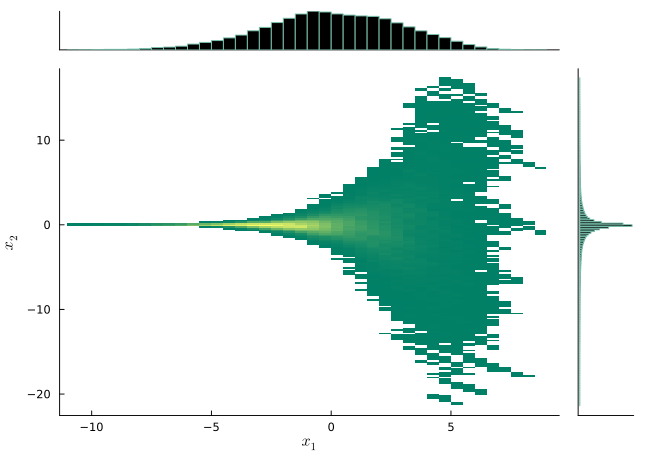

In [2]:
using PDMPFlux

using Random, Distributions, Plots, LaTeXStrings, Zygote, LinearAlgebra

"""
    Funnel distribution for testing. Returns energy and sample functions.
    For reference, see Neal, R. M. (2003). Slice sampling. The Annals of Statistics, 31(3), 705–767.
"""
function funnel(d::Int=10, σ::Float64=3.0, clip_y::Int=11)

    function neg_energy(x::Vector{Float64})
        v = x[1]
        log_density_v = logpdf(Normal(0.0, 3.0), v)
        variance_other = exp(v)
        other_dim = d - 1
        cov_other = I * variance_other
        mean_other = zeros(other_dim)
        log_density_other = logpdf(MvNormal(mean_other, cov_other), x[2:end])
        return - log_density_v - log_density_other
    end

    function sample_data(n_samples::Int)
        # sample from Nd funnel distribution
        y = clamp.(σ * randn(n_samples, 1), -clip_y, clip_y)
        x = randn(n_samples, d - 1) .* exp.(-y / 2)
        return hcat(y, x)
    end

    return neg_energy, sample_data
end

function plot_funnel(d::Int=10, n_samples::Int=10000)
    _, sample_data = funnel(d)
    data = sample_data(n_samples)

    # 最初の2次元を抽出（yとx1）
    y = data[:, 1]
    x1 = data[:, 2]

    # 散布図をプロット
    scatter(y, x1, alpha=0.5, markersize=1, xlabel=L"y", ylabel=L"x_1", 
            title="Funnel Distribution (First Two Dimensions' Ground Truth)", grid=true, legend=false, color="#78C2AD")

    # xlim と ylim を追加
    xlims!(-8, 8)  # x軸の範囲を -8 から 8 に設定
    ylims!(-7, 7)  # y軸の範囲を -7 から 7 に設定
end
plot_funnel()

function run_ZigZag_on_funnel(N_sk::Int=100_000, N::Int=100_000, d::Int=10)
    U, _ = funnel(d)
    grad_U(x::Vector{Float64}) = gradient(U, x)[1]
    xinit = ones(d)
    vinit = ones(d)
    seed = 2024
    grid_size = 0  # constant bounds
    sampler = ZigZag(d, grad_U, grid_size=grid_size)
    out = sample_skeleton(sampler, N_sk, xinit, vinit, seed=seed, verbose = true)
    samples = sample_from_skeleton(sampler, N, out)
    return out, samples
end
output, samples = run_ZigZag_on_funnel()

jointplot(samples)

In [3]:
using Zygote
gradient(x -> 3x^2 + 2x + 1, 5)

(32.0,)

In [4]:
f(x::Vector{Float64}) = 3x[1]^2 + 2x[2] + 1
g(x) = gradient(f,x)
g([1.0,2.0])

([6.0, 2.0],)

In [5]:
using Optim
f(x) = (x-1)^2
result = optimize(f, 0.0, 1.0)
result.minimizer

0.999999984947842